In [2]:
import pandas as pd 
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
df_train = pd.read_csv("train.csv",na_values=' ')
df_test = pd.read_csv("test.csv",na_values=' ')

In [3]:
t=[datetime.strptime(i, '%d/%m/%Y')for i in df_train['Date']]
df_train['Date']=t
t2=[datetime.strptime(i, '%d/%m/%Y')for i in df_test['Date']]
df_test['Date']=t2


df_train['month'] = df_train['Date'].dt.month
df_train['day'] = df_train['Date'].dt.day
df_train["year"]=df_train["Date"].dt.year
df_train['dow'] = df_train['Date'].dt.dayofweek
#df_train['weak_of_year'] = df_train['Date'].dt.isocalendar().week.astype(int)

df_test['month'] = df_test['Date'].dt.month
df_test['day'] = df_test['Date'].dt.day
df_test["year"]=df_test["Date"].dt.year
df_test['dow'] = df_test['Date'].dt.dayofweek
#df_test['weak_of_year'] = df_test['Date'].dt.isocalendar().week.astype(int)

<AxesSubplot:>

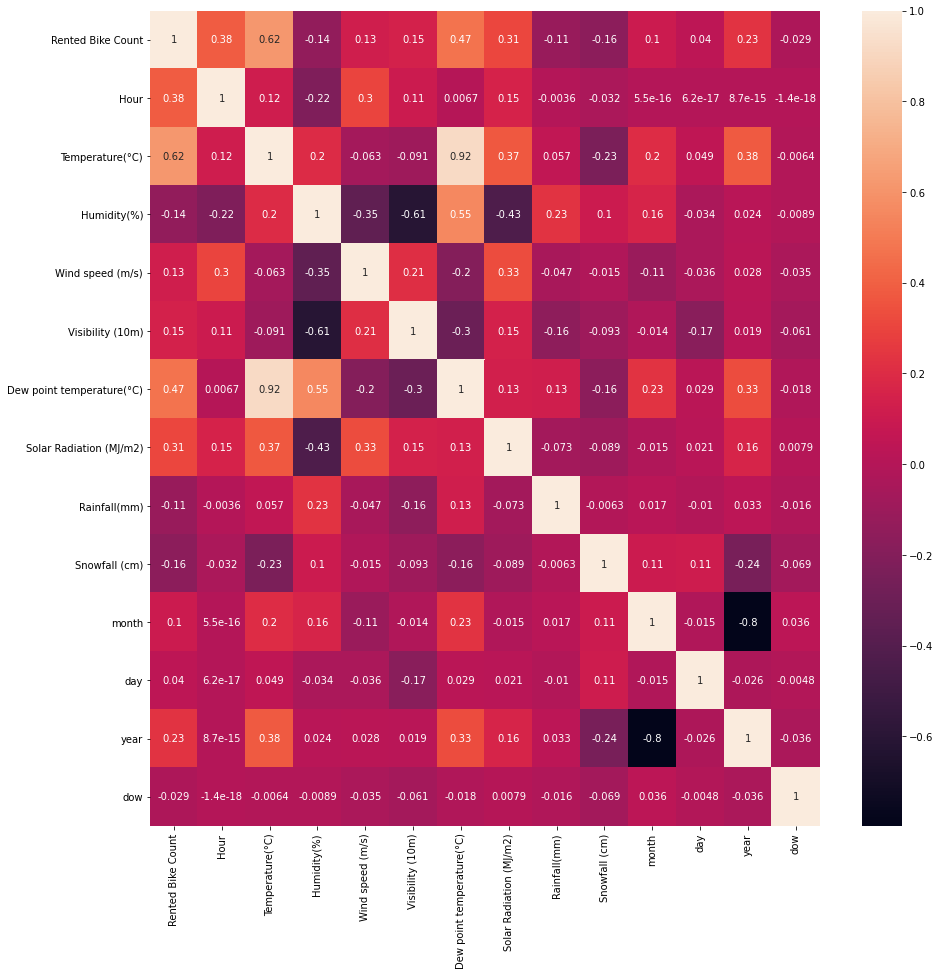

In [4]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(),annot=True)

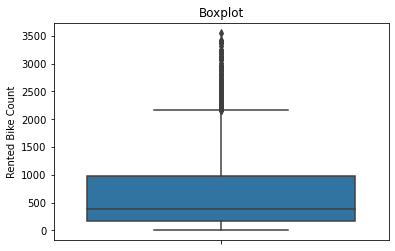

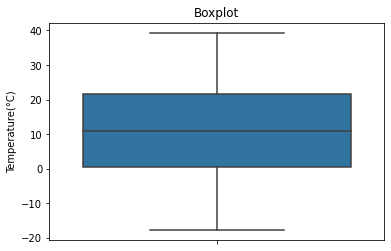

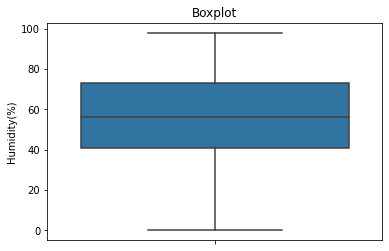

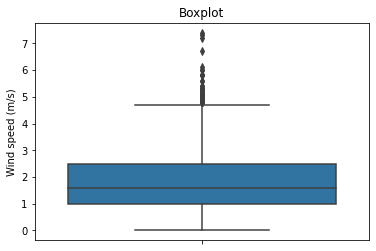

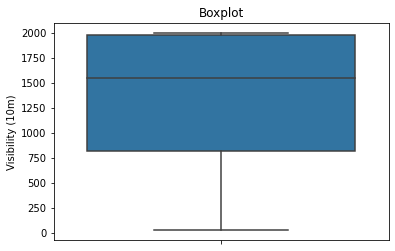

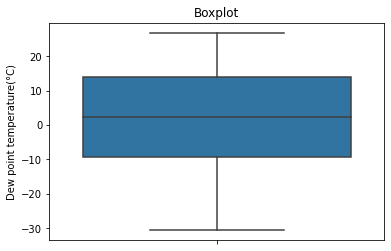

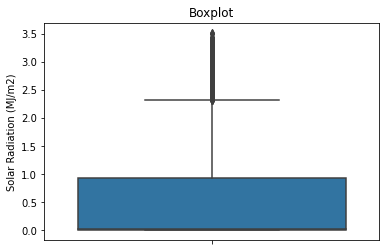

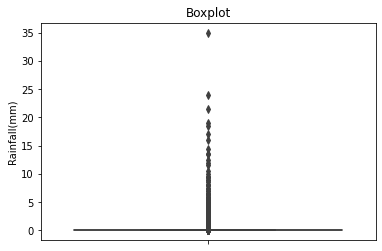

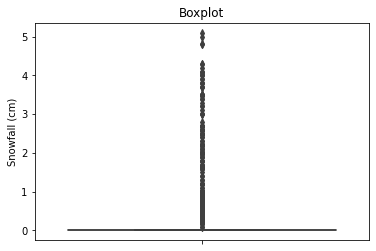

In [5]:
features_train = ['Rented Bike Count',  'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
 
# boxplot
for i in features_train:
    sns.boxplot(y=df_train[i])
    plt.title('Boxplot')
    plt.show()


In [6]:
features_outliers = ['Wind speed (m/s)','Solar Radiation (MJ/m2)','Snowfall (cm)']

#Finding upper and lower limt for features in train set
for i in features_outliers:
    Inter_Quartile_Range = df_train[i].quantile(0.75) - df_train[i].quantile(0.25)

    lower_boundary = df_train[i].quantile(0.25) - (Inter_Quartile_Range * 1.5)
    upper_boundary = df_train[i].quantile(0.75) + (Inter_Quartile_Range * 1.5)
    df_train[i]= np.where(df_train[i] > upper_boundary, upper_boundary,np.where(df_train[i] < lower_boundary,
                                                                                lower_boundary,df_train[i]))

In [7]:
#Finding upper and lower limt for features in test set
for i in features_outliers:
    Inter_Quartile_Range = df_test[i].quantile(0.75) - df_test[i].quantile(0.25)

    lower_boundary = df_test[i].quantile(0.25) - (Inter_Quartile_Range * 1.5)
    upper_boundary = df_test[i].quantile(0.75) + (Inter_Quartile_Range * 1.5)
    df_test[i]= np.where(df_test[i] > upper_boundary, upper_boundary,np.where(df_test[i] < lower_boundary,
                                                                              lower_boundary,df_test[i]))

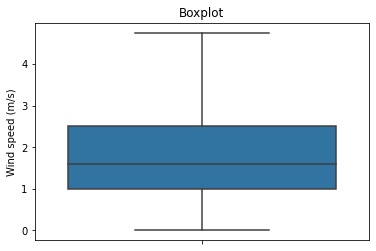

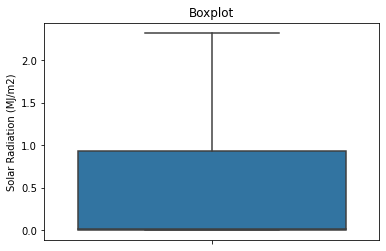

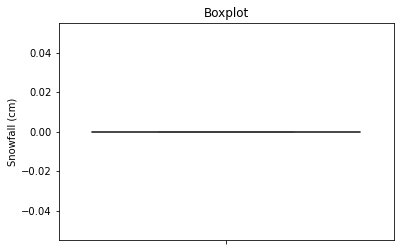

In [8]:
# boxplot
for i in features_outliers:
    sns.boxplot(y=df_train[i])
    plt.title('Boxplot')
    plt.show()


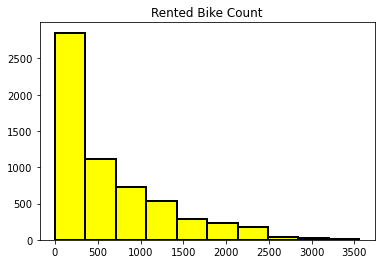

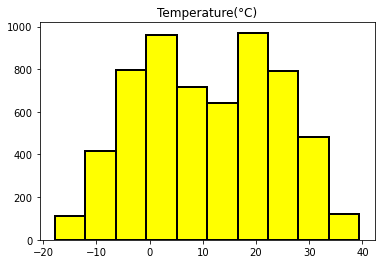

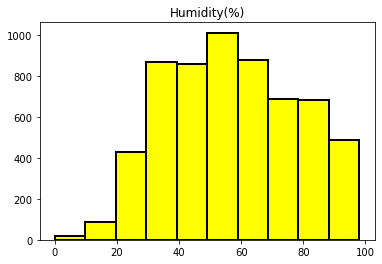

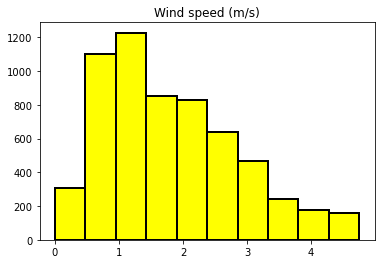

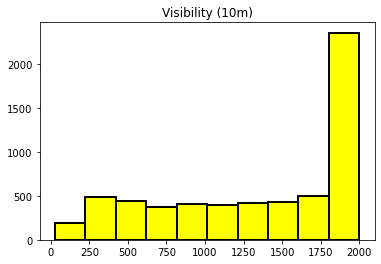

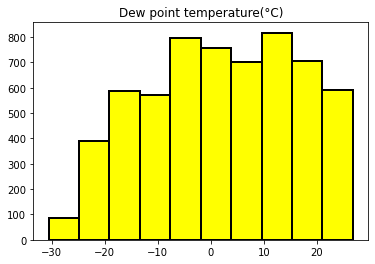

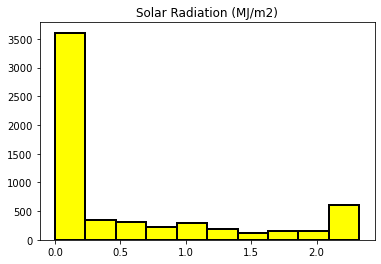

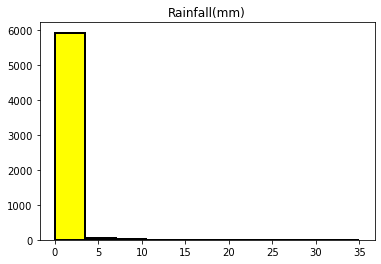

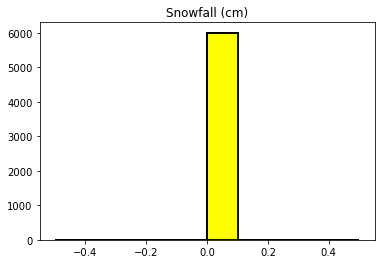

In [9]:
       
for i in features_train:
    plt.hist(df_train[i], color='yellow', edgecolor='black', linewidth=2)
    plt.title(i)
    plt.show()
    

In [10]:
df_train['Rented Bike Count']=round(np.sqrt(df_train['Rented Bike Count']),1)
df_train['Wind speed (m/s)']=round(np.sqrt(df_train['Wind speed (m/s)']),1)
df_test['Wind speed (m/s)']=round(np.sqrt(df_test['Wind speed (m/s)']),1)

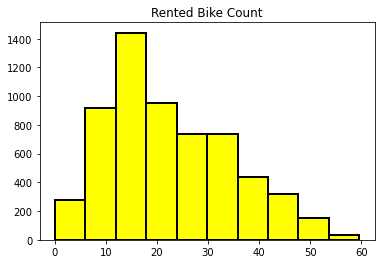

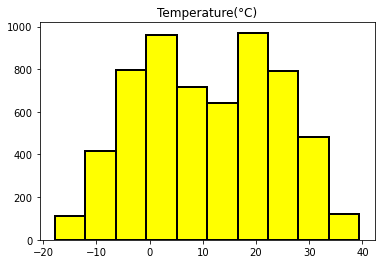

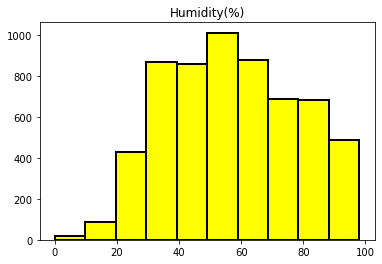

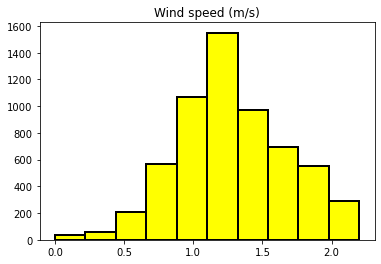

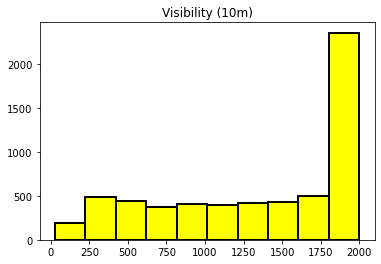

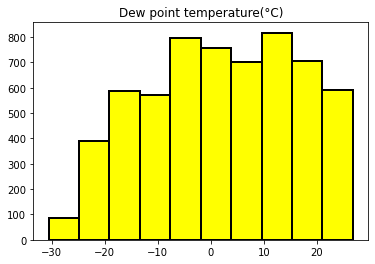

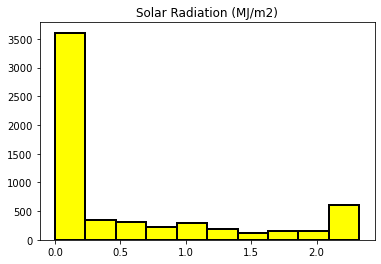

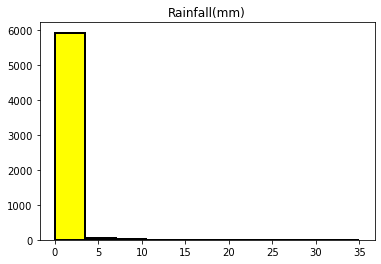

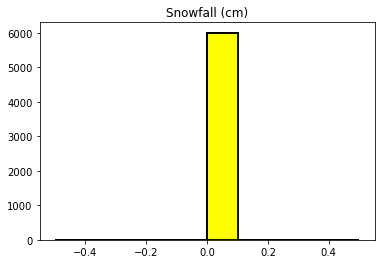

In [11]:
for i in features_train:
    plt.hist(df_train[i], color='yellow', edgecolor='black', linewidth=2)
    plt.title(i)
    plt.show()

In [12]:
df_test['Rented Bike Count'] = 0
df_train.drop(['Date'], inplace= True, axis = 1)
df_test.drop(['Date'], inplace= True, axis = 1)

In [13]:
seasons_encoding={'Winter':0, 'Spring':1, 'Summer':2,'Autumn':3}
Holiday_encoding={'No Holiday':0,'Holiday':1}
day_encode={'Yes':1,'No':2}
year_encode={2017:0,2018:1}

In [14]:
df_train['Seasons']=df_train["Seasons"].map(seasons_encoding)
df_test['Seasons']=df_test["Seasons"].map(seasons_encoding)

df_train['Holiday']=df_train["Holiday"].map(Holiday_encoding)
df_test['Holiday']=df_test["Holiday"].map(Holiday_encoding)

df_train['Functioning Day']=df_train["Functioning Day"].map(day_encode)
df_test['Functioning Day']=df_test["Functioning Day"].map(day_encode)

df_train['year']=df_train["year"].map(year_encode)
df_test['year']=df_test["year"].map(year_encode)

In [16]:
df_train = pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)
df_train

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                  15.9     0             -5.2           37               1.5   
1                  14.3     1             -5.5           38               0.9   
2                  13.2     2             -6.0           39               1.0   
3                  10.3     3             -6.2           40               0.9   
4                   8.8     4             -6.0           36               1.5   
...                 ...   ...              ...          ...               ...   
5995               43.6    19             32.9           56               1.6   
5996               42.8    20             31.1           64               1.6   
5997               42.7    21             30.3           69               1.5   
5998               40.8    22             29.8           75               1.2   
5999               33.7    23             29.5           78               1.2   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                     0.00   
1                 2000                      -17.6                     0.00   
2                 2000                      -17.7                     0.00   
3                 2000                      -17.6                     0.00   
4                 2000                      -18.6                     0.00   
...                ...                        ...                      ...   
5995              1944                       22.9                     0.40   
5996              1770                       23.4                     0.02   
5997              1834                       23.9                     0.00   
5998              1609                       24.8                     0.00   
5999              1469                       25.2                     0.00   

      Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  Functioning Day  month  \
0              0.0            0.0        0        0                1     12   
1              0.0            0.0        0        0                1     12   
2              0.0            0.0        0        0                1     12   
3              0.0            0.0        0        0                1     12   
4              0.0            0.0        0        0                1     12   
...            ...            ...      ...      ...              ...    ...   
5995           0.0            0.0        2        0                1      8   
5996           0.0            0.0        2        0                1      8   
5997           0.0            0.0        2        0                1      8   
5998           0.0            0.0        2        0                1      8   
5999           0.0            0.0        2        0                1      8   

      day  year  dow  
0       1     0    4  
1       1     0    4  
2       1     0    4  
3       1     0    4  
4       1     0    4  
...   ...   ...  ...  
5995    7     1    1  
5996    7     1    1  
5997    7     1    1  
5998    7     1    1  
5999    7     1    1  

[6000 rows x 17 columns]

In [89]:
x_train = df_train.drop(['Rented Bike Count'], axis=1)
y_train = df_train['Rented Bike Count']
x_test = df_test.iloc[:,1:-1]
y_test = df_test.iloc[:,14:]

In [90]:
from sklearn.model_selection import train_test_split  

x_train_train, x_test_train, y_train_train, y_test_train= train_test_split(x_train, y_train, test_size= 0.001, random_state=42)  

np.shape(y_train_train)


(5994,)

In [91]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
parameters = {'iterations':np.arange(1000,5000,1000), 'learning_rate':np.arange(0,0.1,0.01),
              'objective':['MAE','MAPE','Poisson','Quantile','RMSE','RMSEWithUncertainty',
                           'LogLinQuantile','Lq','Huber','Expectile','Tweedie','LogCosh'],
             'l2_leaf_reg':np.arange(1,5,1),'random_strength':[0,1,2,3,4,5],'random_state':[42,0,1]}
model = CatBoostRegressor()
clf = RandomizedSearchCV(estimator=model, param_distributions=parameters,cv=5,verbose=3)
bm = clf.fit(x_train_train, y_train_train)
sorted(clf.cv_results_)
print(bm.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END iterations=1000, l2_leaf_reg=4, learning_rate=0.0, objective=MAPE, random_state=42, random_strength=1;, score=nan total time=   0.2s
[CV 2/5] END iterations=1000, l2_leaf_reg=4, learning_rate=0.0, objective=MAPE, random_state=42, random_strength=1;, score=nan total time=   0.0s
[CV 3/5] END iterations=1000, l2_leaf_reg=4, learning_rate=0.0, objective=MAPE, random_state=42, random_strength=1;, score=nan total time=   0.0s
[CV 4/5] END iterations=1000, l2_leaf_reg=4, learning_rate=0.0, objective=MAPE, random_state=42, random_strength=1;, score=nan total time=   0.0s
[CV 5/5] END iterations=1000, l2_leaf_reg=4, learning_rate=0.0, objective=MAPE, random_state=42, random_strength=1;, score=nan total time=   0.0s
0:	learn: 20.4399565	total: 156ms	remaining: 5m 12s
1:	learn: 19.2386512	total: 205ms	remaining: 3m 24s
2:	learn: 18.1624808	total: 336ms	remaining: 3m 43s
3:	learn: 17.0868880	total: 353ms	remaining: 2m 56s
4

153:	learn: 1.8826828	total: 3.75s	remaining: 44.9s
154:	learn: 1.8800017	total: 3.77s	remaining: 44.9s
155:	learn: 1.8741648	total: 3.79s	remaining: 44.8s
156:	learn: 1.8698184	total: 3.81s	remaining: 44.7s
157:	learn: 1.8523112	total: 3.83s	remaining: 44.6s
158:	learn: 1.8319893	total: 3.85s	remaining: 44.6s
159:	learn: 1.8251905	total: 3.87s	remaining: 44.5s
160:	learn: 1.8186095	total: 3.89s	remaining: 44.4s
161:	learn: 1.8080206	total: 3.91s	remaining: 44.3s
162:	learn: 1.8019964	total: 3.93s	remaining: 44.3s
163:	learn: 1.7995468	total: 3.95s	remaining: 44.2s
164:	learn: 1.7921399	total: 3.97s	remaining: 44.1s
165:	learn: 1.7789880	total: 3.99s	remaining: 44s
166:	learn: 1.7623175	total: 4s	remaining: 44s
167:	learn: 1.7555700	total: 4.02s	remaining: 43.9s
168:	learn: 1.7475751	total: 4.04s	remaining: 43.8s
169:	learn: 1.7394749	total: 4.06s	remaining: 43.7s
170:	learn: 1.7314616	total: 4.08s	remaining: 43.7s
171:	learn: 1.7153160	total: 4.1s	remaining: 43.6s
172:	learn: 1.709826

316:	learn: 1.1180631	total: 6.86s	remaining: 36.4s
317:	learn: 1.1160203	total: 6.88s	remaining: 36.4s
318:	learn: 1.1127650	total: 6.89s	remaining: 36.3s
319:	learn: 1.1105005	total: 6.92s	remaining: 36.3s
320:	learn: 1.1089488	total: 6.93s	remaining: 36.3s
321:	learn: 1.1080340	total: 6.95s	remaining: 36.2s
322:	learn: 1.1061808	total: 6.97s	remaining: 36.2s
323:	learn: 1.1041816	total: 6.99s	remaining: 36.2s
324:	learn: 1.1019145	total: 7.01s	remaining: 36.1s
325:	learn: 1.1005350	total: 7.03s	remaining: 36.1s
326:	learn: 1.0991834	total: 7.04s	remaining: 36s
327:	learn: 1.0969598	total: 7.06s	remaining: 36s
328:	learn: 1.0951411	total: 7.08s	remaining: 36s
329:	learn: 1.0921570	total: 7.1s	remaining: 35.9s
330:	learn: 1.0900627	total: 7.12s	remaining: 35.9s
331:	learn: 1.0894423	total: 7.17s	remaining: 36s
332:	learn: 1.0857630	total: 7.19s	remaining: 36s
333:	learn: 1.0841449	total: 7.21s	remaining: 36s
334:	learn: 1.0831000	total: 7.23s	remaining: 35.9s
335:	learn: 1.0814349	tot

475:	learn: 0.8777273	total: 9.33s	remaining: 29.9s
476:	learn: 0.8768263	total: 9.35s	remaining: 29.9s
477:	learn: 0.8749459	total: 9.37s	remaining: 29.8s
478:	learn: 0.8735439	total: 9.39s	remaining: 29.8s
479:	learn: 0.8728329	total: 9.41s	remaining: 29.8s
480:	learn: 0.8718981	total: 9.43s	remaining: 29.8s
481:	learn: 0.8704507	total: 9.45s	remaining: 29.8s
482:	learn: 0.8689176	total: 9.47s	remaining: 29.8s
483:	learn: 0.8671878	total: 9.49s	remaining: 29.7s
484:	learn: 0.8662864	total: 9.51s	remaining: 29.7s
485:	learn: 0.8653053	total: 9.54s	remaining: 29.7s
486:	learn: 0.8637717	total: 9.56s	remaining: 29.7s
487:	learn: 0.8622204	total: 9.58s	remaining: 29.7s
488:	learn: 0.8614152	total: 9.6s	remaining: 29.7s
489:	learn: 0.8608146	total: 9.62s	remaining: 29.6s
490:	learn: 0.8594083	total: 9.64s	remaining: 29.6s
491:	learn: 0.8583667	total: 9.66s	remaining: 29.6s
492:	learn: 0.8573086	total: 9.68s	remaining: 29.6s
493:	learn: 0.8560276	total: 9.7s	remaining: 29.6s
494:	learn: 0.

634:	learn: 0.7274357	total: 12.4s	remaining: 26.6s
635:	learn: 0.7265791	total: 12.4s	remaining: 26.5s
636:	learn: 0.7260556	total: 12.4s	remaining: 26.5s
637:	learn: 0.7254990	total: 12.4s	remaining: 26.5s
638:	learn: 0.7247390	total: 12.4s	remaining: 26.5s
639:	learn: 0.7242362	total: 12.5s	remaining: 26.5s
640:	learn: 0.7228666	total: 12.5s	remaining: 26.5s
641:	learn: 0.7220591	total: 12.5s	remaining: 26.5s
642:	learn: 0.7210888	total: 12.5s	remaining: 26.5s
643:	learn: 0.7204649	total: 12.6s	remaining: 26.4s
644:	learn: 0.7195809	total: 12.6s	remaining: 26.4s
645:	learn: 0.7190793	total: 12.6s	remaining: 26.4s
646:	learn: 0.7182265	total: 12.6s	remaining: 26.4s
647:	learn: 0.7175179	total: 12.6s	remaining: 26.3s
648:	learn: 0.7168744	total: 12.6s	remaining: 26.3s
649:	learn: 0.7165190	total: 12.6s	remaining: 26.2s
650:	learn: 0.7154536	total: 12.6s	remaining: 26.2s
651:	learn: 0.7144993	total: 12.7s	remaining: 26.2s
652:	learn: 0.7135821	total: 12.7s	remaining: 26.1s
653:	learn: 

797:	learn: 0.6242802	total: 15s	remaining: 22.6s
798:	learn: 0.6237713	total: 15s	remaining: 22.6s
799:	learn: 0.6232349	total: 15.1s	remaining: 22.6s
800:	learn: 0.6229424	total: 15.1s	remaining: 22.6s
801:	learn: 0.6224871	total: 15.1s	remaining: 22.6s
802:	learn: 0.6217248	total: 15.1s	remaining: 22.5s
803:	learn: 0.6213210	total: 15.1s	remaining: 22.5s
804:	learn: 0.6209153	total: 15.2s	remaining: 22.5s
805:	learn: 0.6201899	total: 15.2s	remaining: 22.5s
806:	learn: 0.6196345	total: 15.2s	remaining: 22.5s
807:	learn: 0.6191647	total: 15.2s	remaining: 22.4s
808:	learn: 0.6188548	total: 15.2s	remaining: 22.4s
809:	learn: 0.6181628	total: 15.2s	remaining: 22.4s
810:	learn: 0.6176187	total: 15.3s	remaining: 22.4s
811:	learn: 0.6170167	total: 15.3s	remaining: 22.4s
812:	learn: 0.6166705	total: 15.3s	remaining: 22.3s
813:	learn: 0.6158500	total: 15.3s	remaining: 22.3s
814:	learn: 0.6152591	total: 15.3s	remaining: 22.3s
815:	learn: 0.6148857	total: 15.4s	remaining: 22.3s
816:	learn: 0.61

965:	learn: 0.5406923	total: 17.7s	remaining: 18.9s
966:	learn: 0.5403440	total: 17.7s	remaining: 18.9s
967:	learn: 0.5397508	total: 17.7s	remaining: 18.8s
968:	learn: 0.5395486	total: 17.7s	remaining: 18.8s
969:	learn: 0.5387812	total: 17.7s	remaining: 18.8s
970:	learn: 0.5383516	total: 17.7s	remaining: 18.8s
971:	learn: 0.5378328	total: 17.7s	remaining: 18.7s
972:	learn: 0.5376915	total: 17.7s	remaining: 18.7s
973:	learn: 0.5372225	total: 17.7s	remaining: 18.7s
974:	learn: 0.5367628	total: 17.8s	remaining: 18.7s
975:	learn: 0.5361480	total: 17.8s	remaining: 18.6s
976:	learn: 0.5357365	total: 17.8s	remaining: 18.6s
977:	learn: 0.5352341	total: 17.8s	remaining: 18.6s
978:	learn: 0.5350513	total: 17.8s	remaining: 18.6s
979:	learn: 0.5348694	total: 17.8s	remaining: 18.5s
980:	learn: 0.5342489	total: 17.8s	remaining: 18.5s
981:	learn: 0.5338013	total: 17.8s	remaining: 18.5s
982:	learn: 0.5332515	total: 17.8s	remaining: 18.5s
983:	learn: 0.5328469	total: 17.9s	remaining: 18.5s
984:	learn: 

1129:	learn: 0.4781042	total: 20.3s	remaining: 15.6s
1130:	learn: 0.4778686	total: 20.3s	remaining: 15.6s
1131:	learn: 0.4776683	total: 20.3s	remaining: 15.6s
1132:	learn: 0.4771147	total: 20.3s	remaining: 15.6s
1133:	learn: 0.4769944	total: 20.3s	remaining: 15.5s
1134:	learn: 0.4766717	total: 20.4s	remaining: 15.5s
1135:	learn: 0.4764021	total: 20.4s	remaining: 15.5s
1136:	learn: 0.4761498	total: 20.4s	remaining: 15.5s
1137:	learn: 0.4758851	total: 20.4s	remaining: 15.5s
1138:	learn: 0.4753234	total: 20.4s	remaining: 15.4s
1139:	learn: 0.4749978	total: 20.4s	remaining: 15.4s
1140:	learn: 0.4748825	total: 20.5s	remaining: 15.4s
1141:	learn: 0.4746668	total: 20.5s	remaining: 15.4s
1142:	learn: 0.4743843	total: 20.5s	remaining: 15.4s
1143:	learn: 0.4740572	total: 20.5s	remaining: 15.3s
1144:	learn: 0.4736033	total: 20.5s	remaining: 15.3s
1145:	learn: 0.4732198	total: 20.5s	remaining: 15.3s
1146:	learn: 0.4728029	total: 20.6s	remaining: 15.3s
1147:	learn: 0.4725073	total: 20.6s	remaining:

1307:	learn: 0.4223686	total: 22.5s	remaining: 11.9s
1308:	learn: 0.4220208	total: 22.5s	remaining: 11.9s
1309:	learn: 0.4216156	total: 22.5s	remaining: 11.8s
1310:	learn: 0.4213619	total: 22.5s	remaining: 11.8s
1311:	learn: 0.4210019	total: 22.5s	remaining: 11.8s
1312:	learn: 0.4206058	total: 22.5s	remaining: 11.8s
1313:	learn: 0.4203224	total: 22.5s	remaining: 11.8s
1314:	learn: 0.4200915	total: 22.6s	remaining: 11.8s
1315:	learn: 0.4198898	total: 22.6s	remaining: 11.7s
1316:	learn: 0.4197049	total: 22.6s	remaining: 11.7s
1317:	learn: 0.4194383	total: 22.6s	remaining: 11.7s
1318:	learn: 0.4190234	total: 22.6s	remaining: 11.7s
1319:	learn: 0.4188012	total: 22.6s	remaining: 11.7s
1320:	learn: 0.4182735	total: 22.6s	remaining: 11.6s
1321:	learn: 0.4181542	total: 22.7s	remaining: 11.6s
1322:	learn: 0.4179839	total: 22.7s	remaining: 11.6s
1323:	learn: 0.4172856	total: 22.7s	remaining: 11.6s
1324:	learn: 0.4172231	total: 22.7s	remaining: 11.6s
1325:	learn: 0.4168522	total: 22.7s	remaining:

1464:	learn: 0.3786122	total: 25s	remaining: 9.15s
1465:	learn: 0.3784362	total: 25.1s	remaining: 9.13s
1466:	learn: 0.3782944	total: 25.1s	remaining: 9.11s
1467:	learn: 0.3780598	total: 25.1s	remaining: 9.09s
1468:	learn: 0.3777276	total: 25.1s	remaining: 9.08s
1469:	learn: 0.3776485	total: 25.1s	remaining: 9.06s
1470:	learn: 0.3773954	total: 25.1s	remaining: 9.04s
1471:	learn: 0.3771213	total: 25.2s	remaining: 9.02s
1472:	learn: 0.3768947	total: 25.2s	remaining: 9.01s
1473:	learn: 0.3768179	total: 25.2s	remaining: 8.99s
1474:	learn: 0.3766305	total: 25.2s	remaining: 8.97s
1475:	learn: 0.3763018	total: 25.2s	remaining: 8.96s
1476:	learn: 0.3759682	total: 25.2s	remaining: 8.94s
1477:	learn: 0.3755446	total: 25.3s	remaining: 8.92s
1478:	learn: 0.3753331	total: 25.3s	remaining: 8.9s
1479:	learn: 0.3752410	total: 25.3s	remaining: 8.89s
1480:	learn: 0.3748631	total: 25.3s	remaining: 8.87s
1481:	learn: 0.3746722	total: 25.3s	remaining: 8.85s
1482:	learn: 0.3744905	total: 25.3s	remaining: 8.

1621:	learn: 0.3439353	total: 27.5s	remaining: 6.41s
1622:	learn: 0.3437992	total: 27.5s	remaining: 6.39s
1623:	learn: 0.3436166	total: 27.5s	remaining: 6.38s
1624:	learn: 0.3434313	total: 27.6s	remaining: 6.36s
1625:	learn: 0.3431536	total: 27.6s	remaining: 6.34s
1626:	learn: 0.3429519	total: 27.6s	remaining: 6.33s
1627:	learn: 0.3427260	total: 27.6s	remaining: 6.31s
1628:	learn: 0.3425277	total: 27.6s	remaining: 6.29s
1629:	learn: 0.3423612	total: 27.7s	remaining: 6.28s
1630:	learn: 0.3422082	total: 27.7s	remaining: 6.26s
1631:	learn: 0.3419727	total: 27.7s	remaining: 6.24s
1632:	learn: 0.3418242	total: 27.7s	remaining: 6.22s
1633:	learn: 0.3416624	total: 27.7s	remaining: 6.21s
1634:	learn: 0.3414145	total: 27.7s	remaining: 6.19s
1635:	learn: 0.3411156	total: 27.7s	remaining: 6.17s
1636:	learn: 0.3410189	total: 27.7s	remaining: 6.15s
1637:	learn: 0.3408954	total: 27.7s	remaining: 6.13s
1638:	learn: 0.3407682	total: 27.8s	remaining: 6.11s
1639:	learn: 0.3406356	total: 27.8s	remaining:

1793:	learn: 0.3104520	total: 29.9s	remaining: 3.43s
1794:	learn: 0.3103238	total: 29.9s	remaining: 3.41s
1795:	learn: 0.3101196	total: 29.9s	remaining: 3.39s
1796:	learn: 0.3099932	total: 29.9s	remaining: 3.37s
1797:	learn: 0.3098255	total: 29.9s	remaining: 3.36s
1798:	learn: 0.3097065	total: 29.9s	remaining: 3.34s
1799:	learn: 0.3093672	total: 29.9s	remaining: 3.32s
1800:	learn: 0.3092989	total: 29.9s	remaining: 3.3s
1801:	learn: 0.3091724	total: 29.9s	remaining: 3.29s
1802:	learn: 0.3090769	total: 29.9s	remaining: 3.27s
1803:	learn: 0.3089127	total: 29.9s	remaining: 3.25s
1804:	learn: 0.3086993	total: 29.9s	remaining: 3.23s
1805:	learn: 0.3086241	total: 29.9s	remaining: 3.21s
1806:	learn: 0.3084221	total: 29.9s	remaining: 3.2s
1807:	learn: 0.3082822	total: 29.9s	remaining: 3.18s
1808:	learn: 0.3075552	total: 29.9s	remaining: 3.16s
1809:	learn: 0.3072870	total: 30s	remaining: 3.14s
1810:	learn: 0.3069714	total: 30s	remaining: 3.13s
1811:	learn: 0.3067371	total: 30s	remaining: 3.11s
1

1959:	learn: 0.2804934	total: 31.6s	remaining: 644ms
1960:	learn: 0.2803318	total: 31.6s	remaining: 628ms
1961:	learn: 0.2801640	total: 31.6s	remaining: 612ms
1962:	learn: 0.2800297	total: 31.6s	remaining: 596ms
1963:	learn: 0.2798606	total: 31.6s	remaining: 580ms
1964:	learn: 0.2797701	total: 31.6s	remaining: 564ms
1965:	learn: 0.2796704	total: 31.7s	remaining: 547ms
1966:	learn: 0.2794085	total: 31.7s	remaining: 531ms
1967:	learn: 0.2792456	total: 31.7s	remaining: 515ms
1968:	learn: 0.2789544	total: 31.7s	remaining: 499ms
1969:	learn: 0.2786384	total: 31.7s	remaining: 483ms
1970:	learn: 0.2785216	total: 31.7s	remaining: 467ms
1971:	learn: 0.2783922	total: 31.7s	remaining: 450ms
1972:	learn: 0.2782111	total: 31.7s	remaining: 434ms
1973:	learn: 0.2780808	total: 31.8s	remaining: 418ms
1974:	learn: 0.2777249	total: 31.8s	remaining: 402ms
1975:	learn: 0.2776362	total: 31.8s	remaining: 386ms
1976:	learn: 0.2775666	total: 31.8s	remaining: 370ms
1977:	learn: 0.2774733	total: 31.8s	remaining:

124:	learn: 2.1736750	total: 1.15s	remaining: 17.2s
125:	learn: 2.1481936	total: 1.16s	remaining: 17.2s
126:	learn: 2.1423657	total: 1.17s	remaining: 17.2s
127:	learn: 2.1373175	total: 1.18s	remaining: 17.2s
128:	learn: 2.1262891	total: 1.19s	remaining: 17.2s
129:	learn: 2.1175968	total: 1.19s	remaining: 17.2s
130:	learn: 2.1029277	total: 1.2s	remaining: 17.1s
131:	learn: 2.0987700	total: 1.21s	remaining: 17.1s
132:	learn: 2.0947610	total: 1.22s	remaining: 17.1s
133:	learn: 2.0870297	total: 1.23s	remaining: 17.1s
134:	learn: 2.0664898	total: 1.23s	remaining: 17s
135:	learn: 2.0609605	total: 1.24s	remaining: 17s
136:	learn: 2.0541586	total: 1.25s	remaining: 17s
137:	learn: 2.0461674	total: 1.26s	remaining: 17s
138:	learn: 2.0406314	total: 1.26s	remaining: 16.9s
139:	learn: 2.0342059	total: 1.27s	remaining: 16.9s
140:	learn: 2.0265521	total: 1.28s	remaining: 16.9s
141:	learn: 2.0221308	total: 1.29s	remaining: 16.9s
142:	learn: 2.0076586	total: 1.3s	remaining: 16.9s
143:	learn: 2.0001183	

297:	learn: 1.1264812	total: 2.65s	remaining: 15.1s
298:	learn: 1.1235852	total: 2.66s	remaining: 15.2s
299:	learn: 1.1216157	total: 2.67s	remaining: 15.1s
300:	learn: 1.1175459	total: 2.68s	remaining: 15.1s
301:	learn: 1.1156300	total: 2.68s	remaining: 15.1s
302:	learn: 1.1139418	total: 2.69s	remaining: 15.1s
303:	learn: 1.1119364	total: 2.7s	remaining: 15.1s
304:	learn: 1.1100609	total: 2.71s	remaining: 15s
305:	learn: 1.1067396	total: 2.71s	remaining: 15s
306:	learn: 1.1058320	total: 2.72s	remaining: 15s
307:	learn: 1.1035645	total: 2.73s	remaining: 15s
308:	learn: 1.1019832	total: 2.74s	remaining: 15s
309:	learn: 1.1008781	total: 2.75s	remaining: 15s
310:	learn: 1.0967985	total: 2.75s	remaining: 15s
311:	learn: 1.0928138	total: 2.76s	remaining: 14.9s
312:	learn: 1.0909767	total: 2.77s	remaining: 14.9s
313:	learn: 1.0890820	total: 2.78s	remaining: 14.9s
314:	learn: 1.0850334	total: 2.79s	remaining: 14.9s
315:	learn: 1.0828465	total: 2.79s	remaining: 14.9s
316:	learn: 1.0817278	total

471:	learn: 0.8343017	total: 3.95s	remaining: 12.8s
472:	learn: 0.8327414	total: 3.95s	remaining: 12.8s
473:	learn: 0.8315908	total: 3.96s	remaining: 12.7s
474:	learn: 0.8304262	total: 3.97s	remaining: 12.7s
475:	learn: 0.8289832	total: 3.97s	remaining: 12.7s
476:	learn: 0.8275245	total: 3.98s	remaining: 12.7s
477:	learn: 0.8264508	total: 3.99s	remaining: 12.7s
478:	learn: 0.8245100	total: 3.99s	remaining: 12.7s
479:	learn: 0.8230672	total: 4s	remaining: 12.7s
480:	learn: 0.8222725	total: 4.01s	remaining: 12.7s
481:	learn: 0.8208417	total: 4.02s	remaining: 12.7s
482:	learn: 0.8199440	total: 4.02s	remaining: 12.6s
483:	learn: 0.8190618	total: 4.03s	remaining: 12.6s
484:	learn: 0.8183496	total: 4.04s	remaining: 12.6s
485:	learn: 0.8169413	total: 4.04s	remaining: 12.6s
486:	learn: 0.8156053	total: 4.05s	remaining: 12.6s
487:	learn: 0.8145247	total: 4.06s	remaining: 12.6s
488:	learn: 0.8129475	total: 4.07s	remaining: 12.6s
489:	learn: 0.8117663	total: 4.07s	remaining: 12.6s
490:	learn: 0.8

652:	learn: 0.6808560	total: 5.22s	remaining: 10.8s
653:	learn: 0.6805188	total: 5.23s	remaining: 10.8s
654:	learn: 0.6804096	total: 5.24s	remaining: 10.8s
655:	learn: 0.6800689	total: 5.24s	remaining: 10.7s
656:	learn: 0.6797734	total: 5.25s	remaining: 10.7s
657:	learn: 0.6791691	total: 5.26s	remaining: 10.7s
658:	learn: 0.6784288	total: 5.26s	remaining: 10.7s
659:	learn: 0.6773851	total: 5.27s	remaining: 10.7s
660:	learn: 0.6762867	total: 5.28s	remaining: 10.7s
661:	learn: 0.6757876	total: 5.28s	remaining: 10.7s
662:	learn: 0.6757167	total: 5.29s	remaining: 10.7s
663:	learn: 0.6751012	total: 5.3s	remaining: 10.7s
664:	learn: 0.6743671	total: 5.3s	remaining: 10.7s
665:	learn: 0.6736674	total: 5.31s	remaining: 10.6s
666:	learn: 0.6730298	total: 5.32s	remaining: 10.6s
667:	learn: 0.6720091	total: 5.33s	remaining: 10.6s
668:	learn: 0.6709753	total: 5.33s	remaining: 10.6s
669:	learn: 0.6703890	total: 5.34s	remaining: 10.6s
670:	learn: 0.6691943	total: 5.35s	remaining: 10.6s
671:	learn: 0.

820:	learn: 0.5785851	total: 6.52s	remaining: 9.36s
821:	learn: 0.5781208	total: 6.53s	remaining: 9.36s
822:	learn: 0.5777240	total: 6.54s	remaining: 9.35s
823:	learn: 0.5769439	total: 6.55s	remaining: 9.35s
824:	learn: 0.5764513	total: 6.56s	remaining: 9.34s
825:	learn: 0.5761836	total: 6.57s	remaining: 9.34s
826:	learn: 0.5753728	total: 6.58s	remaining: 9.34s
827:	learn: 0.5747491	total: 6.59s	remaining: 9.33s
828:	learn: 0.5744461	total: 6.61s	remaining: 9.33s
829:	learn: 0.5740466	total: 6.62s	remaining: 9.33s
830:	learn: 0.5736784	total: 6.63s	remaining: 9.32s
831:	learn: 0.5732616	total: 6.64s	remaining: 9.32s
832:	learn: 0.5726385	total: 6.65s	remaining: 9.32s
833:	learn: 0.5720861	total: 6.66s	remaining: 9.31s
834:	learn: 0.5715076	total: 6.67s	remaining: 9.31s
835:	learn: 0.5708801	total: 6.68s	remaining: 9.3s
836:	learn: 0.5703684	total: 6.69s	remaining: 9.3s
837:	learn: 0.5698293	total: 6.71s	remaining: 9.3s
838:	learn: 0.5692708	total: 6.72s	remaining: 9.29s
839:	learn: 0.5

985:	learn: 0.5035306	total: 8.51s	remaining: 8.75s
986:	learn: 0.5031439	total: 8.53s	remaining: 8.76s
987:	learn: 0.5026742	total: 8.55s	remaining: 8.76s
988:	learn: 0.5023134	total: 8.57s	remaining: 8.76s
989:	learn: 0.5019186	total: 8.59s	remaining: 8.76s
990:	learn: 0.5016722	total: 8.61s	remaining: 8.76s
991:	learn: 0.5009575	total: 8.63s	remaining: 8.76s
992:	learn: 0.5006495	total: 8.64s	remaining: 8.77s
993:	learn: 0.5003621	total: 8.66s	remaining: 8.77s
994:	learn: 0.4999215	total: 8.68s	remaining: 8.77s
995:	learn: 0.4997367	total: 8.7s	remaining: 8.77s
996:	learn: 0.4993717	total: 8.71s	remaining: 8.77s
997:	learn: 0.4991646	total: 8.73s	remaining: 8.77s
998:	learn: 0.4989363	total: 8.75s	remaining: 8.77s
999:	learn: 0.4987523	total: 8.77s	remaining: 8.77s
1000:	learn: 0.4982967	total: 8.79s	remaining: 8.77s
1001:	learn: 0.4975159	total: 8.81s	remaining: 8.77s
1002:	learn: 0.4969587	total: 8.83s	remaining: 8.77s
1003:	learn: 0.4967105	total: 8.84s	remaining: 8.77s
1004:	lea

1142:	learn: 0.4483652	total: 10.9s	remaining: 8.14s
1143:	learn: 0.4481904	total: 10.9s	remaining: 8.14s
1144:	learn: 0.4479334	total: 10.9s	remaining: 8.13s
1145:	learn: 0.4476876	total: 10.9s	remaining: 8.13s
1146:	learn: 0.4472570	total: 10.9s	remaining: 8.13s
1147:	learn: 0.4468604	total: 10.9s	remaining: 8.12s
1148:	learn: 0.4464194	total: 11s	remaining: 8.12s
1149:	learn: 0.4458899	total: 11s	remaining: 8.12s
1150:	learn: 0.4456119	total: 11s	remaining: 8.11s
1151:	learn: 0.4453705	total: 11s	remaining: 8.11s
1152:	learn: 0.4451871	total: 11s	remaining: 8.11s
1153:	learn: 0.4449526	total: 11.1s	remaining: 8.11s
1154:	learn: 0.4447762	total: 11.1s	remaining: 8.1s
1155:	learn: 0.4442736	total: 11.1s	remaining: 8.1s
1156:	learn: 0.4440551	total: 11.1s	remaining: 8.09s
1157:	learn: 0.4438173	total: 11.1s	remaining: 8.09s
1158:	learn: 0.4435081	total: 11.1s	remaining: 8.08s
1159:	learn: 0.4430828	total: 11.2s	remaining: 8.08s
1160:	learn: 0.4427732	total: 11.2s	remaining: 8.07s
1161:

1327:	learn: 0.3928401	total: 12.8s	remaining: 6.47s
1328:	learn: 0.3925438	total: 12.8s	remaining: 6.45s
1329:	learn: 0.3922183	total: 12.8s	remaining: 6.44s
1330:	learn: 0.3920019	total: 12.8s	remaining: 6.43s
1331:	learn: 0.3917437	total: 12.8s	remaining: 6.42s
1332:	learn: 0.3916252	total: 12.8s	remaining: 6.41s
1333:	learn: 0.3912015	total: 12.8s	remaining: 6.4s
1334:	learn: 0.3908232	total: 12.8s	remaining: 6.39s
1335:	learn: 0.3907030	total: 12.8s	remaining: 6.37s
1336:	learn: 0.3904660	total: 12.8s	remaining: 6.36s
1337:	learn: 0.3901937	total: 12.8s	remaining: 6.35s
1338:	learn: 0.3899423	total: 12.8s	remaining: 6.34s
1339:	learn: 0.3896234	total: 12.8s	remaining: 6.33s
1340:	learn: 0.3892883	total: 12.9s	remaining: 6.32s
1341:	learn: 0.3889522	total: 12.9s	remaining: 6.3s
1342:	learn: 0.3887117	total: 12.9s	remaining: 6.29s
1343:	learn: 0.3884897	total: 12.9s	remaining: 6.28s
1344:	learn: 0.3882943	total: 12.9s	remaining: 6.27s
1345:	learn: 0.3880463	total: 12.9s	remaining: 6

1504:	learn: 0.3497065	total: 13.9s	remaining: 4.57s
1505:	learn: 0.3495139	total: 13.9s	remaining: 4.56s
1506:	learn: 0.3493231	total: 13.9s	remaining: 4.55s
1507:	learn: 0.3491321	total: 13.9s	remaining: 4.54s
1508:	learn: 0.3489924	total: 13.9s	remaining: 4.54s
1509:	learn: 0.3488516	total: 14s	remaining: 4.53s
1510:	learn: 0.3485775	total: 14s	remaining: 4.52s
1511:	learn: 0.3483593	total: 14s	remaining: 4.51s
1512:	learn: 0.3481418	total: 14s	remaining: 4.5s
1513:	learn: 0.3478654	total: 14s	remaining: 4.5s
1514:	learn: 0.3475114	total: 14s	remaining: 4.49s
1515:	learn: 0.3473203	total: 14s	remaining: 4.48s
1516:	learn: 0.3472218	total: 14s	remaining: 4.47s
1517:	learn: 0.3470693	total: 14s	remaining: 4.46s
1518:	learn: 0.3467730	total: 14.1s	remaining: 4.45s
1519:	learn: 0.3464154	total: 14.1s	remaining: 4.44s
1520:	learn: 0.3462073	total: 14.1s	remaining: 4.43s
1521:	learn: 0.3459837	total: 14.1s	remaining: 4.42s
1522:	learn: 0.3458124	total: 14.1s	remaining: 4.41s
1523:	learn: 

1660:	learn: 0.3183828	total: 15s	remaining: 3.06s
1661:	learn: 0.3182505	total: 15s	remaining: 3.05s
1662:	learn: 0.3181939	total: 15s	remaining: 3.04s
1663:	learn: 0.3180668	total: 15s	remaining: 3.03s
1664:	learn: 0.3179439	total: 15s	remaining: 3.02s
1665:	learn: 0.3175846	total: 15s	remaining: 3.01s
1666:	learn: 0.3174435	total: 15s	remaining: 3s
1667:	learn: 0.3172660	total: 15s	remaining: 2.99s
1668:	learn: 0.3170128	total: 15s	remaining: 2.98s
1669:	learn: 0.3168373	total: 15.1s	remaining: 2.97s
1670:	learn: 0.3165560	total: 15.1s	remaining: 2.96s
1671:	learn: 0.3163309	total: 15.1s	remaining: 2.96s
1672:	learn: 0.3162768	total: 15.1s	remaining: 2.94s
1673:	learn: 0.3160840	total: 15.1s	remaining: 2.94s
1674:	learn: 0.3158848	total: 15.1s	remaining: 2.93s
1675:	learn: 0.3157491	total: 15.1s	remaining: 2.92s
1676:	learn: 0.3154073	total: 15.1s	remaining: 2.91s
1677:	learn: 0.3149253	total: 15.1s	remaining: 2.9s
1678:	learn: 0.3146413	total: 15.1s	remaining: 2.89s
1679:	learn: 0.

1831:	learn: 0.2885828	total: 16.3s	remaining: 1.49s
1832:	learn: 0.2883726	total: 16.3s	remaining: 1.48s
1833:	learn: 0.2882630	total: 16.3s	remaining: 1.47s
1834:	learn: 0.2880857	total: 16.3s	remaining: 1.47s
1835:	learn: 0.2878976	total: 16.3s	remaining: 1.46s
1836:	learn: 0.2877861	total: 16.3s	remaining: 1.45s
1837:	learn: 0.2876155	total: 16.3s	remaining: 1.44s
1838:	learn: 0.2875245	total: 16.3s	remaining: 1.43s
1839:	learn: 0.2873658	total: 16.3s	remaining: 1.42s
1840:	learn: 0.2872793	total: 16.3s	remaining: 1.41s
1841:	learn: 0.2870725	total: 16.3s	remaining: 1.4s
1842:	learn: 0.2869439	total: 16.3s	remaining: 1.39s
1843:	learn: 0.2867645	total: 16.4s	remaining: 1.38s
1844:	learn: 0.2865933	total: 16.4s	remaining: 1.37s
1845:	learn: 0.2864867	total: 16.4s	remaining: 1.36s
1846:	learn: 0.2863257	total: 16.4s	remaining: 1.35s
1847:	learn: 0.2862625	total: 16.4s	remaining: 1.35s
1848:	learn: 0.2861393	total: 16.4s	remaining: 1.34s
1849:	learn: 0.2859554	total: 16.4s	remaining: 

1:	learn: 19.1867356	total: 18.7ms	remaining: 18.6s
2:	learn: 18.1162419	total: 26.6ms	remaining: 17.7s
3:	learn: 17.0399679	total: 42.5ms	remaining: 21.2s
4:	learn: 16.0569389	total: 52.1ms	remaining: 20.8s
5:	learn: 15.1282824	total: 60.3ms	remaining: 20.1s
6:	learn: 14.3676826	total: 68.8ms	remaining: 19.6s
7:	learn: 13.6414328	total: 81.1ms	remaining: 20.2s
8:	learn: 12.9012305	total: 89.4ms	remaining: 19.8s
9:	learn: 12.2580352	total: 96.5ms	remaining: 19.2s
10:	learn: 11.7486565	total: 103ms	remaining: 18.7s
11:	learn: 11.2376611	total: 114ms	remaining: 18.8s
12:	learn: 10.7072891	total: 121ms	remaining: 18.5s
13:	learn: 10.2350021	total: 128ms	remaining: 18.2s
14:	learn: 9.8116972	total: 135ms	remaining: 17.9s
15:	learn: 9.3453679	total: 143ms	remaining: 17.7s
16:	learn: 8.9537405	total: 150ms	remaining: 17.5s
17:	learn: 8.5258067	total: 158ms	remaining: 17.4s
18:	learn: 8.1284000	total: 166ms	remaining: 17.3s
19:	learn: 7.7831055	total: 175ms	remaining: 17.3s
20:	learn: 7.47548

172:	learn: 1.7164163	total: 1.53s	remaining: 16.2s
173:	learn: 1.7097570	total: 1.55s	remaining: 16.3s
174:	learn: 1.6989924	total: 1.58s	remaining: 16.5s
175:	learn: 1.6834833	total: 1.6s	remaining: 16.6s
176:	learn: 1.6779079	total: 1.63s	remaining: 16.8s
177:	learn: 1.6609610	total: 1.65s	remaining: 16.9s
178:	learn: 1.6570106	total: 1.67s	remaining: 17s
179:	learn: 1.6529901	total: 1.7s	remaining: 17.2s
180:	learn: 1.6491535	total: 1.72s	remaining: 17.3s
181:	learn: 1.6339832	total: 1.75s	remaining: 17.4s
182:	learn: 1.6179627	total: 1.77s	remaining: 17.6s
183:	learn: 1.6141170	total: 1.79s	remaining: 17.7s
184:	learn: 1.5994434	total: 1.82s	remaining: 17.8s
185:	learn: 1.5846996	total: 1.84s	remaining: 18s
186:	learn: 1.5786656	total: 1.87s	remaining: 18.1s
187:	learn: 1.5741983	total: 1.89s	remaining: 18.2s
188:	learn: 1.5702339	total: 1.92s	remaining: 18.4s
189:	learn: 1.5600391	total: 1.94s	remaining: 18.5s
190:	learn: 1.5560727	total: 1.97s	remaining: 18.7s
191:	learn: 1.5512

346:	learn: 1.0276891	total: 3.46s	remaining: 16.5s
347:	learn: 1.0249550	total: 3.46s	remaining: 16.4s
348:	learn: 1.0239444	total: 3.47s	remaining: 16.4s
349:	learn: 1.0224999	total: 3.48s	remaining: 16.4s
350:	learn: 1.0205342	total: 3.48s	remaining: 16.4s
351:	learn: 1.0178380	total: 3.49s	remaining: 16.3s
352:	learn: 1.0147541	total: 3.5s	remaining: 16.3s
353:	learn: 1.0131910	total: 3.5s	remaining: 16.3s
354:	learn: 1.0101285	total: 3.51s	remaining: 16.3s
355:	learn: 1.0081242	total: 3.52s	remaining: 16.2s
356:	learn: 1.0072564	total: 3.52s	remaining: 16.2s
357:	learn: 1.0059494	total: 3.53s	remaining: 16.2s
358:	learn: 1.0043872	total: 3.54s	remaining: 16.2s
359:	learn: 1.0032136	total: 3.54s	remaining: 16.1s
360:	learn: 1.0017518	total: 3.55s	remaining: 16.1s
361:	learn: 0.9987609	total: 3.56s	remaining: 16.1s
362:	learn: 0.9967622	total: 3.56s	remaining: 16.1s
363:	learn: 0.9950046	total: 3.57s	remaining: 16s
364:	learn: 0.9935944	total: 3.58s	remaining: 16s
365:	learn: 0.9920

507:	learn: 0.8006180	total: 4.75s	remaining: 14s
508:	learn: 0.7995406	total: 4.76s	remaining: 13.9s
509:	learn: 0.7987114	total: 4.76s	remaining: 13.9s
510:	learn: 0.7979075	total: 4.77s	remaining: 13.9s
511:	learn: 0.7971009	total: 4.78s	remaining: 13.9s
512:	learn: 0.7960977	total: 4.79s	remaining: 13.9s
513:	learn: 0.7942417	total: 4.79s	remaining: 13.9s
514:	learn: 0.7932658	total: 4.8s	remaining: 13.8s
515:	learn: 0.7916934	total: 4.8s	remaining: 13.8s
516:	learn: 0.7909619	total: 4.81s	remaining: 13.8s
517:	learn: 0.7905991	total: 4.82s	remaining: 13.8s
518:	learn: 0.7903327	total: 4.83s	remaining: 13.8s
519:	learn: 0.7895204	total: 4.83s	remaining: 13.8s
520:	learn: 0.7876866	total: 4.84s	remaining: 13.7s
521:	learn: 0.7870983	total: 4.84s	remaining: 13.7s
522:	learn: 0.7867828	total: 4.85s	remaining: 13.7s
523:	learn: 0.7863231	total: 4.86s	remaining: 13.7s
524:	learn: 0.7857821	total: 4.87s	remaining: 13.7s
525:	learn: 0.7849454	total: 4.87s	remaining: 13.7s
526:	learn: 0.78

673:	learn: 0.6729895	total: 6.05s	remaining: 11.9s
674:	learn: 0.6722543	total: 6.06s	remaining: 11.9s
675:	learn: 0.6720886	total: 6.06s	remaining: 11.9s
676:	learn: 0.6717924	total: 6.07s	remaining: 11.9s
677:	learn: 0.6709621	total: 6.08s	remaining: 11.9s
678:	learn: 0.6707911	total: 6.09s	remaining: 11.8s
679:	learn: 0.6703881	total: 6.09s	remaining: 11.8s
680:	learn: 0.6699902	total: 6.1s	remaining: 11.8s
681:	learn: 0.6694657	total: 6.11s	remaining: 11.8s
682:	learn: 0.6690096	total: 6.12s	remaining: 11.8s
683:	learn: 0.6684332	total: 6.12s	remaining: 11.8s
684:	learn: 0.6678488	total: 6.13s	remaining: 11.8s
685:	learn: 0.6672295	total: 6.14s	remaining: 11.8s
686:	learn: 0.6665105	total: 6.14s	remaining: 11.7s
687:	learn: 0.6661243	total: 6.15s	remaining: 11.7s
688:	learn: 0.6657472	total: 6.16s	remaining: 11.7s
689:	learn: 0.6651497	total: 6.17s	remaining: 11.7s
690:	learn: 0.6646550	total: 6.17s	remaining: 11.7s
691:	learn: 0.6645028	total: 6.18s	remaining: 11.7s
692:	learn: 0

856:	learn: 0.5686770	total: 7.34s	remaining: 9.79s
857:	learn: 0.5681520	total: 7.35s	remaining: 9.78s
858:	learn: 0.5675565	total: 7.35s	remaining: 9.77s
859:	learn: 0.5670887	total: 7.36s	remaining: 9.76s
860:	learn: 0.5668776	total: 7.37s	remaining: 9.74s
861:	learn: 0.5667996	total: 7.37s	remaining: 9.73s
862:	learn: 0.5664083	total: 7.38s	remaining: 9.72s
863:	learn: 0.5660569	total: 7.38s	remaining: 9.71s
864:	learn: 0.5656309	total: 7.39s	remaining: 9.7s
865:	learn: 0.5651340	total: 7.4s	remaining: 9.69s
866:	learn: 0.5647298	total: 7.4s	remaining: 9.67s
867:	learn: 0.5641256	total: 7.41s	remaining: 9.66s
868:	learn: 0.5639937	total: 7.42s	remaining: 9.65s
869:	learn: 0.5634422	total: 7.42s	remaining: 9.64s
870:	learn: 0.5632031	total: 7.43s	remaining: 9.63s
871:	learn: 0.5626979	total: 7.43s	remaining: 9.62s
872:	learn: 0.5625927	total: 7.44s	remaining: 9.61s
873:	learn: 0.5621857	total: 7.45s	remaining: 9.6s
874:	learn: 0.5614877	total: 7.46s	remaining: 9.59s
875:	learn: 0.56

1026:	learn: 0.4948328	total: 8.42s	remaining: 7.98s
1027:	learn: 0.4944485	total: 8.43s	remaining: 7.97s
1028:	learn: 0.4942612	total: 8.43s	remaining: 7.96s
1029:	learn: 0.4937415	total: 8.44s	remaining: 7.95s
1030:	learn: 0.4934811	total: 8.45s	remaining: 7.94s
1031:	learn: 0.4933233	total: 8.45s	remaining: 7.93s
1032:	learn: 0.4931288	total: 8.46s	remaining: 7.92s
1033:	learn: 0.4927619	total: 8.46s	remaining: 7.91s
1034:	learn: 0.4924287	total: 8.47s	remaining: 7.9s
1035:	learn: 0.4920652	total: 8.48s	remaining: 7.89s
1036:	learn: 0.4917631	total: 8.48s	remaining: 7.88s
1037:	learn: 0.4913664	total: 8.49s	remaining: 7.87s
1038:	learn: 0.4910575	total: 8.5s	remaining: 7.86s
1039:	learn: 0.4905845	total: 8.5s	remaining: 7.85s
1040:	learn: 0.4899229	total: 8.51s	remaining: 7.84s
1041:	learn: 0.4896116	total: 8.51s	remaining: 7.83s
1042:	learn: 0.4888849	total: 8.52s	remaining: 7.82s
1043:	learn: 0.4884913	total: 8.53s	remaining: 7.81s
1044:	learn: 0.4881202	total: 8.53s	remaining: 7.

1202:	learn: 0.4376713	total: 9.71s	remaining: 6.43s
1203:	learn: 0.4372735	total: 9.72s	remaining: 6.42s
1204:	learn: 0.4370646	total: 9.73s	remaining: 6.42s
1205:	learn: 0.4367303	total: 9.74s	remaining: 6.41s
1206:	learn: 0.4363751	total: 9.75s	remaining: 6.41s
1207:	learn: 0.4360986	total: 9.76s	remaining: 6.4s
1208:	learn: 0.4359201	total: 9.77s	remaining: 6.39s
1209:	learn: 0.4356203	total: 9.78s	remaining: 6.39s
1210:	learn: 0.4353993	total: 9.79s	remaining: 6.38s
1211:	learn: 0.4346457	total: 9.81s	remaining: 6.38s
1212:	learn: 0.4345277	total: 9.82s	remaining: 6.37s
1213:	learn: 0.4340830	total: 9.83s	remaining: 6.36s
1214:	learn: 0.4336635	total: 9.84s	remaining: 6.36s
1215:	learn: 0.4334294	total: 9.85s	remaining: 6.35s
1216:	learn: 0.4332145	total: 9.87s	remaining: 6.35s
1217:	learn: 0.4330833	total: 9.88s	remaining: 6.34s
1218:	learn: 0.4328098	total: 9.89s	remaining: 6.33s
1219:	learn: 0.4326769	total: 9.9s	remaining: 6.33s
1220:	learn: 0.4325178	total: 9.9s	remaining: 6.

1377:	learn: 0.3896098	total: 11.2s	remaining: 5.05s
1378:	learn: 0.3892711	total: 11.2s	remaining: 5.04s
1379:	learn: 0.3891067	total: 11.2s	remaining: 5.04s
1380:	learn: 0.3889041	total: 11.2s	remaining: 5.03s
1381:	learn: 0.3885205	total: 11.2s	remaining: 5.02s
1382:	learn: 0.3881094	total: 11.2s	remaining: 5.01s
1383:	learn: 0.3879799	total: 11.2s	remaining: 5s
1384:	learn: 0.3878880	total: 11.2s	remaining: 4.99s
1385:	learn: 0.3877432	total: 11.2s	remaining: 4.98s
1386:	learn: 0.3876237	total: 11.3s	remaining: 4.97s
1387:	learn: 0.3873386	total: 11.3s	remaining: 4.96s
1388:	learn: 0.3870096	total: 11.3s	remaining: 4.95s
1389:	learn: 0.3864967	total: 11.3s	remaining: 4.94s
1390:	learn: 0.3863701	total: 11.3s	remaining: 4.93s
1391:	learn: 0.3861712	total: 11.3s	remaining: 4.93s
1392:	learn: 0.3859231	total: 11.3s	remaining: 4.92s
1393:	learn: 0.3857959	total: 11.3s	remaining: 4.91s
1394:	learn: 0.3856530	total: 11.3s	remaining: 4.9s
1395:	learn: 0.3852854	total: 11.3s	remaining: 4.8

1557:	learn: 0.3478758	total: 12.3s	remaining: 3.48s
1558:	learn: 0.3475877	total: 12.3s	remaining: 3.47s
1559:	learn: 0.3475542	total: 12.3s	remaining: 3.47s
1560:	learn: 0.3473394	total: 12.3s	remaining: 3.46s
1561:	learn: 0.3469801	total: 12.3s	remaining: 3.45s
1562:	learn: 0.3467990	total: 12.3s	remaining: 3.44s
1563:	learn: 0.3466383	total: 12.3s	remaining: 3.43s
1564:	learn: 0.3465414	total: 12.3s	remaining: 3.42s
1565:	learn: 0.3464516	total: 12.3s	remaining: 3.42s
1566:	learn: 0.3462893	total: 12.3s	remaining: 3.41s
1567:	learn: 0.3461260	total: 12.3s	remaining: 3.4s
1568:	learn: 0.3457780	total: 12.3s	remaining: 3.39s
1569:	learn: 0.3455365	total: 12.3s	remaining: 3.38s
1570:	learn: 0.3454097	total: 12.4s	remaining: 3.37s
1571:	learn: 0.3453346	total: 12.4s	remaining: 3.37s
1572:	learn: 0.3451913	total: 12.4s	remaining: 3.36s
1573:	learn: 0.3450659	total: 12.4s	remaining: 3.35s
1574:	learn: 0.3450062	total: 12.4s	remaining: 3.34s
1575:	learn: 0.3447856	total: 12.4s	remaining: 

1731:	learn: 0.3130697	total: 13.6s	remaining: 2.1s
1732:	learn: 0.3129433	total: 13.6s	remaining: 2.1s
1733:	learn: 0.3126940	total: 13.6s	remaining: 2.09s
1734:	learn: 0.3124720	total: 13.6s	remaining: 2.08s
1735:	learn: 0.3123541	total: 13.6s	remaining: 2.08s
1736:	learn: 0.3122400	total: 13.7s	remaining: 2.07s
1737:	learn: 0.3121154	total: 13.7s	remaining: 2.06s
1738:	learn: 0.3119070	total: 13.7s	remaining: 2.06s
1739:	learn: 0.3117673	total: 13.7s	remaining: 2.05s
1740:	learn: 0.3115355	total: 13.7s	remaining: 2.04s
1741:	learn: 0.3114085	total: 13.7s	remaining: 2.04s
1742:	learn: 0.3112532	total: 13.8s	remaining: 2.03s
1743:	learn: 0.3111491	total: 13.8s	remaining: 2.02s
1744:	learn: 0.3109508	total: 13.8s	remaining: 2.02s
1745:	learn: 0.3108556	total: 13.8s	remaining: 2.01s
1746:	learn: 0.3106989	total: 13.8s	remaining: 2s
1747:	learn: 0.3104256	total: 13.9s	remaining: 2s
1748:	learn: 0.3102954	total: 13.9s	remaining: 1.99s
1749:	learn: 0.3100963	total: 13.9s	remaining: 1.99s
1

1894:	learn: 0.2834887	total: 15.5s	remaining: 859ms
1895:	learn: 0.2833361	total: 15.5s	remaining: 851ms
1896:	learn: 0.2832188	total: 15.5s	remaining: 843ms
1897:	learn: 0.2830967	total: 15.5s	remaining: 835ms
1898:	learn: 0.2829331	total: 15.5s	remaining: 827ms
1899:	learn: 0.2827936	total: 15.6s	remaining: 819ms
1900:	learn: 0.2821465	total: 15.6s	remaining: 811ms
1901:	learn: 0.2820012	total: 15.6s	remaining: 803ms
1902:	learn: 0.2817655	total: 15.6s	remaining: 795ms
1903:	learn: 0.2816339	total: 15.6s	remaining: 787ms
1904:	learn: 0.2814518	total: 15.6s	remaining: 778ms
1905:	learn: 0.2812938	total: 15.6s	remaining: 770ms
1906:	learn: 0.2812118	total: 15.6s	remaining: 762ms
1907:	learn: 0.2807373	total: 15.6s	remaining: 754ms
1908:	learn: 0.2806540	total: 15.7s	remaining: 746ms
1909:	learn: 0.2804417	total: 15.7s	remaining: 738ms
1910:	learn: 0.2803066	total: 15.7s	remaining: 730ms
1911:	learn: 0.2801776	total: 15.7s	remaining: 722ms
1912:	learn: 0.2799702	total: 15.7s	remaining:

60:	learn: 3.2047908	total: 719ms	remaining: 22.9s
61:	learn: 3.1652945	total: 734ms	remaining: 22.9s
62:	learn: 3.1341991	total: 749ms	remaining: 23s
63:	learn: 3.0871230	total: 763ms	remaining: 23.1s
64:	learn: 3.0562203	total: 778ms	remaining: 23.2s
65:	learn: 3.0232988	total: 792ms	remaining: 23.2s
66:	learn: 2.9982927	total: 807ms	remaining: 23.3s
67:	learn: 2.9783687	total: 822ms	remaining: 23.4s
68:	learn: 2.9453203	total: 837ms	remaining: 23.4s
69:	learn: 2.9083049	total: 851ms	remaining: 23.5s
70:	learn: 2.8924256	total: 867ms	remaining: 23.6s
71:	learn: 2.8726801	total: 882ms	remaining: 23.6s
72:	learn: 2.8446670	total: 897ms	remaining: 23.7s
73:	learn: 2.8288375	total: 912ms	remaining: 23.7s
74:	learn: 2.8079928	total: 928ms	remaining: 23.8s
75:	learn: 2.7998505	total: 943ms	remaining: 23.9s
76:	learn: 2.7846377	total: 957ms	remaining: 23.9s
77:	learn: 2.7647364	total: 972ms	remaining: 24s
78:	learn: 2.7448742	total: 987ms	remaining: 24s
79:	learn: 2.7266435	total: 1s	remain

222:	learn: 1.4091193	total: 3.33s	remaining: 26.5s
223:	learn: 1.4069331	total: 3.35s	remaining: 26.6s
224:	learn: 1.4030313	total: 3.38s	remaining: 26.6s
225:	learn: 1.3980006	total: 3.4s	remaining: 26.7s
226:	learn: 1.3951641	total: 3.42s	remaining: 26.7s
227:	learn: 1.3903078	total: 3.44s	remaining: 26.7s
228:	learn: 1.3847133	total: 3.46s	remaining: 26.8s
229:	learn: 1.3825183	total: 3.48s	remaining: 26.8s
230:	learn: 1.3803587	total: 3.5s	remaining: 26.8s
231:	learn: 1.3735329	total: 3.52s	remaining: 26.9s
232:	learn: 1.3714733	total: 3.55s	remaining: 26.9s
233:	learn: 1.3666234	total: 3.57s	remaining: 26.9s
234:	learn: 1.3632969	total: 3.59s	remaining: 27s
235:	learn: 1.3607103	total: 3.61s	remaining: 27s
236:	learn: 1.3574819	total: 3.63s	remaining: 27s
237:	learn: 1.3548982	total: 3.65s	remaining: 27s
238:	learn: 1.3478812	total: 3.67s	remaining: 27.1s
239:	learn: 1.3450501	total: 3.69s	remaining: 27.1s
240:	learn: 1.3426621	total: 3.72s	remaining: 27.1s
241:	learn: 1.3394932	

393:	learn: 0.9821878	total: 5.98s	remaining: 24.4s
394:	learn: 0.9814048	total: 5.99s	remaining: 24.3s
395:	learn: 0.9794117	total: 6s	remaining: 24.3s
396:	learn: 0.9778333	total: 6s	remaining: 24.2s
397:	learn: 0.9757608	total: 6.01s	remaining: 24.2s
398:	learn: 0.9744559	total: 6.02s	remaining: 24.1s
399:	learn: 0.9716918	total: 6.02s	remaining: 24.1s
400:	learn: 0.9698999	total: 6.03s	remaining: 24s
401:	learn: 0.9669873	total: 6.04s	remaining: 24s
402:	learn: 0.9654487	total: 6.04s	remaining: 23.9s
403:	learn: 0.9639315	total: 6.05s	remaining: 23.9s
404:	learn: 0.9629119	total: 6.05s	remaining: 23.9s
405:	learn: 0.9621228	total: 6.06s	remaining: 23.8s
406:	learn: 0.9612220	total: 6.07s	remaining: 23.8s
407:	learn: 0.9590610	total: 6.08s	remaining: 23.7s
408:	learn: 0.9574666	total: 6.08s	remaining: 23.7s
409:	learn: 0.9554439	total: 6.09s	remaining: 23.6s
410:	learn: 0.9531440	total: 6.11s	remaining: 23.6s
411:	learn: 0.9518913	total: 6.12s	remaining: 23.6s
412:	learn: 0.9512887	

556:	learn: 0.7840000	total: 8.79s	remaining: 22.8s
557:	learn: 0.7828386	total: 8.81s	remaining: 22.8s
558:	learn: 0.7820533	total: 8.84s	remaining: 22.8s
559:	learn: 0.7809481	total: 8.85s	remaining: 22.8s
560:	learn: 0.7796533	total: 8.87s	remaining: 22.8s
561:	learn: 0.7789270	total: 8.89s	remaining: 22.7s
562:	learn: 0.7777150	total: 8.91s	remaining: 22.7s
563:	learn: 0.7762903	total: 8.93s	remaining: 22.7s
564:	learn: 0.7754560	total: 8.94s	remaining: 22.7s
565:	learn: 0.7746531	total: 8.96s	remaining: 22.7s
566:	learn: 0.7736091	total: 8.98s	remaining: 22.7s
567:	learn: 0.7730839	total: 9s	remaining: 22.7s
568:	learn: 0.7722703	total: 9.01s	remaining: 22.7s
569:	learn: 0.7713051	total: 9.03s	remaining: 22.7s
570:	learn: 0.7708161	total: 9.05s	remaining: 22.6s
571:	learn: 0.7704090	total: 9.07s	remaining: 22.6s
572:	learn: 0.7698303	total: 9.09s	remaining: 22.6s
573:	learn: 0.7686849	total: 9.11s	remaining: 22.6s
574:	learn: 0.7676773	total: 9.13s	remaining: 22.6s
575:	learn: 0.7

735:	learn: 0.6506608	total: 11.1s	remaining: 19.1s
736:	learn: 0.6497808	total: 11.1s	remaining: 19.1s
737:	learn: 0.6492614	total: 11.1s	remaining: 19s
738:	learn: 0.6482342	total: 11.1s	remaining: 19s
739:	learn: 0.6477515	total: 11.1s	remaining: 19s
740:	learn: 0.6473786	total: 11.2s	remaining: 18.9s
741:	learn: 0.6468445	total: 11.2s	remaining: 18.9s
742:	learn: 0.6458444	total: 11.2s	remaining: 18.9s
743:	learn: 0.6449603	total: 11.2s	remaining: 18.9s
744:	learn: 0.6440374	total: 11.2s	remaining: 18.8s
745:	learn: 0.6430843	total: 11.2s	remaining: 18.8s
746:	learn: 0.6424907	total: 11.2s	remaining: 18.8s
747:	learn: 0.6419407	total: 11.2s	remaining: 18.7s
748:	learn: 0.6414748	total: 11.2s	remaining: 18.7s
749:	learn: 0.6406376	total: 11.2s	remaining: 18.7s
750:	learn: 0.6400477	total: 11.2s	remaining: 18.7s
751:	learn: 0.6396080	total: 11.2s	remaining: 18.6s
752:	learn: 0.6390152	total: 11.2s	remaining: 18.6s
753:	learn: 0.6385322	total: 11.3s	remaining: 18.6s
754:	learn: 0.6377

896:	learn: 0.5618905	total: 12.7s	remaining: 15.6s
897:	learn: 0.5614817	total: 12.7s	remaining: 15.5s
898:	learn: 0.5611750	total: 12.7s	remaining: 15.5s
899:	learn: 0.5606139	total: 12.7s	remaining: 15.5s
900:	learn: 0.5602258	total: 12.7s	remaining: 15.5s
901:	learn: 0.5597421	total: 12.7s	remaining: 15.5s
902:	learn: 0.5595071	total: 12.7s	remaining: 15.5s
903:	learn: 0.5590624	total: 12.7s	remaining: 15.4s
904:	learn: 0.5585064	total: 12.7s	remaining: 15.4s
905:	learn: 0.5581216	total: 12.8s	remaining: 15.4s
906:	learn: 0.5576297	total: 12.8s	remaining: 15.4s
907:	learn: 0.5566954	total: 12.8s	remaining: 15.4s
908:	learn: 0.5565725	total: 12.8s	remaining: 15.3s
909:	learn: 0.5563090	total: 12.8s	remaining: 15.3s
910:	learn: 0.5560436	total: 12.8s	remaining: 15.3s
911:	learn: 0.5558249	total: 12.8s	remaining: 15.3s
912:	learn: 0.5554856	total: 12.8s	remaining: 15.3s
913:	learn: 0.5551046	total: 12.8s	remaining: 15.3s
914:	learn: 0.5546998	total: 12.9s	remaining: 15.2s
915:	learn: 

1061:	learn: 0.4955328	total: 15.3s	remaining: 13.5s
1062:	learn: 0.4950619	total: 15.3s	remaining: 13.5s
1063:	learn: 0.4947164	total: 15.3s	remaining: 13.5s
1064:	learn: 0.4940613	total: 15.3s	remaining: 13.5s
1065:	learn: 0.4936952	total: 15.3s	remaining: 13.4s
1066:	learn: 0.4932816	total: 15.4s	remaining: 13.4s
1067:	learn: 0.4929083	total: 15.4s	remaining: 13.4s
1068:	learn: 0.4926544	total: 15.4s	remaining: 13.4s
1069:	learn: 0.4920490	total: 15.4s	remaining: 13.4s
1070:	learn: 0.4916935	total: 15.4s	remaining: 13.4s
1071:	learn: 0.4915117	total: 15.5s	remaining: 13.4s
1072:	learn: 0.4912661	total: 15.5s	remaining: 13.4s
1073:	learn: 0.4906892	total: 15.5s	remaining: 13.4s
1074:	learn: 0.4903628	total: 15.5s	remaining: 13.3s
1075:	learn: 0.4899684	total: 15.5s	remaining: 13.3s
1076:	learn: 0.4895732	total: 15.6s	remaining: 13.3s
1077:	learn: 0.4890404	total: 15.6s	remaining: 13.3s
1078:	learn: 0.4887938	total: 15.6s	remaining: 13.3s
1079:	learn: 0.4886121	total: 15.6s	remaining:

1225:	learn: 0.4399198	total: 18.3s	remaining: 11.5s
1226:	learn: 0.4397024	total: 18.3s	remaining: 11.5s
1227:	learn: 0.4395029	total: 18.3s	remaining: 11.5s
1228:	learn: 0.4390254	total: 18.3s	remaining: 11.5s
1229:	learn: 0.4386773	total: 18.3s	remaining: 11.5s
1230:	learn: 0.4383709	total: 18.4s	remaining: 11.5s
1231:	learn: 0.4380747	total: 18.4s	remaining: 11.4s
1232:	learn: 0.4378100	total: 18.4s	remaining: 11.4s
1233:	learn: 0.4375060	total: 18.4s	remaining: 11.4s
1234:	learn: 0.4371702	total: 18.4s	remaining: 11.4s
1235:	learn: 0.4368948	total: 18.4s	remaining: 11.4s
1236:	learn: 0.4365494	total: 18.5s	remaining: 11.4s
1237:	learn: 0.4361541	total: 18.5s	remaining: 11.4s
1238:	learn: 0.4356385	total: 18.5s	remaining: 11.4s
1239:	learn: 0.4353144	total: 18.5s	remaining: 11.3s
1240:	learn: 0.4351836	total: 18.5s	remaining: 11.3s
1241:	learn: 0.4350245	total: 18.5s	remaining: 11.3s
1242:	learn: 0.4348669	total: 18.6s	remaining: 11.3s
1243:	learn: 0.4346589	total: 18.6s	remaining:

1385:	learn: 0.3967151	total: 19.8s	remaining: 8.77s
1386:	learn: 0.3963816	total: 19.8s	remaining: 8.76s
1387:	learn: 0.3962540	total: 19.8s	remaining: 8.74s
1388:	learn: 0.3960662	total: 19.8s	remaining: 8.73s
1389:	learn: 0.3958210	total: 19.9s	remaining: 8.71s
1390:	learn: 0.3953886	total: 19.9s	remaining: 8.7s
1391:	learn: 0.3951883	total: 19.9s	remaining: 8.69s
1392:	learn: 0.3951039	total: 19.9s	remaining: 8.67s
1393:	learn: 0.3946038	total: 19.9s	remaining: 8.66s
1394:	learn: 0.3944874	total: 19.9s	remaining: 8.64s
1395:	learn: 0.3940064	total: 19.9s	remaining: 8.63s
1396:	learn: 0.3936684	total: 20s	remaining: 8.61s
1397:	learn: 0.3934573	total: 20s	remaining: 8.6s
1398:	learn: 0.3933961	total: 20s	remaining: 8.58s
1399:	learn: 0.3932226	total: 20s	remaining: 8.57s
1400:	learn: 0.3929957	total: 20s	remaining: 8.55s
1401:	learn: 0.3924636	total: 20s	remaining: 8.54s
1402:	learn: 0.3922176	total: 20s	remaining: 8.53s
1403:	learn: 0.3920059	total: 20.1s	remaining: 8.51s
1404:	lea

1551:	learn: 0.3599779	total: 21.8s	remaining: 6.29s
1552:	learn: 0.3597774	total: 21.8s	remaining: 6.28s
1553:	learn: 0.3596309	total: 21.8s	remaining: 6.26s
1554:	learn: 0.3594512	total: 21.8s	remaining: 6.25s
1555:	learn: 0.3592672	total: 21.9s	remaining: 6.24s
1556:	learn: 0.3591334	total: 21.9s	remaining: 6.22s
1557:	learn: 0.3590100	total: 21.9s	remaining: 6.21s
1558:	learn: 0.3589188	total: 21.9s	remaining: 6.2s
1559:	learn: 0.3587139	total: 21.9s	remaining: 6.18s
1560:	learn: 0.3585828	total: 21.9s	remaining: 6.17s
1561:	learn: 0.3584804	total: 22s	remaining: 6.16s
1562:	learn: 0.3579461	total: 22s	remaining: 6.14s
1563:	learn: 0.3578208	total: 22s	remaining: 6.13s
1564:	learn: 0.3576679	total: 22s	remaining: 6.12s
1565:	learn: 0.3574454	total: 22s	remaining: 6.1s
1566:	learn: 0.3572810	total: 22s	remaining: 6.09s
1567:	learn: 0.3572091	total: 22.1s	remaining: 6.08s
1568:	learn: 0.3571829	total: 22.1s	remaining: 6.06s
1569:	learn: 0.3570770	total: 22.1s	remaining: 6.05s
1570:	l

1708:	learn: 0.3318423	total: 23.5s	remaining: 4.01s
1709:	learn: 0.3317704	total: 23.6s	remaining: 3.99s
1710:	learn: 0.3313841	total: 23.6s	remaining: 3.98s
1711:	learn: 0.3312273	total: 23.6s	remaining: 3.97s
1712:	learn: 0.3310493	total: 23.6s	remaining: 3.95s
1713:	learn: 0.3307888	total: 23.6s	remaining: 3.94s
1714:	learn: 0.3305511	total: 23.6s	remaining: 3.92s
1715:	learn: 0.3303928	total: 23.6s	remaining: 3.91s
1716:	learn: 0.3302041	total: 23.6s	remaining: 3.9s
1717:	learn: 0.3298896	total: 23.7s	remaining: 3.88s
1718:	learn: 0.3297781	total: 23.7s	remaining: 3.87s
1719:	learn: 0.3296213	total: 23.7s	remaining: 3.86s
1720:	learn: 0.3296042	total: 23.7s	remaining: 3.84s
1721:	learn: 0.3288058	total: 23.7s	remaining: 3.83s
1722:	learn: 0.3286711	total: 23.7s	remaining: 3.81s
1723:	learn: 0.3284655	total: 23.7s	remaining: 3.8s
1724:	learn: 0.3283223	total: 23.8s	remaining: 3.79s
1725:	learn: 0.3280913	total: 23.8s	remaining: 3.77s
1726:	learn: 0.3279790	total: 23.8s	remaining: 3

1881:	learn: 0.2979200	total: 25.7s	remaining: 1.61s
1882:	learn: 0.2976599	total: 25.7s	remaining: 1.59s
1883:	learn: 0.2974922	total: 25.7s	remaining: 1.58s
1884:	learn: 0.2972917	total: 25.7s	remaining: 1.57s
1885:	learn: 0.2970371	total: 25.7s	remaining: 1.55s
1886:	learn: 0.2967726	total: 25.7s	remaining: 1.54s
1887:	learn: 0.2966043	total: 25.7s	remaining: 1.52s
1888:	learn: 0.2964252	total: 25.7s	remaining: 1.51s
1889:	learn: 0.2959188	total: 25.7s	remaining: 1.5s
1890:	learn: 0.2957894	total: 25.7s	remaining: 1.48s
1891:	learn: 0.2956944	total: 25.7s	remaining: 1.47s
1892:	learn: 0.2955383	total: 25.7s	remaining: 1.45s
1893:	learn: 0.2954026	total: 25.7s	remaining: 1.44s
1894:	learn: 0.2952669	total: 25.7s	remaining: 1.43s
1895:	learn: 0.2950060	total: 25.7s	remaining: 1.41s
1896:	learn: 0.2947852	total: 25.8s	remaining: 1.4s
1897:	learn: 0.2945827	total: 25.8s	remaining: 1.38s
1898:	learn: 0.2942819	total: 25.8s	remaining: 1.37s
1899:	learn: 0.2941530	total: 25.8s	remaining: 1

40:	learn: 4.1687100	total: 1.01s	remaining: 48.5s
41:	learn: 4.0762153	total: 1.03s	remaining: 48s
42:	learn: 4.0170274	total: 1.05s	remaining: 47.6s
43:	learn: 3.9414541	total: 1.06s	remaining: 47.2s
44:	learn: 3.8844476	total: 1.08s	remaining: 46.8s
45:	learn: 3.8197153	total: 1.09s	remaining: 46.4s
46:	learn: 3.7776548	total: 1.11s	remaining: 46.1s
47:	learn: 3.7297581	total: 1.12s	remaining: 45.7s
48:	learn: 3.6875299	total: 1.14s	remaining: 45.4s
49:	learn: 3.6466559	total: 1.16s	remaining: 45.1s
50:	learn: 3.6009010	total: 1.17s	remaining: 44.8s
51:	learn: 3.5463189	total: 1.19s	remaining: 44.5s
52:	learn: 3.5186722	total: 1.2s	remaining: 44.2s
53:	learn: 3.4713599	total: 1.22s	remaining: 44s
54:	learn: 3.4281521	total: 1.24s	remaining: 43.7s
55:	learn: 3.3885642	total: 1.25s	remaining: 43.5s
56:	learn: 3.3440176	total: 1.27s	remaining: 43.2s
57:	learn: 3.2961742	total: 1.28s	remaining: 42.9s
58:	learn: 3.2554220	total: 1.3s	remaining: 42.7s
59:	learn: 3.2133359	total: 1.31s	rem

203:	learn: 1.4540467	total: 4.13s	remaining: 36.3s
204:	learn: 1.4486135	total: 4.15s	remaining: 36.3s
205:	learn: 1.4390415	total: 4.17s	remaining: 36.3s
206:	learn: 1.4365199	total: 4.2s	remaining: 36.3s
207:	learn: 1.4336438	total: 4.22s	remaining: 36.3s
208:	learn: 1.4265729	total: 4.24s	remaining: 36.3s
209:	learn: 1.4170224	total: 4.26s	remaining: 36.3s
210:	learn: 1.4125241	total: 4.28s	remaining: 36.3s
211:	learn: 1.4081482	total: 4.31s	remaining: 36.3s
212:	learn: 1.4030763	total: 4.33s	remaining: 36.3s
213:	learn: 1.4003953	total: 4.36s	remaining: 36.4s
214:	learn: 1.3959123	total: 4.38s	remaining: 36.4s
215:	learn: 1.3917247	total: 4.41s	remaining: 36.4s
216:	learn: 1.3895070	total: 4.43s	remaining: 36.4s
217:	learn: 1.3867212	total: 4.46s	remaining: 36.4s
218:	learn: 1.3823976	total: 4.48s	remaining: 36.4s
219:	learn: 1.3802000	total: 4.5s	remaining: 36.4s
220:	learn: 1.3773581	total: 4.53s	remaining: 36.4s
221:	learn: 1.3727599	total: 4.55s	remaining: 36.4s
222:	learn: 1.

378:	learn: 0.9701104	total: 7.69s	remaining: 32.9s
379:	learn: 0.9691534	total: 7.7s	remaining: 32.8s
380:	learn: 0.9681574	total: 7.7s	remaining: 32.7s
381:	learn: 0.9668962	total: 7.71s	remaining: 32.6s
382:	learn: 0.9662665	total: 7.71s	remaining: 32.6s
383:	learn: 0.9641308	total: 7.72s	remaining: 32.5s
384:	learn: 0.9627088	total: 7.73s	remaining: 32.4s
385:	learn: 0.9614106	total: 7.73s	remaining: 32.3s
386:	learn: 0.9597357	total: 7.74s	remaining: 32.3s
387:	learn: 0.9588329	total: 7.75s	remaining: 32.2s
388:	learn: 0.9569250	total: 7.75s	remaining: 32.1s
389:	learn: 0.9557519	total: 7.76s	remaining: 32s
390:	learn: 0.9549538	total: 7.77s	remaining: 32s
391:	learn: 0.9522447	total: 7.77s	remaining: 31.9s
392:	learn: 0.9508568	total: 7.78s	remaining: 31.8s
393:	learn: 0.9486969	total: 7.79s	remaining: 31.7s
394:	learn: 0.9476248	total: 7.79s	remaining: 31.7s
395:	learn: 0.9447788	total: 7.8s	remaining: 31.6s
396:	learn: 0.9435097	total: 7.8s	remaining: 31.5s
397:	learn: 0.942326

541:	learn: 0.7706994	total: 9.24s	remaining: 24.9s
542:	learn: 0.7693419	total: 9.26s	remaining: 24.8s
543:	learn: 0.7684061	total: 9.27s	remaining: 24.8s
544:	learn: 0.7674847	total: 9.29s	remaining: 24.8s
545:	learn: 0.7655817	total: 9.31s	remaining: 24.8s
546:	learn: 0.7651144	total: 9.33s	remaining: 24.8s
547:	learn: 0.7639390	total: 9.35s	remaining: 24.8s
548:	learn: 0.7633319	total: 9.36s	remaining: 24.7s
549:	learn: 0.7628252	total: 9.38s	remaining: 24.7s
550:	learn: 0.7610530	total: 9.4s	remaining: 24.7s
551:	learn: 0.7595767	total: 9.41s	remaining: 24.7s
552:	learn: 0.7591042	total: 9.44s	remaining: 24.7s
553:	learn: 0.7584040	total: 9.45s	remaining: 24.7s
554:	learn: 0.7579396	total: 9.47s	remaining: 24.7s
555:	learn: 0.7569667	total: 9.49s	remaining: 24.6s
556:	learn: 0.7558473	total: 9.51s	remaining: 24.6s
557:	learn: 0.7547092	total: 9.53s	remaining: 24.6s
558:	learn: 0.7533378	total: 9.54s	remaining: 24.6s
559:	learn: 0.7523003	total: 9.56s	remaining: 24.6s
560:	learn: 0

710:	learn: 0.6377647	total: 12.2s	remaining: 22.2s
711:	learn: 0.6369470	total: 12.3s	remaining: 22.2s
712:	learn: 0.6363652	total: 12.3s	remaining: 22.2s
713:	learn: 0.6358598	total: 12.3s	remaining: 22.1s
714:	learn: 0.6351956	total: 12.3s	remaining: 22.1s
715:	learn: 0.6345681	total: 12.3s	remaining: 22.1s
716:	learn: 0.6343805	total: 12.3s	remaining: 22.1s
717:	learn: 0.6338101	total: 12.4s	remaining: 22.1s
718:	learn: 0.6327867	total: 12.4s	remaining: 22.1s
719:	learn: 0.6323101	total: 12.4s	remaining: 22s
720:	learn: 0.6319623	total: 12.4s	remaining: 22s
721:	learn: 0.6315925	total: 12.4s	remaining: 22s
722:	learn: 0.6311294	total: 12.4s	remaining: 22s
723:	learn: 0.6307151	total: 12.5s	remaining: 22s
724:	learn: 0.6301447	total: 12.5s	remaining: 21.9s
725:	learn: 0.6296447	total: 12.5s	remaining: 21.9s
726:	learn: 0.6287749	total: 12.5s	remaining: 21.9s
727:	learn: 0.6282766	total: 12.5s	remaining: 21.9s
728:	learn: 0.6276448	total: 12.5s	remaining: 21.9s
729:	learn: 0.6269117	

876:	learn: 0.5539712	total: 15.1s	remaining: 19.3s
877:	learn: 0.5535985	total: 15.1s	remaining: 19.3s
878:	learn: 0.5530933	total: 15.1s	remaining: 19.3s
879:	learn: 0.5528612	total: 15.1s	remaining: 19.3s
880:	learn: 0.5525574	total: 15.2s	remaining: 19.3s
881:	learn: 0.5522048	total: 15.2s	remaining: 19.2s
882:	learn: 0.5514213	total: 15.2s	remaining: 19.2s
883:	learn: 0.5510344	total: 15.2s	remaining: 19.2s
884:	learn: 0.5505811	total: 15.2s	remaining: 19.2s
885:	learn: 0.5501423	total: 15.2s	remaining: 19.2s
886:	learn: 0.5493199	total: 15.3s	remaining: 19.1s
887:	learn: 0.5484415	total: 15.3s	remaining: 19.1s
888:	learn: 0.5477906	total: 15.3s	remaining: 19.1s
889:	learn: 0.5467936	total: 15.3s	remaining: 19.1s
890:	learn: 0.5465344	total: 15.3s	remaining: 19.1s
891:	learn: 0.5461750	total: 15.3s	remaining: 19.1s
892:	learn: 0.5456138	total: 15.4s	remaining: 19s
893:	learn: 0.5453369	total: 15.4s	remaining: 19s
894:	learn: 0.5447210	total: 15.4s	remaining: 19s
895:	learn: 0.5443

1034:	learn: 0.4846669	total: 17.3s	remaining: 16.1s
1035:	learn: 0.4845468	total: 17.3s	remaining: 16.1s
1036:	learn: 0.4842477	total: 17.4s	remaining: 16.1s
1037:	learn: 0.4838994	total: 17.4s	remaining: 16.1s
1038:	learn: 0.4836055	total: 17.4s	remaining: 16.1s
1039:	learn: 0.4832122	total: 17.4s	remaining: 16.1s
1040:	learn: 0.4830389	total: 17.4s	remaining: 16s
1041:	learn: 0.4827046	total: 17.4s	remaining: 16s
1042:	learn: 0.4821700	total: 17.4s	remaining: 16s
1043:	learn: 0.4818744	total: 17.5s	remaining: 16s
1044:	learn: 0.4816086	total: 17.5s	remaining: 16s
1045:	learn: 0.4802083	total: 17.5s	remaining: 16s
1046:	learn: 0.4798519	total: 17.5s	remaining: 15.9s
1047:	learn: 0.4795432	total: 17.5s	remaining: 15.9s
1048:	learn: 0.4789991	total: 17.5s	remaining: 15.9s
1049:	learn: 0.4785994	total: 17.6s	remaining: 15.9s
1050:	learn: 0.4783571	total: 17.6s	remaining: 15.9s
1051:	learn: 0.4779228	total: 17.6s	remaining: 15.9s
1052:	learn: 0.4775876	total: 17.6s	remaining: 15.8s
1053:

1191:	learn: 0.4320605	total: 19.9s	remaining: 13.5s
1192:	learn: 0.4317586	total: 19.9s	remaining: 13.5s
1193:	learn: 0.4314767	total: 20s	remaining: 13.5s
1194:	learn: 0.4311143	total: 20s	remaining: 13.5s
1195:	learn: 0.4310843	total: 20s	remaining: 13.4s
1196:	learn: 0.4309416	total: 20s	remaining: 13.4s
1197:	learn: 0.4305070	total: 20s	remaining: 13.4s
1198:	learn: 0.4303591	total: 20.1s	remaining: 13.4s
1199:	learn: 0.4300029	total: 20.1s	remaining: 13.4s
1200:	learn: 0.4297640	total: 20.1s	remaining: 13.4s
1201:	learn: 0.4294335	total: 20.1s	remaining: 13.3s
1202:	learn: 0.4292556	total: 20.1s	remaining: 13.3s
1203:	learn: 0.4287055	total: 20.1s	remaining: 13.3s
1204:	learn: 0.4282078	total: 20.2s	remaining: 13.3s
1205:	learn: 0.4278678	total: 20.2s	remaining: 13.3s
1206:	learn: 0.4271148	total: 20.2s	remaining: 13.3s
1207:	learn: 0.4270203	total: 20.2s	remaining: 13.3s
1208:	learn: 0.4267658	total: 20.2s	remaining: 13.2s
1209:	learn: 0.4261656	total: 20.3s	remaining: 13.2s
121

1357:	learn: 0.3869418	total: 22.6s	remaining: 10.7s
1358:	learn: 0.3867803	total: 22.6s	remaining: 10.7s
1359:	learn: 0.3866126	total: 22.6s	remaining: 10.6s
1360:	learn: 0.3864468	total: 22.6s	remaining: 10.6s
1361:	learn: 0.3862521	total: 22.6s	remaining: 10.6s
1362:	learn: 0.3860927	total: 22.7s	remaining: 10.6s
1363:	learn: 0.3859510	total: 22.7s	remaining: 10.6s
1364:	learn: 0.3857700	total: 22.7s	remaining: 10.6s
1365:	learn: 0.3855523	total: 22.7s	remaining: 10.5s
1366:	learn: 0.3853325	total: 22.7s	remaining: 10.5s
1367:	learn: 0.3851677	total: 22.7s	remaining: 10.5s
1368:	learn: 0.3848291	total: 22.8s	remaining: 10.5s
1369:	learn: 0.3846168	total: 22.8s	remaining: 10.5s
1370:	learn: 0.3842966	total: 22.8s	remaining: 10.5s
1371:	learn: 0.3841827	total: 22.8s	remaining: 10.4s
1372:	learn: 0.3839753	total: 22.8s	remaining: 10.4s
1373:	learn: 0.3837698	total: 22.8s	remaining: 10.4s
1374:	learn: 0.3835610	total: 22.9s	remaining: 10.4s
1375:	learn: 0.3830586	total: 22.9s	remaining:

1517:	learn: 0.3504513	total: 25.2s	remaining: 8.02s
1518:	learn: 0.3503960	total: 25.3s	remaining: 8s
1519:	learn: 0.3502337	total: 25.3s	remaining: 7.98s
1520:	learn: 0.3500394	total: 25.3s	remaining: 7.96s
1521:	learn: 0.3497497	total: 25.3s	remaining: 7.95s
1522:	learn: 0.3496219	total: 25.3s	remaining: 7.93s
1523:	learn: 0.3491050	total: 25.3s	remaining: 7.92s
1524:	learn: 0.3489172	total: 25.4s	remaining: 7.9s
1525:	learn: 0.3487890	total: 25.4s	remaining: 7.88s
1526:	learn: 0.3484362	total: 25.4s	remaining: 7.87s
1527:	learn: 0.3482129	total: 25.4s	remaining: 7.86s
1528:	learn: 0.3480661	total: 25.5s	remaining: 7.84s
1529:	learn: 0.3478783	total: 25.5s	remaining: 7.82s
1530:	learn: 0.3475139	total: 25.5s	remaining: 7.8s
1531:	learn: 0.3472918	total: 25.5s	remaining: 7.78s
1532:	learn: 0.3471457	total: 25.5s	remaining: 7.76s
1533:	learn: 0.3468918	total: 25.5s	remaining: 7.74s
1534:	learn: 0.3466651	total: 25.5s	remaining: 7.72s
1535:	learn: 0.3464268	total: 25.5s	remaining: 7.71

1684:	learn: 0.3179575	total: 27.2s	remaining: 5.08s
1685:	learn: 0.3178356	total: 27.2s	remaining: 5.07s
1686:	learn: 0.3176512	total: 27.2s	remaining: 5.05s
1687:	learn: 0.3174126	total: 27.2s	remaining: 5.03s
1688:	learn: 0.3173184	total: 27.2s	remaining: 5.01s
1689:	learn: 0.3170701	total: 27.2s	remaining: 5s
1690:	learn: 0.3169060	total: 27.3s	remaining: 4.98s
1691:	learn: 0.3167425	total: 27.3s	remaining: 4.96s
1692:	learn: 0.3165983	total: 27.3s	remaining: 4.95s
1693:	learn: 0.3164511	total: 27.3s	remaining: 4.93s
1694:	learn: 0.3161446	total: 27.3s	remaining: 4.91s
1695:	learn: 0.3159176	total: 27.3s	remaining: 4.89s
1696:	learn: 0.3157085	total: 27.3s	remaining: 4.87s
1697:	learn: 0.3155567	total: 27.3s	remaining: 4.86s
1698:	learn: 0.3155053	total: 27.3s	remaining: 4.84s
1699:	learn: 0.3154681	total: 27.3s	remaining: 4.82s
1700:	learn: 0.3152395	total: 27.3s	remaining: 4.81s
1701:	learn: 0.3151149	total: 27.4s	remaining: 4.79s
1702:	learn: 0.3147901	total: 27.4s	remaining: 4.

1840:	learn: 0.2905575	total: 29.6s	remaining: 2.56s
1841:	learn: 0.2904908	total: 29.6s	remaining: 2.54s
1842:	learn: 0.2904269	total: 29.6s	remaining: 2.52s
1843:	learn: 0.2902531	total: 29.6s	remaining: 2.51s
1844:	learn: 0.2900978	total: 29.7s	remaining: 2.49s
1845:	learn: 0.2900197	total: 29.7s	remaining: 2.48s
1846:	learn: 0.2897487	total: 29.7s	remaining: 2.46s
1847:	learn: 0.2894234	total: 29.7s	remaining: 2.44s
1848:	learn: 0.2893102	total: 29.7s	remaining: 2.43s
1849:	learn: 0.2891450	total: 29.7s	remaining: 2.41s
1850:	learn: 0.2890074	total: 29.8s	remaining: 2.4s
1851:	learn: 0.2889334	total: 29.8s	remaining: 2.38s
1852:	learn: 0.2888030	total: 29.8s	remaining: 2.36s
1853:	learn: 0.2886808	total: 29.8s	remaining: 2.35s
1854:	learn: 0.2884650	total: 29.8s	remaining: 2.33s
1855:	learn: 0.2883062	total: 29.8s	remaining: 2.31s
1856:	learn: 0.2881497	total: 29.9s	remaining: 2.3s
1857:	learn: 0.2880589	total: 29.9s	remaining: 2.28s
1858:	learn: 0.2879552	total: 29.9s	remaining: 2

[CV 2/5] END iterations=1000, l2_leaf_reg=2, learning_rate=0.02, objective=Tweedie, random_state=42, random_strength=5;, score=nan total time=   0.0s
[CV 3/5] END iterations=1000, l2_leaf_reg=2, learning_rate=0.02, objective=Tweedie, random_state=42, random_strength=5;, score=nan total time=   0.0s
[CV 4/5] END iterations=1000, l2_leaf_reg=2, learning_rate=0.02, objective=Tweedie, random_state=42, random_strength=5;, score=nan total time=   0.0s
[CV 5/5] END iterations=1000, l2_leaf_reg=2, learning_rate=0.02, objective=Tweedie, random_state=42, random_strength=5;, score=nan total time=   0.0s
0:	learn: 9.7638682	total: 3.06ms	remaining: 9.19s
1:	learn: 9.6934336	total: 6.24ms	remaining: 9.35s
2:	learn: 9.6211034	total: 9.04ms	remaining: 9.03s
3:	learn: 9.5553854	total: 11.8ms	remaining: 8.86s
4:	learn: 9.4869098	total: 14.6ms	remaining: 8.72s
5:	learn: 9.4159669	total: 17.9ms	remaining: 8.92s
6:	learn: 9.3450424	total: 20.7ms	remaining: 8.83s
7:	learn: 9.2808041	total: 23.7ms	remaining

177:	learn: 4.4466635	total: 492ms	remaining: 7.81s
178:	learn: 4.4362411	total: 495ms	remaining: 7.81s
179:	learn: 4.4321653	total: 497ms	remaining: 7.79s
180:	learn: 4.4232024	total: 500ms	remaining: 7.79s
181:	learn: 4.4094437	total: 503ms	remaining: 7.78s
182:	learn: 4.3975026	total: 505ms	remaining: 7.78s
183:	learn: 4.3885399	total: 508ms	remaining: 7.78s
184:	learn: 4.3777737	total: 511ms	remaining: 7.78s
185:	learn: 4.3678962	total: 514ms	remaining: 7.78s
186:	learn: 4.3537881	total: 517ms	remaining: 7.77s
187:	learn: 4.3409890	total: 520ms	remaining: 7.77s
188:	learn: 4.3308437	total: 522ms	remaining: 7.77s
189:	learn: 4.3208516	total: 525ms	remaining: 7.77s
190:	learn: 4.3093993	total: 528ms	remaining: 7.77s
191:	learn: 4.2982486	total: 531ms	remaining: 7.76s
192:	learn: 4.2899802	total: 533ms	remaining: 7.76s
193:	learn: 4.2795963	total: 536ms	remaining: 7.75s
194:	learn: 4.2698479	total: 539ms	remaining: 7.75s
195:	learn: 4.2614484	total: 542ms	remaining: 7.75s
196:	learn: 

357:	learn: 3.3714937	total: 1.13s	remaining: 8.32s
358:	learn: 3.3660063	total: 1.13s	remaining: 8.31s
359:	learn: 3.3620970	total: 1.13s	remaining: 8.31s
360:	learn: 3.3580143	total: 1.14s	remaining: 8.3s
361:	learn: 3.3552663	total: 1.14s	remaining: 8.3s
362:	learn: 3.3522584	total: 1.14s	remaining: 8.3s
363:	learn: 3.3470753	total: 1.15s	remaining: 8.29s
364:	learn: 3.3426112	total: 1.15s	remaining: 8.29s
365:	learn: 3.3383230	total: 1.15s	remaining: 8.28s
366:	learn: 3.3363437	total: 1.15s	remaining: 8.28s
367:	learn: 3.3347140	total: 1.16s	remaining: 8.27s
368:	learn: 3.3288262	total: 1.16s	remaining: 8.27s
369:	learn: 3.3251911	total: 1.16s	remaining: 8.26s
370:	learn: 3.3233574	total: 1.17s	remaining: 8.26s
371:	learn: 3.3190657	total: 1.17s	remaining: 8.26s
372:	learn: 3.3153255	total: 1.17s	remaining: 8.25s
373:	learn: 3.3109160	total: 1.17s	remaining: 8.24s
374:	learn: 3.3078791	total: 1.18s	remaining: 8.24s
375:	learn: 3.3041359	total: 1.18s	remaining: 8.23s
376:	learn: 3.3

535:	learn: 2.8962703	total: 1.65s	remaining: 7.61s
536:	learn: 2.8940191	total: 1.66s	remaining: 7.6s
537:	learn: 2.8925498	total: 1.66s	remaining: 7.6s
538:	learn: 2.8879253	total: 1.66s	remaining: 7.6s
539:	learn: 2.8863240	total: 1.67s	remaining: 7.59s
540:	learn: 2.8854509	total: 1.67s	remaining: 7.59s
541:	learn: 2.8844130	total: 1.67s	remaining: 7.58s
542:	learn: 2.8817942	total: 1.68s	remaining: 7.58s
543:	learn: 2.8801327	total: 1.68s	remaining: 7.58s
544:	learn: 2.8791020	total: 1.68s	remaining: 7.57s
545:	learn: 2.8780998	total: 1.68s	remaining: 7.57s
546:	learn: 2.8760743	total: 1.69s	remaining: 7.57s
547:	learn: 2.8752192	total: 1.69s	remaining: 7.56s
548:	learn: 2.8741202	total: 1.69s	remaining: 7.56s
549:	learn: 2.8728841	total: 1.7s	remaining: 7.55s
550:	learn: 2.8713365	total: 1.7s	remaining: 7.55s
551:	learn: 2.8698842	total: 1.7s	remaining: 7.54s
552:	learn: 2.8674571	total: 1.7s	remaining: 7.54s
553:	learn: 2.8656168	total: 1.71s	remaining: 7.54s
554:	learn: 2.86424

717:	learn: 2.6112716	total: 2.18s	remaining: 6.93s
718:	learn: 2.6101201	total: 2.18s	remaining: 6.93s
719:	learn: 2.6095830	total: 2.19s	remaining: 6.92s
720:	learn: 2.6089309	total: 2.19s	remaining: 6.92s
721:	learn: 2.6067944	total: 2.19s	remaining: 6.92s
722:	learn: 2.6057537	total: 2.19s	remaining: 6.91s
723:	learn: 2.6044350	total: 2.2s	remaining: 6.91s
724:	learn: 2.6033444	total: 2.2s	remaining: 6.91s
725:	learn: 2.6025007	total: 2.2s	remaining: 6.9s
726:	learn: 2.6010280	total: 2.21s	remaining: 6.9s
727:	learn: 2.5973641	total: 2.21s	remaining: 6.9s
728:	learn: 2.5963609	total: 2.21s	remaining: 6.89s
729:	learn: 2.5944321	total: 2.21s	remaining: 6.89s
730:	learn: 2.5917689	total: 2.22s	remaining: 6.89s
731:	learn: 2.5907240	total: 2.22s	remaining: 6.88s
732:	learn: 2.5890233	total: 2.22s	remaining: 6.88s
733:	learn: 2.5868114	total: 2.23s	remaining: 6.88s
734:	learn: 2.5855248	total: 2.23s	remaining: 6.87s
735:	learn: 2.5833936	total: 2.23s	remaining: 6.87s
736:	learn: 2.5830

899:	learn: 2.3730939	total: 2.71s	remaining: 6.32s
900:	learn: 2.3722592	total: 2.71s	remaining: 6.32s
901:	learn: 2.3708878	total: 2.71s	remaining: 6.32s
902:	learn: 2.3702730	total: 2.72s	remaining: 6.31s
903:	learn: 2.3691513	total: 2.72s	remaining: 6.31s
904:	learn: 2.3681933	total: 2.72s	remaining: 6.31s
905:	learn: 2.3643597	total: 2.73s	remaining: 6.3s
906:	learn: 2.3619497	total: 2.73s	remaining: 6.3s
907:	learn: 2.3612700	total: 2.73s	remaining: 6.3s
908:	learn: 2.3605180	total: 2.74s	remaining: 6.29s
909:	learn: 2.3584468	total: 2.74s	remaining: 6.29s
910:	learn: 2.3577176	total: 2.74s	remaining: 6.29s
911:	learn: 2.3571421	total: 2.74s	remaining: 6.28s
912:	learn: 2.3567413	total: 2.75s	remaining: 6.28s
913:	learn: 2.3546071	total: 2.75s	remaining: 6.28s
914:	learn: 2.3541797	total: 2.75s	remaining: 6.28s
915:	learn: 2.3526680	total: 2.76s	remaining: 6.27s
916:	learn: 2.3508270	total: 2.76s	remaining: 6.27s
917:	learn: 2.3471581	total: 2.76s	remaining: 6.26s
918:	learn: 2.3

1077:	learn: 2.1392107	total: 3.23s	remaining: 5.76s
1078:	learn: 2.1384097	total: 3.24s	remaining: 5.76s
1079:	learn: 2.1376961	total: 3.24s	remaining: 5.76s
1080:	learn: 2.1351529	total: 3.24s	remaining: 5.75s
1081:	learn: 2.1343414	total: 3.24s	remaining: 5.75s
1082:	learn: 2.1337859	total: 3.25s	remaining: 5.75s
1083:	learn: 2.1311459	total: 3.25s	remaining: 5.75s
1084:	learn: 2.1307881	total: 3.25s	remaining: 5.74s
1085:	learn: 2.1294477	total: 3.26s	remaining: 5.74s
1086:	learn: 2.1268034	total: 3.26s	remaining: 5.74s
1087:	learn: 2.1262191	total: 3.26s	remaining: 5.73s
1088:	learn: 2.1240344	total: 3.27s	remaining: 5.73s
1089:	learn: 2.1231973	total: 3.27s	remaining: 5.73s
1090:	learn: 2.1227458	total: 3.27s	remaining: 5.72s
1091:	learn: 2.1216665	total: 3.27s	remaining: 5.72s
1092:	learn: 2.1206444	total: 3.28s	remaining: 5.72s
1093:	learn: 2.1181446	total: 3.28s	remaining: 5.71s
1094:	learn: 2.1174819	total: 3.28s	remaining: 5.71s
1095:	learn: 2.1160248	total: 3.29s	remaining:

1258:	learn: 1.9674114	total: 3.76s	remaining: 5.2s
1259:	learn: 1.9667714	total: 3.76s	remaining: 5.2s
1260:	learn: 1.9658475	total: 3.77s	remaining: 5.2s
1261:	learn: 1.9645801	total: 3.77s	remaining: 5.19s
1262:	learn: 1.9639598	total: 3.77s	remaining: 5.19s
1263:	learn: 1.9626003	total: 3.78s	remaining: 5.19s
1264:	learn: 1.9617241	total: 3.78s	remaining: 5.18s
1265:	learn: 1.9611767	total: 3.78s	remaining: 5.18s
1266:	learn: 1.9596010	total: 3.79s	remaining: 5.18s
1267:	learn: 1.9586427	total: 3.79s	remaining: 5.18s
1268:	learn: 1.9578524	total: 3.79s	remaining: 5.17s
1269:	learn: 1.9574051	total: 3.79s	remaining: 5.17s
1270:	learn: 1.9570361	total: 3.8s	remaining: 5.17s
1271:	learn: 1.9565598	total: 3.8s	remaining: 5.16s
1272:	learn: 1.9562516	total: 3.8s	remaining: 5.16s
1273:	learn: 1.9559275	total: 3.81s	remaining: 5.16s
1274:	learn: 1.9546828	total: 3.81s	remaining: 5.16s
1275:	learn: 1.9543246	total: 3.81s	remaining: 5.15s
1276:	learn: 1.9538829	total: 3.82s	remaining: 5.15s

1437:	learn: 1.8492009	total: 4.29s	remaining: 4.66s
1438:	learn: 1.8485574	total: 4.29s	remaining: 4.66s
1439:	learn: 1.8484069	total: 4.29s	remaining: 4.65s
1440:	learn: 1.8479007	total: 4.3s	remaining: 4.65s
1441:	learn: 1.8475962	total: 4.3s	remaining: 4.65s
1442:	learn: 1.8472702	total: 4.3s	remaining: 4.64s
1443:	learn: 1.8467311	total: 4.31s	remaining: 4.64s
1444:	learn: 1.8464151	total: 4.31s	remaining: 4.64s
1445:	learn: 1.8449957	total: 4.31s	remaining: 4.64s
1446:	learn: 1.8445390	total: 4.32s	remaining: 4.63s
1447:	learn: 1.8442969	total: 4.32s	remaining: 4.63s
1448:	learn: 1.8439839	total: 4.32s	remaining: 4.63s
1449:	learn: 1.8436838	total: 4.33s	remaining: 4.62s
1450:	learn: 1.8433489	total: 4.33s	remaining: 4.62s
1451:	learn: 1.8420201	total: 4.33s	remaining: 4.62s
1452:	learn: 1.8417160	total: 4.33s	remaining: 4.61s
1453:	learn: 1.8412742	total: 4.34s	remaining: 4.61s
1454:	learn: 1.8407505	total: 4.34s	remaining: 4.61s
1455:	learn: 1.8402844	total: 4.34s	remaining: 4.

1620:	learn: 1.7516535	total: 4.99s	remaining: 4.25s
1621:	learn: 1.7511416	total: 5s	remaining: 4.25s
1622:	learn: 1.7507579	total: 5.01s	remaining: 4.25s
1623:	learn: 1.7506190	total: 5.01s	remaining: 4.25s
1624:	learn: 1.7502893	total: 5.02s	remaining: 4.25s
1625:	learn: 1.7493853	total: 5.02s	remaining: 4.24s
1626:	learn: 1.7489193	total: 5.03s	remaining: 4.24s
1627:	learn: 1.7483605	total: 5.03s	remaining: 4.24s
1628:	learn: 1.7481014	total: 5.04s	remaining: 4.24s
1629:	learn: 1.7469432	total: 5.04s	remaining: 4.24s
1630:	learn: 1.7462679	total: 5.05s	remaining: 4.24s
1631:	learn: 1.7457440	total: 5.05s	remaining: 4.24s
1632:	learn: 1.7448667	total: 5.06s	remaining: 4.24s
1633:	learn: 1.7440454	total: 5.07s	remaining: 4.23s
1634:	learn: 1.7435086	total: 5.07s	remaining: 4.23s
1635:	learn: 1.7429020	total: 5.08s	remaining: 4.23s
1636:	learn: 1.7422565	total: 5.08s	remaining: 4.23s
1637:	learn: 1.7419713	total: 5.09s	remaining: 4.23s
1638:	learn: 1.7410015	total: 5.09s	remaining: 4.

1783:	learn: 1.6706142	total: 5.87s	remaining: 4s
1784:	learn: 1.6702024	total: 5.88s	remaining: 4s
1785:	learn: 1.6698248	total: 5.88s	remaining: 4s
1786:	learn: 1.6692338	total: 5.89s	remaining: 4s
1787:	learn: 1.6688922	total: 5.9s	remaining: 4s
1788:	learn: 1.6677184	total: 5.9s	remaining: 3.99s
1789:	learn: 1.6672898	total: 5.91s	remaining: 3.99s
1790:	learn: 1.6670315	total: 5.91s	remaining: 3.99s
1791:	learn: 1.6667699	total: 5.92s	remaining: 3.99s
1792:	learn: 1.6664843	total: 5.92s	remaining: 3.99s
1793:	learn: 1.6660846	total: 5.93s	remaining: 3.98s
1794:	learn: 1.6658546	total: 5.93s	remaining: 3.98s
1795:	learn: 1.6652554	total: 5.94s	remaining: 3.98s
1796:	learn: 1.6643836	total: 5.95s	remaining: 3.98s
1797:	learn: 1.6636044	total: 5.95s	remaining: 3.98s
1798:	learn: 1.6632848	total: 5.96s	remaining: 3.98s
1799:	learn: 1.6628272	total: 5.96s	remaining: 3.97s
1800:	learn: 1.6624631	total: 5.97s	remaining: 3.97s
1801:	learn: 1.6617153	total: 5.97s	remaining: 3.97s
1802:	lear

1945:	learn: 1.6003307	total: 6.75s	remaining: 3.66s
1946:	learn: 1.6000340	total: 6.76s	remaining: 3.65s
1947:	learn: 1.5996935	total: 6.76s	remaining: 3.65s
1948:	learn: 1.5993553	total: 6.77s	remaining: 3.65s
1949:	learn: 1.5985529	total: 6.78s	remaining: 3.65s
1950:	learn: 1.5982214	total: 6.78s	remaining: 3.65s
1951:	learn: 1.5980228	total: 6.79s	remaining: 3.64s
1952:	learn: 1.5978802	total: 6.79s	remaining: 3.64s
1953:	learn: 1.5973238	total: 6.8s	remaining: 3.64s
1954:	learn: 1.5970884	total: 6.8s	remaining: 3.64s
1955:	learn: 1.5967561	total: 6.81s	remaining: 3.63s
1956:	learn: 1.5964718	total: 6.81s	remaining: 3.63s
1957:	learn: 1.5963048	total: 6.82s	remaining: 3.63s
1958:	learn: 1.5960166	total: 6.83s	remaining: 3.63s
1959:	learn: 1.5956317	total: 6.83s	remaining: 3.62s
1960:	learn: 1.5947869	total: 6.84s	remaining: 3.62s
1961:	learn: 1.5945449	total: 6.84s	remaining: 3.62s
1962:	learn: 1.5943269	total: 6.85s	remaining: 3.62s
1963:	learn: 1.5941313	total: 6.85s	remaining: 3

2104:	learn: 1.5487070	total: 7.27s	remaining: 3.09s
2105:	learn: 1.5481559	total: 7.28s	remaining: 3.09s
2106:	learn: 1.5480047	total: 7.28s	remaining: 3.08s
2107:	learn: 1.5479010	total: 7.28s	remaining: 3.08s
2108:	learn: 1.5478453	total: 7.29s	remaining: 3.08s
2109:	learn: 1.5475363	total: 7.29s	remaining: 3.07s
2110:	learn: 1.5472505	total: 7.29s	remaining: 3.07s
2111:	learn: 1.5467050	total: 7.29s	remaining: 3.07s
2112:	learn: 1.5466075	total: 7.3s	remaining: 3.06s
2113:	learn: 1.5464729	total: 7.3s	remaining: 3.06s
2114:	learn: 1.5462526	total: 7.3s	remaining: 3.06s
2115:	learn: 1.5460646	total: 7.3s	remaining: 3.05s
2116:	learn: 1.5458064	total: 7.31s	remaining: 3.05s
2117:	learn: 1.5452059	total: 7.31s	remaining: 3.04s
2118:	learn: 1.5451634	total: 7.31s	remaining: 3.04s
2119:	learn: 1.5448173	total: 7.32s	remaining: 3.04s
2120:	learn: 1.5446841	total: 7.32s	remaining: 3.03s
2121:	learn: 1.5443971	total: 7.32s	remaining: 3.03s
2122:	learn: 1.5442589	total: 7.33s	remaining: 3.0

2288:	learn: 1.5004623	total: 7.8s	remaining: 2.42s
2289:	learn: 1.5002036	total: 7.8s	remaining: 2.42s
2290:	learn: 1.4999927	total: 7.81s	remaining: 2.42s
2291:	learn: 1.4998533	total: 7.81s	remaining: 2.41s
2292:	learn: 1.4997407	total: 7.81s	remaining: 2.41s
2293:	learn: 1.4995269	total: 7.82s	remaining: 2.4s
2294:	learn: 1.4993535	total: 7.82s	remaining: 2.4s
2295:	learn: 1.4990193	total: 7.82s	remaining: 2.4s
2296:	learn: 1.4986976	total: 7.83s	remaining: 2.39s
2297:	learn: 1.4984329	total: 7.83s	remaining: 2.39s
2298:	learn: 1.4982091	total: 7.83s	remaining: 2.39s
2299:	learn: 1.4980564	total: 7.83s	remaining: 2.38s
2300:	learn: 1.4978043	total: 7.84s	remaining: 2.38s
2301:	learn: 1.4976546	total: 7.84s	remaining: 2.38s
2302:	learn: 1.4974280	total: 7.84s	remaining: 2.37s
2303:	learn: 1.4973355	total: 7.84s	remaining: 2.37s
2304:	learn: 1.4970808	total: 7.85s	remaining: 2.37s
2305:	learn: 1.4967385	total: 7.85s	remaining: 2.36s
2306:	learn: 1.4965850	total: 7.85s	remaining: 2.36

2469:	learn: 1.4639647	total: 8.33s	remaining: 1.79s
2470:	learn: 1.4638787	total: 8.33s	remaining: 1.78s
2471:	learn: 1.4637407	total: 8.34s	remaining: 1.78s
2472:	learn: 1.4635736	total: 8.34s	remaining: 1.78s
2473:	learn: 1.4633629	total: 8.34s	remaining: 1.77s
2474:	learn: 1.4630711	total: 8.34s	remaining: 1.77s
2475:	learn: 1.4627878	total: 8.35s	remaining: 1.77s
2476:	learn: 1.4623523	total: 8.35s	remaining: 1.76s
2477:	learn: 1.4621971	total: 8.35s	remaining: 1.76s
2478:	learn: 1.4619782	total: 8.36s	remaining: 1.76s
2479:	learn: 1.4618030	total: 8.36s	remaining: 1.75s
2480:	learn: 1.4617014	total: 8.36s	remaining: 1.75s
2481:	learn: 1.4614296	total: 8.36s	remaining: 1.75s
2482:	learn: 1.4613321	total: 8.37s	remaining: 1.74s
2483:	learn: 1.4612079	total: 8.37s	remaining: 1.74s
2484:	learn: 1.4611586	total: 8.37s	remaining: 1.74s
2485:	learn: 1.4607619	total: 8.38s	remaining: 1.73s
2486:	learn: 1.4604576	total: 8.38s	remaining: 1.73s
2487:	learn: 1.4602549	total: 8.38s	remaining:

2653:	learn: 1.4295271	total: 8.86s	remaining: 1.15s
2654:	learn: 1.4292899	total: 8.86s	remaining: 1.15s
2655:	learn: 1.4291809	total: 8.86s	remaining: 1.15s
2656:	learn: 1.4290289	total: 8.87s	remaining: 1.14s
2657:	learn: 1.4288426	total: 8.87s	remaining: 1.14s
2658:	learn: 1.4285895	total: 8.87s	remaining: 1.14s
2659:	learn: 1.4283687	total: 8.87s	remaining: 1.13s
2660:	learn: 1.4281145	total: 8.88s	remaining: 1.13s
2661:	learn: 1.4278131	total: 8.88s	remaining: 1.13s
2662:	learn: 1.4276332	total: 8.89s	remaining: 1.12s
2663:	learn: 1.4274500	total: 8.89s	remaining: 1.12s
2664:	learn: 1.4272767	total: 8.89s	remaining: 1.12s
2665:	learn: 1.4269964	total: 8.9s	remaining: 1.11s
2666:	learn: 1.4267553	total: 8.9s	remaining: 1.11s
2667:	learn: 1.4266769	total: 8.9s	remaining: 1.11s
2668:	learn: 1.4264741	total: 8.9s	remaining: 1.1s
2669:	learn: 1.4263922	total: 8.91s	remaining: 1.1s
2670:	learn: 1.4260799	total: 8.91s	remaining: 1.1s
2671:	learn: 1.4260137	total: 8.91s	remaining: 1.09s


2831:	learn: 1.3982907	total: 9.39s	remaining: 557ms
2832:	learn: 1.3981930	total: 9.39s	remaining: 554ms
2833:	learn: 1.3980259	total: 9.39s	remaining: 550ms
2834:	learn: 1.3979915	total: 9.39s	remaining: 547ms
2835:	learn: 1.3977938	total: 9.4s	remaining: 544ms
2836:	learn: 1.3976808	total: 9.4s	remaining: 540ms
2837:	learn: 1.3975548	total: 9.4s	remaining: 537ms
2838:	learn: 1.3970568	total: 9.41s	remaining: 533ms
2839:	learn: 1.3969097	total: 9.41s	remaining: 530ms
2840:	learn: 1.3967563	total: 9.41s	remaining: 527ms
2841:	learn: 1.3966343	total: 9.42s	remaining: 524ms
2842:	learn: 1.3964950	total: 9.42s	remaining: 520ms
2843:	learn: 1.3963107	total: 9.42s	remaining: 517ms
2844:	learn: 1.3962766	total: 9.43s	remaining: 513ms
2845:	learn: 1.3960792	total: 9.43s	remaining: 510ms
2846:	learn: 1.3959959	total: 9.43s	remaining: 507ms
2847:	learn: 1.3958651	total: 9.43s	remaining: 503ms
2848:	learn: 1.3957693	total: 9.44s	remaining: 500ms
2849:	learn: 1.3955775	total: 9.44s	remaining: 49

0:	learn: 9.7026315	total: 3.37ms	remaining: 10.1s
1:	learn: 9.6381677	total: 6.54ms	remaining: 9.81s
2:	learn: 9.5675971	total: 9.54ms	remaining: 9.53s
3:	learn: 9.5017229	total: 12.5ms	remaining: 9.38s
4:	learn: 9.4334202	total: 15.5ms	remaining: 9.26s
5:	learn: 9.3630313	total: 18.4ms	remaining: 9.19s
6:	learn: 9.2992514	total: 21.2ms	remaining: 9.06s
7:	learn: 9.2328330	total: 24.3ms	remaining: 9.07s
8:	learn: 9.1732742	total: 27.4ms	remaining: 9.09s
9:	learn: 9.1069837	total: 30.3ms	remaining: 9.07s
10:	learn: 9.0425816	total: 33.2ms	remaining: 9.02s
11:	learn: 8.9782171	total: 36ms	remaining: 8.96s
12:	learn: 8.9158678	total: 38.9ms	remaining: 8.94s
13:	learn: 8.8510902	total: 42ms	remaining: 8.95s
14:	learn: 8.7887097	total: 44.8ms	remaining: 8.92s
15:	learn: 8.7281632	total: 47.9ms	remaining: 8.94s
16:	learn: 8.6762210	total: 50.9ms	remaining: 8.94s
17:	learn: 8.6247523	total: 53.9ms	remaining: 8.92s
18:	learn: 8.5713267	total: 56.9ms	remaining: 8.93s
19:	learn: 8.5122647	total

183:	learn: 4.3968274	total: 534ms	remaining: 8.17s
184:	learn: 4.3846690	total: 537ms	remaining: 8.17s
185:	learn: 4.3750566	total: 540ms	remaining: 8.17s
186:	learn: 4.3638922	total: 543ms	remaining: 8.16s
187:	learn: 4.3586834	total: 546ms	remaining: 8.16s
188:	learn: 4.3488024	total: 548ms	remaining: 8.16s
189:	learn: 4.3399752	total: 551ms	remaining: 8.15s
190:	learn: 4.3289694	total: 554ms	remaining: 8.15s
191:	learn: 4.3194495	total: 557ms	remaining: 8.15s
192:	learn: 4.3117926	total: 560ms	remaining: 8.14s
193:	learn: 4.3040316	total: 563ms	remaining: 8.14s
194:	learn: 4.2948593	total: 566ms	remaining: 8.14s
195:	learn: 4.2850110	total: 569ms	remaining: 8.13s
196:	learn: 4.2783456	total: 571ms	remaining: 8.13s
197:	learn: 4.2686552	total: 575ms	remaining: 8.13s
198:	learn: 4.2634666	total: 577ms	remaining: 8.13s
199:	learn: 4.2532063	total: 580ms	remaining: 8.13s
200:	learn: 4.2418670	total: 583ms	remaining: 8.12s
201:	learn: 4.2330024	total: 586ms	remaining: 8.12s
202:	learn: 

372:	learn: 3.3210490	total: 1.06s	remaining: 7.45s
373:	learn: 3.3183324	total: 1.06s	remaining: 7.45s
374:	learn: 3.3153996	total: 1.06s	remaining: 7.44s
375:	learn: 3.3130762	total: 1.06s	remaining: 7.44s
376:	learn: 3.3098154	total: 1.07s	remaining: 7.43s
377:	learn: 3.3052236	total: 1.07s	remaining: 7.43s
378:	learn: 3.3024589	total: 1.07s	remaining: 7.43s
379:	learn: 3.3007242	total: 1.08s	remaining: 7.43s
380:	learn: 3.2991874	total: 1.08s	remaining: 7.42s
381:	learn: 3.2947396	total: 1.08s	remaining: 7.42s
382:	learn: 3.2906400	total: 1.08s	remaining: 7.42s
383:	learn: 3.2886329	total: 1.09s	remaining: 7.41s
384:	learn: 3.2849980	total: 1.09s	remaining: 7.41s
385:	learn: 3.2813291	total: 1.09s	remaining: 7.41s
386:	learn: 3.2776854	total: 1.1s	remaining: 7.4s
387:	learn: 3.2746168	total: 1.1s	remaining: 7.4s
388:	learn: 3.2714972	total: 1.1s	remaining: 7.39s
389:	learn: 3.2677479	total: 1.1s	remaining: 7.39s
390:	learn: 3.2632867	total: 1.11s	remaining: 7.38s
391:	learn: 3.2600

569:	learn: 2.8155332	total: 1.59s	remaining: 6.76s
570:	learn: 2.8125876	total: 1.59s	remaining: 6.76s
571:	learn: 2.8108963	total: 1.59s	remaining: 6.76s
572:	learn: 2.8078879	total: 1.59s	remaining: 6.75s
573:	learn: 2.8058922	total: 1.6s	remaining: 6.75s
574:	learn: 2.8034260	total: 1.6s	remaining: 6.75s
575:	learn: 2.8024405	total: 1.6s	remaining: 6.74s
576:	learn: 2.7995867	total: 1.6s	remaining: 6.74s
577:	learn: 2.7979447	total: 1.61s	remaining: 6.74s
578:	learn: 2.7962270	total: 1.61s	remaining: 6.74s
579:	learn: 2.7952462	total: 1.61s	remaining: 6.73s
580:	learn: 2.7937184	total: 1.62s	remaining: 6.73s
581:	learn: 2.7916165	total: 1.62s	remaining: 6.73s
582:	learn: 2.7897479	total: 1.62s	remaining: 6.72s
583:	learn: 2.7852881	total: 1.62s	remaining: 6.72s
584:	learn: 2.7828795	total: 1.63s	remaining: 6.72s
585:	learn: 2.7810696	total: 1.63s	remaining: 6.71s
586:	learn: 2.7797688	total: 1.63s	remaining: 6.71s
587:	learn: 2.7783709	total: 1.64s	remaining: 6.71s
588:	learn: 2.77

764:	learn: 2.5264095	total: 2.11s	remaining: 6.17s
765:	learn: 2.5252003	total: 2.11s	remaining: 6.16s
766:	learn: 2.5216282	total: 2.12s	remaining: 6.16s
767:	learn: 2.5210484	total: 2.12s	remaining: 6.16s
768:	learn: 2.5168960	total: 2.12s	remaining: 6.16s
769:	learn: 2.5161124	total: 2.12s	remaining: 6.15s
770:	learn: 2.5152586	total: 2.13s	remaining: 6.15s
771:	learn: 2.5143772	total: 2.13s	remaining: 6.15s
772:	learn: 2.5135985	total: 2.13s	remaining: 6.14s
773:	learn: 2.5113274	total: 2.13s	remaining: 6.14s
774:	learn: 2.5106288	total: 2.14s	remaining: 6.14s
775:	learn: 2.5098619	total: 2.14s	remaining: 6.13s
776:	learn: 2.5085026	total: 2.14s	remaining: 6.13s
777:	learn: 2.5076381	total: 2.15s	remaining: 6.13s
778:	learn: 2.5071233	total: 2.15s	remaining: 6.13s
779:	learn: 2.5038376	total: 2.15s	remaining: 6.12s
780:	learn: 2.5031601	total: 2.15s	remaining: 6.12s
781:	learn: 2.5025343	total: 2.16s	remaining: 6.12s
782:	learn: 2.5016732	total: 2.16s	remaining: 6.11s
783:	learn: 

961:	learn: 2.2572169	total: 2.64s	remaining: 5.59s
962:	learn: 2.2549657	total: 2.64s	remaining: 5.59s
963:	learn: 2.2535425	total: 2.65s	remaining: 5.59s
964:	learn: 2.2524875	total: 2.65s	remaining: 5.58s
965:	learn: 2.2510480	total: 2.65s	remaining: 5.58s
966:	learn: 2.2502301	total: 2.65s	remaining: 5.58s
967:	learn: 2.2492068	total: 2.66s	remaining: 5.58s
968:	learn: 2.2482789	total: 2.66s	remaining: 5.57s
969:	learn: 2.2476012	total: 2.66s	remaining: 5.57s
970:	learn: 2.2470975	total: 2.66s	remaining: 5.57s
971:	learn: 2.2465101	total: 2.67s	remaining: 5.57s
972:	learn: 2.2434718	total: 2.67s	remaining: 5.56s
973:	learn: 2.2415447	total: 2.67s	remaining: 5.56s
974:	learn: 2.2408047	total: 2.67s	remaining: 5.56s
975:	learn: 2.2398162	total: 2.68s	remaining: 5.55s
976:	learn: 2.2391720	total: 2.68s	remaining: 5.55s
977:	learn: 2.2375986	total: 2.68s	remaining: 5.55s
978:	learn: 2.2365130	total: 2.69s	remaining: 5.54s
979:	learn: 2.2353035	total: 2.69s	remaining: 5.54s
980:	learn: 

1156:	learn: 2.0300470	total: 3.17s	remaining: 5.04s
1157:	learn: 2.0293665	total: 3.17s	remaining: 5.04s
1158:	learn: 2.0289685	total: 3.17s	remaining: 5.04s
1159:	learn: 2.0282284	total: 3.17s	remaining: 5.03s
1160:	learn: 2.0270078	total: 3.18s	remaining: 5.03s
1161:	learn: 2.0246016	total: 3.18s	remaining: 5.03s
1162:	learn: 2.0236177	total: 3.18s	remaining: 5.03s
1163:	learn: 2.0228964	total: 3.19s	remaining: 5.02s
1164:	learn: 2.0219739	total: 3.19s	remaining: 5.02s
1165:	learn: 2.0208880	total: 3.19s	remaining: 5.02s
1166:	learn: 2.0201468	total: 3.19s	remaining: 5.01s
1167:	learn: 2.0197272	total: 3.19s	remaining: 5.01s
1168:	learn: 2.0190099	total: 3.2s	remaining: 5.01s
1169:	learn: 2.0181707	total: 3.2s	remaining: 5.01s
1170:	learn: 2.0178746	total: 3.2s	remaining: 5s
1171:	learn: 2.0169545	total: 3.21s	remaining: 5s
1172:	learn: 2.0165020	total: 3.21s	remaining: 5s
1173:	learn: 2.0161295	total: 3.21s	remaining: 5s
1174:	learn: 2.0154173	total: 3.21s	remaining: 4.99s
1175:	le

1346:	learn: 1.8778865	total: 3.69s	remaining: 4.53s
1347:	learn: 1.8776009	total: 3.69s	remaining: 4.53s
1348:	learn: 1.8770469	total: 3.7s	remaining: 4.53s
1349:	learn: 1.8765558	total: 3.7s	remaining: 4.52s
1350:	learn: 1.8760472	total: 3.7s	remaining: 4.52s
1351:	learn: 1.8754593	total: 3.71s	remaining: 4.52s
1352:	learn: 1.8745139	total: 3.71s	remaining: 4.51s
1353:	learn: 1.8738658	total: 3.71s	remaining: 4.51s
1354:	learn: 1.8735105	total: 3.71s	remaining: 4.51s
1355:	learn: 1.8730873	total: 3.72s	remaining: 4.51s
1356:	learn: 1.8724135	total: 3.72s	remaining: 4.5s
1357:	learn: 1.8711730	total: 3.72s	remaining: 4.5s
1358:	learn: 1.8706054	total: 3.73s	remaining: 4.5s
1359:	learn: 1.8700945	total: 3.73s	remaining: 4.5s
1360:	learn: 1.8697442	total: 3.73s	remaining: 4.49s
1361:	learn: 1.8691229	total: 3.73s	remaining: 4.49s
1362:	learn: 1.8685003	total: 3.74s	remaining: 4.49s
1363:	learn: 1.8680764	total: 3.74s	remaining: 4.49s
1364:	learn: 1.8676576	total: 3.74s	remaining: 4.48s


1539:	learn: 1.7568334	total: 4.22s	remaining: 4s
1540:	learn: 1.7565775	total: 4.22s	remaining: 4s
1541:	learn: 1.7560405	total: 4.22s	remaining: 3.99s
1542:	learn: 1.7557273	total: 4.23s	remaining: 3.99s
1543:	learn: 1.7546213	total: 4.23s	remaining: 3.99s
1544:	learn: 1.7542492	total: 4.23s	remaining: 3.99s
1545:	learn: 1.7541122	total: 4.24s	remaining: 3.98s
1546:	learn: 1.7538602	total: 4.24s	remaining: 3.98s
1547:	learn: 1.7537016	total: 4.24s	remaining: 3.98s
1548:	learn: 1.7528488	total: 4.24s	remaining: 3.97s
1549:	learn: 1.7523722	total: 4.25s	remaining: 3.97s
1550:	learn: 1.7521773	total: 4.25s	remaining: 3.97s
1551:	learn: 1.7514751	total: 4.25s	remaining: 3.97s
1552:	learn: 1.7507536	total: 4.25s	remaining: 3.96s
1553:	learn: 1.7493318	total: 4.26s	remaining: 3.96s
1554:	learn: 1.7491331	total: 4.26s	remaining: 3.96s
1555:	learn: 1.7479246	total: 4.26s	remaining: 3.96s
1556:	learn: 1.7475579	total: 4.26s	remaining: 3.95s
1557:	learn: 1.7469194	total: 4.27s	remaining: 3.95s

1736:	learn: 1.6556727	total: 4.75s	remaining: 3.45s
1737:	learn: 1.6551203	total: 4.75s	remaining: 3.45s
1738:	learn: 1.6545322	total: 4.75s	remaining: 3.44s
1739:	learn: 1.6534018	total: 4.75s	remaining: 3.44s
1740:	learn: 1.6526806	total: 4.75s	remaining: 3.44s
1741:	learn: 1.6523666	total: 4.76s	remaining: 3.44s
1742:	learn: 1.6520061	total: 4.76s	remaining: 3.43s
1743:	learn: 1.6512341	total: 4.76s	remaining: 3.43s
1744:	learn: 1.6508150	total: 4.77s	remaining: 3.43s
1745:	learn: 1.6505619	total: 4.77s	remaining: 3.42s
1746:	learn: 1.6497453	total: 4.77s	remaining: 3.42s
1747:	learn: 1.6494357	total: 4.77s	remaining: 3.42s
1748:	learn: 1.6489787	total: 4.78s	remaining: 3.42s
1749:	learn: 1.6486748	total: 4.78s	remaining: 3.41s
1750:	learn: 1.6480677	total: 4.78s	remaining: 3.41s
1751:	learn: 1.6478578	total: 4.79s	remaining: 3.41s
1752:	learn: 1.6477234	total: 4.79s	remaining: 3.41s
1753:	learn: 1.6469896	total: 4.79s	remaining: 3.4s
1754:	learn: 1.6461958	total: 4.79s	remaining: 

1931:	learn: 1.5723090	total: 5.27s	remaining: 2.91s
1932:	learn: 1.5716941	total: 5.27s	remaining: 2.91s
1933:	learn: 1.5714406	total: 5.28s	remaining: 2.91s
1934:	learn: 1.5711567	total: 5.28s	remaining: 2.9s
1935:	learn: 1.5707417	total: 5.28s	remaining: 2.9s
1936:	learn: 1.5703395	total: 5.29s	remaining: 2.9s
1937:	learn: 1.5700645	total: 5.29s	remaining: 2.9s
1938:	learn: 1.5694840	total: 5.29s	remaining: 2.89s
1939:	learn: 1.5688693	total: 5.29s	remaining: 2.89s
1940:	learn: 1.5685710	total: 5.29s	remaining: 2.89s
1941:	learn: 1.5683225	total: 5.3s	remaining: 2.89s
1942:	learn: 1.5677507	total: 5.3s	remaining: 2.88s
1943:	learn: 1.5673680	total: 5.3s	remaining: 2.88s
1944:	learn: 1.5670643	total: 5.31s	remaining: 2.88s
1945:	learn: 1.5668922	total: 5.31s	remaining: 2.88s
1946:	learn: 1.5665614	total: 5.31s	remaining: 2.87s
1947:	learn: 1.5659402	total: 5.31s	remaining: 2.87s
1948:	learn: 1.5656585	total: 5.32s	remaining: 2.87s
1949:	learn: 1.5654378	total: 5.32s	remaining: 2.86s


2126:	learn: 1.5079157	total: 5.8s	remaining: 2.38s
2127:	learn: 1.5076416	total: 5.8s	remaining: 2.38s
2128:	learn: 1.5068437	total: 5.8s	remaining: 2.37s
2129:	learn: 1.5061936	total: 5.8s	remaining: 2.37s
2130:	learn: 1.5054688	total: 5.81s	remaining: 2.37s
2131:	learn: 1.5050687	total: 5.81s	remaining: 2.37s
2132:	learn: 1.5049877	total: 5.81s	remaining: 2.36s
2133:	learn: 1.5046693	total: 5.82s	remaining: 2.36s
2134:	learn: 1.5045322	total: 5.82s	remaining: 2.36s
2135:	learn: 1.5043770	total: 5.82s	remaining: 2.35s
2136:	learn: 1.5042302	total: 5.82s	remaining: 2.35s
2137:	learn: 1.5036737	total: 5.83s	remaining: 2.35s
2138:	learn: 1.5033674	total: 5.83s	remaining: 2.35s
2139:	learn: 1.5033085	total: 5.83s	remaining: 2.34s
2140:	learn: 1.5031105	total: 5.83s	remaining: 2.34s
2141:	learn: 1.5027908	total: 5.84s	remaining: 2.34s
2142:	learn: 1.5023233	total: 5.84s	remaining: 2.33s
2143:	learn: 1.5020278	total: 5.84s	remaining: 2.33s
2144:	learn: 1.5018595	total: 5.84s	remaining: 2.3

2321:	learn: 1.4520841	total: 6.33s	remaining: 1.85s
2322:	learn: 1.4516893	total: 6.33s	remaining: 1.84s
2323:	learn: 1.4514923	total: 6.33s	remaining: 1.84s
2324:	learn: 1.4512137	total: 6.33s	remaining: 1.84s
2325:	learn: 1.4508499	total: 6.34s	remaining: 1.84s
2326:	learn: 1.4507033	total: 6.34s	remaining: 1.83s
2327:	learn: 1.4505118	total: 6.34s	remaining: 1.83s
2328:	learn: 1.4503509	total: 6.34s	remaining: 1.83s
2329:	learn: 1.4500810	total: 6.35s	remaining: 1.82s
2330:	learn: 1.4499721	total: 6.35s	remaining: 1.82s
2331:	learn: 1.4497573	total: 6.35s	remaining: 1.82s
2332:	learn: 1.4496279	total: 6.36s	remaining: 1.82s
2333:	learn: 1.4494429	total: 6.36s	remaining: 1.81s
2334:	learn: 1.4488450	total: 6.36s	remaining: 1.81s
2335:	learn: 1.4486669	total: 6.36s	remaining: 1.81s
2336:	learn: 1.4482103	total: 6.37s	remaining: 1.81s
2337:	learn: 1.4480090	total: 6.37s	remaining: 1.8s
2338:	learn: 1.4477303	total: 6.37s	remaining: 1.8s
2339:	learn: 1.4475130	total: 6.38s	remaining: 1

2514:	learn: 1.4024273	total: 6.85s	remaining: 1.32s
2515:	learn: 1.4022168	total: 6.86s	remaining: 1.32s
2516:	learn: 1.4021336	total: 6.86s	remaining: 1.32s
2517:	learn: 1.4020713	total: 6.86s	remaining: 1.31s
2518:	learn: 1.4018484	total: 6.86s	remaining: 1.31s
2519:	learn: 1.4016083	total: 6.87s	remaining: 1.31s
2520:	learn: 1.4014911	total: 6.87s	remaining: 1.3s
2521:	learn: 1.4014151	total: 6.87s	remaining: 1.3s
2522:	learn: 1.4012053	total: 6.88s	remaining: 1.3s
2523:	learn: 1.4011425	total: 6.88s	remaining: 1.3s
2524:	learn: 1.4008541	total: 6.88s	remaining: 1.29s
2525:	learn: 1.4007787	total: 6.88s	remaining: 1.29s
2526:	learn: 1.4006773	total: 6.88s	remaining: 1.29s
2527:	learn: 1.4006415	total: 6.89s	remaining: 1.29s
2528:	learn: 1.4004929	total: 6.89s	remaining: 1.28s
2529:	learn: 1.4002411	total: 6.89s	remaining: 1.28s
2530:	learn: 1.4001247	total: 6.9s	remaining: 1.28s
2531:	learn: 1.4000764	total: 6.9s	remaining: 1.27s
2532:	learn: 1.3999567	total: 6.9s	remaining: 1.27s


2706:	learn: 1.3617042	total: 7.38s	remaining: 799ms
2707:	learn: 1.3616428	total: 7.38s	remaining: 796ms
2708:	learn: 1.3613810	total: 7.38s	remaining: 793ms
2709:	learn: 1.3612532	total: 7.39s	remaining: 790ms
2710:	learn: 1.3609798	total: 7.39s	remaining: 788ms
2711:	learn: 1.3608105	total: 7.39s	remaining: 785ms
2712:	learn: 1.3607193	total: 7.39s	remaining: 782ms
2713:	learn: 1.3604241	total: 7.4s	remaining: 780ms
2714:	learn: 1.3603221	total: 7.4s	remaining: 777ms
2715:	learn: 1.3601957	total: 7.4s	remaining: 774ms
2716:	learn: 1.3601045	total: 7.41s	remaining: 771ms
2717:	learn: 1.3597645	total: 7.41s	remaining: 769ms
2718:	learn: 1.3596290	total: 7.41s	remaining: 766ms
2719:	learn: 1.3595040	total: 7.41s	remaining: 763ms
2720:	learn: 1.3592970	total: 7.42s	remaining: 760ms
2721:	learn: 1.3592013	total: 7.42s	remaining: 758ms
2722:	learn: 1.3590464	total: 7.42s	remaining: 755ms
2723:	learn: 1.3589949	total: 7.42s	remaining: 752ms
2724:	learn: 1.3588187	total: 7.43s	remaining: 75

2899:	learn: 1.3276687	total: 7.91s	remaining: 273ms
2900:	learn: 1.3274223	total: 7.91s	remaining: 270ms
2901:	learn: 1.3272450	total: 7.91s	remaining: 267ms
2902:	learn: 1.3271462	total: 7.91s	remaining: 264ms
2903:	learn: 1.3267645	total: 7.92s	remaining: 262ms
2904:	learn: 1.3265704	total: 7.92s	remaining: 259ms
2905:	learn: 1.3264197	total: 7.92s	remaining: 256ms
2906:	learn: 1.3263221	total: 7.92s	remaining: 254ms
2907:	learn: 1.3262055	total: 7.93s	remaining: 251ms
2908:	learn: 1.3260186	total: 7.93s	remaining: 248ms
2909:	learn: 1.3259241	total: 7.93s	remaining: 245ms
2910:	learn: 1.3257872	total: 7.94s	remaining: 243ms
2911:	learn: 1.3256300	total: 7.94s	remaining: 240ms
2912:	learn: 1.3255132	total: 7.94s	remaining: 237ms
2913:	learn: 1.3250584	total: 7.94s	remaining: 234ms
2914:	learn: 1.3247414	total: 7.95s	remaining: 232ms
2915:	learn: 1.3246434	total: 7.95s	remaining: 229ms
2916:	learn: 1.3245144	total: 7.95s	remaining: 226ms
2917:	learn: 1.3243803	total: 7.96s	remaining:

117:	learn: 5.2461556	total: 322ms	remaining: 7.86s
118:	learn: 5.2263511	total: 325ms	remaining: 7.87s
119:	learn: 5.2102149	total: 328ms	remaining: 7.87s
120:	learn: 5.1964088	total: 331ms	remaining: 7.87s
121:	learn: 5.1752443	total: 333ms	remaining: 7.86s
122:	learn: 5.1627598	total: 336ms	remaining: 7.86s
123:	learn: 5.1421554	total: 338ms	remaining: 7.85s
124:	learn: 5.1212385	total: 341ms	remaining: 7.84s
125:	learn: 5.1047117	total: 344ms	remaining: 7.84s
126:	learn: 5.0855962	total: 348ms	remaining: 7.88s
127:	learn: 5.0698969	total: 351ms	remaining: 7.88s
128:	learn: 5.0519503	total: 354ms	remaining: 7.89s
129:	learn: 5.0372669	total: 357ms	remaining: 7.89s
130:	learn: 5.0223720	total: 360ms	remaining: 7.88s
131:	learn: 5.0079701	total: 363ms	remaining: 7.88s
132:	learn: 4.9929459	total: 366ms	remaining: 7.88s
133:	learn: 4.9770393	total: 368ms	remaining: 7.88s
134:	learn: 4.9625766	total: 371ms	remaining: 7.87s
135:	learn: 4.9447608	total: 374ms	remaining: 7.87s
136:	learn: 

309:	learn: 3.5565481	total: 845ms	remaining: 7.33s
310:	learn: 3.5547613	total: 847ms	remaining: 7.32s
311:	learn: 3.5509452	total: 850ms	remaining: 7.32s
312:	learn: 3.5457769	total: 853ms	remaining: 7.32s
313:	learn: 3.5403541	total: 855ms	remaining: 7.32s
314:	learn: 3.5341207	total: 858ms	remaining: 7.32s
315:	learn: 3.5318589	total: 861ms	remaining: 7.31s
316:	learn: 3.5299204	total: 864ms	remaining: 7.31s
317:	learn: 3.5236387	total: 867ms	remaining: 7.31s
318:	learn: 3.5189818	total: 870ms	remaining: 7.31s
319:	learn: 3.5152073	total: 872ms	remaining: 7.3s
320:	learn: 3.5110416	total: 875ms	remaining: 7.3s
321:	learn: 3.5070022	total: 877ms	remaining: 7.3s
322:	learn: 3.5025265	total: 880ms	remaining: 7.29s
323:	learn: 3.4986204	total: 883ms	remaining: 7.29s
324:	learn: 3.4934543	total: 886ms	remaining: 7.29s
325:	learn: 3.4911324	total: 889ms	remaining: 7.29s
326:	learn: 3.4877092	total: 892ms	remaining: 7.29s
327:	learn: 3.4834344	total: 894ms	remaining: 7.29s
328:	learn: 3.4

504:	learn: 2.9630266	total: 1.37s	remaining: 6.78s
505:	learn: 2.9609768	total: 1.38s	remaining: 6.78s
506:	learn: 2.9580887	total: 1.38s	remaining: 6.78s
507:	learn: 2.9556696	total: 1.38s	remaining: 6.78s
508:	learn: 2.9539053	total: 1.38s	remaining: 6.77s
509:	learn: 2.9519900	total: 1.39s	remaining: 6.77s
510:	learn: 2.9488666	total: 1.39s	remaining: 6.77s
511:	learn: 2.9465542	total: 1.39s	remaining: 6.76s
512:	learn: 2.9443381	total: 1.39s	remaining: 6.76s
513:	learn: 2.9416203	total: 1.4s	remaining: 6.76s
514:	learn: 2.9403007	total: 1.4s	remaining: 6.76s
515:	learn: 2.9379732	total: 1.4s	remaining: 6.75s
516:	learn: 2.9360866	total: 1.41s	remaining: 6.75s
517:	learn: 2.9341609	total: 1.41s	remaining: 6.75s
518:	learn: 2.9307794	total: 1.41s	remaining: 6.74s
519:	learn: 2.9282988	total: 1.41s	remaining: 6.74s
520:	learn: 2.9261530	total: 1.42s	remaining: 6.74s
521:	learn: 2.9233184	total: 1.42s	remaining: 6.74s
522:	learn: 2.9217545	total: 1.42s	remaining: 6.73s
523:	learn: 2.9

699:	learn: 2.6079062	total: 1.9s	remaining: 6.24s
700:	learn: 2.6069215	total: 1.9s	remaining: 6.24s
701:	learn: 2.6029514	total: 1.91s	remaining: 6.24s
702:	learn: 2.6021006	total: 1.91s	remaining: 6.23s
703:	learn: 2.6011997	total: 1.91s	remaining: 6.23s
704:	learn: 2.5996326	total: 1.91s	remaining: 6.23s
705:	learn: 2.5990274	total: 1.92s	remaining: 6.23s
706:	learn: 2.5960948	total: 1.92s	remaining: 6.22s
707:	learn: 2.5951237	total: 1.92s	remaining: 6.22s
708:	learn: 2.5941466	total: 1.92s	remaining: 6.22s
709:	learn: 2.5916418	total: 1.93s	remaining: 6.21s
710:	learn: 2.5905990	total: 1.93s	remaining: 6.21s
711:	learn: 2.5897088	total: 1.93s	remaining: 6.21s
712:	learn: 2.5889383	total: 1.94s	remaining: 6.21s
713:	learn: 2.5872651	total: 1.94s	remaining: 6.2s
714:	learn: 2.5865917	total: 1.94s	remaining: 6.2s
715:	learn: 2.5849197	total: 1.94s	remaining: 6.2s
716:	learn: 2.5830252	total: 1.95s	remaining: 6.2s
717:	learn: 2.5820875	total: 1.95s	remaining: 6.19s
718:	learn: 2.5806

884:	learn: 2.3621301	total: 2.43s	remaining: 5.8s
885:	learn: 2.3615336	total: 2.43s	remaining: 5.8s
886:	learn: 2.3584496	total: 2.43s	remaining: 5.8s
887:	learn: 2.3554280	total: 2.44s	remaining: 5.79s
888:	learn: 2.3542795	total: 2.44s	remaining: 5.79s
889:	learn: 2.3499360	total: 2.44s	remaining: 5.79s
890:	learn: 2.3488959	total: 2.44s	remaining: 5.79s
891:	learn: 2.3464541	total: 2.45s	remaining: 5.79s
892:	learn: 2.3430188	total: 2.45s	remaining: 5.78s
893:	learn: 2.3419842	total: 2.45s	remaining: 5.78s
894:	learn: 2.3377575	total: 2.46s	remaining: 5.78s
895:	learn: 2.3371821	total: 2.46s	remaining: 5.78s
896:	learn: 2.3364716	total: 2.46s	remaining: 5.77s
897:	learn: 2.3344445	total: 2.46s	remaining: 5.77s
898:	learn: 2.3320501	total: 2.47s	remaining: 5.77s
899:	learn: 2.3310595	total: 2.47s	remaining: 5.77s
900:	learn: 2.3302349	total: 2.47s	remaining: 5.76s
901:	learn: 2.3297315	total: 2.48s	remaining: 5.76s
902:	learn: 2.3286516	total: 2.48s	remaining: 5.76s
903:	learn: 2.3

1068:	learn: 2.1140990	total: 2.96s	remaining: 5.34s
1069:	learn: 2.1112834	total: 2.96s	remaining: 5.34s
1070:	learn: 2.1088827	total: 2.96s	remaining: 5.33s
1071:	learn: 2.1079961	total: 2.96s	remaining: 5.33s
1072:	learn: 2.1066117	total: 2.97s	remaining: 5.33s
1073:	learn: 2.1040642	total: 2.97s	remaining: 5.33s
1074:	learn: 2.1032093	total: 2.97s	remaining: 5.32s
1075:	learn: 2.1003247	total: 2.98s	remaining: 5.32s
1076:	learn: 2.0991553	total: 2.98s	remaining: 5.32s
1077:	learn: 2.0986577	total: 2.98s	remaining: 5.32s
1078:	learn: 2.0980122	total: 2.98s	remaining: 5.31s
1079:	learn: 2.0954137	total: 2.99s	remaining: 5.31s
1080:	learn: 2.0946620	total: 2.99s	remaining: 5.31s
1081:	learn: 2.0926167	total: 2.99s	remaining: 5.31s
1082:	learn: 2.0918539	total: 3s	remaining: 5.3s
1083:	learn: 2.0910956	total: 3s	remaining: 5.3s
1084:	learn: 2.0882219	total: 3s	remaining: 5.3s
1085:	learn: 2.0874449	total: 3s	remaining: 5.29s
1086:	learn: 2.0870077	total: 3.01s	remaining: 5.29s
1087:	le

1257:	learn: 1.9219418	total: 3.48s	remaining: 4.82s
1258:	learn: 1.9214838	total: 3.48s	remaining: 4.82s
1259:	learn: 1.9209423	total: 3.49s	remaining: 4.82s
1260:	learn: 1.9202960	total: 3.49s	remaining: 4.81s
1261:	learn: 1.9197488	total: 3.49s	remaining: 4.81s
1262:	learn: 1.9192071	total: 3.5s	remaining: 4.81s
1263:	learn: 1.9174054	total: 3.5s	remaining: 4.8s
1264:	learn: 1.9164931	total: 3.5s	remaining: 4.8s
1265:	learn: 1.9148934	total: 3.5s	remaining: 4.8s
1266:	learn: 1.9146662	total: 3.51s	remaining: 4.8s
1267:	learn: 1.9134495	total: 3.51s	remaining: 4.79s
1268:	learn: 1.9128673	total: 3.51s	remaining: 4.79s
1269:	learn: 1.9124726	total: 3.52s	remaining: 4.79s
1270:	learn: 1.9120742	total: 3.52s	remaining: 4.79s
1271:	learn: 1.9114898	total: 3.52s	remaining: 4.78s
1272:	learn: 1.9108415	total: 3.52s	remaining: 4.78s
1273:	learn: 1.9102738	total: 3.52s	remaining: 4.78s
1274:	learn: 1.9093393	total: 3.53s	remaining: 4.77s
1275:	learn: 1.9088108	total: 3.53s	remaining: 4.77s
1

1452:	learn: 1.7928091	total: 4.01s	remaining: 4.27s
1453:	learn: 1.7923040	total: 4.01s	remaining: 4.27s
1454:	learn: 1.7916216	total: 4.02s	remaining: 4.26s
1455:	learn: 1.7909274	total: 4.02s	remaining: 4.26s
1456:	learn: 1.7907312	total: 4.02s	remaining: 4.26s
1457:	learn: 1.7902399	total: 4.03s	remaining: 4.26s
1458:	learn: 1.7895647	total: 4.03s	remaining: 4.25s
1459:	learn: 1.7892040	total: 4.03s	remaining: 4.25s
1460:	learn: 1.7889253	total: 4.03s	remaining: 4.25s
1461:	learn: 1.7886206	total: 4.04s	remaining: 4.25s
1462:	learn: 1.7882026	total: 4.04s	remaining: 4.24s
1463:	learn: 1.7877607	total: 4.04s	remaining: 4.24s
1464:	learn: 1.7874363	total: 4.04s	remaining: 4.24s
1465:	learn: 1.7867098	total: 4.05s	remaining: 4.24s
1466:	learn: 1.7858476	total: 4.05s	remaining: 4.23s
1467:	learn: 1.7846105	total: 4.05s	remaining: 4.23s
1468:	learn: 1.7837204	total: 4.05s	remaining: 4.23s
1469:	learn: 1.7831336	total: 4.06s	remaining: 4.22s
1470:	learn: 1.7829539	total: 4.06s	remaining:

1642:	learn: 1.6911244	total: 4.54s	remaining: 3.75s
1643:	learn: 1.6904369	total: 4.54s	remaining: 3.75s
1644:	learn: 1.6902573	total: 4.54s	remaining: 3.74s
1645:	learn: 1.6894689	total: 4.55s	remaining: 3.74s
1646:	learn: 1.6888373	total: 4.55s	remaining: 3.74s
1647:	learn: 1.6883566	total: 4.55s	remaining: 3.73s
1648:	learn: 1.6882544	total: 4.55s	remaining: 3.73s
1649:	learn: 1.6875397	total: 4.56s	remaining: 3.73s
1650:	learn: 1.6873382	total: 4.56s	remaining: 3.73s
1651:	learn: 1.6871547	total: 4.56s	remaining: 3.72s
1652:	learn: 1.6869101	total: 4.57s	remaining: 3.72s
1653:	learn: 1.6864648	total: 4.57s	remaining: 3.72s
1654:	learn: 1.6859036	total: 4.57s	remaining: 3.71s
1655:	learn: 1.6855488	total: 4.57s	remaining: 3.71s
1656:	learn: 1.6851324	total: 4.58s	remaining: 3.71s
1657:	learn: 1.6848104	total: 4.58s	remaining: 3.71s
1658:	learn: 1.6835553	total: 4.58s	remaining: 3.7s
1659:	learn: 1.6832965	total: 4.58s	remaining: 3.7s
1660:	learn: 1.6830021	total: 4.59s	remaining: 3

1821:	learn: 1.6135944	total: 5.06s	remaining: 3.27s
1822:	learn: 1.6131890	total: 5.07s	remaining: 3.27s
1823:	learn: 1.6128460	total: 5.07s	remaining: 3.27s
1824:	learn: 1.6126123	total: 5.07s	remaining: 3.27s
1825:	learn: 1.6123385	total: 5.08s	remaining: 3.26s
1826:	learn: 1.6114234	total: 5.08s	remaining: 3.26s
1827:	learn: 1.6110992	total: 5.08s	remaining: 3.26s
1828:	learn: 1.6106933	total: 5.08s	remaining: 3.26s
1829:	learn: 1.6102962	total: 5.09s	remaining: 3.25s
1830:	learn: 1.6098940	total: 5.09s	remaining: 3.25s
1831:	learn: 1.6096166	total: 5.1s	remaining: 3.25s
1832:	learn: 1.6092437	total: 5.1s	remaining: 3.25s
1833:	learn: 1.6090303	total: 5.1s	remaining: 3.24s
1834:	learn: 1.6088006	total: 5.11s	remaining: 3.24s
1835:	learn: 1.6080402	total: 5.11s	remaining: 3.24s
1836:	learn: 1.6077294	total: 5.11s	remaining: 3.24s
1837:	learn: 1.6073329	total: 5.11s	remaining: 3.23s
1838:	learn: 1.6069538	total: 5.12s	remaining: 3.23s
1839:	learn: 1.6061926	total: 5.12s	remaining: 3.

2006:	learn: 1.5505188	total: 5.59s	remaining: 2.77s
2007:	learn: 1.5503314	total: 5.59s	remaining: 2.76s
2008:	learn: 1.5501465	total: 5.59s	remaining: 2.76s
2009:	learn: 1.5500775	total: 5.6s	remaining: 2.76s
2010:	learn: 1.5499296	total: 5.6s	remaining: 2.75s
2011:	learn: 1.5498312	total: 5.6s	remaining: 2.75s
2012:	learn: 1.5494163	total: 5.61s	remaining: 2.75s
2013:	learn: 1.5491394	total: 5.61s	remaining: 2.75s
2014:	learn: 1.5489606	total: 5.61s	remaining: 2.74s
2015:	learn: 1.5487868	total: 5.62s	remaining: 2.74s
2016:	learn: 1.5486978	total: 5.62s	remaining: 2.74s
2017:	learn: 1.5479650	total: 5.62s	remaining: 2.73s
2018:	learn: 1.5476409	total: 5.62s	remaining: 2.73s
2019:	learn: 1.5468474	total: 5.63s	remaining: 2.73s
2020:	learn: 1.5465901	total: 5.63s	remaining: 2.73s
2021:	learn: 1.5464061	total: 5.63s	remaining: 2.72s
2022:	learn: 1.5461589	total: 5.63s	remaining: 2.72s
2023:	learn: 1.5459136	total: 5.64s	remaining: 2.72s
2024:	learn: 1.5455959	total: 5.64s	remaining: 2.

2196:	learn: 1.4974825	total: 6.12s	remaining: 2.23s
2197:	learn: 1.4973115	total: 6.12s	remaining: 2.23s
2198:	learn: 1.4970995	total: 6.12s	remaining: 2.23s
2199:	learn: 1.4967782	total: 6.12s	remaining: 2.23s
2200:	learn: 1.4965380	total: 6.13s	remaining: 2.22s
2201:	learn: 1.4963005	total: 6.13s	remaining: 2.22s
2202:	learn: 1.4960970	total: 6.13s	remaining: 2.22s
2203:	learn: 1.4958486	total: 6.13s	remaining: 2.21s
2204:	learn: 1.4958000	total: 6.14s	remaining: 2.21s
2205:	learn: 1.4956008	total: 6.14s	remaining: 2.21s
2206:	learn: 1.4953971	total: 6.14s	remaining: 2.21s
2207:	learn: 1.4951729	total: 6.14s	remaining: 2.2s
2208:	learn: 1.4945830	total: 6.15s	remaining: 2.2s
2209:	learn: 1.4943016	total: 6.15s	remaining: 2.2s
2210:	learn: 1.4940528	total: 6.15s	remaining: 2.2s
2211:	learn: 1.4938515	total: 6.16s	remaining: 2.19s
2212:	learn: 1.4935661	total: 6.16s	remaining: 2.19s
2213:	learn: 1.4931602	total: 6.16s	remaining: 2.19s
2214:	learn: 1.4926283	total: 6.17s	remaining: 2.1

2389:	learn: 1.4485143	total: 6.64s	remaining: 1.7s
2390:	learn: 1.4484230	total: 6.65s	remaining: 1.69s
2391:	learn: 1.4481459	total: 6.65s	remaining: 1.69s
2392:	learn: 1.4477953	total: 6.65s	remaining: 1.69s
2393:	learn: 1.4474778	total: 6.65s	remaining: 1.68s
2394:	learn: 1.4472460	total: 6.66s	remaining: 1.68s
2395:	learn: 1.4468875	total: 6.66s	remaining: 1.68s
2396:	learn: 1.4465303	total: 6.66s	remaining: 1.68s
2397:	learn: 1.4462918	total: 6.67s	remaining: 1.67s
2398:	learn: 1.4461956	total: 6.67s	remaining: 1.67s
2399:	learn: 1.4459441	total: 6.67s	remaining: 1.67s
2400:	learn: 1.4456950	total: 6.67s	remaining: 1.66s
2401:	learn: 1.4448767	total: 6.68s	remaining: 1.66s
2402:	learn: 1.4444065	total: 6.68s	remaining: 1.66s
2403:	learn: 1.4442463	total: 6.68s	remaining: 1.66s
2404:	learn: 1.4441915	total: 6.68s	remaining: 1.65s
2405:	learn: 1.4439886	total: 6.69s	remaining: 1.65s
2406:	learn: 1.4439022	total: 6.69s	remaining: 1.65s
2407:	learn: 1.4433544	total: 6.69s	remaining: 

2583:	learn: 1.4003890	total: 7.17s	remaining: 1.15s
2584:	learn: 1.4000736	total: 7.17s	remaining: 1.15s
2585:	learn: 1.3999215	total: 7.17s	remaining: 1.15s
2586:	learn: 1.3997220	total: 7.18s	remaining: 1.15s
2587:	learn: 1.3994481	total: 7.18s	remaining: 1.14s
2588:	learn: 1.3992103	total: 7.18s	remaining: 1.14s
2589:	learn: 1.3990263	total: 7.18s	remaining: 1.14s
2590:	learn: 1.3988739	total: 7.19s	remaining: 1.13s
2591:	learn: 1.3985147	total: 7.19s	remaining: 1.13s
2592:	learn: 1.3983411	total: 7.19s	remaining: 1.13s
2593:	learn: 1.3982146	total: 7.2s	remaining: 1.13s
2594:	learn: 1.3977216	total: 7.2s	remaining: 1.12s
2595:	learn: 1.3973819	total: 7.2s	remaining: 1.12s
2596:	learn: 1.3973087	total: 7.21s	remaining: 1.12s
2597:	learn: 1.3969179	total: 7.21s	remaining: 1.11s
2598:	learn: 1.3966695	total: 7.21s	remaining: 1.11s
2599:	learn: 1.3965457	total: 7.21s	remaining: 1.11s
2600:	learn: 1.3960509	total: 7.21s	remaining: 1.11s
2601:	learn: 1.3957818	total: 7.22s	remaining: 1.

2778:	learn: 1.3595640	total: 7.7s	remaining: 612ms
2779:	learn: 1.3591356	total: 7.7s	remaining: 609ms
2780:	learn: 1.3588730	total: 7.7s	remaining: 607ms
2781:	learn: 1.3587077	total: 7.71s	remaining: 604ms
2782:	learn: 1.3584038	total: 7.71s	remaining: 601ms
2783:	learn: 1.3581640	total: 7.71s	remaining: 598ms
2784:	learn: 1.3579980	total: 7.71s	remaining: 596ms
2785:	learn: 1.3579150	total: 7.72s	remaining: 593ms
2786:	learn: 1.3577349	total: 7.72s	remaining: 590ms
2787:	learn: 1.3574766	total: 7.72s	remaining: 587ms
2788:	learn: 1.3572889	total: 7.73s	remaining: 585ms
2789:	learn: 1.3571328	total: 7.73s	remaining: 582ms
2790:	learn: 1.3568578	total: 7.73s	remaining: 579ms
2791:	learn: 1.3567782	total: 7.73s	remaining: 576ms
2792:	learn: 1.3566648	total: 7.74s	remaining: 573ms
2793:	learn: 1.3564903	total: 7.74s	remaining: 571ms
2794:	learn: 1.3562810	total: 7.74s	remaining: 568ms
2795:	learn: 1.3560642	total: 7.75s	remaining: 565ms
2796:	learn: 1.3556123	total: 7.75s	remaining: 56

2968:	learn: 1.3275584	total: 8.22s	remaining: 85.9ms
2969:	learn: 1.3274496	total: 8.23s	remaining: 83.1ms
2970:	learn: 1.3272642	total: 8.23s	remaining: 80.3ms
2971:	learn: 1.3270742	total: 8.23s	remaining: 77.6ms
2972:	learn: 1.3268460	total: 8.24s	remaining: 74.8ms
2973:	learn: 1.3267793	total: 8.24s	remaining: 72ms
2974:	learn: 1.3265866	total: 8.24s	remaining: 69.3ms
2975:	learn: 1.3264547	total: 8.24s	remaining: 66.5ms
2976:	learn: 1.3263497	total: 8.25s	remaining: 63.7ms
2977:	learn: 1.3262265	total: 8.25s	remaining: 61ms
2978:	learn: 1.3258271	total: 8.25s	remaining: 58.2ms
2979:	learn: 1.3256191	total: 8.26s	remaining: 55.4ms
2980:	learn: 1.3254528	total: 8.26s	remaining: 52.6ms
2981:	learn: 1.3253507	total: 8.26s	remaining: 49.9ms
2982:	learn: 1.3252060	total: 8.27s	remaining: 47.1ms
2983:	learn: 1.3250615	total: 8.27s	remaining: 44.3ms
2984:	learn: 1.3249394	total: 8.27s	remaining: 41.6ms
2985:	learn: 1.3248474	total: 8.27s	remaining: 38.8ms
2986:	learn: 1.3245274	total: 8.

132:	learn: 5.0321169	total: 364ms	remaining: 7.85s
133:	learn: 5.0159873	total: 367ms	remaining: 7.85s
134:	learn: 5.0037989	total: 370ms	remaining: 7.85s
135:	learn: 4.9860466	total: 373ms	remaining: 7.85s
136:	learn: 4.9716734	total: 375ms	remaining: 7.84s
137:	learn: 4.9609559	total: 378ms	remaining: 7.84s
138:	learn: 4.9448110	total: 381ms	remaining: 7.84s
139:	learn: 4.9311097	total: 384ms	remaining: 7.84s
140:	learn: 4.9186889	total: 387ms	remaining: 7.84s
141:	learn: 4.9040167	total: 389ms	remaining: 7.83s
142:	learn: 4.8912096	total: 392ms	remaining: 7.83s
143:	learn: 4.8757087	total: 395ms	remaining: 7.83s
144:	learn: 4.8601968	total: 397ms	remaining: 7.83s
145:	learn: 4.8470678	total: 400ms	remaining: 7.82s
146:	learn: 4.8294296	total: 403ms	remaining: 7.82s
147:	learn: 4.8162423	total: 406ms	remaining: 7.81s
148:	learn: 4.8021390	total: 408ms	remaining: 7.82s
149:	learn: 4.7908271	total: 411ms	remaining: 7.81s
150:	learn: 4.7765793	total: 414ms	remaining: 7.81s
151:	learn: 

324:	learn: 3.5262592	total: 891ms	remaining: 7.33s
325:	learn: 3.5230400	total: 894ms	remaining: 7.33s
326:	learn: 3.5173436	total: 897ms	remaining: 7.33s
327:	learn: 3.5122269	total: 900ms	remaining: 7.33s
328:	learn: 3.5037377	total: 903ms	remaining: 7.33s
329:	learn: 3.4987900	total: 906ms	remaining: 7.33s
330:	learn: 3.4934878	total: 908ms	remaining: 7.33s
331:	learn: 3.4864278	total: 911ms	remaining: 7.32s
332:	learn: 3.4822554	total: 914ms	remaining: 7.32s
333:	learn: 3.4772207	total: 917ms	remaining: 7.32s
334:	learn: 3.4746650	total: 919ms	remaining: 7.31s
335:	learn: 3.4711789	total: 922ms	remaining: 7.31s
336:	learn: 3.4675582	total: 925ms	remaining: 7.31s
337:	learn: 3.4638311	total: 928ms	remaining: 7.31s
338:	learn: 3.4606885	total: 930ms	remaining: 7.3s
339:	learn: 3.4555805	total: 933ms	remaining: 7.3s
340:	learn: 3.4508130	total: 936ms	remaining: 7.3s
341:	learn: 3.4466354	total: 939ms	remaining: 7.3s
342:	learn: 3.4427280	total: 942ms	remaining: 7.29s
343:	learn: 3.43

518:	learn: 2.9432368	total: 1.41s	remaining: 6.76s
519:	learn: 2.9420687	total: 1.42s	remaining: 6.76s
520:	learn: 2.9395331	total: 1.42s	remaining: 6.76s
521:	learn: 2.9366455	total: 1.42s	remaining: 6.75s
522:	learn: 2.9315996	total: 1.43s	remaining: 6.75s
523:	learn: 2.9300953	total: 1.43s	remaining: 6.75s
524:	learn: 2.9284822	total: 1.43s	remaining: 6.75s
525:	learn: 2.9272515	total: 1.43s	remaining: 6.75s
526:	learn: 2.9256658	total: 1.44s	remaining: 6.74s
527:	learn: 2.9242609	total: 1.44s	remaining: 6.73s
528:	learn: 2.9229196	total: 1.44s	remaining: 6.73s
529:	learn: 2.9207133	total: 1.44s	remaining: 6.73s
530:	learn: 2.9189204	total: 1.45s	remaining: 6.72s
531:	learn: 2.9181606	total: 1.45s	remaining: 6.72s
532:	learn: 2.9130922	total: 1.45s	remaining: 6.72s
533:	learn: 2.9115781	total: 1.45s	remaining: 6.71s
534:	learn: 2.9105754	total: 1.46s	remaining: 6.71s
535:	learn: 2.9086910	total: 1.46s	remaining: 6.71s
536:	learn: 2.9066791	total: 1.46s	remaining: 6.71s
537:	learn: 

711:	learn: 2.6136261	total: 1.94s	remaining: 6.24s
712:	learn: 2.6122855	total: 1.94s	remaining: 6.24s
713:	learn: 2.6097200	total: 1.95s	remaining: 6.23s
714:	learn: 2.6085891	total: 1.95s	remaining: 6.23s
715:	learn: 2.6075272	total: 1.95s	remaining: 6.23s
716:	learn: 2.6061439	total: 1.96s	remaining: 6.23s
717:	learn: 2.6049883	total: 1.96s	remaining: 6.23s
718:	learn: 2.6042968	total: 1.96s	remaining: 6.22s
719:	learn: 2.6028375	total: 1.97s	remaining: 6.22s
720:	learn: 2.6024539	total: 1.97s	remaining: 6.22s
721:	learn: 2.6020977	total: 1.97s	remaining: 6.22s
722:	learn: 2.6012781	total: 1.97s	remaining: 6.22s
723:	learn: 2.5996749	total: 1.98s	remaining: 6.21s
724:	learn: 2.5980914	total: 1.98s	remaining: 6.21s
725:	learn: 2.5966462	total: 1.98s	remaining: 6.21s
726:	learn: 2.5957740	total: 1.99s	remaining: 6.21s
727:	learn: 2.5945404	total: 1.99s	remaining: 6.21s
728:	learn: 2.5937944	total: 1.99s	remaining: 6.2s
729:	learn: 2.5925813	total: 1.99s	remaining: 6.2s
730:	learn: 2.

898:	learn: 2.3480056	total: 2.47s	remaining: 5.76s
899:	learn: 2.3471911	total: 2.47s	remaining: 5.76s
900:	learn: 2.3463284	total: 2.47s	remaining: 5.76s
901:	learn: 2.3455557	total: 2.47s	remaining: 5.75s
902:	learn: 2.3437279	total: 2.48s	remaining: 5.75s
903:	learn: 2.3427106	total: 2.48s	remaining: 5.75s
904:	learn: 2.3416451	total: 2.48s	remaining: 5.75s
905:	learn: 2.3408126	total: 2.48s	remaining: 5.74s
906:	learn: 2.3380436	total: 2.49s	remaining: 5.74s
907:	learn: 2.3359156	total: 2.49s	remaining: 5.74s
908:	learn: 2.3337307	total: 2.49s	remaining: 5.74s
909:	learn: 2.3331395	total: 2.5s	remaining: 5.73s
910:	learn: 2.3317057	total: 2.5s	remaining: 5.73s
911:	learn: 2.3309268	total: 2.5s	remaining: 5.73s
912:	learn: 2.3301043	total: 2.5s	remaining: 5.72s
913:	learn: 2.3282594	total: 2.51s	remaining: 5.72s
914:	learn: 2.3270087	total: 2.51s	remaining: 5.72s
915:	learn: 2.3262361	total: 2.51s	remaining: 5.71s
916:	learn: 2.3220220	total: 2.52s	remaining: 5.71s
917:	learn: 2.32

1089:	learn: 2.0814709	total: 2.99s	remaining: 5.24s
1090:	learn: 2.0797539	total: 2.99s	remaining: 5.24s
1091:	learn: 2.0788407	total: 3s	remaining: 5.24s
1092:	learn: 2.0780477	total: 3s	remaining: 5.23s
1093:	learn: 2.0774387	total: 3s	remaining: 5.23s
1094:	learn: 2.0765766	total: 3s	remaining: 5.23s
1095:	learn: 2.0752923	total: 3.01s	remaining: 5.23s
1096:	learn: 2.0746582	total: 3.01s	remaining: 5.22s
1097:	learn: 2.0738678	total: 3.01s	remaining: 5.22s
1098:	learn: 2.0732139	total: 3.02s	remaining: 5.22s
1099:	learn: 2.0720728	total: 3.02s	remaining: 5.21s
1100:	learn: 2.0715032	total: 3.02s	remaining: 5.21s
1101:	learn: 2.0706261	total: 3.02s	remaining: 5.21s
1102:	learn: 2.0702436	total: 3.03s	remaining: 5.21s
1103:	learn: 2.0681574	total: 3.03s	remaining: 5.2s
1104:	learn: 2.0670402	total: 3.03s	remaining: 5.2s
1105:	learn: 2.0665376	total: 3.04s	remaining: 5.2s
1106:	learn: 2.0659535	total: 3.04s	remaining: 5.2s
1107:	learn: 2.0652157	total: 3.04s	remaining: 5.19s
1108:	lea

1275:	learn: 1.9191567	total: 3.52s	remaining: 4.75s
1276:	learn: 1.9182764	total: 3.52s	remaining: 4.75s
1277:	learn: 1.9177356	total: 3.52s	remaining: 4.75s
1278:	learn: 1.9169787	total: 3.52s	remaining: 4.74s
1279:	learn: 1.9156242	total: 3.53s	remaining: 4.74s
1280:	learn: 1.9145748	total: 3.53s	remaining: 4.74s
1281:	learn: 1.9137462	total: 3.53s	remaining: 4.74s
1282:	learn: 1.9127258	total: 3.54s	remaining: 4.73s
1283:	learn: 1.9122538	total: 3.54s	remaining: 4.73s
1284:	learn: 1.9119000	total: 3.54s	remaining: 4.73s
1285:	learn: 1.9102671	total: 3.54s	remaining: 4.72s
1286:	learn: 1.9092370	total: 3.55s	remaining: 4.72s
1287:	learn: 1.9089301	total: 3.55s	remaining: 4.72s
1288:	learn: 1.9076459	total: 3.55s	remaining: 4.71s
1289:	learn: 1.9073265	total: 3.56s	remaining: 4.71s
1290:	learn: 1.9067670	total: 3.56s	remaining: 4.71s
1291:	learn: 1.9052545	total: 3.56s	remaining: 4.71s
1292:	learn: 1.9046015	total: 3.56s	remaining: 4.7s
1293:	learn: 1.9032353	total: 3.57s	remaining: 

1467:	learn: 1.7923609	total: 4.04s	remaining: 4.22s
1468:	learn: 1.7913719	total: 4.05s	remaining: 4.22s
1469:	learn: 1.7910610	total: 4.05s	remaining: 4.21s
1470:	learn: 1.7904751	total: 4.05s	remaining: 4.21s
1471:	learn: 1.7900847	total: 4.06s	remaining: 4.21s
1472:	learn: 1.7895914	total: 4.06s	remaining: 4.21s
1473:	learn: 1.7891835	total: 4.06s	remaining: 4.2s
1474:	learn: 1.7887919	total: 4.06s	remaining: 4.2s
1475:	learn: 1.7881266	total: 4.07s	remaining: 4.2s
1476:	learn: 1.7871084	total: 4.07s	remaining: 4.2s
1477:	learn: 1.7867614	total: 4.07s	remaining: 4.19s
1478:	learn: 1.7860399	total: 4.08s	remaining: 4.19s
1479:	learn: 1.7852518	total: 4.08s	remaining: 4.19s
1480:	learn: 1.7848672	total: 4.08s	remaining: 4.18s
1481:	learn: 1.7844119	total: 4.08s	remaining: 4.18s
1482:	learn: 1.7839161	total: 4.09s	remaining: 4.18s
1483:	learn: 1.7828686	total: 4.09s	remaining: 4.18s
1484:	learn: 1.7824010	total: 4.09s	remaining: 4.17s
1485:	learn: 1.7819492	total: 4.09s	remaining: 4.1

1661:	learn: 1.6949936	total: 4.57s	remaining: 3.68s
1662:	learn: 1.6946986	total: 4.57s	remaining: 3.68s
1663:	learn: 1.6937427	total: 4.58s	remaining: 3.67s
1664:	learn: 1.6932441	total: 4.58s	remaining: 3.67s
1665:	learn: 1.6929322	total: 4.58s	remaining: 3.67s
1666:	learn: 1.6923335	total: 4.58s	remaining: 3.67s
1667:	learn: 1.6913563	total: 4.59s	remaining: 3.66s
1668:	learn: 1.6911198	total: 4.59s	remaining: 3.66s
1669:	learn: 1.6908633	total: 4.59s	remaining: 3.66s
1670:	learn: 1.6903984	total: 4.6s	remaining: 3.65s
1671:	learn: 1.6900621	total: 4.6s	remaining: 3.65s
1672:	learn: 1.6896255	total: 4.6s	remaining: 3.65s
1673:	learn: 1.6892683	total: 4.6s	remaining: 3.65s
1674:	learn: 1.6889826	total: 4.61s	remaining: 3.64s
1675:	learn: 1.6887622	total: 4.61s	remaining: 3.64s
1676:	learn: 1.6885834	total: 4.61s	remaining: 3.64s
1677:	learn: 1.6880467	total: 4.62s	remaining: 3.64s
1678:	learn: 1.6873254	total: 4.62s	remaining: 3.63s
1679:	learn: 1.6870778	total: 4.62s	remaining: 3.6

1854:	learn: 1.6151999	total: 5.1s	remaining: 3.15s
1855:	learn: 1.6149857	total: 5.1s	remaining: 3.15s
1856:	learn: 1.6143936	total: 5.11s	remaining: 3.14s
1857:	learn: 1.6140533	total: 5.11s	remaining: 3.14s
1858:	learn: 1.6137874	total: 5.11s	remaining: 3.14s
1859:	learn: 1.6134813	total: 5.11s	remaining: 3.13s
1860:	learn: 1.6130080	total: 5.12s	remaining: 3.13s
1861:	learn: 1.6126042	total: 5.12s	remaining: 3.13s
1862:	learn: 1.6122915	total: 5.12s	remaining: 3.13s
1863:	learn: 1.6119372	total: 5.13s	remaining: 3.12s
1864:	learn: 1.6111331	total: 5.13s	remaining: 3.12s
1865:	learn: 1.6107108	total: 5.13s	remaining: 3.12s
1866:	learn: 1.6105857	total: 5.13s	remaining: 3.12s
1867:	learn: 1.6097971	total: 5.14s	remaining: 3.11s
1868:	learn: 1.6094886	total: 5.14s	remaining: 3.11s
1869:	learn: 1.6092843	total: 5.14s	remaining: 3.11s
1870:	learn: 1.6090587	total: 5.14s	remaining: 3.1s
1871:	learn: 1.6085401	total: 5.15s	remaining: 3.1s
1872:	learn: 1.6082404	total: 5.15s	remaining: 3.1

2039:	learn: 1.5499126	total: 5.63s	remaining: 2.65s
2040:	learn: 1.5496545	total: 5.63s	remaining: 2.64s
2041:	learn: 1.5494753	total: 5.63s	remaining: 2.64s
2042:	learn: 1.5491338	total: 5.63s	remaining: 2.64s
2043:	learn: 1.5488611	total: 5.64s	remaining: 2.64s
2044:	learn: 1.5483411	total: 5.64s	remaining: 2.63s
2045:	learn: 1.5481326	total: 5.64s	remaining: 2.63s
2046:	learn: 1.5477733	total: 5.65s	remaining: 2.63s
2047:	learn: 1.5474093	total: 5.65s	remaining: 2.63s
2048:	learn: 1.5472609	total: 5.65s	remaining: 2.62s
2049:	learn: 1.5468052	total: 5.66s	remaining: 2.62s
2050:	learn: 1.5465890	total: 5.66s	remaining: 2.62s
2051:	learn: 1.5462398	total: 5.66s	remaining: 2.62s
2052:	learn: 1.5459004	total: 5.66s	remaining: 2.61s
2053:	learn: 1.5455207	total: 5.67s	remaining: 2.61s
2054:	learn: 1.5453277	total: 5.67s	remaining: 2.61s
2055:	learn: 1.5451679	total: 5.67s	remaining: 2.6s
2056:	learn: 1.5448337	total: 5.67s	remaining: 2.6s
2057:	learn: 1.5445253	total: 5.68s	remaining: 2

2225:	learn: 1.4985647	total: 6.15s	remaining: 2.14s
2226:	learn: 1.4982924	total: 6.16s	remaining: 2.14s
2227:	learn: 1.4980699	total: 6.16s	remaining: 2.13s
2228:	learn: 1.4976955	total: 6.16s	remaining: 2.13s
2229:	learn: 1.4974298	total: 6.17s	remaining: 2.13s
2230:	learn: 1.4971307	total: 6.17s	remaining: 2.13s
2231:	learn: 1.4969755	total: 6.17s	remaining: 2.12s
2232:	learn: 1.4968415	total: 6.17s	remaining: 2.12s
2233:	learn: 1.4966619	total: 6.18s	remaining: 2.12s
2234:	learn: 1.4963317	total: 6.18s	remaining: 2.12s
2235:	learn: 1.4961719	total: 6.18s	remaining: 2.11s
2236:	learn: 1.4960041	total: 6.18s	remaining: 2.11s
2237:	learn: 1.4958257	total: 6.19s	remaining: 2.11s
2238:	learn: 1.4953861	total: 6.19s	remaining: 2.1s
2239:	learn: 1.4947910	total: 6.19s	remaining: 2.1s
2240:	learn: 1.4940831	total: 6.2s	remaining: 2.1s
2241:	learn: 1.4939559	total: 6.2s	remaining: 2.1s
2242:	learn: 1.4936112	total: 6.2s	remaining: 2.09s
2243:	learn: 1.4934562	total: 6.21s	remaining: 2.09s


2409:	learn: 1.4555721	total: 6.68s	remaining: 1.64s
2410:	learn: 1.4552780	total: 6.68s	remaining: 1.63s
2411:	learn: 1.4551171	total: 6.69s	remaining: 1.63s
2412:	learn: 1.4549002	total: 6.69s	remaining: 1.63s
2413:	learn: 1.4544447	total: 6.69s	remaining: 1.63s
2414:	learn: 1.4540184	total: 6.7s	remaining: 1.62s
2415:	learn: 1.4538925	total: 6.7s	remaining: 1.62s
2416:	learn: 1.4537983	total: 6.7s	remaining: 1.62s
2417:	learn: 1.4535826	total: 6.71s	remaining: 1.61s
2418:	learn: 1.4534616	total: 6.71s	remaining: 1.61s
2419:	learn: 1.4527591	total: 6.71s	remaining: 1.61s
2420:	learn: 1.4526492	total: 6.71s	remaining: 1.6s
2421:	learn: 1.4525215	total: 6.72s	remaining: 1.6s
2422:	learn: 1.4522739	total: 6.72s	remaining: 1.6s
2423:	learn: 1.4521469	total: 6.72s	remaining: 1.6s
2424:	learn: 1.4520635	total: 6.72s	remaining: 1.59s
2425:	learn: 1.4519056	total: 6.73s	remaining: 1.59s
2426:	learn: 1.4517044	total: 6.73s	remaining: 1.59s
2427:	learn: 1.4514722	total: 6.73s	remaining: 1.59s


2596:	learn: 1.4149949	total: 7.21s	remaining: 1.12s
2597:	learn: 1.4147689	total: 7.21s	remaining: 1.11s
2598:	learn: 1.4145931	total: 7.21s	remaining: 1.11s
2599:	learn: 1.4143286	total: 7.22s	remaining: 1.11s
2600:	learn: 1.4140289	total: 7.22s	remaining: 1.11s
2601:	learn: 1.4139682	total: 7.22s	remaining: 1.1s
2602:	learn: 1.4138376	total: 7.22s	remaining: 1.1s
2603:	learn: 1.4136462	total: 7.23s	remaining: 1.1s
2604:	learn: 1.4132693	total: 7.23s	remaining: 1.1s
2605:	learn: 1.4131616	total: 7.23s	remaining: 1.09s
2606:	learn: 1.4130041	total: 7.24s	remaining: 1.09s
2607:	learn: 1.4128556	total: 7.24s	remaining: 1.09s
2608:	learn: 1.4126852	total: 7.24s	remaining: 1.08s
2609:	learn: 1.4125326	total: 7.24s	remaining: 1.08s
2610:	learn: 1.4124023	total: 7.25s	remaining: 1.08s
2611:	learn: 1.4123214	total: 7.27s	remaining: 1.08s
2612:	learn: 1.4119774	total: 7.28s	remaining: 1.08s
2613:	learn: 1.4118215	total: 7.28s	remaining: 1.07s
2614:	learn: 1.4115119	total: 7.29s	remaining: 1.0

2763:	learn: 1.3861176	total: 8.09s	remaining: 691ms
2764:	learn: 1.3859665	total: 8.09s	remaining: 688ms
2765:	learn: 1.3858284	total: 8.1s	remaining: 685ms
2766:	learn: 1.3857872	total: 8.1s	remaining: 682ms
2767:	learn: 1.3857231	total: 8.11s	remaining: 680ms
2768:	learn: 1.3855606	total: 8.12s	remaining: 677ms
2769:	learn: 1.3853460	total: 8.12s	remaining: 674ms
2770:	learn: 1.3852168	total: 8.13s	remaining: 672ms
2771:	learn: 1.3849370	total: 8.13s	remaining: 669ms
2772:	learn: 1.3847852	total: 8.14s	remaining: 666ms
2773:	learn: 1.3843589	total: 8.14s	remaining: 663ms
2774:	learn: 1.3841887	total: 8.15s	remaining: 661ms
2775:	learn: 1.3841054	total: 8.15s	remaining: 658ms
2776:	learn: 1.3837990	total: 8.16s	remaining: 655ms
2777:	learn: 1.3835607	total: 8.16s	remaining: 652ms
2778:	learn: 1.3832851	total: 8.17s	remaining: 650ms
2779:	learn: 1.3832120	total: 8.17s	remaining: 647ms
2780:	learn: 1.3829899	total: 8.18s	remaining: 644ms
2781:	learn: 1.3828654	total: 8.18s	remaining: 6

2926:	learn: 1.3581899	total: 8.97s	remaining: 224ms
2927:	learn: 1.3580305	total: 8.97s	remaining: 221ms
2928:	learn: 1.3577555	total: 8.98s	remaining: 218ms
2929:	learn: 1.3575005	total: 8.99s	remaining: 215ms
2930:	learn: 1.3573263	total: 8.99s	remaining: 212ms
2931:	learn: 1.3572166	total: 9s	remaining: 209ms
2932:	learn: 1.3571697	total: 9s	remaining: 206ms
2933:	learn: 1.3569833	total: 9.01s	remaining: 203ms
2934:	learn: 1.3568505	total: 9.01s	remaining: 200ms
2935:	learn: 1.3566411	total: 9.02s	remaining: 197ms
2936:	learn: 1.3562455	total: 9.02s	remaining: 194ms
2937:	learn: 1.3561658	total: 9.03s	remaining: 191ms
2938:	learn: 1.3561247	total: 9.03s	remaining: 188ms
2939:	learn: 1.3556923	total: 9.04s	remaining: 184ms
2940:	learn: 1.3555701	total: 9.04s	remaining: 181ms
2941:	learn: 1.3553741	total: 9.05s	remaining: 178ms
2942:	learn: 1.3552862	total: 9.05s	remaining: 175ms
2943:	learn: 1.3551741	total: 9.06s	remaining: 172ms
2944:	learn: 1.3550564	total: 9.06s	remaining: 169ms

107:	learn: 5.4702997	total: 542ms	remaining: 14.5s
108:	learn: 5.4513546	total: 548ms	remaining: 14.5s
109:	learn: 5.4323863	total: 553ms	remaining: 14.5s
110:	learn: 5.4144275	total: 558ms	remaining: 14.5s
111:	learn: 5.3931550	total: 563ms	remaining: 14.5s
112:	learn: 5.3786271	total: 568ms	remaining: 14.5s
113:	learn: 5.3560418	total: 573ms	remaining: 14.5s
114:	learn: 5.3367975	total: 578ms	remaining: 14.5s
115:	learn: 5.3169573	total: 583ms	remaining: 14.5s
116:	learn: 5.2964929	total: 588ms	remaining: 14.5s
117:	learn: 5.2790646	total: 593ms	remaining: 14.5s
118:	learn: 5.2585458	total: 598ms	remaining: 14.5s
119:	learn: 5.2418226	total: 603ms	remaining: 14.5s
120:	learn: 5.2217602	total: 608ms	remaining: 14.5s
121:	learn: 5.2010732	total: 613ms	remaining: 14.5s
122:	learn: 5.1877929	total: 618ms	remaining: 14.5s
123:	learn: 5.1686418	total: 623ms	remaining: 14.4s
124:	learn: 5.1469826	total: 627ms	remaining: 14.4s
125:	learn: 5.1301024	total: 633ms	remaining: 14.4s
126:	learn: 

281:	learn: 3.6848390	total: 1.24s	remaining: 12s
282:	learn: 3.6813557	total: 1.25s	remaining: 12s
283:	learn: 3.6745238	total: 1.25s	remaining: 11.9s
284:	learn: 3.6680231	total: 1.25s	remaining: 11.9s
285:	learn: 3.6620098	total: 1.25s	remaining: 11.9s
286:	learn: 3.6564976	total: 1.26s	remaining: 11.9s
287:	learn: 3.6505843	total: 1.26s	remaining: 11.9s
288:	learn: 3.6457528	total: 1.26s	remaining: 11.8s
289:	learn: 3.6411250	total: 1.26s	remaining: 11.8s
290:	learn: 3.6351305	total: 1.27s	remaining: 11.8s
291:	learn: 3.6307415	total: 1.27s	remaining: 11.8s
292:	learn: 3.6266333	total: 1.27s	remaining: 11.8s
293:	learn: 3.6214494	total: 1.28s	remaining: 11.7s
294:	learn: 3.6164480	total: 1.28s	remaining: 11.7s
295:	learn: 3.6113917	total: 1.28s	remaining: 11.7s
296:	learn: 3.6065569	total: 1.28s	remaining: 11.7s
297:	learn: 3.5995662	total: 1.29s	remaining: 11.7s
298:	learn: 3.5974156	total: 1.29s	remaining: 11.7s
299:	learn: 3.5953536	total: 1.29s	remaining: 11.6s
300:	learn: 3.58

474:	learn: 3.0171835	total: 1.77s	remaining: 9.4s
475:	learn: 3.0135348	total: 1.77s	remaining: 9.39s
476:	learn: 3.0103446	total: 1.77s	remaining: 9.38s
477:	learn: 3.0084890	total: 1.78s	remaining: 9.37s
478:	learn: 3.0064890	total: 1.78s	remaining: 9.36s
479:	learn: 3.0040969	total: 1.78s	remaining: 9.36s
480:	learn: 2.9991568	total: 1.78s	remaining: 9.35s
481:	learn: 2.9972785	total: 1.79s	remaining: 9.34s
482:	learn: 2.9939302	total: 1.79s	remaining: 9.33s
483:	learn: 2.9899186	total: 1.79s	remaining: 9.32s
484:	learn: 2.9888211	total: 1.79s	remaining: 9.31s
485:	learn: 2.9867397	total: 1.8s	remaining: 9.3s
486:	learn: 2.9854401	total: 1.8s	remaining: 9.29s
487:	learn: 2.9830927	total: 1.8s	remaining: 9.28s
488:	learn: 2.9803146	total: 1.81s	remaining: 9.28s
489:	learn: 2.9777788	total: 1.81s	remaining: 9.27s
490:	learn: 2.9755274	total: 1.81s	remaining: 9.26s
491:	learn: 2.9729218	total: 1.81s	remaining: 9.25s
492:	learn: 2.9717090	total: 1.82s	remaining: 9.24s
493:	learn: 2.969

667:	learn: 2.6497380	total: 2.29s	remaining: 8.01s
668:	learn: 2.6486273	total: 2.3s	remaining: 8.01s
669:	learn: 2.6475404	total: 2.3s	remaining: 8s
670:	learn: 2.6466888	total: 2.3s	remaining: 8s
671:	learn: 2.6452889	total: 2.31s	remaining: 7.99s
672:	learn: 2.6439499	total: 2.31s	remaining: 7.98s
673:	learn: 2.6433264	total: 2.31s	remaining: 7.98s
674:	learn: 2.6398217	total: 2.31s	remaining: 7.97s
675:	learn: 2.6369710	total: 2.32s	remaining: 7.97s
676:	learn: 2.6318281	total: 2.32s	remaining: 7.96s
677:	learn: 2.6302103	total: 2.32s	remaining: 7.96s
678:	learn: 2.6289700	total: 2.33s	remaining: 7.95s
679:	learn: 2.6280746	total: 2.33s	remaining: 7.95s
680:	learn: 2.6244904	total: 2.33s	remaining: 7.94s
681:	learn: 2.6240593	total: 2.33s	remaining: 7.93s
682:	learn: 2.6230391	total: 2.34s	remaining: 7.93s
683:	learn: 2.6216253	total: 2.34s	remaining: 7.92s
684:	learn: 2.6209513	total: 2.34s	remaining: 7.92s
685:	learn: 2.6195108	total: 2.35s	remaining: 7.91s
686:	learn: 2.6183003

851:	learn: 2.3784972	total: 2.82s	remaining: 7.12s
852:	learn: 2.3772504	total: 2.83s	remaining: 7.11s
853:	learn: 2.3764245	total: 2.83s	remaining: 7.11s
854:	learn: 2.3753523	total: 2.83s	remaining: 7.1s
855:	learn: 2.3720446	total: 2.83s	remaining: 7.1s
856:	learn: 2.3710769	total: 2.84s	remaining: 7.1s
857:	learn: 2.3706831	total: 2.84s	remaining: 7.09s
858:	learn: 2.3679749	total: 2.84s	remaining: 7.09s
859:	learn: 2.3658847	total: 2.85s	remaining: 7.08s
860:	learn: 2.3653325	total: 2.85s	remaining: 7.08s
861:	learn: 2.3638960	total: 2.85s	remaining: 7.07s
862:	learn: 2.3631748	total: 2.85s	remaining: 7.07s
863:	learn: 2.3621922	total: 2.86s	remaining: 7.06s
864:	learn: 2.3591359	total: 2.86s	remaining: 7.06s
865:	learn: 2.3577111	total: 2.86s	remaining: 7.06s
866:	learn: 2.3567776	total: 2.87s	remaining: 7.05s
867:	learn: 2.3550942	total: 2.87s	remaining: 7.05s
868:	learn: 2.3508549	total: 2.87s	remaining: 7.04s
869:	learn: 2.3500931	total: 2.88s	remaining: 7.04s
870:	learn: 2.3

1034:	learn: 2.1393832	total: 3.35s	remaining: 6.36s
1035:	learn: 2.1378441	total: 3.35s	remaining: 6.36s
1036:	learn: 2.1373930	total: 3.36s	remaining: 6.35s
1037:	learn: 2.1367701	total: 3.36s	remaining: 6.35s
1038:	learn: 2.1357384	total: 3.36s	remaining: 6.35s
1039:	learn: 2.1346985	total: 3.37s	remaining: 6.34s
1040:	learn: 2.1338533	total: 3.37s	remaining: 6.34s
1041:	learn: 2.1329558	total: 3.37s	remaining: 6.33s
1042:	learn: 2.1322249	total: 3.37s	remaining: 6.33s
1043:	learn: 2.1310619	total: 3.38s	remaining: 6.33s
1044:	learn: 2.1303897	total: 3.38s	remaining: 6.32s
1045:	learn: 2.1289047	total: 3.38s	remaining: 6.32s
1046:	learn: 2.1279325	total: 3.39s	remaining: 6.32s
1047:	learn: 2.1252708	total: 3.39s	remaining: 6.31s
1048:	learn: 2.1241118	total: 3.39s	remaining: 6.31s
1049:	learn: 2.1229916	total: 3.39s	remaining: 6.3s
1050:	learn: 2.1222759	total: 3.4s	remaining: 6.3s
1051:	learn: 2.1218574	total: 3.4s	remaining: 6.3s
1052:	learn: 2.1211509	total: 3.4s	remaining: 6.29s

1217:	learn: 1.9546688	total: 3.88s	remaining: 5.68s
1218:	learn: 1.9541757	total: 3.88s	remaining: 5.67s
1219:	learn: 1.9534851	total: 3.88s	remaining: 5.67s
1220:	learn: 1.9516943	total: 3.89s	remaining: 5.67s
1221:	learn: 1.9511623	total: 3.89s	remaining: 5.66s
1222:	learn: 1.9503916	total: 3.89s	remaining: 5.66s
1223:	learn: 1.9498150	total: 3.9s	remaining: 5.66s
1224:	learn: 1.9490181	total: 3.9s	remaining: 5.65s
1225:	learn: 1.9484177	total: 3.91s	remaining: 5.65s
1226:	learn: 1.9476379	total: 3.91s	remaining: 5.65s
1227:	learn: 1.9471642	total: 3.91s	remaining: 5.65s
1228:	learn: 1.9457684	total: 3.92s	remaining: 5.64s
1229:	learn: 1.9443057	total: 3.92s	remaining: 5.64s
1230:	learn: 1.9438011	total: 3.92s	remaining: 5.64s
1231:	learn: 1.9427555	total: 3.92s	remaining: 5.63s
1232:	learn: 1.9424980	total: 3.93s	remaining: 5.63s
1233:	learn: 1.9419557	total: 3.93s	remaining: 5.63s
1234:	learn: 1.9411785	total: 3.93s	remaining: 5.62s
1235:	learn: 1.9404821	total: 3.94s	remaining: 5

1398:	learn: 1.8276632	total: 4.41s	remaining: 5.04s
1399:	learn: 1.8272161	total: 4.41s	remaining: 5.04s
1400:	learn: 1.8257735	total: 4.41s	remaining: 5.04s
1401:	learn: 1.8252463	total: 4.42s	remaining: 5.03s
1402:	learn: 1.8249090	total: 4.42s	remaining: 5.03s
1403:	learn: 1.8238926	total: 4.42s	remaining: 5.03s
1404:	learn: 1.8235829	total: 4.42s	remaining: 5.02s
1405:	learn: 1.8224514	total: 4.43s	remaining: 5.02s
1406:	learn: 1.8216427	total: 4.43s	remaining: 5.02s
1407:	learn: 1.8211323	total: 4.43s	remaining: 5.01s
1408:	learn: 1.8205744	total: 4.44s	remaining: 5.01s
1409:	learn: 1.8199772	total: 4.44s	remaining: 5.01s
1410:	learn: 1.8196897	total: 4.44s	remaining: 5s
1411:	learn: 1.8188581	total: 4.45s	remaining: 5s
1412:	learn: 1.8183074	total: 4.45s	remaining: 5s
1413:	learn: 1.8177600	total: 4.45s	remaining: 4.99s
1414:	learn: 1.8172518	total: 4.45s	remaining: 4.99s
1415:	learn: 1.8166180	total: 4.46s	remaining: 4.99s
1416:	learn: 1.8159761	total: 4.46s	remaining: 4.98s
14

1584:	learn: 1.7187334	total: 4.93s	remaining: 4.41s
1585:	learn: 1.7182655	total: 4.94s	remaining: 4.4s
1586:	learn: 1.7170322	total: 4.94s	remaining: 4.4s
1587:	learn: 1.7165137	total: 4.94s	remaining: 4.39s
1588:	learn: 1.7153092	total: 4.95s	remaining: 4.39s
1589:	learn: 1.7143295	total: 4.95s	remaining: 4.39s
1590:	learn: 1.7135847	total: 4.95s	remaining: 4.38s
1591:	learn: 1.7132253	total: 4.95s	remaining: 4.38s
1592:	learn: 1.7128676	total: 4.96s	remaining: 4.38s
1593:	learn: 1.7125671	total: 4.96s	remaining: 4.37s
1594:	learn: 1.7114738	total: 4.96s	remaining: 4.37s
1595:	learn: 1.7110025	total: 4.96s	remaining: 4.37s
1596:	learn: 1.7104555	total: 4.97s	remaining: 4.36s
1597:	learn: 1.7097815	total: 4.97s	remaining: 4.36s
1598:	learn: 1.7095478	total: 4.97s	remaining: 4.36s
1599:	learn: 1.7089886	total: 4.98s	remaining: 4.35s
1600:	learn: 1.7087158	total: 4.98s	remaining: 4.35s
1601:	learn: 1.7084210	total: 4.98s	remaining: 4.35s
1602:	learn: 1.7075419	total: 4.98s	remaining: 4

1776:	learn: 1.6335448	total: 5.46s	remaining: 3.76s
1777:	learn: 1.6327803	total: 5.46s	remaining: 3.76s
1778:	learn: 1.6324902	total: 5.47s	remaining: 3.75s
1779:	learn: 1.6321599	total: 5.47s	remaining: 3.75s
1780:	learn: 1.6317357	total: 5.47s	remaining: 3.75s
1781:	learn: 1.6314526	total: 5.48s	remaining: 3.74s
1782:	learn: 1.6310574	total: 5.48s	remaining: 3.74s
1783:	learn: 1.6308314	total: 5.48s	remaining: 3.74s
1784:	learn: 1.6304158	total: 5.49s	remaining: 3.73s
1785:	learn: 1.6302119	total: 5.49s	remaining: 3.73s
1786:	learn: 1.6299095	total: 5.49s	remaining: 3.73s
1787:	learn: 1.6293106	total: 5.49s	remaining: 3.72s
1788:	learn: 1.6291770	total: 5.5s	remaining: 3.72s
1789:	learn: 1.6289130	total: 5.5s	remaining: 3.72s
1790:	learn: 1.6285603	total: 5.5s	remaining: 3.71s
1791:	learn: 1.6273915	total: 5.5s	remaining: 3.71s
1792:	learn: 1.6272233	total: 5.51s	remaining: 3.71s
1793:	learn: 1.6265092	total: 5.51s	remaining: 3.7s
1794:	learn: 1.6262709	total: 5.51s	remaining: 3.7s

1968:	learn: 1.5597205	total: 5.99s	remaining: 3.13s
1969:	learn: 1.5594136	total: 5.99s	remaining: 3.13s
1970:	learn: 1.5591957	total: 5.99s	remaining: 3.13s
1971:	learn: 1.5583403	total: 6s	remaining: 3.13s
1972:	learn: 1.5580326	total: 6s	remaining: 3.12s
1973:	learn: 1.5576363	total: 6s	remaining: 3.12s
1974:	learn: 1.5573914	total: 6s	remaining: 3.12s
1975:	learn: 1.5572112	total: 6.01s	remaining: 3.11s
1976:	learn: 1.5568338	total: 6.01s	remaining: 3.11s
1977:	learn: 1.5564668	total: 6.01s	remaining: 3.11s
1978:	learn: 1.5561714	total: 6.02s	remaining: 3.1s
1979:	learn: 1.5559182	total: 6.02s	remaining: 3.1s
1980:	learn: 1.5551665	total: 6.02s	remaining: 3.1s
1981:	learn: 1.5548175	total: 6.02s	remaining: 3.09s
1982:	learn: 1.5546374	total: 6.03s	remaining: 3.09s
1983:	learn: 1.5543224	total: 6.03s	remaining: 3.09s
1984:	learn: 1.5541007	total: 6.03s	remaining: 3.08s
1985:	learn: 1.5537429	total: 6.03s	remaining: 3.08s
1986:	learn: 1.5535582	total: 6.04s	remaining: 3.08s
1987:	le

2163:	learn: 1.4946254	total: 6.52s	remaining: 2.52s
2164:	learn: 1.4945199	total: 6.52s	remaining: 2.51s
2165:	learn: 1.4943593	total: 6.52s	remaining: 2.51s
2166:	learn: 1.4941472	total: 6.53s	remaining: 2.51s
2167:	learn: 1.4938084	total: 6.53s	remaining: 2.5s
2168:	learn: 1.4934902	total: 6.53s	remaining: 2.5s
2169:	learn: 1.4931300	total: 6.53s	remaining: 2.5s
2170:	learn: 1.4929848	total: 6.54s	remaining: 2.5s
2171:	learn: 1.4928852	total: 6.54s	remaining: 2.49s
2172:	learn: 1.4926442	total: 6.54s	remaining: 2.49s
2173:	learn: 1.4925814	total: 6.54s	remaining: 2.49s
2174:	learn: 1.4922827	total: 6.55s	remaining: 2.48s
2175:	learn: 1.4920334	total: 6.55s	remaining: 2.48s
2176:	learn: 1.4917694	total: 6.55s	remaining: 2.48s
2177:	learn: 1.4916989	total: 6.55s	remaining: 2.47s
2178:	learn: 1.4914482	total: 6.56s	remaining: 2.47s
2179:	learn: 1.4912988	total: 6.56s	remaining: 2.47s
2180:	learn: 1.4910822	total: 6.56s	remaining: 2.46s
2181:	learn: 1.4908308	total: 6.57s	remaining: 2.4

2359:	learn: 1.4496711	total: 7.04s	remaining: 1.91s
2360:	learn: 1.4495703	total: 7.04s	remaining: 1.91s
2361:	learn: 1.4493068	total: 7.05s	remaining: 1.9s
2362:	learn: 1.4491371	total: 7.05s	remaining: 1.9s
2363:	learn: 1.4489475	total: 7.05s	remaining: 1.9s
2364:	learn: 1.4489067	total: 7.06s	remaining: 1.89s
2365:	learn: 1.4483160	total: 7.06s	remaining: 1.89s
2366:	learn: 1.4482036	total: 7.06s	remaining: 1.89s
2367:	learn: 1.4480949	total: 7.06s	remaining: 1.89s
2368:	learn: 1.4479446	total: 7.07s	remaining: 1.88s
2369:	learn: 1.4476082	total: 7.07s	remaining: 1.88s
2370:	learn: 1.4475217	total: 7.07s	remaining: 1.88s
2371:	learn: 1.4474190	total: 7.08s	remaining: 1.87s
2372:	learn: 1.4473473	total: 7.08s	remaining: 1.87s
2373:	learn: 1.4469960	total: 7.08s	remaining: 1.87s
2374:	learn: 1.4465661	total: 7.08s	remaining: 1.86s
2375:	learn: 1.4463635	total: 7.09s	remaining: 1.86s
2376:	learn: 1.4462335	total: 7.09s	remaining: 1.86s
2377:	learn: 1.4460775	total: 7.09s	remaining: 1.

2554:	learn: 1.4086304	total: 7.57s	remaining: 1.32s
2555:	learn: 1.4084633	total: 7.57s	remaining: 1.31s
2556:	learn: 1.4083311	total: 7.57s	remaining: 1.31s
2557:	learn: 1.4080581	total: 7.58s	remaining: 1.31s
2558:	learn: 1.4078696	total: 7.58s	remaining: 1.31s
2559:	learn: 1.4076375	total: 7.58s	remaining: 1.3s
2560:	learn: 1.4072211	total: 7.58s	remaining: 1.3s
2561:	learn: 1.4070739	total: 7.59s	remaining: 1.3s
2562:	learn: 1.4068392	total: 7.59s	remaining: 1.29s
2563:	learn: 1.4066803	total: 7.59s	remaining: 1.29s
2564:	learn: 1.4065053	total: 7.6s	remaining: 1.29s
2565:	learn: 1.4060413	total: 7.6s	remaining: 1.28s
2566:	learn: 1.4058183	total: 7.6s	remaining: 1.28s
2567:	learn: 1.4055187	total: 7.6s	remaining: 1.28s
2568:	learn: 1.4053735	total: 7.61s	remaining: 1.28s
2569:	learn: 1.4052335	total: 7.61s	remaining: 1.27s
2570:	learn: 1.4050576	total: 7.61s	remaining: 1.27s
2571:	learn: 1.4048748	total: 7.62s	remaining: 1.27s
2572:	learn: 1.4047373	total: 7.62s	remaining: 1.26s


2748:	learn: 1.3678958	total: 8.1s	remaining: 739ms
2749:	learn: 1.3674555	total: 8.1s	remaining: 736ms
2750:	learn: 1.3672508	total: 8.1s	remaining: 733ms
2751:	learn: 1.3671097	total: 8.11s	remaining: 731ms
2752:	learn: 1.3669172	total: 8.11s	remaining: 728ms
2753:	learn: 1.3668635	total: 8.11s	remaining: 725ms
2754:	learn: 1.3664766	total: 8.11s	remaining: 722ms
2755:	learn: 1.3663310	total: 8.12s	remaining: 719ms
2756:	learn: 1.3660507	total: 8.12s	remaining: 716ms
2757:	learn: 1.3659376	total: 8.12s	remaining: 713ms
2758:	learn: 1.3657546	total: 8.13s	remaining: 710ms
2759:	learn: 1.3655931	total: 8.13s	remaining: 707ms
2760:	learn: 1.3652392	total: 8.13s	remaining: 704ms
2761:	learn: 1.3649992	total: 8.13s	remaining: 701ms
2762:	learn: 1.3648262	total: 8.14s	remaining: 698ms
2763:	learn: 1.3646089	total: 8.14s	remaining: 695ms
2764:	learn: 1.3645047	total: 8.14s	remaining: 692ms
2765:	learn: 1.3643867	total: 8.14s	remaining: 689ms
2766:	learn: 1.3641759	total: 8.15s	remaining: 68

2942:	learn: 1.3305673	total: 8.63s	remaining: 167ms
2943:	learn: 1.3302389	total: 8.63s	remaining: 164ms
2944:	learn: 1.3301319	total: 8.63s	remaining: 161ms
2945:	learn: 1.3299761	total: 8.63s	remaining: 158ms
2946:	learn: 1.3298110	total: 8.64s	remaining: 155ms
2947:	learn: 1.3297133	total: 8.64s	remaining: 152ms
2948:	learn: 1.3295894	total: 8.64s	remaining: 149ms
2949:	learn: 1.3294212	total: 8.65s	remaining: 147ms
2950:	learn: 1.3293582	total: 8.65s	remaining: 144ms
2951:	learn: 1.3292175	total: 8.65s	remaining: 141ms
2952:	learn: 1.3290994	total: 8.65s	remaining: 138ms
2953:	learn: 1.3290095	total: 8.66s	remaining: 135ms
2954:	learn: 1.3287632	total: 8.66s	remaining: 132ms
2955:	learn: 1.3286529	total: 8.66s	remaining: 129ms
2956:	learn: 1.3286222	total: 8.66s	remaining: 126ms
2957:	learn: 1.3284162	total: 8.67s	remaining: 123ms
2958:	learn: 1.3282162	total: 8.67s	remaining: 120ms
2959:	learn: 1.3280052	total: 8.67s	remaining: 117ms
2960:	learn: 1.3278342	total: 8.68s	remaining:

131:	learn: 2.7658037	total: 425ms	remaining: 2.79s
132:	learn: 2.7425044	total: 428ms	remaining: 2.79s
133:	learn: 2.7339485	total: 430ms	remaining: 2.78s
134:	learn: 2.7282182	total: 433ms	remaining: 2.77s
135:	learn: 2.7241564	total: 436ms	remaining: 2.77s
136:	learn: 2.7136498	total: 439ms	remaining: 2.76s
137:	learn: 2.7058736	total: 441ms	remaining: 2.76s
138:	learn: 2.7031084	total: 444ms	remaining: 2.75s
139:	learn: 2.6958022	total: 446ms	remaining: 2.74s
140:	learn: 2.6912833	total: 449ms	remaining: 2.73s
141:	learn: 2.6878721	total: 452ms	remaining: 2.73s
142:	learn: 2.6838691	total: 454ms	remaining: 2.72s
143:	learn: 2.6748843	total: 457ms	remaining: 2.72s
144:	learn: 2.6725112	total: 460ms	remaining: 2.71s
145:	learn: 2.6685593	total: 462ms	remaining: 2.7s
146:	learn: 2.6484322	total: 465ms	remaining: 2.7s
147:	learn: 2.6419753	total: 468ms	remaining: 2.69s
148:	learn: 2.6351291	total: 470ms	remaining: 2.69s
149:	learn: 2.6305523	total: 473ms	remaining: 2.68s
150:	learn: 2.

325:	learn: 1.6879411	total: 948ms	remaining: 1.96s
326:	learn: 1.6848294	total: 951ms	remaining: 1.96s
327:	learn: 1.6829395	total: 954ms	remaining: 1.95s
328:	learn: 1.6812262	total: 957ms	remaining: 1.95s
329:	learn: 1.6794725	total: 959ms	remaining: 1.95s
330:	learn: 1.6767452	total: 962ms	remaining: 1.94s
331:	learn: 1.6750135	total: 965ms	remaining: 1.94s
332:	learn: 1.6726606	total: 968ms	remaining: 1.94s
333:	learn: 1.6708326	total: 970ms	remaining: 1.93s
334:	learn: 1.6689704	total: 973ms	remaining: 1.93s
335:	learn: 1.6678257	total: 976ms	remaining: 1.93s
336:	learn: 1.6657680	total: 979ms	remaining: 1.93s
337:	learn: 1.6639958	total: 981ms	remaining: 1.92s
338:	learn: 1.6623001	total: 984ms	remaining: 1.92s
339:	learn: 1.6607720	total: 987ms	remaining: 1.92s
340:	learn: 1.6565431	total: 989ms	remaining: 1.91s
341:	learn: 1.6546501	total: 992ms	remaining: 1.91s
342:	learn: 1.6537909	total: 995ms	remaining: 1.9s
343:	learn: 1.6512283	total: 997ms	remaining: 1.9s
344:	learn: 1.

519:	learn: 1.4016531	total: 1.48s	remaining: 1.36s
520:	learn: 1.4010326	total: 1.48s	remaining: 1.36s
521:	learn: 1.4001925	total: 1.48s	remaining: 1.36s
522:	learn: 1.3986492	total: 1.48s	remaining: 1.35s
523:	learn: 1.3973681	total: 1.49s	remaining: 1.35s
524:	learn: 1.3961247	total: 1.49s	remaining: 1.35s
525:	learn: 1.3952642	total: 1.49s	remaining: 1.34s
526:	learn: 1.3945037	total: 1.49s	remaining: 1.34s
527:	learn: 1.3940130	total: 1.5s	remaining: 1.34s
528:	learn: 1.3933492	total: 1.5s	remaining: 1.33s
529:	learn: 1.3924743	total: 1.5s	remaining: 1.33s
530:	learn: 1.3919277	total: 1.5s	remaining: 1.33s
531:	learn: 1.3911992	total: 1.51s	remaining: 1.33s
532:	learn: 1.3907128	total: 1.51s	remaining: 1.32s
533:	learn: 1.3897051	total: 1.51s	remaining: 1.32s
534:	learn: 1.3887076	total: 1.52s	remaining: 1.32s
535:	learn: 1.3878747	total: 1.52s	remaining: 1.31s
536:	learn: 1.3863157	total: 1.52s	remaining: 1.31s
537:	learn: 1.3845697	total: 1.52s	remaining: 1.31s
538:	learn: 1.38

716:	learn: 1.2368908	total: 2s	remaining: 791ms
717:	learn: 1.2366372	total: 2.01s	remaining: 788ms
718:	learn: 1.2359084	total: 2.01s	remaining: 785ms
719:	learn: 1.2346342	total: 2.01s	remaining: 783ms
720:	learn: 1.2343414	total: 2.01s	remaining: 780ms
721:	learn: 1.2338234	total: 2.02s	remaining: 777ms
722:	learn: 1.2331390	total: 2.02s	remaining: 774ms
723:	learn: 1.2326631	total: 2.02s	remaining: 771ms
724:	learn: 1.2315314	total: 2.02s	remaining: 768ms
725:	learn: 1.2312202	total: 2.03s	remaining: 766ms
726:	learn: 1.2305765	total: 2.03s	remaining: 763ms
727:	learn: 1.2299605	total: 2.03s	remaining: 760ms
728:	learn: 1.2297366	total: 2.04s	remaining: 757ms
729:	learn: 1.2290253	total: 2.04s	remaining: 754ms
730:	learn: 1.2283574	total: 2.04s	remaining: 751ms
731:	learn: 1.2276851	total: 2.04s	remaining: 749ms
732:	learn: 1.2271350	total: 2.05s	remaining: 746ms
733:	learn: 1.2265616	total: 2.05s	remaining: 743ms
734:	learn: 1.2260864	total: 2.05s	remaining: 740ms
735:	learn: 1.2

912:	learn: 1.1366754	total: 2.53s	remaining: 241ms
913:	learn: 1.1362796	total: 2.54s	remaining: 239ms
914:	learn: 1.1361160	total: 2.54s	remaining: 236ms
915:	learn: 1.1355437	total: 2.54s	remaining: 233ms
916:	learn: 1.1350182	total: 2.54s	remaining: 230ms
917:	learn: 1.1340219	total: 2.55s	remaining: 227ms
918:	learn: 1.1339025	total: 2.55s	remaining: 225ms
919:	learn: 1.1325929	total: 2.55s	remaining: 222ms
920:	learn: 1.1312677	total: 2.55s	remaining: 219ms
921:	learn: 1.1311212	total: 2.56s	remaining: 216ms
922:	learn: 1.1305619	total: 2.56s	remaining: 214ms
923:	learn: 1.1300014	total: 2.56s	remaining: 211ms
924:	learn: 1.1291937	total: 2.56s	remaining: 208ms
925:	learn: 1.1288550	total: 2.57s	remaining: 205ms
926:	learn: 1.1283241	total: 2.57s	remaining: 202ms
927:	learn: 1.1281004	total: 2.57s	remaining: 200ms
928:	learn: 1.1279418	total: 2.58s	remaining: 197ms
929:	learn: 1.1275354	total: 2.58s	remaining: 194ms
930:	learn: 1.1273893	total: 2.58s	remaining: 191ms
931:	learn: 

74:	learn: 3.3857281	total: 249ms	remaining: 3.07s
75:	learn: 3.3732904	total: 252ms	remaining: 3.06s
76:	learn: 3.3611633	total: 255ms	remaining: 3.06s
77:	learn: 3.3459782	total: 258ms	remaining: 3.05s
78:	learn: 3.3307213	total: 262ms	remaining: 3.05s
79:	learn: 3.3193264	total: 265ms	remaining: 3.05s
80:	learn: 3.3080518	total: 269ms	remaining: 3.05s
81:	learn: 3.2879301	total: 272ms	remaining: 3.05s
82:	learn: 3.2755459	total: 276ms	remaining: 3.05s
83:	learn: 3.2563867	total: 279ms	remaining: 3.05s
84:	learn: 3.2557459	total: 281ms	remaining: 3.03s
85:	learn: 3.2460982	total: 285ms	remaining: 3.02s
86:	learn: 3.2305586	total: 288ms	remaining: 3.02s
87:	learn: 3.2183918	total: 292ms	remaining: 3.02s
88:	learn: 3.2097073	total: 295ms	remaining: 3.02s
89:	learn: 3.1914648	total: 298ms	remaining: 3.02s
90:	learn: 3.1710413	total: 302ms	remaining: 3.02s
91:	learn: 3.1598207	total: 305ms	remaining: 3.01s
92:	learn: 3.1515934	total: 309ms	remaining: 3.01s
93:	learn: 3.1410847	total: 312

277:	learn: 1.7945005	total: 950ms	remaining: 2.47s
278:	learn: 1.7875087	total: 954ms	remaining: 2.46s
279:	learn: 1.7825771	total: 957ms	remaining: 2.46s
280:	learn: 1.7800861	total: 961ms	remaining: 2.46s
281:	learn: 1.7783318	total: 964ms	remaining: 2.45s
282:	learn: 1.7743842	total: 968ms	remaining: 2.45s
283:	learn: 1.7721880	total: 971ms	remaining: 2.45s
284:	learn: 1.7703844	total: 975ms	remaining: 2.44s
285:	learn: 1.7665958	total: 978ms	remaining: 2.44s
286:	learn: 1.7643389	total: 981ms	remaining: 2.44s
287:	learn: 1.7614661	total: 984ms	remaining: 2.43s
288:	learn: 1.7589502	total: 987ms	remaining: 2.43s
289:	learn: 1.7554796	total: 990ms	remaining: 2.42s
290:	learn: 1.7532411	total: 993ms	remaining: 2.42s
291:	learn: 1.7512111	total: 996ms	remaining: 2.42s
292:	learn: 1.7467237	total: 999ms	remaining: 2.41s
293:	learn: 1.7434331	total: 1s	remaining: 2.41s
294:	learn: 1.7373655	total: 1s	remaining: 2.4s
295:	learn: 1.7354458	total: 1.01s	remaining: 2.4s
296:	learn: 1.728646

470:	learn: 1.3957354	total: 1.48s	remaining: 1.66s
471:	learn: 1.3944100	total: 1.48s	remaining: 1.66s
472:	learn: 1.3916003	total: 1.48s	remaining: 1.65s
473:	learn: 1.3907361	total: 1.49s	remaining: 1.65s
474:	learn: 1.3894467	total: 1.49s	remaining: 1.65s
475:	learn: 1.3884546	total: 1.49s	remaining: 1.64s
476:	learn: 1.3874961	total: 1.49s	remaining: 1.64s
477:	learn: 1.3864964	total: 1.5s	remaining: 1.63s
478:	learn: 1.3844958	total: 1.5s	remaining: 1.63s
479:	learn: 1.3835044	total: 1.5s	remaining: 1.63s
480:	learn: 1.3819560	total: 1.5s	remaining: 1.62s
481:	learn: 1.3810029	total: 1.51s	remaining: 1.62s
482:	learn: 1.3794000	total: 1.51s	remaining: 1.62s
483:	learn: 1.3787786	total: 1.51s	remaining: 1.61s
484:	learn: 1.3781685	total: 1.51s	remaining: 1.61s
485:	learn: 1.3770600	total: 1.52s	remaining: 1.61s
486:	learn: 1.3748252	total: 1.52s	remaining: 1.6s
487:	learn: 1.3738937	total: 1.52s	remaining: 1.6s
488:	learn: 1.3713952	total: 1.53s	remaining: 1.59s
489:	learn: 1.3705

665:	learn: 1.2046552	total: 2s	remaining: 1s
666:	learn: 1.2034941	total: 2.01s	remaining: 1s
667:	learn: 1.2017394	total: 2.01s	remaining: 999ms
668:	learn: 1.2009447	total: 2.01s	remaining: 995ms
669:	learn: 1.2006278	total: 2.01s	remaining: 992ms
670:	learn: 1.2001478	total: 2.02s	remaining: 989ms
671:	learn: 1.1998667	total: 2.02s	remaining: 986ms
672:	learn: 1.1988240	total: 2.02s	remaining: 983ms
673:	learn: 1.1985479	total: 2.02s	remaining: 980ms
674:	learn: 1.1981368	total: 2.03s	remaining: 976ms
675:	learn: 1.1975548	total: 2.03s	remaining: 973ms
676:	learn: 1.1967550	total: 2.03s	remaining: 970ms
677:	learn: 1.1964034	total: 2.04s	remaining: 967ms
678:	learn: 1.1950681	total: 2.04s	remaining: 964ms
679:	learn: 1.1941297	total: 2.04s	remaining: 961ms
680:	learn: 1.1937010	total: 2.04s	remaining: 957ms
681:	learn: 1.1931165	total: 2.05s	remaining: 954ms
682:	learn: 1.1925059	total: 2.05s	remaining: 951ms
683:	learn: 1.1920737	total: 2.05s	remaining: 948ms
684:	learn: 1.1916674

857:	learn: 1.0992941	total: 2.53s	remaining: 419ms
858:	learn: 1.0987079	total: 2.53s	remaining: 416ms
859:	learn: 1.0985077	total: 2.54s	remaining: 413ms
860:	learn: 1.0984315	total: 2.54s	remaining: 410ms
861:	learn: 1.0978794	total: 2.54s	remaining: 407ms
862:	learn: 1.0974048	total: 2.54s	remaining: 404ms
863:	learn: 1.0970534	total: 2.55s	remaining: 401ms
864:	learn: 1.0964463	total: 2.55s	remaining: 398ms
865:	learn: 1.0961333	total: 2.55s	remaining: 395ms
866:	learn: 1.0955817	total: 2.56s	remaining: 392ms
867:	learn: 1.0954322	total: 2.56s	remaining: 389ms
868:	learn: 1.0948503	total: 2.56s	remaining: 386ms
869:	learn: 1.0945396	total: 2.56s	remaining: 383ms
870:	learn: 1.0941177	total: 2.57s	remaining: 380ms
871:	learn: 1.0939117	total: 2.57s	remaining: 377ms
872:	learn: 1.0936769	total: 2.57s	remaining: 374ms
873:	learn: 1.0931201	total: 2.57s	remaining: 371ms
874:	learn: 1.0923437	total: 2.58s	remaining: 368ms
875:	learn: 1.0921184	total: 2.58s	remaining: 365ms
876:	learn: 

33:	learn: 4.3320775	total: 102ms	remaining: 2.91s
34:	learn: 4.2782030	total: 106ms	remaining: 2.91s
35:	learn: 4.2319354	total: 109ms	remaining: 2.91s
36:	learn: 4.2050416	total: 112ms	remaining: 2.9s
37:	learn: 4.1363333	total: 115ms	remaining: 2.9s
38:	learn: 4.0930425	total: 118ms	remaining: 2.9s
39:	learn: 4.0585893	total: 121ms	remaining: 2.9s
40:	learn: 4.0305346	total: 124ms	remaining: 2.89s
41:	learn: 4.0137386	total: 125ms	remaining: 2.86s
42:	learn: 3.9995179	total: 129ms	remaining: 2.86s
43:	learn: 3.9909299	total: 131ms	remaining: 2.84s
44:	learn: 3.9385852	total: 134ms	remaining: 2.84s
45:	learn: 3.9009744	total: 137ms	remaining: 2.84s
46:	learn: 3.8801341	total: 140ms	remaining: 2.84s
47:	learn: 3.8473503	total: 143ms	remaining: 2.83s
48:	learn: 3.8240332	total: 146ms	remaining: 2.83s
49:	learn: 3.7972132	total: 149ms	remaining: 2.83s
50:	learn: 3.7757746	total: 152ms	remaining: 2.82s
51:	learn: 3.7467468	total: 155ms	remaining: 2.82s
52:	learn: 3.7318152	total: 158ms	r

210:	learn: 2.0474889	total: 630ms	remaining: 2.35s
211:	learn: 2.0433947	total: 633ms	remaining: 2.35s
212:	learn: 2.0324714	total: 636ms	remaining: 2.35s
213:	learn: 2.0226247	total: 639ms	remaining: 2.35s
214:	learn: 2.0179929	total: 642ms	remaining: 2.34s
215:	learn: 2.0142001	total: 645ms	remaining: 2.34s
216:	learn: 2.0117192	total: 648ms	remaining: 2.34s
217:	learn: 2.0058123	total: 651ms	remaining: 2.33s
218:	learn: 2.0000270	total: 654ms	remaining: 2.33s
219:	learn: 1.9965422	total: 657ms	remaining: 2.33s
220:	learn: 1.9913836	total: 660ms	remaining: 2.33s
221:	learn: 1.9888629	total: 663ms	remaining: 2.32s
222:	learn: 1.9850651	total: 666ms	remaining: 2.32s
223:	learn: 1.9811694	total: 669ms	remaining: 2.32s
224:	learn: 1.9749194	total: 672ms	remaining: 2.31s
225:	learn: 1.9636913	total: 675ms	remaining: 2.31s
226:	learn: 1.9618553	total: 678ms	remaining: 2.31s
227:	learn: 1.9575164	total: 681ms	remaining: 2.31s
228:	learn: 1.9538594	total: 684ms	remaining: 2.3s
229:	learn: 1

384:	learn: 1.5531839	total: 1.16s	remaining: 1.85s
385:	learn: 1.5520139	total: 1.16s	remaining: 1.85s
386:	learn: 1.5474743	total: 1.16s	remaining: 1.84s
387:	learn: 1.5466924	total: 1.17s	remaining: 1.84s
388:	learn: 1.5456849	total: 1.17s	remaining: 1.84s
389:	learn: 1.5442111	total: 1.17s	remaining: 1.83s
390:	learn: 1.5430606	total: 1.18s	remaining: 1.83s
391:	learn: 1.5408234	total: 1.18s	remaining: 1.83s
392:	learn: 1.5369819	total: 1.18s	remaining: 1.83s
393:	learn: 1.5361097	total: 1.19s	remaining: 1.82s
394:	learn: 1.5354192	total: 1.19s	remaining: 1.82s
395:	learn: 1.5343554	total: 1.19s	remaining: 1.82s
396:	learn: 1.5332506	total: 1.19s	remaining: 1.81s
397:	learn: 1.5291336	total: 1.2s	remaining: 1.81s
398:	learn: 1.5267615	total: 1.2s	remaining: 1.81s
399:	learn: 1.5257389	total: 1.2s	remaining: 1.8s
400:	learn: 1.5240880	total: 1.21s	remaining: 1.8s
401:	learn: 1.5203431	total: 1.21s	remaining: 1.8s
402:	learn: 1.5178341	total: 1.21s	remaining: 1.8s
403:	learn: 1.51487

560:	learn: 1.3348487	total: 1.68s	remaining: 1.32s
561:	learn: 1.3341872	total: 1.69s	remaining: 1.31s
562:	learn: 1.3333393	total: 1.69s	remaining: 1.31s
563:	learn: 1.3313033	total: 1.69s	remaining: 1.31s
564:	learn: 1.3309796	total: 1.7s	remaining: 1.3s
565:	learn: 1.3302883	total: 1.7s	remaining: 1.3s
566:	learn: 1.3293488	total: 1.7s	remaining: 1.3s
567:	learn: 1.3290036	total: 1.7s	remaining: 1.3s
568:	learn: 1.3286087	total: 1.71s	remaining: 1.29s
569:	learn: 1.3250310	total: 1.71s	remaining: 1.29s
570:	learn: 1.3241997	total: 1.71s	remaining: 1.29s
571:	learn: 1.3210136	total: 1.72s	remaining: 1.28s
572:	learn: 1.3181480	total: 1.72s	remaining: 1.28s
573:	learn: 1.3177078	total: 1.72s	remaining: 1.28s
574:	learn: 1.3162366	total: 1.73s	remaining: 1.27s
575:	learn: 1.3155235	total: 1.73s	remaining: 1.27s
576:	learn: 1.3127650	total: 1.73s	remaining: 1.27s
577:	learn: 1.3119588	total: 1.73s	remaining: 1.27s
578:	learn: 1.3111547	total: 1.74s	remaining: 1.26s
579:	learn: 1.308690

736:	learn: 1.1951225	total: 2.21s	remaining: 789ms
737:	learn: 1.1941268	total: 2.21s	remaining: 786ms
738:	learn: 1.1940035	total: 2.22s	remaining: 783ms
739:	learn: 1.1932385	total: 2.22s	remaining: 780ms
740:	learn: 1.1923212	total: 2.22s	remaining: 777ms
741:	learn: 1.1916518	total: 2.23s	remaining: 774ms
742:	learn: 1.1912068	total: 2.23s	remaining: 771ms
743:	learn: 1.1908814	total: 2.23s	remaining: 768ms
744:	learn: 1.1902380	total: 2.23s	remaining: 765ms
745:	learn: 1.1898126	total: 2.24s	remaining: 762ms
746:	learn: 1.1890573	total: 2.24s	remaining: 759ms
747:	learn: 1.1888178	total: 2.24s	remaining: 756ms
748:	learn: 1.1878423	total: 2.25s	remaining: 753ms
749:	learn: 1.1874964	total: 2.25s	remaining: 750ms
750:	learn: 1.1874487	total: 2.25s	remaining: 747ms
751:	learn: 1.1869802	total: 2.25s	remaining: 744ms
752:	learn: 1.1866043	total: 2.26s	remaining: 741ms
753:	learn: 1.1859200	total: 2.26s	remaining: 738ms
754:	learn: 1.1854775	total: 2.26s	remaining: 735ms
755:	learn: 

913:	learn: 1.1053693	total: 2.74s	remaining: 258ms
914:	learn: 1.1051839	total: 2.74s	remaining: 255ms
915:	learn: 1.1049306	total: 2.75s	remaining: 252ms
916:	learn: 1.1042347	total: 2.75s	remaining: 249ms
917:	learn: 1.1034286	total: 2.75s	remaining: 246ms
918:	learn: 1.1028700	total: 2.75s	remaining: 243ms
919:	learn: 1.1025604	total: 2.76s	remaining: 240ms
920:	learn: 1.1021388	total: 2.76s	remaining: 237ms
921:	learn: 1.1016238	total: 2.76s	remaining: 234ms
922:	learn: 1.1012929	total: 2.77s	remaining: 231ms
923:	learn: 1.1006553	total: 2.77s	remaining: 228ms
924:	learn: 1.1004869	total: 2.77s	remaining: 225ms
925:	learn: 1.1003177	total: 2.77s	remaining: 222ms
926:	learn: 1.0997829	total: 2.78s	remaining: 219ms
927:	learn: 1.0989587	total: 2.78s	remaining: 216ms
928:	learn: 1.0982027	total: 2.78s	remaining: 213ms
929:	learn: 1.0976768	total: 2.79s	remaining: 210ms
930:	learn: 1.0973736	total: 2.79s	remaining: 207ms
931:	learn: 1.0964997	total: 2.79s	remaining: 204ms
932:	learn: 

131:	learn: 2.7916567	total: 353ms	remaining: 2.32s
132:	learn: 2.7683034	total: 356ms	remaining: 2.32s
133:	learn: 2.7594270	total: 359ms	remaining: 2.32s
134:	learn: 2.7489178	total: 362ms	remaining: 2.32s
135:	learn: 2.7447845	total: 364ms	remaining: 2.31s
136:	learn: 2.7300320	total: 367ms	remaining: 2.31s
137:	learn: 2.7222549	total: 370ms	remaining: 2.31s
138:	learn: 2.7199128	total: 372ms	remaining: 2.31s
139:	learn: 2.7144474	total: 375ms	remaining: 2.3s
140:	learn: 2.7086577	total: 378ms	remaining: 2.3s
141:	learn: 2.7045394	total: 380ms	remaining: 2.3s
142:	learn: 2.6974749	total: 383ms	remaining: 2.3s
143:	learn: 2.6887239	total: 386ms	remaining: 2.29s
144:	learn: 2.6828061	total: 389ms	remaining: 2.29s
145:	learn: 2.6740237	total: 391ms	remaining: 2.29s
146:	learn: 2.6532619	total: 394ms	remaining: 2.29s
147:	learn: 2.6488996	total: 397ms	remaining: 2.28s
148:	learn: 2.6399977	total: 400ms	remaining: 2.28s
149:	learn: 2.6333395	total: 403ms	remaining: 2.28s
150:	learn: 2.62

324:	learn: 1.6579901	total: 879ms	remaining: 1.82s
325:	learn: 1.6567972	total: 882ms	remaining: 1.82s
326:	learn: 1.6558349	total: 884ms	remaining: 1.82s
327:	learn: 1.6524685	total: 887ms	remaining: 1.82s
328:	learn: 1.6507721	total: 890ms	remaining: 1.81s
329:	learn: 1.6495554	total: 893ms	remaining: 1.81s
330:	learn: 1.6470100	total: 895ms	remaining: 1.81s
331:	learn: 1.6450199	total: 898ms	remaining: 1.81s
332:	learn: 1.6430371	total: 901ms	remaining: 1.8s
333:	learn: 1.6413989	total: 904ms	remaining: 1.8s
334:	learn: 1.6402596	total: 906ms	remaining: 1.8s
335:	learn: 1.6389682	total: 909ms	remaining: 1.8s
336:	learn: 1.6366960	total: 912ms	remaining: 1.79s
337:	learn: 1.6337809	total: 914ms	remaining: 1.79s
338:	learn: 1.6274680	total: 917ms	remaining: 1.79s
339:	learn: 1.6230335	total: 920ms	remaining: 1.78s
340:	learn: 1.6202886	total: 923ms	remaining: 1.78s
341:	learn: 1.6187454	total: 925ms	remaining: 1.78s
342:	learn: 1.6136913	total: 928ms	remaining: 1.78s
343:	learn: 1.61

510:	learn: 1.3703894	total: 1.4s	remaining: 1.34s
511:	learn: 1.3700648	total: 1.41s	remaining: 1.34s
512:	learn: 1.3691252	total: 1.41s	remaining: 1.34s
513:	learn: 1.3681742	total: 1.41s	remaining: 1.33s
514:	learn: 1.3679226	total: 1.42s	remaining: 1.33s
515:	learn: 1.3671350	total: 1.42s	remaining: 1.33s
516:	learn: 1.3661836	total: 1.42s	remaining: 1.33s
517:	learn: 1.3655786	total: 1.42s	remaining: 1.32s
518:	learn: 1.3650410	total: 1.43s	remaining: 1.32s
519:	learn: 1.3646099	total: 1.43s	remaining: 1.32s
520:	learn: 1.3640746	total: 1.43s	remaining: 1.32s
521:	learn: 1.3628877	total: 1.43s	remaining: 1.31s
522:	learn: 1.3620944	total: 1.44s	remaining: 1.31s
523:	learn: 1.3614106	total: 1.44s	remaining: 1.31s
524:	learn: 1.3605759	total: 1.44s	remaining: 1.3s
525:	learn: 1.3587340	total: 1.45s	remaining: 1.3s
526:	learn: 1.3584796	total: 1.45s	remaining: 1.3s
527:	learn: 1.3573507	total: 1.45s	remaining: 1.3s
528:	learn: 1.3568998	total: 1.45s	remaining: 1.29s
529:	learn: 1.356

704:	learn: 1.2186628	total: 1.93s	remaining: 808ms
705:	learn: 1.2183658	total: 1.93s	remaining: 806ms
706:	learn: 1.2176918	total: 1.94s	remaining: 803ms
707:	learn: 1.2171557	total: 1.94s	remaining: 800ms
708:	learn: 1.2164360	total: 1.94s	remaining: 798ms
709:	learn: 1.2159366	total: 1.95s	remaining: 795ms
710:	learn: 1.2154857	total: 1.95s	remaining: 792ms
711:	learn: 1.2149745	total: 1.95s	remaining: 789ms
712:	learn: 1.2143425	total: 1.95s	remaining: 787ms
713:	learn: 1.2140174	total: 1.96s	remaining: 784ms
714:	learn: 1.2135177	total: 1.96s	remaining: 781ms
715:	learn: 1.2130378	total: 1.96s	remaining: 778ms
716:	learn: 1.2117267	total: 1.96s	remaining: 776ms
717:	learn: 1.2114509	total: 1.97s	remaining: 773ms
718:	learn: 1.2104950	total: 1.97s	remaining: 770ms
719:	learn: 1.2096965	total: 1.97s	remaining: 767ms
720:	learn: 1.2081426	total: 1.98s	remaining: 765ms
721:	learn: 1.2077997	total: 1.98s	remaining: 762ms
722:	learn: 1.2060422	total: 1.98s	remaining: 759ms
723:	learn: 

897:	learn: 1.1092675	total: 2.46s	remaining: 279ms
898:	learn: 1.1087313	total: 2.46s	remaining: 277ms
899:	learn: 1.1082603	total: 2.47s	remaining: 274ms
900:	learn: 1.1076015	total: 2.47s	remaining: 271ms
901:	learn: 1.1074214	total: 2.47s	remaining: 269ms
902:	learn: 1.1071875	total: 2.47s	remaining: 266ms
903:	learn: 1.1068503	total: 2.48s	remaining: 263ms
904:	learn: 1.1064285	total: 2.48s	remaining: 260ms
905:	learn: 1.1045011	total: 2.48s	remaining: 258ms
906:	learn: 1.1039961	total: 2.48s	remaining: 255ms
907:	learn: 1.1035876	total: 2.49s	remaining: 252ms
908:	learn: 1.1033113	total: 2.49s	remaining: 249ms
909:	learn: 1.1031388	total: 2.49s	remaining: 247ms
910:	learn: 1.1024366	total: 2.5s	remaining: 244ms
911:	learn: 1.1016514	total: 2.5s	remaining: 241ms
912:	learn: 1.1006369	total: 2.5s	remaining: 238ms
913:	learn: 1.1002403	total: 2.5s	remaining: 236ms
914:	learn: 1.0993387	total: 2.51s	remaining: 233ms
915:	learn: 1.0988583	total: 2.51s	remaining: 230ms
916:	learn: 1.09

109:	learn: 2.9988719	total: 532ms	remaining: 4.31s
110:	learn: 2.9954400	total: 534ms	remaining: 4.28s
111:	learn: 2.9906606	total: 537ms	remaining: 4.26s
112:	learn: 2.9833548	total: 540ms	remaining: 4.24s
113:	learn: 2.9789930	total: 543ms	remaining: 4.22s
114:	learn: 2.9754334	total: 545ms	remaining: 4.19s
115:	learn: 2.9644302	total: 548ms	remaining: 4.17s
116:	learn: 2.9626326	total: 551ms	remaining: 4.15s
117:	learn: 2.9544817	total: 553ms	remaining: 4.13s
118:	learn: 2.9435348	total: 556ms	remaining: 4.11s
119:	learn: 2.9345587	total: 558ms	remaining: 4.09s
120:	learn: 2.9231797	total: 561ms	remaining: 4.08s
121:	learn: 2.9113414	total: 564ms	remaining: 4.06s
122:	learn: 2.8972950	total: 566ms	remaining: 4.04s
123:	learn: 2.8921654	total: 569ms	remaining: 4.02s
124:	learn: 2.8894967	total: 572ms	remaining: 4s
125:	learn: 2.8799616	total: 574ms	remaining: 3.98s
126:	learn: 2.8664469	total: 577ms	remaining: 3.96s
127:	learn: 2.8602927	total: 580ms	remaining: 3.95s
128:	learn: 2.8

301:	learn: 1.6963258	total: 1.06s	remaining: 2.44s
302:	learn: 1.6941289	total: 1.06s	remaining: 2.44s
303:	learn: 1.6931083	total: 1.06s	remaining: 2.44s
304:	learn: 1.6899372	total: 1.07s	remaining: 2.43s
305:	learn: 1.6874737	total: 1.07s	remaining: 2.42s
306:	learn: 1.6862926	total: 1.07s	remaining: 2.42s
307:	learn: 1.6830156	total: 1.07s	remaining: 2.42s
308:	learn: 1.6806266	total: 1.08s	remaining: 2.41s
309:	learn: 1.6788797	total: 1.08s	remaining: 2.4s
310:	learn: 1.6757830	total: 1.08s	remaining: 2.4s
311:	learn: 1.6732905	total: 1.09s	remaining: 2.4s
312:	learn: 1.6725815	total: 1.09s	remaining: 2.39s
313:	learn: 1.6701161	total: 1.09s	remaining: 2.38s
314:	learn: 1.6682720	total: 1.09s	remaining: 2.38s
315:	learn: 1.6655140	total: 1.1s	remaining: 2.38s
316:	learn: 1.6616905	total: 1.1s	remaining: 2.37s
317:	learn: 1.6597010	total: 1.1s	remaining: 2.36s
318:	learn: 1.6568789	total: 1.1s	remaining: 2.36s
319:	learn: 1.6533673	total: 1.11s	remaining: 2.35s
320:	learn: 1.64806

491:	learn: 1.3821258	total: 1.58s	remaining: 1.64s
492:	learn: 1.3804669	total: 1.59s	remaining: 1.63s
493:	learn: 1.3780274	total: 1.59s	remaining: 1.63s
494:	learn: 1.3769878	total: 1.59s	remaining: 1.63s
495:	learn: 1.3766413	total: 1.59s	remaining: 1.62s
496:	learn: 1.3742816	total: 1.6s	remaining: 1.62s
497:	learn: 1.3736141	total: 1.6s	remaining: 1.61s
498:	learn: 1.3725751	total: 1.6s	remaining: 1.61s
499:	learn: 1.3719809	total: 1.61s	remaining: 1.61s
500:	learn: 1.3715380	total: 1.61s	remaining: 1.6s
501:	learn: 1.3707488	total: 1.61s	remaining: 1.6s
502:	learn: 1.3696911	total: 1.61s	remaining: 1.59s
503:	learn: 1.3685998	total: 1.62s	remaining: 1.59s
504:	learn: 1.3678776	total: 1.62s	remaining: 1.59s
505:	learn: 1.3669274	total: 1.62s	remaining: 1.58s
506:	learn: 1.3661502	total: 1.63s	remaining: 1.58s
507:	learn: 1.3643021	total: 1.63s	remaining: 1.58s
508:	learn: 1.3639713	total: 1.63s	remaining: 1.57s
509:	learn: 1.3633393	total: 1.63s	remaining: 1.57s
510:	learn: 1.362

686:	learn: 1.2256209	total: 2.11s	remaining: 963ms
687:	learn: 1.2246689	total: 2.12s	remaining: 960ms
688:	learn: 1.2239700	total: 2.12s	remaining: 957ms
689:	learn: 1.2226251	total: 2.12s	remaining: 953ms
690:	learn: 1.2213770	total: 2.12s	remaining: 950ms
691:	learn: 1.2203756	total: 2.13s	remaining: 947ms
692:	learn: 1.2198202	total: 2.13s	remaining: 944ms
693:	learn: 1.2182515	total: 2.13s	remaining: 940ms
694:	learn: 1.2176858	total: 2.13s	remaining: 937ms
695:	learn: 1.2171747	total: 2.14s	remaining: 934ms
696:	learn: 1.2168558	total: 2.14s	remaining: 931ms
697:	learn: 1.2166915	total: 2.14s	remaining: 928ms
698:	learn: 1.2154635	total: 2.15s	remaining: 924ms
699:	learn: 1.2148805	total: 2.15s	remaining: 921ms
700:	learn: 1.2145284	total: 2.15s	remaining: 918ms
701:	learn: 1.2134900	total: 2.15s	remaining: 915ms
702:	learn: 1.2126557	total: 2.16s	remaining: 911ms
703:	learn: 1.2123009	total: 2.16s	remaining: 908ms
704:	learn: 1.2117489	total: 2.16s	remaining: 905ms
705:	learn: 

880:	learn: 1.1088988	total: 2.64s	remaining: 356ms
881:	learn: 1.1084316	total: 2.64s	remaining: 353ms
882:	learn: 1.1078237	total: 2.64s	remaining: 350ms
883:	learn: 1.1074243	total: 2.65s	remaining: 347ms
884:	learn: 1.1065720	total: 2.65s	remaining: 344ms
885:	learn: 1.1062786	total: 2.65s	remaining: 341ms
886:	learn: 1.1060661	total: 2.66s	remaining: 338ms
887:	learn: 1.1059273	total: 2.66s	remaining: 335ms
888:	learn: 1.1055502	total: 2.66s	remaining: 332ms
889:	learn: 1.1046345	total: 2.66s	remaining: 329ms
890:	learn: 1.1041617	total: 2.67s	remaining: 326ms
891:	learn: 1.1036842	total: 2.67s	remaining: 323ms
892:	learn: 1.1032526	total: 2.67s	remaining: 320ms
893:	learn: 1.1028887	total: 2.67s	remaining: 317ms
894:	learn: 1.1021768	total: 2.68s	remaining: 314ms
895:	learn: 1.1016940	total: 2.68s	remaining: 311ms
896:	learn: 1.1013710	total: 2.68s	remaining: 308ms
897:	learn: 1.1010163	total: 2.69s	remaining: 305ms
898:	learn: 1.1007755	total: 2.69s	remaining: 302ms
899:	learn: 

53:	learn: 3.3298464	total: 623ms	remaining: 10.9s
54:	learn: 3.3227620	total: 635ms	remaining: 10.9s
55:	learn: 3.3166812	total: 646ms	remaining: 10.9s
56:	learn: 3.3106320	total: 657ms	remaining: 10.9s
57:	learn: 3.3043331	total: 668ms	remaining: 10.8s
58:	learn: 3.2976827	total: 678ms	remaining: 10.8s
59:	learn: 3.2911371	total: 706ms	remaining: 11.1s
60:	learn: 3.2849418	total: 713ms	remaining: 11s
61:	learn: 3.2788789	total: 720ms	remaining: 10.9s
62:	learn: 3.2726476	total: 726ms	remaining: 10.8s
63:	learn: 3.2657199	total: 730ms	remaining: 10.7s
64:	learn: 3.2601539	total: 735ms	remaining: 10.6s
65:	learn: 3.2547638	total: 739ms	remaining: 10.5s
66:	learn: 3.2490155	total: 742ms	remaining: 10.3s
67:	learn: 3.2425145	total: 746ms	remaining: 10.2s
68:	learn: 3.2372737	total: 750ms	remaining: 10.1s
69:	learn: 3.2316523	total: 755ms	remaining: 10s
70:	learn: 3.2263367	total: 758ms	remaining: 9.92s
71:	learn: 3.2183940	total: 762ms	remaining: 9.83s
72:	learn: 3.2116803	total: 766ms	r

242:	learn: 2.7065879	total: 1.34s	remaining: 4.19s
243:	learn: 2.7020345	total: 1.35s	remaining: 4.18s
244:	learn: 2.7005525	total: 1.35s	remaining: 4.17s
245:	learn: 2.6974025	total: 1.35s	remaining: 4.16s
246:	learn: 2.6955116	total: 1.36s	remaining: 4.14s
247:	learn: 2.6928179	total: 1.36s	remaining: 4.13s
248:	learn: 2.6914851	total: 1.37s	remaining: 4.12s
249:	learn: 2.6892416	total: 1.37s	remaining: 4.11s
250:	learn: 2.6880558	total: 1.37s	remaining: 4.1s
251:	learn: 2.6870131	total: 1.38s	remaining: 4.09s
252:	learn: 2.6853230	total: 1.38s	remaining: 4.08s
253:	learn: 2.6841200	total: 1.38s	remaining: 4.06s
254:	learn: 2.6828918	total: 1.39s	remaining: 4.05s
255:	learn: 2.6809800	total: 1.39s	remaining: 4.04s
256:	learn: 2.6796186	total: 1.39s	remaining: 4.03s
257:	learn: 2.6783121	total: 1.4s	remaining: 4.02s
258:	learn: 2.6758995	total: 1.4s	remaining: 4.01s
259:	learn: 2.6745894	total: 1.4s	remaining: 4s
260:	learn: 2.6736501	total: 1.41s	remaining: 3.98s
261:	learn: 2.66998

451:	learn: 2.4148771	total: 2.06s	remaining: 2.5s
452:	learn: 2.4142114	total: 2.07s	remaining: 2.5s
453:	learn: 2.4123745	total: 2.07s	remaining: 2.49s
454:	learn: 2.4111020	total: 2.08s	remaining: 2.49s
455:	learn: 2.4094905	total: 2.08s	remaining: 2.48s
456:	learn: 2.4074438	total: 2.08s	remaining: 2.48s
457:	learn: 2.4067605	total: 2.09s	remaining: 2.47s
458:	learn: 2.4052495	total: 2.09s	remaining: 2.46s
459:	learn: 2.4037209	total: 2.09s	remaining: 2.46s
460:	learn: 2.4027692	total: 2.1s	remaining: 2.45s
461:	learn: 2.4019071	total: 2.1s	remaining: 2.44s
462:	learn: 2.3989050	total: 2.1s	remaining: 2.44s
463:	learn: 2.3980388	total: 2.11s	remaining: 2.43s
464:	learn: 2.3970501	total: 2.11s	remaining: 2.43s
465:	learn: 2.3960531	total: 2.11s	remaining: 2.42s
466:	learn: 2.3951283	total: 2.12s	remaining: 2.42s
467:	learn: 2.3941981	total: 2.12s	remaining: 2.41s
468:	learn: 2.3921935	total: 2.12s	remaining: 2.4s
469:	learn: 2.3904936	total: 2.13s	remaining: 2.4s
470:	learn: 2.38898

657:	learn: 2.1719108	total: 2.79s	remaining: 1.45s
658:	learn: 2.1709823	total: 2.79s	remaining: 1.44s
659:	learn: 2.1698059	total: 2.79s	remaining: 1.44s
660:	learn: 2.1693264	total: 2.79s	remaining: 1.43s
661:	learn: 2.1681094	total: 2.8s	remaining: 1.43s
662:	learn: 2.1673481	total: 2.8s	remaining: 1.42s
663:	learn: 2.1667173	total: 2.81s	remaining: 1.42s
664:	learn: 2.1660552	total: 2.81s	remaining: 1.42s
665:	learn: 2.1654145	total: 2.81s	remaining: 1.41s
666:	learn: 2.1645599	total: 2.82s	remaining: 1.41s
667:	learn: 2.1639091	total: 2.82s	remaining: 1.4s
668:	learn: 2.1630166	total: 2.82s	remaining: 1.4s
669:	learn: 2.1624309	total: 2.83s	remaining: 1.39s
670:	learn: 2.1618281	total: 2.83s	remaining: 1.39s
671:	learn: 2.1609724	total: 2.83s	remaining: 1.38s
672:	learn: 2.1602237	total: 2.84s	remaining: 1.38s
673:	learn: 2.1595611	total: 2.84s	remaining: 1.37s
674:	learn: 2.1588042	total: 2.84s	remaining: 1.37s
675:	learn: 2.1577100	total: 2.85s	remaining: 1.36s
676:	learn: 2.15

864:	learn: 2.0346818	total: 3.5s	remaining: 547ms
865:	learn: 2.0340906	total: 3.51s	remaining: 543ms
866:	learn: 2.0327705	total: 3.51s	remaining: 539ms
867:	learn: 2.0324804	total: 3.52s	remaining: 535ms
868:	learn: 2.0320233	total: 3.52s	remaining: 531ms
869:	learn: 2.0317856	total: 3.52s	remaining: 527ms
870:	learn: 2.0313202	total: 3.53s	remaining: 522ms
871:	learn: 2.0309233	total: 3.53s	remaining: 518ms
872:	learn: 2.0304917	total: 3.53s	remaining: 514ms
873:	learn: 2.0297495	total: 3.54s	remaining: 510ms
874:	learn: 2.0293493	total: 3.54s	remaining: 506ms
875:	learn: 2.0289241	total: 3.54s	remaining: 502ms
876:	learn: 2.0284310	total: 3.55s	remaining: 498ms
877:	learn: 2.0274689	total: 3.55s	remaining: 493ms
878:	learn: 2.0267315	total: 3.55s	remaining: 489ms
879:	learn: 2.0261697	total: 3.56s	remaining: 485ms
880:	learn: 2.0256353	total: 3.56s	remaining: 481ms
881:	learn: 2.0250115	total: 3.56s	remaining: 477ms
882:	learn: 2.0243933	total: 3.57s	remaining: 473ms
883:	learn: 2

49:	learn: 3.3567504	total: 194ms	remaining: 3.68s
50:	learn: 3.3491174	total: 197ms	remaining: 3.67s
51:	learn: 3.3418239	total: 201ms	remaining: 3.67s
52:	learn: 3.3336844	total: 205ms	remaining: 3.66s
53:	learn: 3.3271395	total: 209ms	remaining: 3.66s
54:	learn: 3.3197461	total: 213ms	remaining: 3.66s
55:	learn: 3.3140069	total: 217ms	remaining: 3.65s
56:	learn: 3.3074862	total: 220ms	remaining: 3.65s
57:	learn: 3.3012909	total: 224ms	remaining: 3.64s
58:	learn: 3.2946319	total: 228ms	remaining: 3.63s
59:	learn: 3.2881283	total: 231ms	remaining: 3.63s
60:	learn: 3.2817280	total: 235ms	remaining: 3.62s
61:	learn: 3.2762980	total: 239ms	remaining: 3.62s
62:	learn: 3.2704943	total: 243ms	remaining: 3.61s
63:	learn: 3.2637019	total: 246ms	remaining: 3.6s
64:	learn: 3.2577953	total: 250ms	remaining: 3.6s
65:	learn: 3.2525325	total: 254ms	remaining: 3.6s
66:	learn: 3.2464571	total: 258ms	remaining: 3.59s
67:	learn: 3.2400795	total: 262ms	remaining: 3.58s
68:	learn: 3.2350715	total: 265ms	

240:	learn: 2.6877548	total: 910ms	remaining: 2.87s
241:	learn: 2.6865481	total: 914ms	remaining: 2.86s
242:	learn: 2.6845572	total: 918ms	remaining: 2.86s
243:	learn: 2.6825433	total: 922ms	remaining: 2.86s
244:	learn: 2.6814000	total: 926ms	remaining: 2.85s
245:	learn: 2.6792794	total: 930ms	remaining: 2.85s
246:	learn: 2.6772929	total: 934ms	remaining: 2.85s
247:	learn: 2.6761216	total: 938ms	remaining: 2.84s
248:	learn: 2.6745301	total: 942ms	remaining: 2.84s
249:	learn: 2.6731839	total: 946ms	remaining: 2.84s
250:	learn: 2.6708731	total: 949ms	remaining: 2.83s
251:	learn: 2.6698998	total: 953ms	remaining: 2.83s
252:	learn: 2.6674295	total: 957ms	remaining: 2.83s
253:	learn: 2.6644265	total: 961ms	remaining: 2.82s
254:	learn: 2.6635212	total: 964ms	remaining: 2.82s
255:	learn: 2.6622081	total: 968ms	remaining: 2.81s
256:	learn: 2.6611819	total: 972ms	remaining: 2.81s
257:	learn: 2.6604386	total: 976ms	remaining: 2.81s
258:	learn: 2.6575075	total: 980ms	remaining: 2.8s
259:	learn: 2

424:	learn: 2.4201885	total: 1.63s	remaining: 2.2s
425:	learn: 2.4180343	total: 1.63s	remaining: 2.2s
426:	learn: 2.4165896	total: 1.64s	remaining: 2.19s
427:	learn: 2.4160596	total: 1.64s	remaining: 2.19s
428:	learn: 2.4149247	total: 1.64s	remaining: 2.19s
429:	learn: 2.4135774	total: 1.65s	remaining: 2.18s
430:	learn: 2.4128662	total: 1.65s	remaining: 2.18s
431:	learn: 2.4119957	total: 1.66s	remaining: 2.18s
432:	learn: 2.4094957	total: 1.66s	remaining: 2.17s
433:	learn: 2.4083699	total: 1.66s	remaining: 2.17s
434:	learn: 2.4064160	total: 1.67s	remaining: 2.17s
435:	learn: 2.4052511	total: 1.67s	remaining: 2.16s
436:	learn: 2.4044499	total: 1.68s	remaining: 2.16s
437:	learn: 2.4035334	total: 1.68s	remaining: 2.15s
438:	learn: 2.4023087	total: 1.68s	remaining: 2.15s
439:	learn: 2.4014004	total: 1.69s	remaining: 2.15s
440:	learn: 2.3995809	total: 1.69s	remaining: 2.14s
441:	learn: 2.3985193	total: 1.69s	remaining: 2.14s
442:	learn: 2.3974459	total: 1.7s	remaining: 2.13s
443:	learn: 2.3

605:	learn: 2.1768358	total: 2.34s	remaining: 1.52s
606:	learn: 2.1760416	total: 2.35s	remaining: 1.52s
607:	learn: 2.1750620	total: 2.35s	remaining: 1.52s
608:	learn: 2.1734130	total: 2.36s	remaining: 1.51s
609:	learn: 2.1720998	total: 2.36s	remaining: 1.51s
610:	learn: 2.1708794	total: 2.37s	remaining: 1.51s
611:	learn: 2.1700533	total: 2.37s	remaining: 1.5s
612:	learn: 2.1691993	total: 2.37s	remaining: 1.5s
613:	learn: 2.1682456	total: 2.38s	remaining: 1.49s
614:	learn: 2.1669535	total: 2.38s	remaining: 1.49s
615:	learn: 2.1657881	total: 2.38s	remaining: 1.49s
616:	learn: 2.1645766	total: 2.39s	remaining: 1.48s
617:	learn: 2.1637652	total: 2.39s	remaining: 1.48s
618:	learn: 2.1632401	total: 2.4s	remaining: 1.48s
619:	learn: 2.1624434	total: 2.4s	remaining: 1.47s
620:	learn: 2.1613617	total: 2.4s	remaining: 1.47s
621:	learn: 2.1605393	total: 2.41s	remaining: 1.46s
622:	learn: 2.1596304	total: 2.41s	remaining: 1.46s
623:	learn: 2.1581518	total: 2.42s	remaining: 1.46s
624:	learn: 2.157

795:	learn: 2.0354525	total: 3.06s	remaining: 786ms
796:	learn: 2.0348876	total: 3.07s	remaining: 782ms
797:	learn: 2.0341386	total: 3.07s	remaining: 778ms
798:	learn: 2.0334284	total: 3.08s	remaining: 774ms
799:	learn: 2.0327881	total: 3.08s	remaining: 770ms
800:	learn: 2.0322494	total: 3.08s	remaining: 766ms
801:	learn: 2.0316386	total: 3.09s	remaining: 762ms
802:	learn: 2.0308046	total: 3.09s	remaining: 758ms
803:	learn: 2.0300233	total: 3.1s	remaining: 755ms
804:	learn: 2.0297184	total: 3.1s	remaining: 751ms
805:	learn: 2.0286542	total: 3.1s	remaining: 747ms
806:	learn: 2.0279929	total: 3.11s	remaining: 743ms
807:	learn: 2.0273562	total: 3.11s	remaining: 739ms
808:	learn: 2.0267546	total: 3.11s	remaining: 735ms
809:	learn: 2.0257308	total: 3.12s	remaining: 731ms
810:	learn: 2.0249834	total: 3.12s	remaining: 727ms
811:	learn: 2.0241314	total: 3.13s	remaining: 724ms
812:	learn: 2.0235487	total: 3.13s	remaining: 720ms
813:	learn: 2.0229701	total: 3.13s	remaining: 716ms
814:	learn: 2.0

992:	learn: 1.9312283	total: 3.79s	remaining: 26.7ms
993:	learn: 1.9307628	total: 3.79s	remaining: 22.9ms
994:	learn: 1.9301333	total: 3.79s	remaining: 19.1ms
995:	learn: 1.9296024	total: 3.8s	remaining: 15.2ms
996:	learn: 1.9293759	total: 3.8s	remaining: 11.4ms
997:	learn: 1.9288312	total: 3.8s	remaining: 7.62ms
998:	learn: 1.9283598	total: 3.81s	remaining: 3.81ms
999:	learn: 1.9279081	total: 3.81s	remaining: 0us
[CV 2/5] END iterations=1000, l2_leaf_reg=3, learning_rate=0.02, objective=RMSEWithUncertainty, random_state=1, random_strength=3;, score=0.948 total time=   3.9s
0:	learn: 3.8880778	total: 4.15ms	remaining: 4.14s
1:	learn: 3.8689174	total: 8.09ms	remaining: 4.04s
2:	learn: 3.8526343	total: 12ms	remaining: 3.98s
3:	learn: 3.8360616	total: 15.9ms	remaining: 3.95s
4:	learn: 3.8235129	total: 23.2ms	remaining: 4.61s
5:	learn: 3.8074210	total: 28ms	remaining: 4.63s
6:	learn: 3.7919290	total: 31.9ms	remaining: 4.52s
7:	learn: 3.7765071	total: 35.7ms	remaining: 4.42s
8:	learn: 3.762

171:	learn: 2.8356998	total: 645ms	remaining: 3.11s
172:	learn: 2.8306095	total: 649ms	remaining: 3.1s
173:	learn: 2.8262406	total: 653ms	remaining: 3.1s
174:	learn: 2.8242571	total: 657ms	remaining: 3.1s
175:	learn: 2.8215256	total: 660ms	remaining: 3.09s
176:	learn: 2.8195936	total: 664ms	remaining: 3.09s
177:	learn: 2.8174483	total: 668ms	remaining: 3.08s
178:	learn: 2.8157832	total: 672ms	remaining: 3.08s
179:	learn: 2.8133032	total: 675ms	remaining: 3.08s
180:	learn: 2.8117080	total: 679ms	remaining: 3.07s
181:	learn: 2.8086938	total: 683ms	remaining: 3.07s
182:	learn: 2.8056912	total: 686ms	remaining: 3.06s
183:	learn: 2.8036525	total: 690ms	remaining: 3.06s
184:	learn: 2.8019216	total: 694ms	remaining: 3.06s
185:	learn: 2.7987625	total: 697ms	remaining: 3.05s
186:	learn: 2.7955269	total: 701ms	remaining: 3.05s
187:	learn: 2.7925785	total: 705ms	remaining: 3.04s
188:	learn: 2.7911556	total: 709ms	remaining: 3.04s
189:	learn: 2.7897692	total: 712ms	remaining: 3.04s
190:	learn: 2.7

370:	learn: 2.5036920	total: 1.36s	remaining: 2.31s
371:	learn: 2.5025963	total: 1.37s	remaining: 2.31s
372:	learn: 2.4997599	total: 1.37s	remaining: 2.3s
373:	learn: 2.4991467	total: 1.37s	remaining: 2.3s
374:	learn: 2.4978368	total: 1.38s	remaining: 2.29s
375:	learn: 2.4970189	total: 1.38s	remaining: 2.29s
376:	learn: 2.4962923	total: 1.38s	remaining: 2.29s
377:	learn: 2.4956221	total: 1.39s	remaining: 2.28s
378:	learn: 2.4945651	total: 1.39s	remaining: 2.28s
379:	learn: 2.4915629	total: 1.39s	remaining: 2.27s
380:	learn: 2.4903388	total: 1.4s	remaining: 2.27s
381:	learn: 2.4883969	total: 1.4s	remaining: 2.27s
382:	learn: 2.4878572	total: 1.4s	remaining: 2.26s
383:	learn: 2.4871002	total: 1.41s	remaining: 2.26s
384:	learn: 2.4849968	total: 1.41s	remaining: 2.25s
385:	learn: 2.4838444	total: 1.42s	remaining: 2.25s
386:	learn: 2.4831816	total: 1.42s	remaining: 2.25s
387:	learn: 2.4809048	total: 1.42s	remaining: 2.24s
388:	learn: 2.4798020	total: 1.43s	remaining: 2.24s
389:	learn: 2.476

576:	learn: 2.2293335	total: 2.08s	remaining: 1.53s
577:	learn: 2.2284153	total: 2.09s	remaining: 1.52s
578:	learn: 2.2275214	total: 2.09s	remaining: 1.52s
579:	learn: 2.2260259	total: 2.09s	remaining: 1.52s
580:	learn: 2.2248309	total: 2.1s	remaining: 1.51s
581:	learn: 2.2237104	total: 2.1s	remaining: 1.51s
582:	learn: 2.2226657	total: 2.1s	remaining: 1.5s
583:	learn: 2.2215005	total: 2.11s	remaining: 1.5s
584:	learn: 2.2206758	total: 2.11s	remaining: 1.5s
585:	learn: 2.2191008	total: 2.12s	remaining: 1.49s
586:	learn: 2.2181162	total: 2.12s	remaining: 1.49s
587:	learn: 2.2165693	total: 2.12s	remaining: 1.49s
588:	learn: 2.2148713	total: 2.13s	remaining: 1.48s
589:	learn: 2.2141055	total: 2.13s	remaining: 1.48s
590:	learn: 2.2128243	total: 2.13s	remaining: 1.48s
591:	learn: 2.2116626	total: 2.14s	remaining: 1.47s
592:	learn: 2.2110679	total: 2.14s	remaining: 1.47s
593:	learn: 2.2097285	total: 2.14s	remaining: 1.47s
594:	learn: 2.2090814	total: 2.15s	remaining: 1.46s
595:	learn: 2.2082

779:	learn: 2.0641785	total: 2.8s	remaining: 789ms
780:	learn: 2.0636133	total: 2.8s	remaining: 785ms
781:	learn: 2.0629542	total: 2.8s	remaining: 782ms
782:	learn: 2.0627012	total: 2.81s	remaining: 778ms
783:	learn: 2.0618899	total: 2.81s	remaining: 775ms
784:	learn: 2.0613822	total: 2.81s	remaining: 771ms
785:	learn: 2.0607919	total: 2.82s	remaining: 767ms
786:	learn: 2.0601025	total: 2.84s	remaining: 768ms
787:	learn: 2.0592081	total: 2.85s	remaining: 766ms
788:	learn: 2.0584448	total: 2.85s	remaining: 763ms
789:	learn: 2.0580062	total: 2.86s	remaining: 760ms
790:	learn: 2.0574488	total: 2.87s	remaining: 757ms
791:	learn: 2.0568410	total: 2.87s	remaining: 755ms
792:	learn: 2.0559984	total: 2.88s	remaining: 752ms
793:	learn: 2.0554813	total: 2.89s	remaining: 749ms
794:	learn: 2.0547035	total: 2.89s	remaining: 746ms
795:	learn: 2.0540084	total: 2.9s	remaining: 744ms
796:	learn: 2.0533493	total: 2.91s	remaining: 741ms
797:	learn: 2.0527634	total: 2.91s	remaining: 738ms
798:	learn: 2.05

964:	learn: 1.9525227	total: 3.87s	remaining: 140ms
965:	learn: 1.9517037	total: 3.88s	remaining: 136ms
966:	learn: 1.9514239	total: 3.88s	remaining: 132ms
967:	learn: 1.9505658	total: 3.88s	remaining: 128ms
968:	learn: 1.9499925	total: 3.89s	remaining: 124ms
969:	learn: 1.9493501	total: 3.89s	remaining: 120ms
970:	learn: 1.9487909	total: 3.89s	remaining: 116ms
971:	learn: 1.9482057	total: 3.9s	remaining: 112ms
972:	learn: 1.9476224	total: 3.91s	remaining: 108ms
973:	learn: 1.9474438	total: 3.91s	remaining: 104ms
974:	learn: 1.9470006	total: 3.91s	remaining: 100ms
975:	learn: 1.9461269	total: 3.92s	remaining: 96.3ms
976:	learn: 1.9455845	total: 3.92s	remaining: 92.3ms
977:	learn: 1.9450447	total: 3.92s	remaining: 88.3ms
978:	learn: 1.9444835	total: 3.93s	remaining: 84.3ms
979:	learn: 1.9443109	total: 3.93s	remaining: 80.2ms
980:	learn: 1.9439419	total: 3.94s	remaining: 76.2ms
981:	learn: 1.9436650	total: 3.94s	remaining: 72.2ms
982:	learn: 1.9431408	total: 3.94s	remaining: 68.2ms
983:	

131:	learn: 2.9512680	total: 540ms	remaining: 3.55s
132:	learn: 2.9485557	total: 544ms	remaining: 3.54s
133:	learn: 2.9450082	total: 548ms	remaining: 3.54s
134:	learn: 2.9424396	total: 552ms	remaining: 3.54s
135:	learn: 2.9401355	total: 556ms	remaining: 3.53s
136:	learn: 2.9382019	total: 560ms	remaining: 3.53s
137:	learn: 2.9354146	total: 564ms	remaining: 3.52s
138:	learn: 2.9328210	total: 568ms	remaining: 3.52s
139:	learn: 2.9295248	total: 572ms	remaining: 3.51s
140:	learn: 2.9277115	total: 576ms	remaining: 3.51s
141:	learn: 2.9234966	total: 580ms	remaining: 3.5s
142:	learn: 2.9204073	total: 584ms	remaining: 3.5s
143:	learn: 2.9172483	total: 588ms	remaining: 3.49s
144:	learn: 2.9151835	total: 592ms	remaining: 3.49s
145:	learn: 2.9132324	total: 596ms	remaining: 3.48s
146:	learn: 2.9101618	total: 600ms	remaining: 3.48s
147:	learn: 2.9073909	total: 604ms	remaining: 3.48s
148:	learn: 2.9045718	total: 608ms	remaining: 3.47s
149:	learn: 2.9021484	total: 612ms	remaining: 3.47s
150:	learn: 2.

306:	learn: 2.6025030	total: 1.26s	remaining: 2.84s
307:	learn: 2.6001222	total: 1.26s	remaining: 2.84s
308:	learn: 2.5991261	total: 1.27s	remaining: 2.84s
309:	learn: 2.5982954	total: 1.27s	remaining: 2.83s
310:	learn: 2.5969836	total: 1.28s	remaining: 2.83s
311:	learn: 2.5961275	total: 1.28s	remaining: 2.82s
312:	learn: 2.5942914	total: 1.28s	remaining: 2.82s
313:	learn: 2.5930504	total: 1.29s	remaining: 2.82s
314:	learn: 2.5921675	total: 1.29s	remaining: 2.81s
315:	learn: 2.5910913	total: 1.3s	remaining: 2.81s
316:	learn: 2.5893729	total: 1.3s	remaining: 2.81s
317:	learn: 2.5878323	total: 1.31s	remaining: 2.8s
318:	learn: 2.5851134	total: 1.31s	remaining: 2.8s
319:	learn: 2.5842522	total: 1.31s	remaining: 2.79s
320:	learn: 2.5830499	total: 1.32s	remaining: 2.79s
321:	learn: 2.5816282	total: 1.32s	remaining: 2.78s
322:	learn: 2.5809513	total: 1.33s	remaining: 2.78s
323:	learn: 2.5799478	total: 1.33s	remaining: 2.78s
324:	learn: 2.5783890	total: 1.33s	remaining: 2.77s
325:	learn: 2.57

482:	learn: 2.3569747	total: 1.98s	remaining: 2.11s
483:	learn: 2.3552157	total: 1.98s	remaining: 2.11s
484:	learn: 2.3533307	total: 1.99s	remaining: 2.11s
485:	learn: 2.3513459	total: 1.99s	remaining: 2.11s
486:	learn: 2.3501991	total: 2s	remaining: 2.1s
487:	learn: 2.3493920	total: 2s	remaining: 2.1s
488:	learn: 2.3475212	total: 2s	remaining: 2.1s
489:	learn: 2.3465654	total: 2.01s	remaining: 2.09s
490:	learn: 2.3456456	total: 2.01s	remaining: 2.09s
491:	learn: 2.3441058	total: 2.02s	remaining: 2.08s
492:	learn: 2.3420984	total: 2.02s	remaining: 2.08s
493:	learn: 2.3406041	total: 2.03s	remaining: 2.08s
494:	learn: 2.3387484	total: 2.03s	remaining: 2.07s
495:	learn: 2.3375197	total: 2.04s	remaining: 2.07s
496:	learn: 2.3359999	total: 2.04s	remaining: 2.07s
497:	learn: 2.3344158	total: 2.05s	remaining: 2.06s
498:	learn: 2.3327750	total: 2.05s	remaining: 2.06s
499:	learn: 2.3315005	total: 2.06s	remaining: 2.06s
500:	learn: 2.3303573	total: 2.06s	remaining: 2.05s
501:	learn: 2.3288521	to

662:	learn: 2.1561600	total: 2.68s	remaining: 1.36s
663:	learn: 2.1551142	total: 2.69s	remaining: 1.36s
664:	learn: 2.1540695	total: 2.69s	remaining: 1.35s
665:	learn: 2.1532858	total: 2.69s	remaining: 1.35s
666:	learn: 2.1523308	total: 2.7s	remaining: 1.35s
667:	learn: 2.1518300	total: 2.7s	remaining: 1.34s
668:	learn: 2.1511250	total: 2.71s	remaining: 1.34s
669:	learn: 2.1507788	total: 2.71s	remaining: 1.33s
670:	learn: 2.1501490	total: 2.71s	remaining: 1.33s
671:	learn: 2.1489418	total: 2.71s	remaining: 1.32s
672:	learn: 2.1483555	total: 2.72s	remaining: 1.32s
673:	learn: 2.1473496	total: 2.72s	remaining: 1.32s
674:	learn: 2.1469234	total: 2.73s	remaining: 1.31s
675:	learn: 2.1459127	total: 2.73s	remaining: 1.31s
676:	learn: 2.1451770	total: 2.73s	remaining: 1.3s
677:	learn: 2.1448052	total: 2.74s	remaining: 1.3s
678:	learn: 2.1444171	total: 2.74s	remaining: 1.29s
679:	learn: 2.1436757	total: 2.74s	remaining: 1.29s
680:	learn: 2.1429977	total: 2.75s	remaining: 1.29s
681:	learn: 2.14

866:	learn: 2.0336670	total: 3.4s	remaining: 522ms
867:	learn: 2.0330952	total: 3.4s	remaining: 518ms
868:	learn: 2.0326558	total: 3.41s	remaining: 514ms
869:	learn: 2.0321535	total: 3.41s	remaining: 510ms
870:	learn: 2.0313386	total: 3.42s	remaining: 506ms
871:	learn: 2.0309240	total: 3.42s	remaining: 502ms
872:	learn: 2.0304999	total: 3.42s	remaining: 498ms
873:	learn: 2.0298096	total: 3.43s	remaining: 494ms
874:	learn: 2.0295410	total: 3.43s	remaining: 490ms
875:	learn: 2.0290333	total: 3.43s	remaining: 486ms
876:	learn: 2.0288168	total: 3.44s	remaining: 482ms
877:	learn: 2.0286237	total: 3.44s	remaining: 478ms
878:	learn: 2.0282089	total: 3.44s	remaining: 474ms
879:	learn: 2.0277836	total: 3.45s	remaining: 470ms
880:	learn: 2.0270029	total: 3.45s	remaining: 466ms
881:	learn: 2.0265227	total: 3.46s	remaining: 462ms
882:	learn: 2.0261250	total: 3.46s	remaining: 458ms
883:	learn: 2.0253013	total: 3.46s	remaining: 454ms
884:	learn: 2.0244508	total: 3.47s	remaining: 450ms
885:	learn: 2.

49:	learn: 3.3610536	total: 196ms	remaining: 3.73s
50:	learn: 3.3532148	total: 201ms	remaining: 3.73s
51:	learn: 3.3459357	total: 205ms	remaining: 3.73s
52:	learn: 3.3378047	total: 208ms	remaining: 3.72s
53:	learn: 3.3306893	total: 212ms	remaining: 3.72s
54:	learn: 3.3234740	total: 216ms	remaining: 3.72s
55:	learn: 3.3180977	total: 220ms	remaining: 3.71s
56:	learn: 3.3119956	total: 224ms	remaining: 3.71s
57:	learn: 3.3056824	total: 228ms	remaining: 3.71s
58:	learn: 3.2989945	total: 232ms	remaining: 3.7s
59:	learn: 3.2923029	total: 236ms	remaining: 3.69s
60:	learn: 3.2859045	total: 240ms	remaining: 3.69s
61:	learn: 3.2803526	total: 243ms	remaining: 3.68s
62:	learn: 3.2745705	total: 247ms	remaining: 3.68s
63:	learn: 3.2676363	total: 251ms	remaining: 3.67s
64:	learn: 3.2620473	total: 255ms	remaining: 3.67s
65:	learn: 3.2557171	total: 258ms	remaining: 3.66s
66:	learn: 3.2494587	total: 262ms	remaining: 3.65s
67:	learn: 3.2425374	total: 266ms	remaining: 3.65s
68:	learn: 3.2373981	total: 270m

234:	learn: 2.7093769	total: 914ms	remaining: 2.97s
235:	learn: 2.7083128	total: 918ms	remaining: 2.97s
236:	learn: 2.7048020	total: 922ms	remaining: 2.97s
237:	learn: 2.7018251	total: 925ms	remaining: 2.96s
238:	learn: 2.7001720	total: 929ms	remaining: 2.96s
239:	learn: 2.6988929	total: 933ms	remaining: 2.95s
240:	learn: 2.6975383	total: 937ms	remaining: 2.95s
241:	learn: 2.6964366	total: 940ms	remaining: 2.94s
242:	learn: 2.6921204	total: 944ms	remaining: 2.94s
243:	learn: 2.6906716	total: 948ms	remaining: 2.94s
244:	learn: 2.6877711	total: 951ms	remaining: 2.93s
245:	learn: 2.6856585	total: 955ms	remaining: 2.93s
246:	learn: 2.6829876	total: 959ms	remaining: 2.92s
247:	learn: 2.6816168	total: 962ms	remaining: 2.92s
248:	learn: 2.6803588	total: 966ms	remaining: 2.91s
249:	learn: 2.6789064	total: 970ms	remaining: 2.91s
250:	learn: 2.6767923	total: 973ms	remaining: 2.9s
251:	learn: 2.6751044	total: 977ms	remaining: 2.9s
252:	learn: 2.6741999	total: 981ms	remaining: 2.9s
253:	learn: 2.6

430:	learn: 2.4285496	total: 1.63s	remaining: 2.16s
431:	learn: 2.4264486	total: 1.64s	remaining: 2.15s
432:	learn: 2.4256666	total: 1.64s	remaining: 2.15s
433:	learn: 2.4244339	total: 1.65s	remaining: 2.15s
434:	learn: 2.4233612	total: 1.65s	remaining: 2.14s
435:	learn: 2.4226492	total: 1.65s	remaining: 2.14s
436:	learn: 2.4217942	total: 1.66s	remaining: 2.13s
437:	learn: 2.4209359	total: 1.66s	remaining: 2.13s
438:	learn: 2.4201765	total: 1.66s	remaining: 2.13s
439:	learn: 2.4183527	total: 1.67s	remaining: 2.12s
440:	learn: 2.4174573	total: 1.67s	remaining: 2.12s
441:	learn: 2.4156221	total: 1.67s	remaining: 2.11s
442:	learn: 2.4146980	total: 1.68s	remaining: 2.11s
443:	learn: 2.4135954	total: 1.68s	remaining: 2.1s
444:	learn: 2.4128367	total: 1.69s	remaining: 2.1s
445:	learn: 2.4116173	total: 1.69s	remaining: 2.1s
446:	learn: 2.4088870	total: 1.69s	remaining: 2.09s
447:	learn: 2.4076395	total: 1.7s	remaining: 2.09s
448:	learn: 2.4048925	total: 1.7s	remaining: 2.08s
449:	learn: 2.403

625:	learn: 2.1759198	total: 2.36s	remaining: 1.41s
626:	learn: 2.1748931	total: 2.36s	remaining: 1.41s
627:	learn: 2.1738392	total: 2.37s	remaining: 1.4s
628:	learn: 2.1723823	total: 2.37s	remaining: 1.4s
629:	learn: 2.1714981	total: 2.37s	remaining: 1.39s
630:	learn: 2.1708373	total: 2.38s	remaining: 1.39s
631:	learn: 2.1699063	total: 2.38s	remaining: 1.39s
632:	learn: 2.1692705	total: 2.38s	remaining: 1.38s
633:	learn: 2.1682682	total: 2.39s	remaining: 1.38s
634:	learn: 2.1676066	total: 2.39s	remaining: 1.37s
635:	learn: 2.1668792	total: 2.4s	remaining: 1.37s
636:	learn: 2.1659595	total: 2.4s	remaining: 1.37s
637:	learn: 2.1646813	total: 2.4s	remaining: 1.36s
638:	learn: 2.1640614	total: 2.41s	remaining: 1.36s
639:	learn: 2.1630991	total: 2.41s	remaining: 1.35s
640:	learn: 2.1622419	total: 2.41s	remaining: 1.35s
641:	learn: 2.1611391	total: 2.42s	remaining: 1.35s
642:	learn: 2.1603221	total: 2.42s	remaining: 1.34s
643:	learn: 2.1587719	total: 2.42s	remaining: 1.34s
644:	learn: 2.157

818:	learn: 2.0310958	total: 3.08s	remaining: 680ms
819:	learn: 2.0304256	total: 3.08s	remaining: 677ms
820:	learn: 2.0294190	total: 3.09s	remaining: 673ms
821:	learn: 2.0287999	total: 3.09s	remaining: 669ms
822:	learn: 2.0282699	total: 3.09s	remaining: 666ms
823:	learn: 2.0276922	total: 3.1s	remaining: 662ms
824:	learn: 2.0271741	total: 3.1s	remaining: 658ms
825:	learn: 2.0266830	total: 3.11s	remaining: 654ms
826:	learn: 2.0262663	total: 3.11s	remaining: 651ms
827:	learn: 2.0259735	total: 3.11s	remaining: 647ms
828:	learn: 2.0254121	total: 3.12s	remaining: 643ms
829:	learn: 2.0247761	total: 3.12s	remaining: 639ms
830:	learn: 2.0239057	total: 3.13s	remaining: 636ms
831:	learn: 2.0230747	total: 3.13s	remaining: 632ms
832:	learn: 2.0226575	total: 3.13s	remaining: 628ms
833:	learn: 2.0222205	total: 3.14s	remaining: 624ms
834:	learn: 2.0218753	total: 3.14s	remaining: 621ms
835:	learn: 2.0211976	total: 3.14s	remaining: 617ms
836:	learn: 2.0208590	total: 3.15s	remaining: 613ms
837:	learn: 2.

1:	learn: -3.0807102	total: 8.31ms	remaining: 4.15s
2:	learn: -5.0184268	total: 12.3ms	remaining: 4.08s
3:	learn: -6.8884683	total: 16ms	remaining: 3.97s
4:	learn: -8.6907514	total: 19.9ms	remaining: 3.96s
5:	learn: -10.4298682	total: 23.6ms	remaining: 3.91s
6:	learn: -12.1077935	total: 27.3ms	remaining: 3.88s
7:	learn: -13.7248046	total: 31.4ms	remaining: 3.89s
8:	learn: -15.2847007	total: 35.4ms	remaining: 3.89s
9:	learn: -16.7879726	total: 39.6ms	remaining: 3.92s
10:	learn: -18.2354841	total: 43.4ms	remaining: 3.9s
11:	learn: -19.6291716	total: 47.2ms	remaining: 3.89s
12:	learn: -20.9697465	total: 50.7ms	remaining: 3.85s
13:	learn: -22.2599329	total: 54.5ms	remaining: 3.84s
14:	learn: -23.5000928	total: 58.2ms	remaining: 3.82s
15:	learn: -24.6925175	total: 61.7ms	remaining: 3.79s
16:	learn: -25.8382406	total: 65.9ms	remaining: 3.81s
17:	learn: -26.9390306	total: 69.5ms	remaining: 3.79s
18:	learn: -27.9973717	total: 73.4ms	remaining: 3.79s
19:	learn: -29.0134259	total: 77.2ms	remaini

185:	learn: -50.4000119	total: 726ms	remaining: 3.17s
186:	learn: -50.4012724	total: 730ms	remaining: 3.17s
187:	learn: -50.4027299	total: 734ms	remaining: 3.17s
188:	learn: -50.4037769	total: 737ms	remaining: 3.16s
189:	learn: -50.4045262	total: 741ms	remaining: 3.16s
190:	learn: -50.4058870	total: 745ms	remaining: 3.15s
191:	learn: -50.4068073	total: 749ms	remaining: 3.15s
192:	learn: -50.4078055	total: 752ms	remaining: 3.15s
193:	learn: -50.4091007	total: 756ms	remaining: 3.14s
194:	learn: -50.4099609	total: 760ms	remaining: 3.14s
195:	learn: -50.4111211	total: 764ms	remaining: 3.13s
196:	learn: -50.4122880	total: 767ms	remaining: 3.13s
197:	learn: -50.4137104	total: 771ms	remaining: 3.12s
198:	learn: -50.4143212	total: 775ms	remaining: 3.12s
199:	learn: -50.4153692	total: 778ms	remaining: 3.11s
200:	learn: -50.4165531	total: 782ms	remaining: 3.11s
201:	learn: -50.4177656	total: 786ms	remaining: 3.1s
202:	learn: -50.4187303	total: 790ms	remaining: 3.1s
203:	learn: -50.4194702	total:

372:	learn: -50.5135734	total: 1.44s	remaining: 2.41s
373:	learn: -50.5140683	total: 1.44s	remaining: 2.41s
374:	learn: -50.5144986	total: 1.44s	remaining: 2.41s
375:	learn: -50.5149239	total: 1.45s	remaining: 2.4s
376:	learn: -50.5152272	total: 1.45s	remaining: 2.4s
377:	learn: -50.5163792	total: 1.46s	remaining: 2.39s
378:	learn: -50.5165437	total: 1.46s	remaining: 2.39s
379:	learn: -50.5169196	total: 1.46s	remaining: 2.39s
380:	learn: -50.5172915	total: 1.47s	remaining: 2.38s
381:	learn: -50.5174967	total: 1.47s	remaining: 2.38s
382:	learn: -50.5178041	total: 1.47s	remaining: 2.37s
383:	learn: -50.5183760	total: 1.48s	remaining: 2.37s
384:	learn: -50.5187578	total: 1.48s	remaining: 2.37s
385:	learn: -50.5191504	total: 1.49s	remaining: 2.36s
386:	learn: -50.5192980	total: 1.49s	remaining: 2.36s
387:	learn: -50.5194483	total: 1.49s	remaining: 2.35s
388:	learn: -50.5197785	total: 1.5s	remaining: 2.35s
389:	learn: -50.5202222	total: 1.5s	remaining: 2.35s
390:	learn: -50.5204404	total: 1

559:	learn: -50.5707149	total: 2.15s	remaining: 1.69s
560:	learn: -50.5710551	total: 2.15s	remaining: 1.69s
561:	learn: -50.5713036	total: 2.16s	remaining: 1.68s
562:	learn: -50.5716103	total: 2.16s	remaining: 1.68s
563:	learn: -50.5718309	total: 2.17s	remaining: 1.67s
564:	learn: -50.5721931	total: 2.17s	remaining: 1.67s
565:	learn: -50.5723797	total: 2.17s	remaining: 1.67s
566:	learn: -50.5726854	total: 2.18s	remaining: 1.66s
567:	learn: -50.5729023	total: 2.18s	remaining: 1.66s
568:	learn: -50.5730094	total: 2.18s	remaining: 1.65s
569:	learn: -50.5732468	total: 2.19s	remaining: 1.65s
570:	learn: -50.5734530	total: 2.19s	remaining: 1.65s
571:	learn: -50.5736820	total: 2.2s	remaining: 1.64s
572:	learn: -50.5738047	total: 2.2s	remaining: 1.64s
573:	learn: -50.5740789	total: 2.2s	remaining: 1.64s
574:	learn: -50.5742640	total: 2.21s	remaining: 1.63s
575:	learn: -50.5744488	total: 2.21s	remaining: 1.63s
576:	learn: -50.5745720	total: 2.21s	remaining: 1.62s
577:	learn: -50.5747270	total: 

747:	learn: -50.6039791	total: 2.87s	remaining: 966ms
748:	learn: -50.6042117	total: 2.87s	remaining: 962ms
749:	learn: -50.6043279	total: 2.87s	remaining: 958ms
750:	learn: -50.6045204	total: 2.88s	remaining: 954ms
751:	learn: -50.6045770	total: 2.88s	remaining: 950ms
752:	learn: -50.6046721	total: 2.88s	remaining: 946ms
753:	learn: -50.6047334	total: 2.89s	remaining: 942ms
754:	learn: -50.6048405	total: 2.89s	remaining: 938ms
755:	learn: -50.6049916	total: 2.89s	remaining: 934ms
756:	learn: -50.6050966	total: 2.9s	remaining: 930ms
757:	learn: -50.6051857	total: 2.9s	remaining: 926ms
758:	learn: -50.6052904	total: 2.9s	remaining: 922ms
759:	learn: -50.6054623	total: 2.91s	remaining: 918ms
760:	learn: -50.6055752	total: 2.91s	remaining: 914ms
761:	learn: -50.6056774	total: 2.92s	remaining: 910ms
762:	learn: -50.6058046	total: 2.92s	remaining: 907ms
763:	learn: -50.6058951	total: 2.92s	remaining: 903ms
764:	learn: -50.6059827	total: 2.92s	remaining: 899ms
765:	learn: -50.6060968	total: 

945:	learn: -50.6261563	total: 3.58s	remaining: 204ms
946:	learn: -50.6262390	total: 3.58s	remaining: 200ms
947:	learn: -50.6263167	total: 3.58s	remaining: 197ms
948:	learn: -50.6263651	total: 3.59s	remaining: 193ms
949:	learn: -50.6265087	total: 3.59s	remaining: 189ms
950:	learn: -50.6265719	total: 3.59s	remaining: 185ms
951:	learn: -50.6266432	total: 3.6s	remaining: 181ms
952:	learn: -50.6268206	total: 3.6s	remaining: 178ms
953:	learn: -50.6269259	total: 3.6s	remaining: 174ms
954:	learn: -50.6270977	total: 3.61s	remaining: 170ms
955:	learn: -50.6271778	total: 3.61s	remaining: 166ms
956:	learn: -50.6272156	total: 3.62s	remaining: 162ms
957:	learn: -50.6273032	total: 3.62s	remaining: 159ms
958:	learn: -50.6273883	total: 3.62s	remaining: 155ms
959:	learn: -50.6274432	total: 3.63s	remaining: 151ms
960:	learn: -50.6275177	total: 3.63s	remaining: 147ms
961:	learn: -50.6276271	total: 3.63s	remaining: 144ms
962:	learn: -50.6277182	total: 3.64s	remaining: 140ms
963:	learn: -50.6277927	total: 

131:	learn: -49.5092161	total: 481ms	remaining: 3.16s
132:	learn: -49.5131158	total: 484ms	remaining: 3.16s
133:	learn: -49.5192834	total: 488ms	remaining: 3.15s
134:	learn: -49.5233270	total: 492ms	remaining: 3.15s
135:	learn: -49.5276167	total: 496ms	remaining: 3.15s
136:	learn: -49.5322952	total: 499ms	remaining: 3.14s
137:	learn: -49.5356493	total: 503ms	remaining: 3.14s
138:	learn: -49.5397137	total: 506ms	remaining: 3.13s
139:	learn: -49.5430833	total: 509ms	remaining: 3.13s
140:	learn: -49.5463172	total: 513ms	remaining: 3.12s
141:	learn: -49.5494409	total: 517ms	remaining: 3.12s
142:	learn: -49.5523883	total: 520ms	remaining: 3.12s
143:	learn: -49.5564575	total: 524ms	remaining: 3.11s
144:	learn: -49.5590476	total: 527ms	remaining: 3.11s
145:	learn: -49.5616663	total: 531ms	remaining: 3.1s
146:	learn: -49.5644021	total: 534ms	remaining: 3.1s
147:	learn: -49.5667054	total: 538ms	remaining: 3.1s
148:	learn: -49.5703835	total: 541ms	remaining: 3.09s
149:	learn: -49.5724675	total: 

325:	learn: -49.7357858	total: 1.19s	remaining: 2.46s
326:	learn: -49.7362053	total: 1.2s	remaining: 2.46s
327:	learn: -49.7366961	total: 1.2s	remaining: 2.46s
328:	learn: -49.7369838	total: 1.2s	remaining: 2.45s
329:	learn: -49.7373468	total: 1.21s	remaining: 2.45s
330:	learn: -49.7374483	total: 1.21s	remaining: 2.44s
331:	learn: -49.7378862	total: 1.21s	remaining: 2.44s
332:	learn: -49.7381694	total: 1.22s	remaining: 2.44s
333:	learn: -49.7384823	total: 1.22s	remaining: 2.43s
334:	learn: -49.7387940	total: 1.22s	remaining: 2.43s
335:	learn: -49.7390830	total: 1.23s	remaining: 2.42s
336:	learn: -49.7394257	total: 1.23s	remaining: 2.42s
337:	learn: -49.7399430	total: 1.23s	remaining: 2.42s
338:	learn: -49.7403366	total: 1.24s	remaining: 2.41s
339:	learn: -49.7406925	total: 1.24s	remaining: 2.41s
340:	learn: -49.7410279	total: 1.25s	remaining: 2.41s
341:	learn: -49.7412642	total: 1.25s	remaining: 2.4s
342:	learn: -49.7415248	total: 1.25s	remaining: 2.4s
343:	learn: -49.7418741	total: 1.

514:	learn: -49.7995402	total: 1.9s	remaining: 1.79s
515:	learn: -49.7997380	total: 1.91s	remaining: 1.79s
516:	learn: -49.7999359	total: 1.91s	remaining: 1.78s
517:	learn: -49.8000503	total: 1.91s	remaining: 1.78s
518:	learn: -49.8001703	total: 1.92s	remaining: 1.78s
519:	learn: -49.8003008	total: 1.92s	remaining: 1.77s
520:	learn: -49.8006818	total: 1.92s	remaining: 1.77s
521:	learn: -49.8009412	total: 1.93s	remaining: 1.77s
522:	learn: -49.8010695	total: 1.93s	remaining: 1.76s
523:	learn: -49.8012822	total: 1.94s	remaining: 1.76s
524:	learn: -49.8014239	total: 1.94s	remaining: 1.75s
525:	learn: -49.8020565	total: 1.94s	remaining: 1.75s
526:	learn: -49.8024330	total: 1.95s	remaining: 1.75s
527:	learn: -49.8026903	total: 1.95s	remaining: 1.74s
528:	learn: -49.8029093	total: 1.95s	remaining: 1.74s
529:	learn: -49.8031401	total: 1.96s	remaining: 1.74s
530:	learn: -49.8033593	total: 1.96s	remaining: 1.73s
531:	learn: -49.8035139	total: 1.96s	remaining: 1.73s
532:	learn: -49.8036818	total

711:	learn: -49.8384956	total: 2.61s	remaining: 1.06s
712:	learn: -49.8386532	total: 2.62s	remaining: 1.05s
713:	learn: -49.8388040	total: 2.62s	remaining: 1.05s
714:	learn: -49.8390562	total: 2.62s	remaining: 1.04s
715:	learn: -49.8391811	total: 2.63s	remaining: 1.04s
716:	learn: -49.8392828	total: 2.63s	remaining: 1.04s
717:	learn: -49.8393985	total: 2.63s	remaining: 1.03s
718:	learn: -49.8395741	total: 2.64s	remaining: 1.03s
719:	learn: -49.8398106	total: 2.64s	remaining: 1.03s
720:	learn: -49.8401119	total: 2.65s	remaining: 1.02s
721:	learn: -49.8402354	total: 2.65s	remaining: 1.02s
722:	learn: -49.8404504	total: 2.65s	remaining: 1.02s
723:	learn: -49.8405986	total: 2.66s	remaining: 1.01s
724:	learn: -49.8407345	total: 2.66s	remaining: 1.01s
725:	learn: -49.8410256	total: 2.66s	remaining: 1s
726:	learn: -49.8411132	total: 2.67s	remaining: 1s
727:	learn: -49.8412102	total: 2.67s	remaining: 998ms
728:	learn: -49.8413537	total: 2.67s	remaining: 994ms
729:	learn: -49.8414701	total: 2.6

906:	learn: -49.8632081	total: 3.33s	remaining: 341ms
907:	learn: -49.8632811	total: 3.33s	remaining: 337ms
908:	learn: -49.8633403	total: 3.33s	remaining: 334ms
909:	learn: -49.8634568	total: 3.34s	remaining: 330ms
910:	learn: -49.8635336	total: 3.34s	remaining: 326ms
911:	learn: -49.8636613	total: 3.34s	remaining: 323ms
912:	learn: -49.8637516	total: 3.35s	remaining: 319ms
913:	learn: -49.8638344	total: 3.35s	remaining: 315ms
914:	learn: -49.8639472	total: 3.36s	remaining: 312ms
915:	learn: -49.8640001	total: 3.36s	remaining: 308ms
916:	learn: -49.8641190	total: 3.36s	remaining: 304ms
917:	learn: -49.8641670	total: 3.37s	remaining: 301ms
918:	learn: -49.8642529	total: 3.37s	remaining: 297ms
919:	learn: -49.8643819	total: 3.37s	remaining: 293ms
920:	learn: -49.8644646	total: 3.38s	remaining: 290ms
921:	learn: -49.8645834	total: 3.38s	remaining: 286ms
922:	learn: -49.8646499	total: 3.39s	remaining: 282ms
923:	learn: -49.8646898	total: 3.39s	remaining: 279ms
924:	learn: -49.8647936	tota

88:	learn: -49.4852724	total: 340ms	remaining: 3.48s
89:	learn: -49.5159377	total: 344ms	remaining: 3.48s
90:	learn: -49.5469801	total: 348ms	remaining: 3.47s
91:	learn: -49.5768896	total: 352ms	remaining: 3.47s
92:	learn: -49.6058316	total: 355ms	remaining: 3.46s
93:	learn: -49.6322194	total: 359ms	remaining: 3.46s
94:	learn: -49.6562344	total: 362ms	remaining: 3.45s
95:	learn: -49.6784776	total: 366ms	remaining: 3.44s
96:	learn: -49.7007577	total: 369ms	remaining: 3.44s
97:	learn: -49.7221087	total: 373ms	remaining: 3.44s
98:	learn: -49.7427759	total: 378ms	remaining: 3.44s
99:	learn: -49.7639627	total: 383ms	remaining: 3.44s
100:	learn: -49.7824687	total: 387ms	remaining: 3.45s
101:	learn: -49.7989776	total: 392ms	remaining: 3.45s
102:	learn: -49.8145886	total: 396ms	remaining: 3.45s
103:	learn: -49.8295077	total: 401ms	remaining: 3.45s
104:	learn: -49.8446915	total: 406ms	remaining: 3.46s
105:	learn: -49.8591582	total: 410ms	remaining: 3.45s
106:	learn: -49.8746841	total: 414ms	rem

262:	learn: -50.2647672	total: 1.05s	remaining: 2.93s
263:	learn: -50.2657230	total: 1.05s	remaining: 2.93s
264:	learn: -50.2662319	total: 1.05s	remaining: 2.92s
265:	learn: -50.2666486	total: 1.06s	remaining: 2.92s
266:	learn: -50.2672444	total: 1.06s	remaining: 2.92s
267:	learn: -50.2675053	total: 1.06s	remaining: 2.91s
268:	learn: -50.2683025	total: 1.07s	remaining: 2.9s
269:	learn: -50.2687607	total: 1.07s	remaining: 2.9s
270:	learn: -50.2691983	total: 1.08s	remaining: 2.9s
271:	learn: -50.2699340	total: 1.08s	remaining: 2.89s
272:	learn: -50.2707381	total: 1.08s	remaining: 2.88s
273:	learn: -50.2711113	total: 1.09s	remaining: 2.88s
274:	learn: -50.2715993	total: 1.09s	remaining: 2.88s
275:	learn: -50.2720367	total: 1.09s	remaining: 2.87s
276:	learn: -50.2725978	total: 1.1s	remaining: 2.87s
277:	learn: -50.2730715	total: 1.1s	remaining: 2.86s
278:	learn: -50.2737603	total: 1.1s	remaining: 2.86s
279:	learn: -50.2740530	total: 1.11s	remaining: 2.85s
280:	learn: -50.2745241	total: 1.1

453:	learn: -50.3416514	total: 1.76s	remaining: 2.12s
454:	learn: -50.3419182	total: 1.76s	remaining: 2.11s
455:	learn: -50.3420639	total: 1.77s	remaining: 2.11s
456:	learn: -50.3422504	total: 1.77s	remaining: 2.1s
457:	learn: -50.3425307	total: 1.77s	remaining: 2.1s
458:	learn: -50.3430065	total: 1.78s	remaining: 2.1s
459:	learn: -50.3430747	total: 1.78s	remaining: 2.09s
460:	learn: -50.3436732	total: 1.79s	remaining: 2.09s
461:	learn: -50.3440064	total: 1.79s	remaining: 2.08s
462:	learn: -50.3441329	total: 1.79s	remaining: 2.08s
463:	learn: -50.3448828	total: 1.8s	remaining: 2.08s
464:	learn: -50.3450491	total: 1.8s	remaining: 2.07s
465:	learn: -50.3453429	total: 1.8s	remaining: 2.07s
466:	learn: -50.3454128	total: 1.81s	remaining: 2.06s
467:	learn: -50.3457256	total: 1.81s	remaining: 2.06s
468:	learn: -50.3459921	total: 1.82s	remaining: 2.06s
469:	learn: -50.3463051	total: 1.82s	remaining: 2.05s
470:	learn: -50.3464541	total: 1.82s	remaining: 2.05s
471:	learn: -50.3466852	total: 1.8

643:	learn: -50.3853818	total: 2.48s	remaining: 1.37s
644:	learn: -50.3855389	total: 2.48s	remaining: 1.36s
645:	learn: -50.3856312	total: 2.48s	remaining: 1.36s
646:	learn: -50.3857401	total: 2.49s	remaining: 1.36s
647:	learn: -50.3859073	total: 2.49s	remaining: 1.35s
648:	learn: -50.3860404	total: 2.5s	remaining: 1.35s
649:	learn: -50.3862036	total: 2.5s	remaining: 1.35s
650:	learn: -50.3863584	total: 2.5s	remaining: 1.34s
651:	learn: -50.3865761	total: 2.51s	remaining: 1.34s
652:	learn: -50.3869289	total: 2.51s	remaining: 1.33s
653:	learn: -50.3871461	total: 2.52s	remaining: 1.33s
654:	learn: -50.3872981	total: 2.52s	remaining: 1.33s
655:	learn: -50.3874552	total: 2.52s	remaining: 1.32s
656:	learn: -50.3875906	total: 2.53s	remaining: 1.32s
657:	learn: -50.3878083	total: 2.53s	remaining: 1.31s
658:	learn: -50.3879381	total: 2.54s	remaining: 1.31s
659:	learn: -50.3881586	total: 2.54s	remaining: 1.31s
660:	learn: -50.3884344	total: 2.54s	remaining: 1.3s
661:	learn: -50.3886963	total: 2

830:	learn: -50.4126430	total: 3.19s	remaining: 649ms
831:	learn: -50.4127247	total: 3.19s	remaining: 645ms
832:	learn: -50.4127706	total: 3.2s	remaining: 641ms
833:	learn: -50.4128149	total: 3.2s	remaining: 637ms
834:	learn: -50.4129039	total: 3.21s	remaining: 633ms
835:	learn: -50.4130673	total: 3.21s	remaining: 630ms
836:	learn: -50.4131457	total: 3.21s	remaining: 626ms
837:	learn: -50.4132098	total: 3.22s	remaining: 622ms
838:	learn: -50.4134378	total: 3.22s	remaining: 618ms
839:	learn: -50.4135857	total: 3.22s	remaining: 614ms
840:	learn: -50.4137392	total: 3.23s	remaining: 610ms
841:	learn: -50.4138171	total: 3.23s	remaining: 607ms
842:	learn: -50.4139594	total: 3.24s	remaining: 603ms
843:	learn: -50.4140324	total: 3.24s	remaining: 599ms
844:	learn: -50.4141611	total: 3.24s	remaining: 595ms
845:	learn: -50.4142851	total: 3.25s	remaining: 591ms
846:	learn: -50.4144081	total: 3.25s	remaining: 587ms
847:	learn: -50.4145671	total: 3.25s	remaining: 583ms
848:	learn: -50.4146324	total:

1:	learn: -3.0663420	total: 15ms	remaining: 7.51s
2:	learn: -4.9919915	total: 22.3ms	remaining: 7.42s
3:	learn: -6.8512070	total: 29.3ms	remaining: 7.3s
4:	learn: -8.6484953	total: 36.1ms	remaining: 7.18s
5:	learn: -10.3823391	total: 43.2ms	remaining: 7.15s
6:	learn: -12.0551891	total: 50.2ms	remaining: 7.12s
7:	learn: -13.6662530	total: 57.7ms	remaining: 7.15s
8:	learn: -15.2203427	total: 64.8ms	remaining: 7.14s
9:	learn: -16.7166529	total: 71.7ms	remaining: 7.1s
10:	learn: -18.1587327	total: 79.2ms	remaining: 7.12s
11:	learn: -19.5463136	total: 86.1ms	remaining: 7.09s
12:	learn: -20.8819847	total: 93ms	remaining: 7.06s
13:	learn: -22.1671548	total: 100ms	remaining: 7.05s
14:	learn: -23.4026275	total: 107ms	remaining: 7.05s
15:	learn: -24.5894911	total: 115ms	remaining: 7.06s
16:	learn: -25.7309128	total: 122ms	remaining: 7.05s
17:	learn: -26.8276675	total: 129ms	remaining: 7.04s
18:	learn: -27.8806738	total: 136ms	remaining: 7s
19:	learn: -28.8923516	total: 143ms	remaining: 7s
20:	le

181:	learn: -50.2041426	total: 902ms	remaining: 4.05s
182:	learn: -50.2055567	total: 906ms	remaining: 4.04s
183:	learn: -50.2068620	total: 910ms	remaining: 4.04s
184:	learn: -50.2081580	total: 915ms	remaining: 4.03s
185:	learn: -50.2092262	total: 918ms	remaining: 4.02s
186:	learn: -50.2102571	total: 922ms	remaining: 4.01s
187:	learn: -50.2116722	total: 926ms	remaining: 4s
188:	learn: -50.2127550	total: 931ms	remaining: 3.99s
189:	learn: -50.2141518	total: 934ms	remaining: 3.98s
190:	learn: -50.2151156	total: 939ms	remaining: 3.98s
191:	learn: -50.2161905	total: 943ms	remaining: 3.97s
192:	learn: -50.2172825	total: 946ms	remaining: 3.96s
193:	learn: -50.2186840	total: 950ms	remaining: 3.95s
194:	learn: -50.2195779	total: 954ms	remaining: 3.94s
195:	learn: -50.2205382	total: 958ms	remaining: 3.93s
196:	learn: -50.2215187	total: 962ms	remaining: 3.92s
197:	learn: -50.2224643	total: 966ms	remaining: 3.91s
198:	learn: -50.2237172	total: 970ms	remaining: 3.9s
199:	learn: -50.2248535	total: 9

362:	learn: -50.3201530	total: 1.61s	remaining: 2.83s
363:	learn: -50.3205815	total: 1.61s	remaining: 2.82s
364:	learn: -50.3208696	total: 1.62s	remaining: 2.82s
365:	learn: -50.3212394	total: 1.62s	remaining: 2.81s
366:	learn: -50.3216808	total: 1.63s	remaining: 2.81s
367:	learn: -50.3220577	total: 1.63s	remaining: 2.8s
368:	learn: -50.3225220	total: 1.63s	remaining: 2.79s
369:	learn: -50.3228843	total: 1.64s	remaining: 2.79s
370:	learn: -50.3232696	total: 1.64s	remaining: 2.79s
371:	learn: -50.3236338	total: 1.65s	remaining: 2.78s
372:	learn: -50.3240742	total: 1.65s	remaining: 2.77s
373:	learn: -50.3245135	total: 1.65s	remaining: 2.77s
374:	learn: -50.3250033	total: 1.66s	remaining: 2.76s
375:	learn: -50.3253494	total: 1.66s	remaining: 2.76s
376:	learn: -50.3257531	total: 1.67s	remaining: 2.75s
377:	learn: -50.3260742	total: 1.67s	remaining: 2.75s
378:	learn: -50.3262398	total: 1.67s	remaining: 2.74s
379:	learn: -50.3265424	total: 1.68s	remaining: 2.74s
380:	learn: -50.3270058	total

547:	learn: -50.3741365	total: 2.32s	remaining: 1.91s
548:	learn: -50.3742979	total: 2.32s	remaining: 1.91s
549:	learn: -50.3746219	total: 2.33s	remaining: 1.91s
550:	learn: -50.3747914	total: 2.33s	remaining: 1.9s
551:	learn: -50.3750459	total: 2.34s	remaining: 1.9s
552:	learn: -50.3754720	total: 2.34s	remaining: 1.89s
553:	learn: -50.3756084	total: 2.34s	remaining: 1.89s
554:	learn: -50.3758125	total: 2.35s	remaining: 1.88s
555:	learn: -50.3759828	total: 2.35s	remaining: 1.88s
556:	learn: -50.3760816	total: 2.35s	remaining: 1.87s
557:	learn: -50.3762756	total: 2.36s	remaining: 1.87s
558:	learn: -50.3765045	total: 2.36s	remaining: 1.86s
559:	learn: -50.3766465	total: 2.37s	remaining: 1.86s
560:	learn: -50.3768336	total: 2.37s	remaining: 1.85s
561:	learn: -50.3770449	total: 2.37s	remaining: 1.85s
562:	learn: -50.3771705	total: 2.38s	remaining: 1.85s
563:	learn: -50.3775429	total: 2.38s	remaining: 1.84s
564:	learn: -50.3776947	total: 2.39s	remaining: 1.84s
565:	learn: -50.3778259	total:

733:	learn: -50.4055163	total: 3.03s	remaining: 1.1s
734:	learn: -50.4056400	total: 3.04s	remaining: 1.09s
735:	learn: -50.4057173	total: 3.04s	remaining: 1.09s
736:	learn: -50.4058286	total: 3.05s	remaining: 1.09s
737:	learn: -50.4060127	total: 3.05s	remaining: 1.08s
738:	learn: -50.4062339	total: 3.05s	remaining: 1.08s
739:	learn: -50.4063864	total: 3.06s	remaining: 1.07s
740:	learn: -50.4066362	total: 3.06s	remaining: 1.07s
741:	learn: -50.4066972	total: 3.07s	remaining: 1.07s
742:	learn: -50.4068516	total: 3.07s	remaining: 1.06s
743:	learn: -50.4071077	total: 3.07s	remaining: 1.06s
744:	learn: -50.4071766	total: 3.08s	remaining: 1.05s
745:	learn: -50.4073602	total: 3.08s	remaining: 1.05s
746:	learn: -50.4075182	total: 3.08s	remaining: 1.04s
747:	learn: -50.4077885	total: 3.09s	remaining: 1.04s
748:	learn: -50.4080771	total: 3.09s	remaining: 1.04s
749:	learn: -50.4082038	total: 3.1s	remaining: 1.03s
750:	learn: -50.4083175	total: 3.1s	remaining: 1.03s
751:	learn: -50.4084421	total: 

918:	learn: -50.4275562	total: 3.75s	remaining: 330ms
919:	learn: -50.4276487	total: 3.75s	remaining: 326ms
920:	learn: -50.4276956	total: 3.76s	remaining: 322ms
921:	learn: -50.4278051	total: 3.76s	remaining: 318ms
922:	learn: -50.4278596	total: 3.76s	remaining: 314ms
923:	learn: -50.4279638	total: 3.77s	remaining: 310ms
924:	learn: -50.4280312	total: 3.77s	remaining: 306ms
925:	learn: -50.4281528	total: 3.78s	remaining: 302ms
926:	learn: -50.4282498	total: 3.78s	remaining: 298ms
927:	learn: -50.4283060	total: 3.78s	remaining: 294ms
928:	learn: -50.4283683	total: 3.79s	remaining: 289ms
929:	learn: -50.4284335	total: 3.79s	remaining: 285ms
930:	learn: -50.4285456	total: 3.79s	remaining: 281ms
931:	learn: -50.4285904	total: 3.8s	remaining: 277ms
932:	learn: -50.4286776	total: 3.8s	remaining: 273ms
933:	learn: -50.4287470	total: 3.81s	remaining: 269ms
934:	learn: -50.4288542	total: 3.81s	remaining: 265ms
935:	learn: -50.4289027	total: 3.81s	remaining: 261ms
936:	learn: -50.4289381	total:

93:	learn: -49.9515832	total: 368ms	remaining: 3.54s
94:	learn: -49.9745206	total: 372ms	remaining: 3.54s
95:	learn: -49.9981064	total: 376ms	remaining: 3.54s
96:	learn: -50.0216847	total: 379ms	remaining: 3.53s
97:	learn: -50.0427125	total: 383ms	remaining: 3.52s
98:	learn: -50.0626616	total: 387ms	remaining: 3.52s
99:	learn: -50.0815392	total: 391ms	remaining: 3.52s
100:	learn: -50.0988029	total: 395ms	remaining: 3.51s
101:	learn: -50.1148675	total: 403ms	remaining: 3.55s
102:	learn: -50.1303659	total: 407ms	remaining: 3.55s
103:	learn: -50.1458114	total: 412ms	remaining: 3.55s
104:	learn: -50.1604705	total: 416ms	remaining: 3.54s
105:	learn: -50.1744928	total: 419ms	remaining: 3.54s
106:	learn: -50.1875468	total: 423ms	remaining: 3.53s
107:	learn: -50.2008493	total: 427ms	remaining: 3.53s
108:	learn: -50.2141325	total: 430ms	remaining: 3.52s
109:	learn: -50.2250307	total: 434ms	remaining: 3.51s
110:	learn: -50.2355299	total: 439ms	remaining: 3.51s
111:	learn: -50.2459680	total: 442m

276:	learn: -50.5909851	total: 1.08s	remaining: 2.81s
277:	learn: -50.5914079	total: 1.08s	remaining: 2.81s
278:	learn: -50.5918140	total: 1.08s	remaining: 2.81s
279:	learn: -50.5924619	total: 1.09s	remaining: 2.8s
280:	learn: -50.5929745	total: 1.09s	remaining: 2.8s
281:	learn: -50.5935350	total: 1.1s	remaining: 2.79s
282:	learn: -50.5940591	total: 1.1s	remaining: 2.79s
283:	learn: -50.5945612	total: 1.1s	remaining: 2.79s
284:	learn: -50.5950403	total: 1.11s	remaining: 2.78s
285:	learn: -50.5957608	total: 1.11s	remaining: 2.78s
286:	learn: -50.5962242	total: 1.12s	remaining: 2.77s
287:	learn: -50.5966345	total: 1.12s	remaining: 2.77s
288:	learn: -50.5970416	total: 1.12s	remaining: 2.77s
289:	learn: -50.5974196	total: 1.13s	remaining: 2.76s
290:	learn: -50.5978853	total: 1.13s	remaining: 2.76s
291:	learn: -50.5985383	total: 1.14s	remaining: 2.75s
292:	learn: -50.5990931	total: 1.14s	remaining: 2.75s
293:	learn: -50.5996117	total: 1.14s	remaining: 2.74s
294:	learn: -50.5999836	total: 1.

460:	learn: -50.6592236	total: 1.79s	remaining: 2.09s
461:	learn: -50.6594297	total: 1.79s	remaining: 2.09s
462:	learn: -50.6595740	total: 1.8s	remaining: 2.08s
463:	learn: -50.6597277	total: 1.8s	remaining: 2.08s
464:	learn: -50.6599172	total: 1.8s	remaining: 2.08s
465:	learn: -50.6600421	total: 1.81s	remaining: 2.07s
466:	learn: -50.6601704	total: 1.81s	remaining: 2.07s
467:	learn: -50.6604880	total: 1.82s	remaining: 2.06s
468:	learn: -50.6607490	total: 1.82s	remaining: 2.06s
469:	learn: -50.6610675	total: 1.82s	remaining: 2.06s
470:	learn: -50.6611933	total: 1.83s	remaining: 2.05s
471:	learn: -50.6613822	total: 1.83s	remaining: 2.05s
472:	learn: -50.6616518	total: 1.83s	remaining: 2.04s
473:	learn: -50.6619785	total: 1.84s	remaining: 2.04s
474:	learn: -50.6621504	total: 1.84s	remaining: 2.04s
475:	learn: -50.6623678	total: 1.85s	remaining: 2.03s
476:	learn: -50.6625493	total: 1.85s	remaining: 2.03s
477:	learn: -50.6627352	total: 1.85s	remaining: 2.02s
478:	learn: -50.6629584	total: 

644:	learn: -50.6962378	total: 2.5s	remaining: 1.38s
645:	learn: -50.6963564	total: 2.5s	remaining: 1.37s
646:	learn: -50.6964913	total: 2.51s	remaining: 1.37s
647:	learn: -50.6967020	total: 2.51s	remaining: 1.36s
648:	learn: -50.6968491	total: 2.52s	remaining: 1.36s
649:	learn: -50.6970537	total: 2.52s	remaining: 1.36s
650:	learn: -50.6972091	total: 2.52s	remaining: 1.35s
651:	learn: -50.6973993	total: 2.53s	remaining: 1.35s
652:	learn: -50.6976089	total: 2.53s	remaining: 1.34s
653:	learn: -50.6977789	total: 2.54s	remaining: 1.34s
654:	learn: -50.6980191	total: 2.54s	remaining: 1.34s
655:	learn: -50.6981889	total: 2.54s	remaining: 1.33s
656:	learn: -50.6982766	total: 2.54s	remaining: 1.33s
657:	learn: -50.6984714	total: 2.55s	remaining: 1.32s
658:	learn: -50.6986010	total: 2.55s	remaining: 1.32s
659:	learn: -50.6988620	total: 2.56s	remaining: 1.32s
660:	learn: -50.6989371	total: 2.56s	remaining: 1.31s
661:	learn: -50.6991234	total: 2.56s	remaining: 1.31s
662:	learn: -50.6993114	total:

840:	learn: -50.7245750	total: 3.21s	remaining: 608ms
841:	learn: -50.7246902	total: 3.22s	remaining: 604ms
842:	learn: -50.7249299	total: 3.22s	remaining: 600ms
843:	learn: -50.7250324	total: 3.23s	remaining: 596ms
844:	learn: -50.7251057	total: 3.23s	remaining: 592ms
845:	learn: -50.7252556	total: 3.23s	remaining: 589ms
846:	learn: -50.7253096	total: 3.24s	remaining: 585ms
847:	learn: -50.7254689	total: 3.24s	remaining: 581ms
848:	learn: -50.7256045	total: 3.24s	remaining: 577ms
849:	learn: -50.7257156	total: 3.25s	remaining: 573ms
850:	learn: -50.7259935	total: 3.25s	remaining: 569ms
851:	learn: -50.7260599	total: 3.25s	remaining: 566ms
852:	learn: -50.7261669	total: 3.26s	remaining: 562ms
853:	learn: -50.7262525	total: 3.26s	remaining: 558ms
854:	learn: -50.7263418	total: 3.27s	remaining: 554ms
855:	learn: -50.7264533	total: 3.27s	remaining: 550ms
856:	learn: -50.7265026	total: 3.27s	remaining: 546ms
857:	learn: -50.7266471	total: 3.28s	remaining: 542ms
858:	learn: -50.7266891	tota

12:	learn: 0.3661171	total: 70.3ms	remaining: 21.5s
13:	learn: 0.3580396	total: 75.5ms	remaining: 21.5s
14:	learn: 0.3508662	total: 80.9ms	remaining: 21.5s
15:	learn: 0.3427274	total: 86.5ms	remaining: 21.5s
16:	learn: 0.3367084	total: 92.1ms	remaining: 21.6s
17:	learn: 0.3312406	total: 97.3ms	remaining: 21.5s
18:	learn: 0.3262195	total: 103ms	remaining: 21.5s
19:	learn: 0.3215084	total: 108ms	remaining: 21.6s
20:	learn: 0.3168563	total: 114ms	remaining: 21.6s
21:	learn: 0.3108719	total: 119ms	remaining: 21.6s
22:	learn: 0.3068263	total: 125ms	remaining: 21.6s
23:	learn: 0.3016771	total: 130ms	remaining: 21.5s
24:	learn: 0.2971159	total: 135ms	remaining: 21.5s
25:	learn: 0.2936681	total: 141ms	remaining: 21.5s
26:	learn: 0.2892402	total: 146ms	remaining: 21.5s
27:	learn: 0.2857849	total: 151ms	remaining: 21.4s
28:	learn: 0.2826277	total: 156ms	remaining: 21.4s
29:	learn: 0.2790126	total: 162ms	remaining: 21.4s
30:	learn: 0.2762653	total: 167ms	remaining: 21.4s
31:	learn: 0.2723206	tota

236:	learn: 0.1719317	total: 764ms	remaining: 12.1s
237:	learn: 0.1718328	total: 767ms	remaining: 12.1s
238:	learn: 0.1717760	total: 770ms	remaining: 12.1s
239:	learn: 0.1717484	total: 772ms	remaining: 12.1s
240:	learn: 0.1717311	total: 775ms	remaining: 12.1s
241:	learn: 0.1716764	total: 778ms	remaining: 12.1s
242:	learn: 0.1715731	total: 780ms	remaining: 12.1s
243:	learn: 0.1715545	total: 783ms	remaining: 12s
244:	learn: 0.1712751	total: 785ms	remaining: 12s
245:	learn: 0.1709449	total: 788ms	remaining: 12s
246:	learn: 0.1709014	total: 791ms	remaining: 12s
247:	learn: 0.1708376	total: 793ms	remaining: 12s
248:	learn: 0.1707991	total: 796ms	remaining: 12s
249:	learn: 0.1707416	total: 799ms	remaining: 12s
250:	learn: 0.1707233	total: 801ms	remaining: 12s
251:	learn: 0.1706383	total: 804ms	remaining: 12s
252:	learn: 0.1705478	total: 807ms	remaining: 11.9s
253:	learn: 0.1705024	total: 809ms	remaining: 11.9s
254:	learn: 0.1704873	total: 812ms	remaining: 11.9s
255:	learn: 0.1704746	total: 8

436:	learn: 0.1605291	total: 1.29s	remaining: 10.5s
437:	learn: 0.1604364	total: 1.29s	remaining: 10.5s
438:	learn: 0.1604065	total: 1.29s	remaining: 10.5s
439:	learn: 0.1603904	total: 1.29s	remaining: 10.5s
440:	learn: 0.1603756	total: 1.3s	remaining: 10.5s
441:	learn: 0.1603634	total: 1.3s	remaining: 10.5s
442:	learn: 0.1603513	total: 1.3s	remaining: 10.5s
443:	learn: 0.1603432	total: 1.3s	remaining: 10.5s
444:	learn: 0.1603324	total: 1.31s	remaining: 10.4s
445:	learn: 0.1603229	total: 1.31s	remaining: 10.4s
446:	learn: 0.1602962	total: 1.31s	remaining: 10.4s
447:	learn: 0.1602581	total: 1.31s	remaining: 10.4s
448:	learn: 0.1602587	total: 1.32s	remaining: 10.4s
449:	learn: 0.1602375	total: 1.32s	remaining: 10.4s
450:	learn: 0.1601887	total: 1.32s	remaining: 10.4s
451:	learn: 0.1601594	total: 1.33s	remaining: 10.4s
452:	learn: 0.1601328	total: 1.33s	remaining: 10.4s
453:	learn: 0.1601079	total: 1.33s	remaining: 10.4s
454:	learn: 0.1600981	total: 1.33s	remaining: 10.4s
455:	learn: 0.16

637:	learn: 0.1556188	total: 1.81s	remaining: 9.53s
638:	learn: 0.1556056	total: 1.81s	remaining: 9.53s
639:	learn: 0.1555897	total: 1.81s	remaining: 9.53s
640:	learn: 0.1555898	total: 1.82s	remaining: 9.52s
641:	learn: 0.1555846	total: 1.82s	remaining: 9.52s
642:	learn: 0.1555701	total: 1.82s	remaining: 9.51s
643:	learn: 0.1555573	total: 1.82s	remaining: 9.51s
644:	learn: 0.1555461	total: 1.83s	remaining: 9.51s
645:	learn: 0.1555291	total: 1.83s	remaining: 9.5s
646:	learn: 0.1555210	total: 1.83s	remaining: 9.5s
647:	learn: 0.1554793	total: 1.83s	remaining: 9.49s
648:	learn: 0.1554724	total: 1.84s	remaining: 9.49s
649:	learn: 0.1554653	total: 1.84s	remaining: 9.49s
650:	learn: 0.1554361	total: 1.84s	remaining: 9.48s
651:	learn: 0.1554250	total: 1.85s	remaining: 9.48s
652:	learn: 0.1554262	total: 1.85s	remaining: 9.48s
653:	learn: 0.1554189	total: 1.85s	remaining: 9.47s
654:	learn: 0.1554070	total: 1.85s	remaining: 9.47s
655:	learn: 0.1554028	total: 1.86s	remaining: 9.46s
656:	learn: 0.

833:	learn: 0.1531248	total: 2.33s	remaining: 8.84s
834:	learn: 0.1531250	total: 2.33s	remaining: 8.83s
835:	learn: 0.1530734	total: 2.33s	remaining: 8.83s
836:	learn: 0.1530381	total: 2.34s	remaining: 8.83s
837:	learn: 0.1530088	total: 2.34s	remaining: 8.82s
838:	learn: 0.1529989	total: 2.34s	remaining: 8.82s
839:	learn: 0.1529574	total: 2.34s	remaining: 8.82s
840:	learn: 0.1528888	total: 2.35s	remaining: 8.82s
841:	learn: 0.1528832	total: 2.35s	remaining: 8.81s
842:	learn: 0.1528679	total: 2.35s	remaining: 8.81s
843:	learn: 0.1528540	total: 2.35s	remaining: 8.81s
844:	learn: 0.1528440	total: 2.36s	remaining: 8.8s
845:	learn: 0.1528263	total: 2.36s	remaining: 8.8s
846:	learn: 0.1527933	total: 2.36s	remaining: 8.8s
847:	learn: 0.1527562	total: 2.37s	remaining: 8.79s
848:	learn: 0.1527310	total: 2.37s	remaining: 8.79s
849:	learn: 0.1527225	total: 2.37s	remaining: 8.79s
850:	learn: 0.1527197	total: 2.37s	remaining: 8.78s
851:	learn: 0.1527173	total: 2.38s	remaining: 8.78s
852:	learn: 0.1

1029:	learn: 0.1507001	total: 2.85s	remaining: 8.22s
1030:	learn: 0.1506985	total: 2.85s	remaining: 8.21s
1031:	learn: 0.1506980	total: 2.85s	remaining: 8.21s
1032:	learn: 0.1506973	total: 2.86s	remaining: 8.21s
1033:	learn: 0.1506961	total: 2.86s	remaining: 8.21s
1034:	learn: 0.1506888	total: 2.86s	remaining: 8.2s
1035:	learn: 0.1506867	total: 2.87s	remaining: 8.2s
1036:	learn: 0.1506856	total: 2.87s	remaining: 8.2s
1037:	learn: 0.1506854	total: 2.87s	remaining: 8.19s
1038:	learn: 0.1506850	total: 2.87s	remaining: 8.19s
1039:	learn: 0.1506778	total: 2.88s	remaining: 8.19s
1040:	learn: 0.1506082	total: 2.88s	remaining: 8.19s
1041:	learn: 0.1504532	total: 2.88s	remaining: 8.18s
1042:	learn: 0.1504532	total: 2.88s	remaining: 8.18s
1043:	learn: 0.1504418	total: 2.89s	remaining: 8.18s
1044:	learn: 0.1504407	total: 2.89s	remaining: 8.17s
1045:	learn: 0.1504405	total: 2.89s	remaining: 8.17s
1046:	learn: 0.1504294	total: 2.9s	remaining: 8.17s
1047:	learn: 0.1504249	total: 2.9s	remaining: 8.16

1219:	learn: 0.1491894	total: 3.38s	remaining: 7.69s
1220:	learn: 0.1491862	total: 3.38s	remaining: 7.69s
1221:	learn: 0.1491779	total: 3.38s	remaining: 7.69s
1222:	learn: 0.1491675	total: 3.38s	remaining: 7.68s
1223:	learn: 0.1491583	total: 3.39s	remaining: 7.68s
1224:	learn: 0.1490998	total: 3.39s	remaining: 7.68s
1225:	learn: 0.1491000	total: 3.39s	remaining: 7.67s
1226:	learn: 0.1490957	total: 3.39s	remaining: 7.67s
1227:	learn: 0.1490921	total: 3.4s	remaining: 7.67s
1228:	learn: 0.1490764	total: 3.4s	remaining: 7.66s
1229:	learn: 0.1490741	total: 3.4s	remaining: 7.66s
1230:	learn: 0.1490743	total: 3.4s	remaining: 7.66s
1231:	learn: 0.1490742	total: 3.41s	remaining: 7.66s
1232:	learn: 0.1490727	total: 3.41s	remaining: 7.65s
1233:	learn: 0.1490710	total: 3.41s	remaining: 7.65s
1234:	learn: 0.1490696	total: 3.41s	remaining: 7.64s
1235:	learn: 0.1490681	total: 3.42s	remaining: 7.64s
1236:	learn: 0.1490437	total: 3.42s	remaining: 7.64s
1237:	learn: 0.1490141	total: 3.42s	remaining: 7.6

1418:	learn: 0.1475298	total: 3.89s	remaining: 7.08s
1419:	learn: 0.1475282	total: 3.9s	remaining: 7.08s
1420:	learn: 0.1475276	total: 3.9s	remaining: 7.08s
1421:	learn: 0.1475034	total: 3.9s	remaining: 7.08s
1422:	learn: 0.1475019	total: 3.91s	remaining: 7.08s
1423:	learn: 0.1474892	total: 3.91s	remaining: 7.08s
1424:	learn: 0.1474833	total: 3.91s	remaining: 7.07s
1425:	learn: 0.1474738	total: 3.92s	remaining: 7.07s
1426:	learn: 0.1474687	total: 3.92s	remaining: 7.07s
1427:	learn: 0.1474501	total: 3.92s	remaining: 7.06s
1428:	learn: 0.1474484	total: 3.92s	remaining: 7.06s
1429:	learn: 0.1474440	total: 3.93s	remaining: 7.06s
1430:	learn: 0.1474436	total: 3.93s	remaining: 7.05s
1431:	learn: 0.1474436	total: 3.93s	remaining: 7.05s
1432:	learn: 0.1474438	total: 3.93s	remaining: 7.05s
1433:	learn: 0.1474440	total: 3.94s	remaining: 7.04s
1434:	learn: 0.1474391	total: 3.94s	remaining: 7.04s
1435:	learn: 0.1474377	total: 3.94s	remaining: 7.04s
1436:	learn: 0.1474345	total: 3.94s	remaining: 7.

1615:	learn: 0.1460122	total: 4.42s	remaining: 6.51s
1616:	learn: 0.1460125	total: 4.42s	remaining: 6.51s
1617:	learn: 0.1460124	total: 4.42s	remaining: 6.51s
1618:	learn: 0.1460123	total: 4.42s	remaining: 6.5s
1619:	learn: 0.1459843	total: 4.43s	remaining: 6.5s
1620:	learn: 0.1459813	total: 4.43s	remaining: 6.5s
1621:	learn: 0.1459779	total: 4.43s	remaining: 6.5s
1622:	learn: 0.1459667	total: 4.43s	remaining: 6.49s
1623:	learn: 0.1459665	total: 4.44s	remaining: 6.49s
1624:	learn: 0.1459667	total: 4.44s	remaining: 6.49s
1625:	learn: 0.1459660	total: 4.44s	remaining: 6.49s
1626:	learn: 0.1459634	total: 4.44s	remaining: 6.48s
1627:	learn: 0.1459318	total: 4.45s	remaining: 6.48s
1628:	learn: 0.1459138	total: 4.45s	remaining: 6.48s
1629:	learn: 0.1458857	total: 4.45s	remaining: 6.47s
1630:	learn: 0.1458559	total: 4.45s	remaining: 6.47s
1631:	learn: 0.1458527	total: 4.46s	remaining: 6.47s
1632:	learn: 0.1458503	total: 4.46s	remaining: 6.46s
1633:	learn: 0.1458474	total: 4.46s	remaining: 6.4

1820:	learn: 0.1444711	total: 4.94s	remaining: 5.91s
1821:	learn: 0.1444676	total: 4.94s	remaining: 5.91s
1822:	learn: 0.1444638	total: 4.94s	remaining: 5.9s
1823:	learn: 0.1444448	total: 4.95s	remaining: 5.9s
1824:	learn: 0.1444438	total: 4.95s	remaining: 5.9s
1825:	learn: 0.1444412	total: 4.95s	remaining: 5.89s
1826:	learn: 0.1444253	total: 4.95s	remaining: 5.89s
1827:	learn: 0.1444211	total: 4.96s	remaining: 5.89s
1828:	learn: 0.1444173	total: 4.96s	remaining: 5.89s
1829:	learn: 0.1443896	total: 4.96s	remaining: 5.88s
1830:	learn: 0.1443872	total: 4.96s	remaining: 5.88s
1831:	learn: 0.1443872	total: 4.97s	remaining: 5.88s
1832:	learn: 0.1443771	total: 4.97s	remaining: 5.88s
1833:	learn: 0.1443720	total: 4.97s	remaining: 5.87s
1834:	learn: 0.1443700	total: 4.97s	remaining: 5.87s
1835:	learn: 0.1443693	total: 4.98s	remaining: 5.87s
1836:	learn: 0.1443697	total: 4.98s	remaining: 5.86s
1837:	learn: 0.1443664	total: 4.98s	remaining: 5.86s
1838:	learn: 0.1443639	total: 4.99s	remaining: 5.

2019:	learn: 0.1430386	total: 5.46s	remaining: 5.35s
2020:	learn: 0.1430391	total: 5.46s	remaining: 5.35s
2021:	learn: 0.1430361	total: 5.46s	remaining: 5.34s
2022:	learn: 0.1430354	total: 5.47s	remaining: 5.34s
2023:	learn: 0.1430350	total: 5.47s	remaining: 5.34s
2024:	learn: 0.1430348	total: 5.47s	remaining: 5.34s
2025:	learn: 0.1430343	total: 5.47s	remaining: 5.33s
2026:	learn: 0.1430333	total: 5.48s	remaining: 5.33s
2027:	learn: 0.1430308	total: 5.48s	remaining: 5.33s
2028:	learn: 0.1430313	total: 5.48s	remaining: 5.33s
2029:	learn: 0.1430207	total: 5.48s	remaining: 5.32s
2030:	learn: 0.1430176	total: 5.49s	remaining: 5.32s
2031:	learn: 0.1430080	total: 5.49s	remaining: 5.32s
2032:	learn: 0.1429830	total: 5.49s	remaining: 5.31s
2033:	learn: 0.1429278	total: 5.5s	remaining: 5.31s
2034:	learn: 0.1429191	total: 5.5s	remaining: 5.31s
2035:	learn: 0.1429079	total: 5.5s	remaining: 5.3s
2036:	learn: 0.1429073	total: 5.5s	remaining: 5.3s
2037:	learn: 0.1429045	total: 5.5s	remaining: 5.3s
2

2223:	learn: 0.1417197	total: 5.98s	remaining: 4.78s
2224:	learn: 0.1417107	total: 5.98s	remaining: 4.77s
2225:	learn: 0.1417030	total: 5.99s	remaining: 4.77s
2226:	learn: 0.1416927	total: 5.99s	remaining: 4.77s
2227:	learn: 0.1416770	total: 5.99s	remaining: 4.76s
2228:	learn: 0.1416761	total: 5.99s	remaining: 4.76s
2229:	learn: 0.1416739	total: 6s	remaining: 4.76s
2230:	learn: 0.1416735	total: 6s	remaining: 4.76s
2231:	learn: 0.1416731	total: 6s	remaining: 4.75s
2232:	learn: 0.1416724	total: 6s	remaining: 4.75s
2233:	learn: 0.1416720	total: 6s	remaining: 4.75s
2234:	learn: 0.1416714	total: 6.01s	remaining: 4.74s
2235:	learn: 0.1416711	total: 6.01s	remaining: 4.74s
2236:	learn: 0.1416707	total: 6.01s	remaining: 4.74s
2237:	learn: 0.1416666	total: 6.01s	remaining: 4.74s
2238:	learn: 0.1416661	total: 6.02s	remaining: 4.73s
2239:	learn: 0.1416654	total: 6.02s	remaining: 4.73s
2240:	learn: 0.1416618	total: 6.02s	remaining: 4.73s
2241:	learn: 0.1416614	total: 6.03s	remaining: 4.72s
2242:	le

2426:	learn: 0.1408962	total: 6.5s	remaining: 4.21s
2427:	learn: 0.1408946	total: 6.5s	remaining: 4.21s
2428:	learn: 0.1408951	total: 6.51s	remaining: 4.21s
2429:	learn: 0.1408938	total: 6.51s	remaining: 4.21s
2430:	learn: 0.1408933	total: 6.51s	remaining: 4.2s
2431:	learn: 0.1408919	total: 6.51s	remaining: 4.2s
2432:	learn: 0.1408908	total: 6.52s	remaining: 4.2s
2433:	learn: 0.1408897	total: 6.52s	remaining: 4.2s
2434:	learn: 0.1408888	total: 6.52s	remaining: 4.19s
2435:	learn: 0.1408879	total: 6.53s	remaining: 4.19s
2436:	learn: 0.1408846	total: 6.53s	remaining: 4.19s
2437:	learn: 0.1408835	total: 6.53s	remaining: 4.18s
2438:	learn: 0.1408826	total: 6.53s	remaining: 4.18s
2439:	learn: 0.1408819	total: 6.54s	remaining: 4.18s
2440:	learn: 0.1408794	total: 6.54s	remaining: 4.18s
2441:	learn: 0.1408801	total: 6.54s	remaining: 4.17s
2442:	learn: 0.1408782	total: 6.54s	remaining: 4.17s
2443:	learn: 0.1408779	total: 6.55s	remaining: 4.17s
2444:	learn: 0.1408782	total: 6.55s	remaining: 4.17s

2628:	learn: 0.1401591	total: 7.02s	remaining: 3.66s
2629:	learn: 0.1401520	total: 7.03s	remaining: 3.66s
2630:	learn: 0.1401511	total: 7.03s	remaining: 3.66s
2631:	learn: 0.1401482	total: 7.03s	remaining: 3.65s
2632:	learn: 0.1401470	total: 7.03s	remaining: 3.65s
2633:	learn: 0.1401021	total: 7.04s	remaining: 3.65s
2634:	learn: 0.1401016	total: 7.04s	remaining: 3.65s
2635:	learn: 0.1401045	total: 7.04s	remaining: 3.64s
2636:	learn: 0.1401001	total: 7.04s	remaining: 3.64s
2637:	learn: 0.1400990	total: 7.05s	remaining: 3.64s
2638:	learn: 0.1400989	total: 7.05s	remaining: 3.64s
2639:	learn: 0.1400984	total: 7.05s	remaining: 3.63s
2640:	learn: 0.1400960	total: 7.05s	remaining: 3.63s
2641:	learn: 0.1400958	total: 7.06s	remaining: 3.63s
2642:	learn: 0.1400956	total: 7.06s	remaining: 3.63s
2643:	learn: 0.1400946	total: 7.06s	remaining: 3.62s
2644:	learn: 0.1400931	total: 7.07s	remaining: 3.62s
2645:	learn: 0.1400924	total: 7.07s	remaining: 3.62s
2646:	learn: 0.1400904	total: 7.07s	remaining:

2790:	learn: 0.1394967	total: 7.55s	remaining: 3.27s
2791:	learn: 0.1394945	total: 7.56s	remaining: 3.27s
2792:	learn: 0.1394895	total: 7.57s	remaining: 3.27s
2793:	learn: 0.1394853	total: 7.57s	remaining: 3.27s
2794:	learn: 0.1394832	total: 7.58s	remaining: 3.27s
2795:	learn: 0.1394797	total: 7.58s	remaining: 3.26s
2796:	learn: 0.1394319	total: 7.59s	remaining: 3.26s
2797:	learn: 0.1394311	total: 7.59s	remaining: 3.26s
2798:	learn: 0.1394300	total: 7.6s	remaining: 3.26s
2799:	learn: 0.1394244	total: 7.6s	remaining: 3.26s
2800:	learn: 0.1394387	total: 7.61s	remaining: 3.26s
2801:	learn: 0.1394323	total: 7.61s	remaining: 3.25s
2802:	learn: 0.1394453	total: 7.62s	remaining: 3.25s
2803:	learn: 0.1394455	total: 7.62s	remaining: 3.25s
2804:	learn: 0.1394456	total: 7.63s	remaining: 3.25s
2805:	learn: 0.1394465	total: 7.63s	remaining: 3.25s
2806:	learn: 0.1394471	total: 7.64s	remaining: 3.25s
2807:	learn: 0.1394302	total: 7.64s	remaining: 3.24s
2808:	learn: 0.1394294	total: 7.65s	remaining: 3

2987:	learn: 0.1387799	total: 8.24s	remaining: 2.79s
2988:	learn: 0.1387801	total: 8.24s	remaining: 2.79s
2989:	learn: 0.1387796	total: 8.25s	remaining: 2.79s
2990:	learn: 0.1387791	total: 8.25s	remaining: 2.78s
2991:	learn: 0.1387804	total: 8.25s	remaining: 2.78s
2992:	learn: 0.1387808	total: 8.26s	remaining: 2.78s
2993:	learn: 0.1387814	total: 8.26s	remaining: 2.77s
2994:	learn: 0.1387819	total: 8.26s	remaining: 2.77s
2995:	learn: 0.1387830	total: 8.26s	remaining: 2.77s
2996:	learn: 0.1387844	total: 8.27s	remaining: 2.77s
2997:	learn: 0.1387854	total: 8.27s	remaining: 2.76s
2998:	learn: 0.1387801	total: 8.27s	remaining: 2.76s
2999:	learn: 0.1387772	total: 8.28s	remaining: 2.76s
3000:	learn: 0.1387761	total: 8.28s	remaining: 2.75s
3001:	learn: 0.1387726	total: 8.28s	remaining: 2.75s
3002:	learn: 0.1387685	total: 8.28s	remaining: 2.75s
3003:	learn: 0.1387676	total: 8.29s	remaining: 2.75s
3004:	learn: 0.1387667	total: 8.29s	remaining: 2.74s
3005:	learn: 0.1387660	total: 8.29s	remaining:

3186:	learn: 0.1380652	total: 8.77s	remaining: 2.24s
3187:	learn: 0.1380644	total: 8.77s	remaining: 2.23s
3188:	learn: 0.1380592	total: 8.77s	remaining: 2.23s
3189:	learn: 0.1380562	total: 8.78s	remaining: 2.23s
3190:	learn: 0.1380508	total: 8.78s	remaining: 2.23s
3191:	learn: 0.1380505	total: 8.78s	remaining: 2.22s
3192:	learn: 0.1380482	total: 8.78s	remaining: 2.22s
3193:	learn: 0.1380444	total: 8.79s	remaining: 2.22s
3194:	learn: 0.1380362	total: 8.79s	remaining: 2.21s
3195:	learn: 0.1380339	total: 8.79s	remaining: 2.21s
3196:	learn: 0.1380285	total: 8.79s	remaining: 2.21s
3197:	learn: 0.1380289	total: 8.8s	remaining: 2.21s
3198:	learn: 0.1380234	total: 8.8s	remaining: 2.2s
3199:	learn: 0.1380223	total: 8.8s	remaining: 2.2s
3200:	learn: 0.1380214	total: 8.81s	remaining: 2.2s
3201:	learn: 0.1380207	total: 8.81s	remaining: 2.19s
3202:	learn: 0.1380206	total: 8.81s	remaining: 2.19s
3203:	learn: 0.1380205	total: 8.81s	remaining: 2.19s
3204:	learn: 0.1380201	total: 8.82s	remaining: 2.19s

3385:	learn: 0.1376051	total: 9.28s	remaining: 1.68s
3386:	learn: 0.1376050	total: 9.29s	remaining: 1.68s
3387:	learn: 0.1376049	total: 9.29s	remaining: 1.68s
3388:	learn: 0.1376048	total: 9.29s	remaining: 1.68s
3389:	learn: 0.1376046	total: 9.29s	remaining: 1.67s
3390:	learn: 0.1376038	total: 9.3s	remaining: 1.67s
3391:	learn: 0.1376022	total: 9.3s	remaining: 1.67s
3392:	learn: 0.1376023	total: 9.3s	remaining: 1.66s
3393:	learn: 0.1376013	total: 9.3s	remaining: 1.66s
3394:	learn: 0.1376003	total: 9.31s	remaining: 1.66s
3395:	learn: 0.1376001	total: 9.31s	remaining: 1.66s
3396:	learn: 0.1375992	total: 9.31s	remaining: 1.65s
3397:	learn: 0.1375992	total: 9.31s	remaining: 1.65s
3398:	learn: 0.1375992	total: 9.32s	remaining: 1.65s
3399:	learn: 0.1375993	total: 9.32s	remaining: 1.64s
3400:	learn: 0.1375996	total: 9.32s	remaining: 1.64s
3401:	learn: 0.1375990	total: 9.32s	remaining: 1.64s
3402:	learn: 0.1375988	total: 9.33s	remaining: 1.64s
3403:	learn: 0.1375987	total: 9.33s	remaining: 1.6

3587:	learn: 0.1371219	total: 9.81s	remaining: 1.13s
3588:	learn: 0.1371205	total: 9.81s	remaining: 1.12s
3589:	learn: 0.1371198	total: 9.81s	remaining: 1.12s
3590:	learn: 0.1371123	total: 9.82s	remaining: 1.12s
3591:	learn: 0.1371083	total: 9.82s	remaining: 1.11s
3592:	learn: 0.1371050	total: 9.82s	remaining: 1.11s
3593:	learn: 0.1371037	total: 9.82s	remaining: 1.11s
3594:	learn: 0.1371024	total: 9.83s	remaining: 1.11s
3595:	learn: 0.1371009	total: 9.83s	remaining: 1.1s
3596:	learn: 0.1370986	total: 9.83s	remaining: 1.1s
3597:	learn: 0.1370967	total: 9.84s	remaining: 1.1s
3598:	learn: 0.1370987	total: 9.84s	remaining: 1.1s
3599:	learn: 0.1370975	total: 9.84s	remaining: 1.09s
3600:	learn: 0.1370936	total: 9.84s	remaining: 1.09s
3601:	learn: 0.1370912	total: 9.85s	remaining: 1.09s
3602:	learn: 0.1370885	total: 9.85s	remaining: 1.08s
3603:	learn: 0.1370800	total: 9.85s	remaining: 1.08s
3604:	learn: 0.1370774	total: 9.85s	remaining: 1.08s
3605:	learn: 0.1370793	total: 9.86s	remaining: 1.0

3785:	learn: 0.1364719	total: 10.3s	remaining: 584ms
3786:	learn: 0.1364720	total: 10.3s	remaining: 581ms
3787:	learn: 0.1364711	total: 10.3s	remaining: 578ms
3788:	learn: 0.1364708	total: 10.3s	remaining: 576ms
3789:	learn: 0.1364708	total: 10.3s	remaining: 573ms
3790:	learn: 0.1364707	total: 10.3s	remaining: 570ms
3791:	learn: 0.1364572	total: 10.3s	remaining: 567ms
3792:	learn: 0.1364523	total: 10.3s	remaining: 565ms
3793:	learn: 0.1364401	total: 10.3s	remaining: 562ms
3794:	learn: 0.1364389	total: 10.4s	remaining: 559ms
3795:	learn: 0.1364390	total: 10.4s	remaining: 556ms
3796:	learn: 0.1364389	total: 10.4s	remaining: 554ms
3797:	learn: 0.1364382	total: 10.4s	remaining: 551ms
3798:	learn: 0.1364376	total: 10.4s	remaining: 548ms
3799:	learn: 0.1364324	total: 10.4s	remaining: 546ms
3800:	learn: 0.1364319	total: 10.4s	remaining: 543ms
3801:	learn: 0.1364267	total: 10.4s	remaining: 540ms
3802:	learn: 0.1364266	total: 10.4s	remaining: 537ms
3803:	learn: 0.1364251	total: 10.4s	remaining:

3986:	learn: 0.1359805	total: 10.9s	remaining: 35.4ms
3987:	learn: 0.1359802	total: 10.9s	remaining: 32.7ms
3988:	learn: 0.1359713	total: 10.9s	remaining: 29.9ms
3989:	learn: 0.1359673	total: 10.9s	remaining: 27.2ms
3990:	learn: 0.1359672	total: 10.9s	remaining: 24.5ms
3991:	learn: 0.1359669	total: 10.9s	remaining: 21.8ms
3992:	learn: 0.1359672	total: 10.9s	remaining: 19.1ms
3993:	learn: 0.1359676	total: 10.9s	remaining: 16.3ms
3994:	learn: 0.1359673	total: 10.9s	remaining: 13.6ms
3995:	learn: 0.1359670	total: 10.9s	remaining: 10.9ms
3996:	learn: 0.1359669	total: 10.9s	remaining: 8.16ms
3997:	learn: 0.1359671	total: 10.9s	remaining: 5.44ms
3998:	learn: 0.1359675	total: 10.9s	remaining: 2.72ms
3999:	learn: 0.1359556	total: 10.9s	remaining: 0us
[CV 1/5] END iterations=4000, l2_leaf_reg=4, learning_rate=0.09, objective=MAPE, random_state=1, random_strength=0;, score=0.810 total time=  11.7s
0:	learn: 0.5687133	total: 3.39ms	remaining: 13.5s
1:	learn: 0.5414997	total: 6.44ms	remaining: 12.

184:	learn: 0.1772770	total: 558ms	remaining: 11.5s
185:	learn: 0.1771436	total: 560ms	remaining: 11.5s
186:	learn: 0.1770122	total: 563ms	remaining: 11.5s
187:	learn: 0.1768911	total: 566ms	remaining: 11.5s
188:	learn: 0.1768039	total: 568ms	remaining: 11.5s
189:	learn: 0.1767604	total: 571ms	remaining: 11.5s
190:	learn: 0.1767188	total: 574ms	remaining: 11.4s
191:	learn: 0.1766818	total: 576ms	remaining: 11.4s
192:	learn: 0.1766345	total: 579ms	remaining: 11.4s
193:	learn: 0.1765916	total: 582ms	remaining: 11.4s
194:	learn: 0.1765783	total: 584ms	remaining: 11.4s
195:	learn: 0.1765261	total: 587ms	remaining: 11.4s
196:	learn: 0.1764921	total: 589ms	remaining: 11.4s
197:	learn: 0.1764618	total: 592ms	remaining: 11.4s
198:	learn: 0.1764343	total: 595ms	remaining: 11.4s
199:	learn: 0.1763923	total: 597ms	remaining: 11.3s
200:	learn: 0.1763332	total: 600ms	remaining: 11.3s
201:	learn: 0.1762832	total: 602ms	remaining: 11.3s
202:	learn: 0.1759821	total: 605ms	remaining: 11.3s
203:	learn: 

382:	learn: 0.1639584	total: 1.08s	remaining: 10.2s
383:	learn: 0.1639554	total: 1.08s	remaining: 10.2s
384:	learn: 0.1639464	total: 1.09s	remaining: 10.2s
385:	learn: 0.1639396	total: 1.09s	remaining: 10.2s
386:	learn: 0.1639356	total: 1.09s	remaining: 10.2s
387:	learn: 0.1639101	total: 1.09s	remaining: 10.2s
388:	learn: 0.1638156	total: 1.1s	remaining: 10.2s
389:	learn: 0.1637565	total: 1.1s	remaining: 10.2s
390:	learn: 0.1637193	total: 1.1s	remaining: 10.2s
391:	learn: 0.1636979	total: 1.1s	remaining: 10.2s
392:	learn: 0.1636512	total: 1.11s	remaining: 10.2s
393:	learn: 0.1636350	total: 1.11s	remaining: 10.2s
394:	learn: 0.1636205	total: 1.11s	remaining: 10.2s
395:	learn: 0.1636102	total: 1.11s	remaining: 10.2s
396:	learn: 0.1636010	total: 1.12s	remaining: 10.1s
397:	learn: 0.1635913	total: 1.12s	remaining: 10.1s
398:	learn: 0.1635619	total: 1.12s	remaining: 10.1s
399:	learn: 0.1634996	total: 1.13s	remaining: 10.1s
400:	learn: 0.1635009	total: 1.13s	remaining: 10.1s
401:	learn: 0.16

582:	learn: 0.1575425	total: 1.6s	remaining: 9.41s
583:	learn: 0.1575042	total: 1.61s	remaining: 9.41s
584:	learn: 0.1574589	total: 1.61s	remaining: 9.41s
585:	learn: 0.1574557	total: 1.61s	remaining: 9.4s
586:	learn: 0.1574306	total: 1.62s	remaining: 9.4s
587:	learn: 0.1574210	total: 1.62s	remaining: 9.39s
588:	learn: 0.1573524	total: 1.62s	remaining: 9.39s
589:	learn: 0.1573347	total: 1.62s	remaining: 9.39s
590:	learn: 0.1573294	total: 1.63s	remaining: 9.38s
591:	learn: 0.1572572	total: 1.63s	remaining: 9.38s
592:	learn: 0.1572399	total: 1.63s	remaining: 9.38s
593:	learn: 0.1569856	total: 1.63s	remaining: 9.37s
594:	learn: 0.1569660	total: 1.64s	remaining: 9.37s
595:	learn: 0.1569254	total: 1.64s	remaining: 9.37s
596:	learn: 0.1569195	total: 1.64s	remaining: 9.36s
597:	learn: 0.1569071	total: 1.65s	remaining: 9.36s
598:	learn: 0.1569032	total: 1.65s	remaining: 9.36s
599:	learn: 0.1568999	total: 1.65s	remaining: 9.35s
600:	learn: 0.1568123	total: 1.65s	remaining: 9.35s
601:	learn: 0.1

782:	learn: 0.1530232	total: 2.13s	remaining: 8.75s
783:	learn: 0.1529581	total: 2.13s	remaining: 8.74s
784:	learn: 0.1529449	total: 2.13s	remaining: 8.74s
785:	learn: 0.1529437	total: 2.14s	remaining: 8.74s
786:	learn: 0.1529134	total: 2.14s	remaining: 8.73s
787:	learn: 0.1529127	total: 2.14s	remaining: 8.73s
788:	learn: 0.1529007	total: 2.14s	remaining: 8.73s
789:	learn: 0.1528992	total: 2.15s	remaining: 8.72s
790:	learn: 0.1528990	total: 2.15s	remaining: 8.72s
791:	learn: 0.1528985	total: 2.15s	remaining: 8.72s
792:	learn: 0.1528789	total: 2.15s	remaining: 8.71s
793:	learn: 0.1528785	total: 2.16s	remaining: 8.71s
794:	learn: 0.1528750	total: 2.16s	remaining: 8.71s
795:	learn: 0.1528721	total: 2.16s	remaining: 8.7s
796:	learn: 0.1525668	total: 2.17s	remaining: 8.7s
797:	learn: 0.1525606	total: 2.17s	remaining: 8.7s
798:	learn: 0.1525479	total: 2.17s	remaining: 8.7s
799:	learn: 0.1525481	total: 2.17s	remaining: 8.69s
800:	learn: 0.1525242	total: 2.17s	remaining: 8.69s
801:	learn: 0.15

985:	learn: 0.1496435	total: 2.65s	remaining: 8.1s
986:	learn: 0.1496436	total: 2.65s	remaining: 8.1s
987:	learn: 0.1496421	total: 2.65s	remaining: 8.09s
988:	learn: 0.1496394	total: 2.66s	remaining: 8.09s
989:	learn: 0.1496401	total: 2.66s	remaining: 8.09s
990:	learn: 0.1496376	total: 2.66s	remaining: 8.09s
991:	learn: 0.1496463	total: 2.67s	remaining: 8.08s
992:	learn: 0.1496403	total: 2.67s	remaining: 8.08s
993:	learn: 0.1496316	total: 2.67s	remaining: 8.08s
994:	learn: 0.1496024	total: 2.67s	remaining: 8.07s
995:	learn: 0.1495001	total: 2.68s	remaining: 8.07s
996:	learn: 0.1494908	total: 2.68s	remaining: 8.07s
997:	learn: 0.1494882	total: 2.68s	remaining: 8.07s
998:	learn: 0.1494813	total: 2.68s	remaining: 8.06s
999:	learn: 0.1494602	total: 2.69s	remaining: 8.06s
1000:	learn: 0.1494443	total: 2.69s	remaining: 8.06s
1001:	learn: 0.1494422	total: 2.69s	remaining: 8.05s
1002:	learn: 0.1494410	total: 2.69s	remaining: 8.05s
1003:	learn: 0.1494369	total: 2.7s	remaining: 8.05s
1004:	learn

1187:	learn: 0.1477195	total: 3.17s	remaining: 7.51s
1188:	learn: 0.1477175	total: 3.17s	remaining: 7.5s
1189:	learn: 0.1477172	total: 3.18s	remaining: 7.5s
1190:	learn: 0.1477140	total: 3.18s	remaining: 7.5s
1191:	learn: 0.1477130	total: 3.18s	remaining: 7.5s
1192:	learn: 0.1477105	total: 3.18s	remaining: 7.49s
1193:	learn: 0.1477091	total: 3.19s	remaining: 7.49s
1194:	learn: 0.1477069	total: 3.19s	remaining: 7.49s
1195:	learn: 0.1477066	total: 3.19s	remaining: 7.49s
1196:	learn: 0.1476955	total: 3.19s	remaining: 7.48s
1197:	learn: 0.1476881	total: 3.2s	remaining: 7.48s
1198:	learn: 0.1476747	total: 3.2s	remaining: 7.48s
1199:	learn: 0.1476694	total: 3.2s	remaining: 7.47s
1200:	learn: 0.1476692	total: 3.21s	remaining: 7.47s
1201:	learn: 0.1476650	total: 3.21s	remaining: 7.47s
1202:	learn: 0.1476456	total: 3.21s	remaining: 7.46s
1203:	learn: 0.1476083	total: 3.21s	remaining: 7.46s
1204:	learn: 0.1475904	total: 3.22s	remaining: 7.46s
1205:	learn: 0.1475849	total: 3.22s	remaining: 7.46s


1388:	learn: 0.1454412	total: 3.69s	remaining: 6.94s
1389:	learn: 0.1454377	total: 3.69s	remaining: 6.94s
1390:	learn: 0.1454327	total: 3.7s	remaining: 6.93s
1391:	learn: 0.1454301	total: 3.7s	remaining: 6.93s
1392:	learn: 0.1454284	total: 3.7s	remaining: 6.93s
1393:	learn: 0.1454281	total: 3.7s	remaining: 6.93s
1394:	learn: 0.1454276	total: 3.71s	remaining: 6.92s
1395:	learn: 0.1454252	total: 3.71s	remaining: 6.92s
1396:	learn: 0.1454250	total: 3.71s	remaining: 6.92s
1397:	learn: 0.1454241	total: 3.71s	remaining: 6.91s
1398:	learn: 0.1454231	total: 3.72s	remaining: 6.91s
1399:	learn: 0.1454160	total: 3.72s	remaining: 6.91s
1400:	learn: 0.1454138	total: 3.72s	remaining: 6.91s
1401:	learn: 0.1454089	total: 3.73s	remaining: 6.9s
1402:	learn: 0.1454051	total: 3.73s	remaining: 6.9s
1403:	learn: 0.1454032	total: 3.73s	remaining: 6.9s
1404:	learn: 0.1454016	total: 3.73s	remaining: 6.89s
1405:	learn: 0.1454002	total: 3.73s	remaining: 6.89s
1406:	learn: 0.1453992	total: 3.74s	remaining: 6.89s


1588:	learn: 0.1437978	total: 4.21s	remaining: 6.39s
1589:	learn: 0.1437943	total: 4.21s	remaining: 6.39s
1590:	learn: 0.1437944	total: 4.22s	remaining: 6.38s
1591:	learn: 0.1437903	total: 4.22s	remaining: 6.38s
1592:	learn: 0.1437838	total: 4.22s	remaining: 6.38s
1593:	learn: 0.1437754	total: 4.22s	remaining: 6.38s
1594:	learn: 0.1437755	total: 4.23s	remaining: 6.37s
1595:	learn: 0.1437677	total: 4.23s	remaining: 6.37s
1596:	learn: 0.1437592	total: 4.23s	remaining: 6.37s
1597:	learn: 0.1437504	total: 4.24s	remaining: 6.37s
1598:	learn: 0.1437457	total: 4.24s	remaining: 6.36s
1599:	learn: 0.1437441	total: 4.24s	remaining: 6.36s
1600:	learn: 0.1437403	total: 4.24s	remaining: 6.36s
1601:	learn: 0.1437390	total: 4.25s	remaining: 6.36s
1602:	learn: 0.1437356	total: 4.25s	remaining: 6.35s
1603:	learn: 0.1437217	total: 4.25s	remaining: 6.35s
1604:	learn: 0.1437205	total: 4.25s	remaining: 6.35s
1605:	learn: 0.1437089	total: 4.26s	remaining: 6.34s
1606:	learn: 0.1437063	total: 4.26s	remaining:

1786:	learn: 0.1414025	total: 4.74s	remaining: 5.87s
1787:	learn: 0.1413989	total: 4.74s	remaining: 5.86s
1788:	learn: 0.1413959	total: 4.74s	remaining: 5.86s
1789:	learn: 0.1413920	total: 4.74s	remaining: 5.86s
1790:	learn: 0.1413921	total: 4.75s	remaining: 5.85s
1791:	learn: 0.1413885	total: 4.75s	remaining: 5.85s
1792:	learn: 0.1413818	total: 4.75s	remaining: 5.85s
1793:	learn: 0.1413790	total: 4.75s	remaining: 5.85s
1794:	learn: 0.1413780	total: 4.76s	remaining: 5.84s
1795:	learn: 0.1413760	total: 4.76s	remaining: 5.84s
1796:	learn: 0.1413721	total: 4.76s	remaining: 5.84s
1797:	learn: 0.1413674	total: 4.76s	remaining: 5.84s
1798:	learn: 0.1413634	total: 4.77s	remaining: 5.83s
1799:	learn: 0.1413621	total: 4.77s	remaining: 5.83s
1800:	learn: 0.1413457	total: 4.77s	remaining: 5.83s
1801:	learn: 0.1413343	total: 4.78s	remaining: 5.83s
1802:	learn: 0.1413320	total: 4.78s	remaining: 5.82s
1803:	learn: 0.1413192	total: 4.78s	remaining: 5.82s
1804:	learn: 0.1413129	total: 4.78s	remaining:

1978:	learn: 0.1401874	total: 5.26s	remaining: 5.37s
1979:	learn: 0.1401861	total: 5.26s	remaining: 5.37s
1980:	learn: 0.1401857	total: 5.26s	remaining: 5.36s
1981:	learn: 0.1401856	total: 5.26s	remaining: 5.36s
1982:	learn: 0.1401840	total: 5.27s	remaining: 5.36s
1983:	learn: 0.1401827	total: 5.27s	remaining: 5.36s
1984:	learn: 0.1401815	total: 5.27s	remaining: 5.35s
1985:	learn: 0.1401805	total: 5.28s	remaining: 5.35s
1986:	learn: 0.1401795	total: 5.28s	remaining: 5.35s
1987:	learn: 0.1401797	total: 5.28s	remaining: 5.34s
1988:	learn: 0.1401768	total: 5.28s	remaining: 5.34s
1989:	learn: 0.1401767	total: 5.29s	remaining: 5.34s
1990:	learn: 0.1401362	total: 5.29s	remaining: 5.34s
1991:	learn: 0.1401376	total: 5.29s	remaining: 5.33s
1992:	learn: 0.1401341	total: 5.3s	remaining: 5.33s
1993:	learn: 0.1401317	total: 5.3s	remaining: 5.33s
1994:	learn: 0.1401314	total: 5.3s	remaining: 5.33s
1995:	learn: 0.1401292	total: 5.3s	remaining: 5.33s
1996:	learn: 0.1400726	total: 5.31s	remaining: 5.3

2172:	learn: 0.1393347	total: 5.78s	remaining: 4.86s
2173:	learn: 0.1393345	total: 5.78s	remaining: 4.86s
2174:	learn: 0.1393346	total: 5.78s	remaining: 4.85s
2175:	learn: 0.1393326	total: 5.79s	remaining: 4.85s
2176:	learn: 0.1393307	total: 5.79s	remaining: 4.85s
2177:	learn: 0.1393205	total: 5.79s	remaining: 4.84s
2178:	learn: 0.1393116	total: 5.79s	remaining: 4.84s
2179:	learn: 0.1393036	total: 5.8s	remaining: 4.84s
2180:	learn: 0.1393028	total: 5.8s	remaining: 4.84s
2181:	learn: 0.1393017	total: 5.8s	remaining: 4.83s
2182:	learn: 0.1392994	total: 5.8s	remaining: 4.83s
2183:	learn: 0.1392965	total: 5.81s	remaining: 4.83s
2184:	learn: 0.1392954	total: 5.81s	remaining: 4.83s
2185:	learn: 0.1392941	total: 5.81s	remaining: 4.82s
2186:	learn: 0.1392929	total: 5.82s	remaining: 4.82s
2187:	learn: 0.1392887	total: 5.82s	remaining: 4.82s
2188:	learn: 0.1392889	total: 5.82s	remaining: 4.82s
2189:	learn: 0.1392888	total: 5.82s	remaining: 4.81s
2190:	learn: 0.1392888	total: 5.83s	remaining: 4.8

2360:	learn: 0.1384883	total: 6.29s	remaining: 4.37s
2361:	learn: 0.1384833	total: 6.3s	remaining: 4.37s
2362:	learn: 0.1384823	total: 6.3s	remaining: 4.36s
2363:	learn: 0.1384781	total: 6.3s	remaining: 4.36s
2364:	learn: 0.1384701	total: 6.31s	remaining: 4.36s
2365:	learn: 0.1384684	total: 6.31s	remaining: 4.36s
2366:	learn: 0.1384667	total: 6.31s	remaining: 4.35s
2367:	learn: 0.1384577	total: 6.31s	remaining: 4.35s
2368:	learn: 0.1384559	total: 6.32s	remaining: 4.35s
2369:	learn: 0.1384483	total: 6.32s	remaining: 4.35s
2370:	learn: 0.1384469	total: 6.32s	remaining: 4.34s
2371:	learn: 0.1384451	total: 6.33s	remaining: 4.34s
2372:	learn: 0.1384453	total: 6.33s	remaining: 4.34s
2373:	learn: 0.1384456	total: 6.33s	remaining: 4.33s
2374:	learn: 0.1384442	total: 6.33s	remaining: 4.33s
2375:	learn: 0.1384434	total: 6.33s	remaining: 4.33s
2376:	learn: 0.1384432	total: 6.34s	remaining: 4.33s
2377:	learn: 0.1384393	total: 6.34s	remaining: 4.33s
2378:	learn: 0.1384384	total: 6.34s	remaining: 4.

2558:	learn: 0.1377202	total: 6.82s	remaining: 3.84s
2559:	learn: 0.1377029	total: 6.82s	remaining: 3.83s
2560:	learn: 0.1377032	total: 6.82s	remaining: 3.83s
2561:	learn: 0.1377024	total: 6.82s	remaining: 3.83s
2562:	learn: 0.1377026	total: 6.83s	remaining: 3.83s
2563:	learn: 0.1377036	total: 6.83s	remaining: 3.83s
2564:	learn: 0.1377037	total: 6.83s	remaining: 3.82s
2565:	learn: 0.1377037	total: 6.83s	remaining: 3.82s
2566:	learn: 0.1377038	total: 6.84s	remaining: 3.82s
2567:	learn: 0.1377033	total: 6.84s	remaining: 3.81s
2568:	learn: 0.1377036	total: 6.84s	remaining: 3.81s
2569:	learn: 0.1377028	total: 6.84s	remaining: 3.81s
2570:	learn: 0.1376868	total: 6.85s	remaining: 3.81s
2571:	learn: 0.1376879	total: 6.85s	remaining: 3.8s
2572:	learn: 0.1376828	total: 6.85s	remaining: 3.8s
2573:	learn: 0.1376831	total: 6.86s	remaining: 3.8s
2574:	learn: 0.1376830	total: 6.86s	remaining: 3.79s
2575:	learn: 0.1376833	total: 6.86s	remaining: 3.79s
2576:	learn: 0.1376771	total: 6.86s	remaining: 3.

2756:	learn: 0.1368548	total: 7.34s	remaining: 3.31s
2757:	learn: 0.1368385	total: 7.34s	remaining: 3.31s
2758:	learn: 0.1368386	total: 7.34s	remaining: 3.3s
2759:	learn: 0.1368110	total: 7.34s	remaining: 3.3s
2760:	learn: 0.1368110	total: 7.35s	remaining: 3.3s
2761:	learn: 0.1367985	total: 7.35s	remaining: 3.29s
2762:	learn: 0.1367756	total: 7.35s	remaining: 3.29s
2763:	learn: 0.1366993	total: 7.36s	remaining: 3.29s
2764:	learn: 0.1366626	total: 7.36s	remaining: 3.29s
2765:	learn: 0.1366603	total: 7.36s	remaining: 3.28s
2766:	learn: 0.1366597	total: 7.36s	remaining: 3.28s
2767:	learn: 0.1366589	total: 7.37s	remaining: 3.28s
2768:	learn: 0.1366570	total: 7.37s	remaining: 3.27s
2769:	learn: 0.1366553	total: 7.37s	remaining: 3.27s
2770:	learn: 0.1366541	total: 7.37s	remaining: 3.27s
2771:	learn: 0.1366537	total: 7.38s	remaining: 3.27s
2772:	learn: 0.1366533	total: 7.38s	remaining: 3.27s
2773:	learn: 0.1366519	total: 7.38s	remaining: 3.26s
2774:	learn: 0.1366481	total: 7.38s	remaining: 3.

2953:	learn: 0.1361874	total: 7.86s	remaining: 2.78s
2954:	learn: 0.1361836	total: 7.86s	remaining: 2.78s
2955:	learn: 0.1361822	total: 7.86s	remaining: 2.78s
2956:	learn: 0.1361453	total: 7.87s	remaining: 2.77s
2957:	learn: 0.1361440	total: 7.87s	remaining: 2.77s
2958:	learn: 0.1361396	total: 7.87s	remaining: 2.77s
2959:	learn: 0.1361393	total: 7.88s	remaining: 2.77s
2960:	learn: 0.1361391	total: 7.88s	remaining: 2.76s
2961:	learn: 0.1361387	total: 7.88s	remaining: 2.76s
2962:	learn: 0.1361371	total: 7.88s	remaining: 2.76s
2963:	learn: 0.1361357	total: 7.89s	remaining: 2.76s
2964:	learn: 0.1361321	total: 7.89s	remaining: 2.75s
2965:	learn: 0.1361285	total: 7.89s	remaining: 2.75s
2966:	learn: 0.1361253	total: 7.89s	remaining: 2.75s
2967:	learn: 0.1361151	total: 7.9s	remaining: 2.75s
2968:	learn: 0.1361128	total: 7.9s	remaining: 2.74s
2969:	learn: 0.1361088	total: 7.9s	remaining: 2.74s
2970:	learn: 0.1361069	total: 7.91s	remaining: 2.74s
2971:	learn: 0.1361052	total: 7.91s	remaining: 2.

3146:	learn: 0.1357680	total: 8.38s	remaining: 2.27s
3147:	learn: 0.1357705	total: 8.39s	remaining: 2.27s
3148:	learn: 0.1357707	total: 8.39s	remaining: 2.27s
3149:	learn: 0.1357712	total: 8.39s	remaining: 2.26s
3150:	learn: 0.1357698	total: 8.39s	remaining: 2.26s
3151:	learn: 0.1357686	total: 8.4s	remaining: 2.26s
3152:	learn: 0.1357671	total: 8.4s	remaining: 2.26s
3153:	learn: 0.1357668	total: 8.4s	remaining: 2.25s
3154:	learn: 0.1357669	total: 8.41s	remaining: 2.25s
3155:	learn: 0.1357665	total: 8.41s	remaining: 2.25s
3156:	learn: 0.1357663	total: 8.41s	remaining: 2.25s
3157:	learn: 0.1357662	total: 8.41s	remaining: 2.24s
3158:	learn: 0.1357664	total: 8.42s	remaining: 2.24s
3159:	learn: 0.1357663	total: 8.42s	remaining: 2.24s
3160:	learn: 0.1357661	total: 8.42s	remaining: 2.23s
3161:	learn: 0.1357661	total: 8.43s	remaining: 2.23s
3162:	learn: 0.1357661	total: 8.43s	remaining: 2.23s
3163:	learn: 0.1357650	total: 8.43s	remaining: 2.23s
3164:	learn: 0.1357640	total: 8.43s	remaining: 2.

3317:	learn: 0.1352639	total: 8.91s	remaining: 1.83s
3318:	learn: 0.1352629	total: 8.91s	remaining: 1.83s
3319:	learn: 0.1352627	total: 8.92s	remaining: 1.83s
3320:	learn: 0.1352606	total: 8.92s	remaining: 1.82s
3321:	learn: 0.1352604	total: 8.93s	remaining: 1.82s
3322:	learn: 0.1352571	total: 8.93s	remaining: 1.82s
3323:	learn: 0.1352569	total: 8.94s	remaining: 1.82s
3324:	learn: 0.1352567	total: 8.94s	remaining: 1.81s
3325:	learn: 0.1352565	total: 8.95s	remaining: 1.81s
3326:	learn: 0.1352564	total: 8.95s	remaining: 1.81s
3327:	learn: 0.1352570	total: 8.96s	remaining: 1.81s
3328:	learn: 0.1352564	total: 8.96s	remaining: 1.81s
3329:	learn: 0.1352530	total: 8.97s	remaining: 1.8s
3330:	learn: 0.1352530	total: 8.97s	remaining: 1.8s
3331:	learn: 0.1352525	total: 8.98s	remaining: 1.8s
3332:	learn: 0.1352520	total: 8.98s	remaining: 1.8s
3333:	learn: 0.1352516	total: 8.99s	remaining: 1.79s
3334:	learn: 0.1352508	total: 8.99s	remaining: 1.79s
3335:	learn: 0.1352512	total: 9s	remaining: 1.79s


3510:	learn: 0.1347561	total: 9.6s	remaining: 1.34s
3511:	learn: 0.1347557	total: 9.61s	remaining: 1.33s
3512:	learn: 0.1347543	total: 9.61s	remaining: 1.33s
3513:	learn: 0.1347557	total: 9.61s	remaining: 1.33s
3514:	learn: 0.1347544	total: 9.61s	remaining: 1.33s
3515:	learn: 0.1347558	total: 9.62s	remaining: 1.32s
3516:	learn: 0.1347555	total: 9.62s	remaining: 1.32s
3517:	learn: 0.1347553	total: 9.62s	remaining: 1.32s
3518:	learn: 0.1347559	total: 9.63s	remaining: 1.31s
3519:	learn: 0.1347554	total: 9.63s	remaining: 1.31s
3520:	learn: 0.1347508	total: 9.63s	remaining: 1.31s
3521:	learn: 0.1347499	total: 9.63s	remaining: 1.31s
3522:	learn: 0.1347469	total: 9.64s	remaining: 1.3s
3523:	learn: 0.1347451	total: 9.64s	remaining: 1.3s
3524:	learn: 0.1347428	total: 9.64s	remaining: 1.3s
3525:	learn: 0.1347362	total: 9.64s	remaining: 1.3s
3526:	learn: 0.1347354	total: 9.65s	remaining: 1.29s
3527:	learn: 0.1347352	total: 9.65s	remaining: 1.29s
3528:	learn: 0.1347350	total: 9.65s	remaining: 1.29

3698:	learn: 0.1342874	total: 10.1s	remaining: 824ms
3699:	learn: 0.1342868	total: 10.1s	remaining: 821ms
3700:	learn: 0.1342876	total: 10.1s	remaining: 818ms
3701:	learn: 0.1342869	total: 10.1s	remaining: 816ms
3702:	learn: 0.1342787	total: 10.1s	remaining: 813ms
3703:	learn: 0.1342790	total: 10.1s	remaining: 810ms
3704:	learn: 0.1342788	total: 10.1s	remaining: 808ms
3705:	learn: 0.1342594	total: 10.1s	remaining: 805ms
3706:	learn: 0.1342560	total: 10.1s	remaining: 802ms
3707:	learn: 0.1342531	total: 10.2s	remaining: 799ms
3708:	learn: 0.1342516	total: 10.2s	remaining: 797ms
3709:	learn: 0.1342515	total: 10.2s	remaining: 794ms
3710:	learn: 0.1342422	total: 10.2s	remaining: 792ms
3711:	learn: 0.1342402	total: 10.2s	remaining: 789ms
3712:	learn: 0.1342396	total: 10.2s	remaining: 786ms
3713:	learn: 0.1342399	total: 10.2s	remaining: 783ms
3714:	learn: 0.1342395	total: 10.2s	remaining: 781ms
3715:	learn: 0.1342392	total: 10.2s	remaining: 778ms
3716:	learn: 0.1342396	total: 10.2s	remaining:

3884:	learn: 0.1336613	total: 10.6s	remaining: 315ms
3885:	learn: 0.1336610	total: 10.7s	remaining: 312ms
3886:	learn: 0.1336609	total: 10.7s	remaining: 310ms
3887:	learn: 0.1336601	total: 10.7s	remaining: 307ms
3888:	learn: 0.1336593	total: 10.7s	remaining: 304ms
3889:	learn: 0.1336593	total: 10.7s	remaining: 301ms
3890:	learn: 0.1336587	total: 10.7s	remaining: 299ms
3891:	learn: 0.1336583	total: 10.7s	remaining: 296ms
3892:	learn: 0.1336581	total: 10.7s	remaining: 293ms
3893:	learn: 0.1336581	total: 10.7s	remaining: 291ms
3894:	learn: 0.1336567	total: 10.7s	remaining: 288ms
3895:	learn: 0.1336557	total: 10.7s	remaining: 285ms
3896:	learn: 0.1336556	total: 10.7s	remaining: 282ms
3897:	learn: 0.1336508	total: 10.7s	remaining: 280ms
3898:	learn: 0.1336507	total: 10.7s	remaining: 277ms
3899:	learn: 0.1336508	total: 10.7s	remaining: 274ms
3900:	learn: 0.1336423	total: 10.7s	remaining: 271ms
3901:	learn: 0.1336357	total: 10.7s	remaining: 269ms
3902:	learn: 0.1336364	total: 10.7s	remaining:

58:	learn: 0.2193585	total: 178ms	remaining: 11.9s
59:	learn: 0.2185125	total: 181ms	remaining: 11.9s
60:	learn: 0.2177395	total: 184ms	remaining: 11.9s
61:	learn: 0.2164413	total: 187ms	remaining: 11.9s
62:	learn: 0.2151175	total: 190ms	remaining: 11.9s
63:	learn: 0.2137439	total: 194ms	remaining: 11.9s
64:	learn: 0.2130366	total: 197ms	remaining: 11.9s
65:	learn: 0.2124588	total: 200ms	remaining: 11.9s
66:	learn: 0.2119182	total: 203ms	remaining: 11.9s
67:	learn: 0.2109500	total: 206ms	remaining: 11.9s
68:	learn: 0.2097458	total: 209ms	remaining: 11.9s
69:	learn: 0.2088820	total: 212ms	remaining: 11.9s
70:	learn: 0.2081497	total: 215ms	remaining: 11.9s
71:	learn: 0.2073356	total: 218ms	remaining: 11.9s
72:	learn: 0.2065875	total: 221ms	remaining: 11.9s
73:	learn: 0.2054511	total: 224ms	remaining: 11.9s
74:	learn: 0.2048626	total: 227ms	remaining: 11.9s
75:	learn: 0.2043854	total: 230ms	remaining: 11.9s
76:	learn: 0.2034529	total: 233ms	remaining: 11.9s
77:	learn: 0.2026569	total: 236

235:	learn: 0.1717044	total: 701ms	remaining: 11.2s
236:	learn: 0.1716443	total: 704ms	remaining: 11.2s
237:	learn: 0.1715448	total: 707ms	remaining: 11.2s
238:	learn: 0.1714562	total: 710ms	remaining: 11.2s
239:	learn: 0.1713678	total: 713ms	remaining: 11.2s
240:	learn: 0.1712965	total: 716ms	remaining: 11.2s
241:	learn: 0.1711298	total: 719ms	remaining: 11.2s
242:	learn: 0.1710476	total: 722ms	remaining: 11.2s
243:	learn: 0.1709963	total: 725ms	remaining: 11.2s
244:	learn: 0.1708992	total: 728ms	remaining: 11.2s
245:	learn: 0.1708661	total: 731ms	remaining: 11.2s
246:	learn: 0.1704671	total: 734ms	remaining: 11.1s
247:	learn: 0.1704091	total: 737ms	remaining: 11.1s
248:	learn: 0.1704030	total: 739ms	remaining: 11.1s
249:	learn: 0.1703171	total: 742ms	remaining: 11.1s
250:	learn: 0.1701821	total: 745ms	remaining: 11.1s
251:	learn: 0.1701383	total: 748ms	remaining: 11.1s
252:	learn: 0.1701272	total: 751ms	remaining: 11.1s
253:	learn: 0.1700847	total: 754ms	remaining: 11.1s
254:	learn: 

427:	learn: 0.1605554	total: 1.22s	remaining: 10.2s
428:	learn: 0.1605286	total: 1.23s	remaining: 10.2s
429:	learn: 0.1605213	total: 1.23s	remaining: 10.2s
430:	learn: 0.1605172	total: 1.23s	remaining: 10.2s
431:	learn: 0.1605126	total: 1.24s	remaining: 10.2s
432:	learn: 0.1605096	total: 1.24s	remaining: 10.2s
433:	learn: 0.1604602	total: 1.24s	remaining: 10.2s
434:	learn: 0.1604505	total: 1.24s	remaining: 10.2s
435:	learn: 0.1604425	total: 1.25s	remaining: 10.2s
436:	learn: 0.1604175	total: 1.25s	remaining: 10.2s
437:	learn: 0.1604113	total: 1.25s	remaining: 10.2s
438:	learn: 0.1604071	total: 1.25s	remaining: 10.2s
439:	learn: 0.1604015	total: 1.25s	remaining: 10.2s
440:	learn: 0.1603980	total: 1.26s	remaining: 10.2s
441:	learn: 0.1603886	total: 1.26s	remaining: 10.1s
442:	learn: 0.1603810	total: 1.26s	remaining: 10.1s
443:	learn: 0.1603783	total: 1.26s	remaining: 10.1s
444:	learn: 0.1602871	total: 1.27s	remaining: 10.1s
445:	learn: 0.1602786	total: 1.27s	remaining: 10.1s
446:	learn: 

630:	learn: 0.1556619	total: 1.75s	remaining: 9.32s
631:	learn: 0.1556600	total: 1.75s	remaining: 9.32s
632:	learn: 0.1556343	total: 1.75s	remaining: 9.31s
633:	learn: 0.1556241	total: 1.75s	remaining: 9.31s
634:	learn: 0.1556179	total: 1.76s	remaining: 9.31s
635:	learn: 0.1556047	total: 1.76s	remaining: 9.3s
636:	learn: 0.1555702	total: 1.76s	remaining: 9.3s
637:	learn: 0.1555453	total: 1.76s	remaining: 9.3s
638:	learn: 0.1555452	total: 1.77s	remaining: 9.29s
639:	learn: 0.1554826	total: 1.77s	remaining: 9.29s
640:	learn: 0.1554278	total: 1.77s	remaining: 9.28s
641:	learn: 0.1554204	total: 1.77s	remaining: 9.28s
642:	learn: 0.1554026	total: 1.78s	remaining: 9.28s
643:	learn: 0.1553999	total: 1.78s	remaining: 9.27s
644:	learn: 0.1553931	total: 1.78s	remaining: 9.27s
645:	learn: 0.1553877	total: 1.78s	remaining: 9.26s
646:	learn: 0.1553628	total: 1.79s	remaining: 9.26s
647:	learn: 0.1553690	total: 1.79s	remaining: 9.26s
648:	learn: 0.1553672	total: 1.79s	remaining: 9.25s
649:	learn: 0.1

832:	learn: 0.1522947	total: 2.27s	remaining: 8.63s
833:	learn: 0.1522933	total: 2.27s	remaining: 8.62s
834:	learn: 0.1522764	total: 2.27s	remaining: 8.62s
835:	learn: 0.1522560	total: 2.28s	remaining: 8.62s
836:	learn: 0.1522552	total: 2.28s	remaining: 8.61s
837:	learn: 0.1522387	total: 2.28s	remaining: 8.61s
838:	learn: 0.1522234	total: 2.28s	remaining: 8.61s
839:	learn: 0.1522016	total: 2.29s	remaining: 8.6s
840:	learn: 0.1521725	total: 2.29s	remaining: 8.6s
841:	learn: 0.1521590	total: 2.29s	remaining: 8.6s
842:	learn: 0.1521580	total: 2.29s	remaining: 8.59s
843:	learn: 0.1521546	total: 2.3s	remaining: 8.59s
844:	learn: 0.1521509	total: 2.3s	remaining: 8.59s
845:	learn: 0.1521451	total: 2.3s	remaining: 8.59s
846:	learn: 0.1521017	total: 2.31s	remaining: 8.58s
847:	learn: 0.1520753	total: 2.31s	remaining: 8.58s
848:	learn: 0.1520403	total: 2.31s	remaining: 8.57s
849:	learn: 0.1520319	total: 2.31s	remaining: 8.57s
850:	learn: 0.1520280	total: 2.31s	remaining: 8.57s
851:	learn: 0.1520

1036:	learn: 0.1498908	total: 2.79s	remaining: 7.97s
1037:	learn: 0.1498449	total: 2.79s	remaining: 7.97s
1038:	learn: 0.1498404	total: 2.79s	remaining: 7.97s
1039:	learn: 0.1498364	total: 2.8s	remaining: 7.96s
1040:	learn: 0.1498334	total: 2.8s	remaining: 7.96s
1041:	learn: 0.1498303	total: 2.8s	remaining: 7.96s
1042:	learn: 0.1498262	total: 2.81s	remaining: 7.96s
1043:	learn: 0.1498227	total: 2.81s	remaining: 7.95s
1044:	learn: 0.1497937	total: 2.81s	remaining: 7.95s
1045:	learn: 0.1497918	total: 2.81s	remaining: 7.95s
1046:	learn: 0.1497909	total: 2.82s	remaining: 7.94s
1047:	learn: 0.1497898	total: 2.82s	remaining: 7.94s
1048:	learn: 0.1497885	total: 2.82s	remaining: 7.94s
1049:	learn: 0.1497872	total: 2.82s	remaining: 7.93s
1050:	learn: 0.1497843	total: 2.83s	remaining: 7.93s
1051:	learn: 0.1497832	total: 2.83s	remaining: 7.93s
1052:	learn: 0.1497656	total: 2.83s	remaining: 7.93s
1053:	learn: 0.1497118	total: 2.83s	remaining: 7.92s
1054:	learn: 0.1497064	total: 2.84s	remaining: 7.

1240:	learn: 0.1475927	total: 3.31s	remaining: 7.36s
1241:	learn: 0.1475558	total: 3.31s	remaining: 7.36s
1242:	learn: 0.1475522	total: 3.32s	remaining: 7.36s
1243:	learn: 0.1475445	total: 3.32s	remaining: 7.35s
1244:	learn: 0.1475157	total: 3.32s	remaining: 7.35s
1245:	learn: 0.1475034	total: 3.33s	remaining: 7.35s
1246:	learn: 0.1474905	total: 3.33s	remaining: 7.35s
1247:	learn: 0.1474816	total: 3.33s	remaining: 7.34s
1248:	learn: 0.1474805	total: 3.33s	remaining: 7.34s
1249:	learn: 0.1474796	total: 3.33s	remaining: 7.34s
1250:	learn: 0.1474787	total: 3.34s	remaining: 7.33s
1251:	learn: 0.1474779	total: 3.34s	remaining: 7.33s
1252:	learn: 0.1474771	total: 3.34s	remaining: 7.33s
1253:	learn: 0.1474765	total: 3.35s	remaining: 7.33s
1254:	learn: 0.1474697	total: 3.35s	remaining: 7.32s
1255:	learn: 0.1474650	total: 3.35s	remaining: 7.32s
1256:	learn: 0.1474621	total: 3.35s	remaining: 7.32s
1257:	learn: 0.1474599	total: 3.36s	remaining: 7.32s
1258:	learn: 0.1474546	total: 3.36s	remaining:

1442:	learn: 0.1458516	total: 3.83s	remaining: 6.79s
1443:	learn: 0.1458505	total: 3.83s	remaining: 6.79s
1444:	learn: 0.1458496	total: 3.84s	remaining: 6.79s
1445:	learn: 0.1458496	total: 3.84s	remaining: 6.78s
1446:	learn: 0.1458452	total: 3.84s	remaining: 6.78s
1447:	learn: 0.1458445	total: 3.85s	remaining: 6.78s
1448:	learn: 0.1458286	total: 3.85s	remaining: 6.78s
1449:	learn: 0.1457998	total: 3.85s	remaining: 6.77s
1450:	learn: 0.1457978	total: 3.85s	remaining: 6.77s
1451:	learn: 0.1457908	total: 3.86s	remaining: 6.77s
1452:	learn: 0.1457807	total: 3.86s	remaining: 6.76s
1453:	learn: 0.1457801	total: 3.86s	remaining: 6.76s
1454:	learn: 0.1457669	total: 3.86s	remaining: 6.76s
1455:	learn: 0.1457649	total: 3.87s	remaining: 6.76s
1456:	learn: 0.1457637	total: 3.87s	remaining: 6.75s
1457:	learn: 0.1457579	total: 3.87s	remaining: 6.75s
1458:	learn: 0.1457495	total: 3.88s	remaining: 6.75s
1459:	learn: 0.1457421	total: 3.88s	remaining: 6.75s
1460:	learn: 0.1457391	total: 3.88s	remaining:

1644:	learn: 0.1440751	total: 4.36s	remaining: 6.24s
1645:	learn: 0.1440526	total: 4.36s	remaining: 6.23s
1646:	learn: 0.1440466	total: 4.36s	remaining: 6.23s
1647:	learn: 0.1440415	total: 4.36s	remaining: 6.23s
1648:	learn: 0.1439844	total: 4.37s	remaining: 6.23s
1649:	learn: 0.1439752	total: 4.37s	remaining: 6.22s
1650:	learn: 0.1439747	total: 4.37s	remaining: 6.22s
1651:	learn: 0.1439631	total: 4.38s	remaining: 6.22s
1652:	learn: 0.1439630	total: 4.38s	remaining: 6.21s
1653:	learn: 0.1439622	total: 4.38s	remaining: 6.21s
1654:	learn: 0.1439535	total: 4.38s	remaining: 6.21s
1655:	learn: 0.1439517	total: 4.38s	remaining: 6.21s
1656:	learn: 0.1439501	total: 4.39s	remaining: 6.2s
1657:	learn: 0.1439458	total: 4.39s	remaining: 6.2s
1658:	learn: 0.1439443	total: 4.39s	remaining: 6.2s
1659:	learn: 0.1438958	total: 4.39s	remaining: 6.2s
1660:	learn: 0.1439036	total: 4.4s	remaining: 6.19s
1661:	learn: 0.1438909	total: 4.4s	remaining: 6.19s
1662:	learn: 0.1438758	total: 4.4s	remaining: 6.19s


1846:	learn: 0.1422308	total: 4.88s	remaining: 5.69s
1847:	learn: 0.1422253	total: 4.88s	remaining: 5.68s
1848:	learn: 0.1422211	total: 4.88s	remaining: 5.68s
1849:	learn: 0.1422187	total: 4.89s	remaining: 5.68s
1850:	learn: 0.1422147	total: 4.89s	remaining: 5.68s
1851:	learn: 0.1421674	total: 4.89s	remaining: 5.67s
1852:	learn: 0.1421638	total: 4.89s	remaining: 5.67s
1853:	learn: 0.1421612	total: 4.9s	remaining: 5.67s
1854:	learn: 0.1421496	total: 4.9s	remaining: 5.67s
1855:	learn: 0.1421106	total: 4.9s	remaining: 5.66s
1856:	learn: 0.1421083	total: 4.9s	remaining: 5.66s
1857:	learn: 0.1421061	total: 4.91s	remaining: 5.66s
1858:	learn: 0.1421072	total: 4.91s	remaining: 5.66s
1859:	learn: 0.1421086	total: 4.91s	remaining: 5.65s
1860:	learn: 0.1421052	total: 4.92s	remaining: 5.65s
1861:	learn: 0.1421032	total: 4.92s	remaining: 5.65s
1862:	learn: 0.1421023	total: 4.92s	remaining: 5.64s
1863:	learn: 0.1421015	total: 4.92s	remaining: 5.64s
1864:	learn: 0.1421038	total: 4.93s	remaining: 5.6

2047:	learn: 0.1410681	total: 5.4s	remaining: 5.14s
2048:	learn: 0.1410658	total: 5.4s	remaining: 5.14s
2049:	learn: 0.1410614	total: 5.4s	remaining: 5.14s
2050:	learn: 0.1410573	total: 5.41s	remaining: 5.14s
2051:	learn: 0.1410489	total: 5.41s	remaining: 5.13s
2052:	learn: 0.1410487	total: 5.41s	remaining: 5.13s
2053:	learn: 0.1410466	total: 5.41s	remaining: 5.13s
2054:	learn: 0.1410437	total: 5.42s	remaining: 5.13s
2055:	learn: 0.1410431	total: 5.42s	remaining: 5.12s
2056:	learn: 0.1410468	total: 5.42s	remaining: 5.12s
2057:	learn: 0.1410333	total: 5.42s	remaining: 5.12s
2058:	learn: 0.1410313	total: 5.43s	remaining: 5.12s
2059:	learn: 0.1410254	total: 5.43s	remaining: 5.11s
2060:	learn: 0.1410238	total: 5.43s	remaining: 5.11s
2061:	learn: 0.1410214	total: 5.43s	remaining: 5.11s
2062:	learn: 0.1410183	total: 5.44s	remaining: 5.11s
2063:	learn: 0.1410155	total: 5.44s	remaining: 5.1s
2064:	learn: 0.1410129	total: 5.44s	remaining: 5.1s
2065:	learn: 0.1410105	total: 5.44s	remaining: 5.1s

2248:	learn: 0.1401361	total: 5.92s	remaining: 4.61s
2249:	learn: 0.1401346	total: 5.92s	remaining: 4.61s
2250:	learn: 0.1400703	total: 5.92s	remaining: 4.6s
2251:	learn: 0.1400672	total: 5.93s	remaining: 4.6s
2252:	learn: 0.1400663	total: 5.93s	remaining: 4.6s
2253:	learn: 0.1400653	total: 5.93s	remaining: 4.6s
2254:	learn: 0.1400645	total: 5.93s	remaining: 4.59s
2255:	learn: 0.1400634	total: 5.94s	remaining: 4.59s
2256:	learn: 0.1400621	total: 5.94s	remaining: 4.59s
2257:	learn: 0.1400570	total: 5.94s	remaining: 4.58s
2258:	learn: 0.1400523	total: 5.95s	remaining: 4.58s
2259:	learn: 0.1400487	total: 5.95s	remaining: 4.58s
2260:	learn: 0.1400484	total: 5.95s	remaining: 4.58s
2261:	learn: 0.1400478	total: 5.95s	remaining: 4.57s
2262:	learn: 0.1400476	total: 5.96s	remaining: 4.57s
2263:	learn: 0.1400361	total: 5.96s	remaining: 4.57s
2264:	learn: 0.1400362	total: 5.96s	remaining: 4.57s
2265:	learn: 0.1400293	total: 5.96s	remaining: 4.56s
2266:	learn: 0.1400286	total: 5.97s	remaining: 4.5

2449:	learn: 0.1392901	total: 6.44s	remaining: 4.07s
2450:	learn: 0.1392888	total: 6.44s	remaining: 4.07s
2451:	learn: 0.1392844	total: 6.45s	remaining: 4.07s
2452:	learn: 0.1392840	total: 6.45s	remaining: 4.07s
2453:	learn: 0.1392830	total: 6.45s	remaining: 4.06s
2454:	learn: 0.1392840	total: 6.45s	remaining: 4.06s
2455:	learn: 0.1392830	total: 6.46s	remaining: 4.06s
2456:	learn: 0.1392837	total: 6.46s	remaining: 4.05s
2457:	learn: 0.1392824	total: 6.46s	remaining: 4.05s
2458:	learn: 0.1392835	total: 6.46s	remaining: 4.05s
2459:	learn: 0.1392814	total: 6.47s	remaining: 4.05s
2460:	learn: 0.1392802	total: 6.47s	remaining: 4.04s
2461:	learn: 0.1392749	total: 6.47s	remaining: 4.04s
2462:	learn: 0.1392705	total: 6.47s	remaining: 4.04s
2463:	learn: 0.1392677	total: 6.48s	remaining: 4.04s
2464:	learn: 0.1392601	total: 6.48s	remaining: 4.03s
2465:	learn: 0.1392601	total: 6.48s	remaining: 4.03s
2466:	learn: 0.1392612	total: 6.48s	remaining: 4.03s
2467:	learn: 0.1392598	total: 6.49s	remaining:

2650:	learn: 0.1380466	total: 6.96s	remaining: 3.54s
2651:	learn: 0.1380470	total: 6.96s	remaining: 3.54s
2652:	learn: 0.1380471	total: 6.96s	remaining: 3.54s
2653:	learn: 0.1380426	total: 6.97s	remaining: 3.53s
2654:	learn: 0.1380410	total: 6.97s	remaining: 3.53s
2655:	learn: 0.1380400	total: 6.97s	remaining: 3.53s
2656:	learn: 0.1380401	total: 6.98s	remaining: 3.53s
2657:	learn: 0.1380381	total: 6.98s	remaining: 3.52s
2658:	learn: 0.1380365	total: 6.98s	remaining: 3.52s
2659:	learn: 0.1380337	total: 6.98s	remaining: 3.52s
2660:	learn: 0.1380337	total: 6.99s	remaining: 3.52s
2661:	learn: 0.1380331	total: 6.99s	remaining: 3.51s
2662:	learn: 0.1380328	total: 6.99s	remaining: 3.51s
2663:	learn: 0.1380314	total: 6.99s	remaining: 3.51s
2664:	learn: 0.1380283	total: 7s	remaining: 3.5s
2665:	learn: 0.1380281	total: 7s	remaining: 3.5s
2666:	learn: 0.1380279	total: 7s	remaining: 3.5s
2667:	learn: 0.1380273	total: 7s	remaining: 3.5s
2668:	learn: 0.1380259	total: 7.01s	remaining: 3.49s
2669:	lea

2853:	learn: 0.1365842	total: 7.48s	remaining: 3s
2854:	learn: 0.1365837	total: 7.49s	remaining: 3s
2855:	learn: 0.1365829	total: 7.49s	remaining: 3s
2856:	learn: 0.1365824	total: 7.49s	remaining: 3s
2857:	learn: 0.1365822	total: 7.49s	remaining: 2.99s
2858:	learn: 0.1365819	total: 7.5s	remaining: 2.99s
2859:	learn: 0.1365797	total: 7.5s	remaining: 2.99s
2860:	learn: 0.1365772	total: 7.5s	remaining: 2.99s
2861:	learn: 0.1365746	total: 7.5s	remaining: 2.98s
2862:	learn: 0.1365741	total: 7.51s	remaining: 2.98s
2863:	learn: 0.1365735	total: 7.51s	remaining: 2.98s
2864:	learn: 0.1365723	total: 7.51s	remaining: 2.98s
2865:	learn: 0.1365721	total: 7.51s	remaining: 2.97s
2866:	learn: 0.1365719	total: 7.52s	remaining: 2.97s
2867:	learn: 0.1365720	total: 7.52s	remaining: 2.97s
2868:	learn: 0.1365703	total: 7.52s	remaining: 2.96s
2869:	learn: 0.1365694	total: 7.52s	remaining: 2.96s
2870:	learn: 0.1365681	total: 7.53s	remaining: 2.96s
2871:	learn: 0.1365642	total: 7.53s	remaining: 2.96s
2872:	lea

3054:	learn: 0.1355947	total: 8s	remaining: 2.48s
3055:	learn: 0.1355889	total: 8.01s	remaining: 2.47s
3056:	learn: 0.1355875	total: 8.01s	remaining: 2.47s
3057:	learn: 0.1355875	total: 8.01s	remaining: 2.47s
3058:	learn: 0.1355843	total: 8.01s	remaining: 2.46s
3059:	learn: 0.1355824	total: 8.02s	remaining: 2.46s
3060:	learn: 0.1355824	total: 8.02s	remaining: 2.46s
3061:	learn: 0.1355817	total: 8.02s	remaining: 2.46s
3062:	learn: 0.1355800	total: 8.03s	remaining: 2.45s
3063:	learn: 0.1355553	total: 8.03s	remaining: 2.45s
3064:	learn: 0.1355550	total: 8.03s	remaining: 2.45s
3065:	learn: 0.1355539	total: 8.03s	remaining: 2.45s
3066:	learn: 0.1355536	total: 8.04s	remaining: 2.44s
3067:	learn: 0.1355536	total: 8.04s	remaining: 2.44s
3068:	learn: 0.1355536	total: 8.04s	remaining: 2.44s
3069:	learn: 0.1355537	total: 8.04s	remaining: 2.44s
3070:	learn: 0.1355532	total: 8.05s	remaining: 2.43s
3071:	learn: 0.1355524	total: 8.05s	remaining: 2.43s
3072:	learn: 0.1355526	total: 8.05s	remaining: 2.

3252:	learn: 0.1350527	total: 8.52s	remaining: 1.96s
3253:	learn: 0.1350505	total: 8.53s	remaining: 1.95s
3254:	learn: 0.1350389	total: 8.53s	remaining: 1.95s
3255:	learn: 0.1350332	total: 8.53s	remaining: 1.95s
3256:	learn: 0.1350333	total: 8.53s	remaining: 1.95s
3257:	learn: 0.1350317	total: 8.54s	remaining: 1.94s
3258:	learn: 0.1350322	total: 8.54s	remaining: 1.94s
3259:	learn: 0.1350326	total: 8.54s	remaining: 1.94s
3260:	learn: 0.1350337	total: 8.54s	remaining: 1.94s
3261:	learn: 0.1350346	total: 8.55s	remaining: 1.93s
3262:	learn: 0.1350356	total: 8.55s	remaining: 1.93s
3263:	learn: 0.1350365	total: 8.55s	remaining: 1.93s
3264:	learn: 0.1350367	total: 8.55s	remaining: 1.93s
3265:	learn: 0.1350367	total: 8.56s	remaining: 1.92s
3266:	learn: 0.1350367	total: 8.56s	remaining: 1.92s
3267:	learn: 0.1350368	total: 8.56s	remaining: 1.92s
3268:	learn: 0.1350367	total: 8.56s	remaining: 1.92s
3269:	learn: 0.1350329	total: 8.57s	remaining: 1.91s
3270:	learn: 0.1350036	total: 8.57s	remaining:

3454:	learn: 0.1343973	total: 9.04s	remaining: 1.43s
3455:	learn: 0.1343972	total: 9.05s	remaining: 1.42s
3456:	learn: 0.1343973	total: 9.05s	remaining: 1.42s
3457:	learn: 0.1343973	total: 9.05s	remaining: 1.42s
3458:	learn: 0.1343973	total: 9.05s	remaining: 1.42s
3459:	learn: 0.1343967	total: 9.06s	remaining: 1.41s
3460:	learn: 0.1343980	total: 9.06s	remaining: 1.41s
3461:	learn: 0.1343980	total: 9.06s	remaining: 1.41s
3462:	learn: 0.1343971	total: 9.06s	remaining: 1.41s
3463:	learn: 0.1343984	total: 9.07s	remaining: 1.4s
3464:	learn: 0.1343981	total: 9.07s	remaining: 1.4s
3465:	learn: 0.1343990	total: 9.07s	remaining: 1.4s
3466:	learn: 0.1343983	total: 9.07s	remaining: 1.4s
3467:	learn: 0.1343975	total: 9.08s	remaining: 1.39s
3468:	learn: 0.1343970	total: 9.08s	remaining: 1.39s
3469:	learn: 0.1343967	total: 9.08s	remaining: 1.39s
3470:	learn: 0.1343962	total: 9.08s	remaining: 1.38s
3471:	learn: 0.1343957	total: 9.09s	remaining: 1.38s
3472:	learn: 0.1343953	total: 9.09s	remaining: 1.3

3655:	learn: 0.1338324	total: 9.57s	remaining: 900ms
3656:	learn: 0.1338299	total: 9.57s	remaining: 898ms
3657:	learn: 0.1338277	total: 9.57s	remaining: 895ms
3658:	learn: 0.1338256	total: 9.57s	remaining: 892ms
3659:	learn: 0.1338092	total: 9.58s	remaining: 890ms
3660:	learn: 0.1338076	total: 9.58s	remaining: 887ms
3661:	learn: 0.1338077	total: 9.58s	remaining: 884ms
3662:	learn: 0.1338038	total: 9.58s	remaining: 882ms
3663:	learn: 0.1337813	total: 9.59s	remaining: 879ms
3664:	learn: 0.1337811	total: 9.59s	remaining: 877ms
3665:	learn: 0.1337809	total: 9.59s	remaining: 874ms
3666:	learn: 0.1337808	total: 9.59s	remaining: 871ms
3667:	learn: 0.1337768	total: 9.6s	remaining: 869ms
3668:	learn: 0.1337731	total: 9.6s	remaining: 866ms
3669:	learn: 0.1337697	total: 9.61s	remaining: 864ms
3670:	learn: 0.1337679	total: 9.61s	remaining: 861ms
3671:	learn: 0.1337666	total: 9.61s	remaining: 859ms
3672:	learn: 0.1337657	total: 9.61s	remaining: 856ms
3673:	learn: 0.1337655	total: 9.62s	remaining: 8

3856:	learn: 0.1330242	total: 10.1s	remaining: 374ms
3857:	learn: 0.1330208	total: 10.1s	remaining: 371ms
3858:	learn: 0.1330203	total: 10.1s	remaining: 369ms
3859:	learn: 0.1330199	total: 10.1s	remaining: 366ms
3860:	learn: 0.1330192	total: 10.1s	remaining: 364ms
3861:	learn: 0.1330166	total: 10.1s	remaining: 361ms
3862:	learn: 0.1330162	total: 10.1s	remaining: 358ms
3863:	learn: 0.1330147	total: 10.1s	remaining: 356ms
3864:	learn: 0.1330145	total: 10.1s	remaining: 353ms
3865:	learn: 0.1330142	total: 10.1s	remaining: 350ms
3866:	learn: 0.1330133	total: 10.1s	remaining: 348ms
3867:	learn: 0.1330129	total: 10.1s	remaining: 345ms
3868:	learn: 0.1330071	total: 10.1s	remaining: 343ms
3869:	learn: 0.1329898	total: 10.1s	remaining: 340ms
3870:	learn: 0.1329897	total: 10.1s	remaining: 337ms
3871:	learn: 0.1329878	total: 10.1s	remaining: 335ms
3872:	learn: 0.1329879	total: 10.1s	remaining: 332ms
3873:	learn: 0.1329869	total: 10.1s	remaining: 330ms
3874:	learn: 0.1329848	total: 10.1s	remaining:

16:	learn: 0.3353678	total: 126ms	remaining: 29.6s
17:	learn: 0.3300976	total: 134ms	remaining: 29.6s
18:	learn: 0.3241368	total: 142ms	remaining: 29.8s
19:	learn: 0.3194965	total: 150ms	remaining: 29.8s
20:	learn: 0.3136325	total: 157ms	remaining: 29.8s
21:	learn: 0.3091967	total: 165ms	remaining: 29.8s
22:	learn: 0.3037141	total: 172ms	remaining: 29.8s
23:	learn: 0.2985345	total: 180ms	remaining: 29.8s
24:	learn: 0.2952409	total: 188ms	remaining: 29.8s
25:	learn: 0.2918332	total: 195ms	remaining: 29.8s
26:	learn: 0.2874047	total: 202ms	remaining: 29.8s
27:	learn: 0.2839791	total: 210ms	remaining: 29.8s
28:	learn: 0.2812615	total: 217ms	remaining: 29.7s
29:	learn: 0.2779637	total: 225ms	remaining: 29.8s
30:	learn: 0.2754005	total: 232ms	remaining: 29.7s
31:	learn: 0.2730826	total: 240ms	remaining: 29.7s
32:	learn: 0.2708315	total: 247ms	remaining: 29.7s
33:	learn: 0.2669446	total: 254ms	remaining: 29.6s
34:	learn: 0.2649271	total: 261ms	remaining: 29.6s
35:	learn: 0.2619395	total: 268

222:	learn: 0.1727725	total: 1.18s	remaining: 20s
223:	learn: 0.1725248	total: 1.19s	remaining: 20s
224:	learn: 0.1725061	total: 1.19s	remaining: 19.9s
225:	learn: 0.1724854	total: 1.19s	remaining: 19.9s
226:	learn: 0.1724672	total: 1.19s	remaining: 19.8s
227:	learn: 0.1723948	total: 1.2s	remaining: 19.8s
228:	learn: 0.1722558	total: 1.2s	remaining: 19.8s
229:	learn: 0.1721467	total: 1.2s	remaining: 19.7s
230:	learn: 0.1717713	total: 1.2s	remaining: 19.7s
231:	learn: 0.1717274	total: 1.21s	remaining: 19.6s
232:	learn: 0.1711031	total: 1.21s	remaining: 19.6s
233:	learn: 0.1710186	total: 1.21s	remaining: 19.5s
234:	learn: 0.1708846	total: 1.22s	remaining: 19.5s
235:	learn: 0.1708800	total: 1.22s	remaining: 19.4s
236:	learn: 0.1708356	total: 1.22s	remaining: 19.4s
237:	learn: 0.1707547	total: 1.22s	remaining: 19.3s
238:	learn: 0.1705963	total: 1.23s	remaining: 19.3s
239:	learn: 0.1705773	total: 1.23s	remaining: 19.2s
240:	learn: 0.1705519	total: 1.23s	remaining: 19.2s
241:	learn: 0.170207

422:	learn: 0.1622686	total: 1.71s	remaining: 14.4s
423:	learn: 0.1622699	total: 1.71s	remaining: 14.4s
424:	learn: 0.1622217	total: 1.71s	remaining: 14.4s
425:	learn: 0.1621997	total: 1.71s	remaining: 14.4s
426:	learn: 0.1620358	total: 1.72s	remaining: 14.4s
427:	learn: 0.1620064	total: 1.72s	remaining: 14.4s
428:	learn: 0.1619465	total: 1.72s	remaining: 14.3s
429:	learn: 0.1619119	total: 1.72s	remaining: 14.3s
430:	learn: 0.1618650	total: 1.73s	remaining: 14.3s
431:	learn: 0.1618113	total: 1.73s	remaining: 14.3s
432:	learn: 0.1617632	total: 1.73s	remaining: 14.3s
433:	learn: 0.1617374	total: 1.74s	remaining: 14.3s
434:	learn: 0.1616954	total: 1.74s	remaining: 14.3s
435:	learn: 0.1614958	total: 1.74s	remaining: 14.2s
436:	learn: 0.1614829	total: 1.74s	remaining: 14.2s
437:	learn: 0.1614584	total: 1.75s	remaining: 14.2s
438:	learn: 0.1614371	total: 1.75s	remaining: 14.2s
439:	learn: 0.1614284	total: 1.75s	remaining: 14.2s
440:	learn: 0.1613957	total: 1.75s	remaining: 14.2s
441:	learn: 

621:	learn: 0.1564763	total: 2.23s	remaining: 12.1s
622:	learn: 0.1564638	total: 2.23s	remaining: 12.1s
623:	learn: 0.1564558	total: 2.23s	remaining: 12.1s
624:	learn: 0.1564548	total: 2.24s	remaining: 12.1s
625:	learn: 0.1564486	total: 2.24s	remaining: 12.1s
626:	learn: 0.1563921	total: 2.24s	remaining: 12.1s
627:	learn: 0.1563837	total: 2.24s	remaining: 12s
628:	learn: 0.1563811	total: 2.25s	remaining: 12s
629:	learn: 0.1563704	total: 2.25s	remaining: 12s
630:	learn: 0.1563145	total: 2.25s	remaining: 12s
631:	learn: 0.1563036	total: 2.25s	remaining: 12s
632:	learn: 0.1563027	total: 2.26s	remaining: 12s
633:	learn: 0.1562942	total: 2.26s	remaining: 12s
634:	learn: 0.1562918	total: 2.26s	remaining: 12s
635:	learn: 0.1562680	total: 2.26s	remaining: 12s
636:	learn: 0.1562625	total: 2.27s	remaining: 12s
637:	learn: 0.1562388	total: 2.27s	remaining: 12s
638:	learn: 0.1562248	total: 2.27s	remaining: 11.9s
639:	learn: 0.1562171	total: 2.27s	remaining: 11.9s
640:	learn: 0.1561935	total: 2.28s

822:	learn: 0.1536672	total: 2.75s	remaining: 10.6s
823:	learn: 0.1536587	total: 2.75s	remaining: 10.6s
824:	learn: 0.1536512	total: 2.75s	remaining: 10.6s
825:	learn: 0.1536506	total: 2.76s	remaining: 10.6s
826:	learn: 0.1536384	total: 2.76s	remaining: 10.6s
827:	learn: 0.1536371	total: 2.76s	remaining: 10.6s
828:	learn: 0.1536201	total: 2.77s	remaining: 10.6s
829:	learn: 0.1536092	total: 2.77s	remaining: 10.6s
830:	learn: 0.1536078	total: 2.77s	remaining: 10.6s
831:	learn: 0.1536083	total: 2.77s	remaining: 10.6s
832:	learn: 0.1536043	total: 2.77s	remaining: 10.6s
833:	learn: 0.1535881	total: 2.78s	remaining: 10.5s
834:	learn: 0.1535569	total: 2.78s	remaining: 10.5s
835:	learn: 0.1535530	total: 2.78s	remaining: 10.5s
836:	learn: 0.1535458	total: 2.79s	remaining: 10.5s
837:	learn: 0.1535293	total: 2.79s	remaining: 10.5s
838:	learn: 0.1535298	total: 2.79s	remaining: 10.5s
839:	learn: 0.1535236	total: 2.79s	remaining: 10.5s
840:	learn: 0.1535149	total: 2.8s	remaining: 10.5s
841:	learn: 0

1024:	learn: 0.1499156	total: 3.27s	remaining: 9.49s
1025:	learn: 0.1499063	total: 3.27s	remaining: 9.49s
1026:	learn: 0.1498960	total: 3.28s	remaining: 9.48s
1027:	learn: 0.1498850	total: 3.28s	remaining: 9.48s
1028:	learn: 0.1498774	total: 3.28s	remaining: 9.48s
1029:	learn: 0.1498672	total: 3.28s	remaining: 9.47s
1030:	learn: 0.1498595	total: 3.29s	remaining: 9.47s
1031:	learn: 0.1498473	total: 3.29s	remaining: 9.46s
1032:	learn: 0.1498373	total: 3.29s	remaining: 9.46s
1033:	learn: 0.1498308	total: 3.29s	remaining: 9.45s
1034:	learn: 0.1498310	total: 3.3s	remaining: 9.45s
1035:	learn: 0.1498069	total: 3.3s	remaining: 9.44s
1036:	learn: 0.1498069	total: 3.3s	remaining: 9.44s
1037:	learn: 0.1497924	total: 3.31s	remaining: 9.43s
1038:	learn: 0.1497686	total: 3.31s	remaining: 9.43s
1039:	learn: 0.1497569	total: 3.31s	remaining: 9.42s
1040:	learn: 0.1497468	total: 3.31s	remaining: 9.42s
1041:	learn: 0.1497391	total: 3.32s	remaining: 9.41s
1042:	learn: 0.1497374	total: 3.32s	remaining: 9.

1229:	learn: 0.1476434	total: 3.79s	remaining: 8.54s
1230:	learn: 0.1476275	total: 3.79s	remaining: 8.54s
1231:	learn: 0.1476251	total: 3.8s	remaining: 8.53s
1232:	learn: 0.1476262	total: 3.8s	remaining: 8.53s
1233:	learn: 0.1476152	total: 3.8s	remaining: 8.52s
1234:	learn: 0.1476027	total: 3.81s	remaining: 8.52s
1235:	learn: 0.1475979	total: 3.81s	remaining: 8.52s
1236:	learn: 0.1475778	total: 3.81s	remaining: 8.51s
1237:	learn: 0.1475801	total: 3.81s	remaining: 8.51s
1238:	learn: 0.1475824	total: 3.81s	remaining: 8.5s
1239:	learn: 0.1475788	total: 3.82s	remaining: 8.5s
1240:	learn: 0.1475759	total: 3.82s	remaining: 8.49s
1241:	learn: 0.1475740	total: 3.82s	remaining: 8.49s
1242:	learn: 0.1475727	total: 3.83s	remaining: 8.48s
1243:	learn: 0.1475661	total: 3.83s	remaining: 8.48s
1244:	learn: 0.1475304	total: 3.83s	remaining: 8.48s
1245:	learn: 0.1475261	total: 3.83s	remaining: 8.47s
1246:	learn: 0.1473084	total: 3.83s	remaining: 8.47s
1247:	learn: 0.1472584	total: 3.84s	remaining: 8.46

1433:	learn: 0.1457915	total: 4.31s	remaining: 7.72s
1434:	learn: 0.1457817	total: 4.32s	remaining: 7.72s
1435:	learn: 0.1457720	total: 4.32s	remaining: 7.71s
1436:	learn: 0.1457638	total: 4.32s	remaining: 7.71s
1437:	learn: 0.1457565	total: 4.33s	remaining: 7.71s
1438:	learn: 0.1457564	total: 4.33s	remaining: 7.7s
1439:	learn: 0.1457559	total: 4.33s	remaining: 7.7s
1440:	learn: 0.1457435	total: 4.33s	remaining: 7.69s
1441:	learn: 0.1457430	total: 4.33s	remaining: 7.69s
1442:	learn: 0.1457424	total: 4.34s	remaining: 7.69s
1443:	learn: 0.1456532	total: 4.34s	remaining: 7.68s
1444:	learn: 0.1456529	total: 4.34s	remaining: 7.68s
1445:	learn: 0.1456518	total: 4.34s	remaining: 7.67s
1446:	learn: 0.1456451	total: 4.35s	remaining: 7.67s
1447:	learn: 0.1456370	total: 4.35s	remaining: 7.67s
1448:	learn: 0.1456365	total: 4.35s	remaining: 7.66s
1449:	learn: 0.1456316	total: 4.36s	remaining: 7.66s
1450:	learn: 0.1456343	total: 4.36s	remaining: 7.66s
1451:	learn: 0.1456333	total: 4.36s	remaining: 7

1639:	learn: 0.1441158	total: 4.84s	remaining: 6.96s
1640:	learn: 0.1440924	total: 4.84s	remaining: 6.96s
1641:	learn: 0.1440933	total: 4.84s	remaining: 6.95s
1642:	learn: 0.1440856	total: 4.84s	remaining: 6.95s
1643:	learn: 0.1440856	total: 4.85s	remaining: 6.95s
1644:	learn: 0.1440861	total: 4.85s	remaining: 6.94s
1645:	learn: 0.1440841	total: 4.85s	remaining: 6.94s
1646:	learn: 0.1440808	total: 4.85s	remaining: 6.93s
1647:	learn: 0.1440686	total: 4.86s	remaining: 6.93s
1648:	learn: 0.1440631	total: 4.86s	remaining: 6.93s
1649:	learn: 0.1440410	total: 4.86s	remaining: 6.92s
1650:	learn: 0.1440330	total: 4.86s	remaining: 6.92s
1651:	learn: 0.1440330	total: 4.87s	remaining: 6.92s
1652:	learn: 0.1440244	total: 4.87s	remaining: 6.91s
1653:	learn: 0.1440166	total: 4.87s	remaining: 6.91s
1654:	learn: 0.1440095	total: 4.87s	remaining: 6.91s
1655:	learn: 0.1440030	total: 4.88s	remaining: 6.9s
1656:	learn: 0.1439943	total: 4.88s	remaining: 6.9s
1657:	learn: 0.1439836	total: 4.88s	remaining: 6

1845:	learn: 0.1421731	total: 5.36s	remaining: 6.25s
1846:	learn: 0.1421711	total: 5.36s	remaining: 6.25s
1847:	learn: 0.1421715	total: 5.36s	remaining: 6.25s
1848:	learn: 0.1421650	total: 5.37s	remaining: 6.24s
1849:	learn: 0.1421641	total: 5.37s	remaining: 6.24s
1850:	learn: 0.1421560	total: 5.37s	remaining: 6.24s
1851:	learn: 0.1421528	total: 5.37s	remaining: 6.23s
1852:	learn: 0.1421452	total: 5.38s	remaining: 6.23s
1853:	learn: 0.1421416	total: 5.38s	remaining: 6.23s
1854:	learn: 0.1421406	total: 5.38s	remaining: 6.22s
1855:	learn: 0.1421220	total: 5.38s	remaining: 6.22s
1856:	learn: 0.1421210	total: 5.39s	remaining: 6.22s
1857:	learn: 0.1421196	total: 5.39s	remaining: 6.21s
1858:	learn: 0.1421183	total: 5.39s	remaining: 6.21s
1859:	learn: 0.1421171	total: 5.39s	remaining: 6.21s
1860:	learn: 0.1421166	total: 5.4s	remaining: 6.2s
1861:	learn: 0.1421156	total: 5.4s	remaining: 6.2s
1862:	learn: 0.1421146	total: 5.4s	remaining: 6.2s
1863:	learn: 0.1421165	total: 5.4s	remaining: 6.19s


2048:	learn: 0.1404258	total: 5.88s	remaining: 5.6s
2049:	learn: 0.1403374	total: 5.88s	remaining: 5.59s
2050:	learn: 0.1403276	total: 5.88s	remaining: 5.59s
2051:	learn: 0.1403256	total: 5.89s	remaining: 5.59s
2052:	learn: 0.1403210	total: 5.89s	remaining: 5.58s
2053:	learn: 0.1403206	total: 5.89s	remaining: 5.58s
2054:	learn: 0.1403021	total: 5.89s	remaining: 5.58s
2055:	learn: 0.1402917	total: 5.9s	remaining: 5.58s
2056:	learn: 0.1402824	total: 5.9s	remaining: 5.57s
2057:	learn: 0.1402738	total: 5.9s	remaining: 5.57s
2058:	learn: 0.1402700	total: 5.9s	remaining: 5.57s
2059:	learn: 0.1402666	total: 5.91s	remaining: 5.56s
2060:	learn: 0.1402592	total: 5.91s	remaining: 5.56s
2061:	learn: 0.1402543	total: 5.91s	remaining: 5.56s
2062:	learn: 0.1402534	total: 5.92s	remaining: 5.55s
2063:	learn: 0.1402494	total: 5.92s	remaining: 5.55s
2064:	learn: 0.1401255	total: 5.92s	remaining: 5.55s
2065:	learn: 0.1401249	total: 5.92s	remaining: 5.54s
2066:	learn: 0.1401201	total: 5.92s	remaining: 5.54

2255:	learn: 0.1389823	total: 6.4s	remaining: 4.95s
2256:	learn: 0.1389819	total: 6.4s	remaining: 4.95s
2257:	learn: 0.1389821	total: 6.41s	remaining: 4.94s
2258:	learn: 0.1389824	total: 6.41s	remaining: 4.94s
2259:	learn: 0.1389826	total: 6.41s	remaining: 4.94s
2260:	learn: 0.1389828	total: 6.42s	remaining: 4.93s
2261:	learn: 0.1389830	total: 6.42s	remaining: 4.93s
2262:	learn: 0.1389825	total: 6.42s	remaining: 4.93s
2263:	learn: 0.1389713	total: 6.42s	remaining: 4.92s
2264:	learn: 0.1389708	total: 6.42s	remaining: 4.92s
2265:	learn: 0.1389705	total: 6.43s	remaining: 4.92s
2266:	learn: 0.1389675	total: 6.43s	remaining: 4.92s
2267:	learn: 0.1389462	total: 6.43s	remaining: 4.91s
2268:	learn: 0.1389206	total: 6.43s	remaining: 4.91s
2269:	learn: 0.1389201	total: 6.44s	remaining: 4.91s
2270:	learn: 0.1389166	total: 6.44s	remaining: 4.9s
2271:	learn: 0.1388880	total: 6.44s	remaining: 4.9s
2272:	learn: 0.1388647	total: 6.45s	remaining: 4.9s
2273:	learn: 0.1388641	total: 6.45s	remaining: 4.89

2459:	learn: 0.1378232	total: 6.92s	remaining: 4.33s
2460:	learn: 0.1378157	total: 6.92s	remaining: 4.33s
2461:	learn: 0.1378132	total: 6.93s	remaining: 4.33s
2462:	learn: 0.1378134	total: 6.93s	remaining: 4.32s
2463:	learn: 0.1378139	total: 6.93s	remaining: 4.32s
2464:	learn: 0.1378141	total: 6.93s	remaining: 4.32s
2465:	learn: 0.1378144	total: 6.94s	remaining: 4.32s
2466:	learn: 0.1378145	total: 6.94s	remaining: 4.31s
2467:	learn: 0.1378132	total: 6.94s	remaining: 4.31s
2468:	learn: 0.1378118	total: 6.95s	remaining: 4.31s
2469:	learn: 0.1378106	total: 6.95s	remaining: 4.3s
2470:	learn: 0.1378102	total: 6.95s	remaining: 4.3s
2471:	learn: 0.1378105	total: 6.95s	remaining: 4.3s
2472:	learn: 0.1378087	total: 6.96s	remaining: 4.29s
2473:	learn: 0.1378089	total: 6.96s	remaining: 4.29s
2474:	learn: 0.1378089	total: 6.96s	remaining: 4.29s
2475:	learn: 0.1378094	total: 6.96s	remaining: 4.29s
2476:	learn: 0.1377936	total: 6.97s	remaining: 4.28s
2477:	learn: 0.1377902	total: 6.97s	remaining: 4.

2664:	learn: 0.1369533	total: 7.45s	remaining: 3.73s
2665:	learn: 0.1369442	total: 7.45s	remaining: 3.73s
2666:	learn: 0.1369357	total: 7.45s	remaining: 3.72s
2667:	learn: 0.1369355	total: 7.45s	remaining: 3.72s
2668:	learn: 0.1369344	total: 7.46s	remaining: 3.72s
2669:	learn: 0.1369280	total: 7.46s	remaining: 3.71s
2670:	learn: 0.1369283	total: 7.46s	remaining: 3.71s
2671:	learn: 0.1369195	total: 7.46s	remaining: 3.71s
2672:	learn: 0.1369114	total: 7.47s	remaining: 3.71s
2673:	learn: 0.1369114	total: 7.47s	remaining: 3.7s
2674:	learn: 0.1368980	total: 7.47s	remaining: 3.7s
2675:	learn: 0.1368946	total: 7.47s	remaining: 3.7s
2676:	learn: 0.1368832	total: 7.48s	remaining: 3.69s
2677:	learn: 0.1368800	total: 7.48s	remaining: 3.69s
2678:	learn: 0.1368799	total: 7.48s	remaining: 3.69s
2679:	learn: 0.1368797	total: 7.49s	remaining: 3.69s
2680:	learn: 0.1368728	total: 7.49s	remaining: 3.68s
2681:	learn: 0.1368699	total: 7.49s	remaining: 3.68s
2682:	learn: 0.1368598	total: 7.49s	remaining: 3.

2869:	learn: 0.1358694	total: 7.97s	remaining: 3.14s
2870:	learn: 0.1358689	total: 7.97s	remaining: 3.13s
2871:	learn: 0.1358687	total: 7.97s	remaining: 3.13s
2872:	learn: 0.1358632	total: 7.97s	remaining: 3.13s
2873:	learn: 0.1358614	total: 7.98s	remaining: 3.13s
2874:	learn: 0.1358592	total: 7.98s	remaining: 3.12s
2875:	learn: 0.1358507	total: 7.98s	remaining: 3.12s
2876:	learn: 0.1358509	total: 7.99s	remaining: 3.12s
2877:	learn: 0.1358509	total: 7.99s	remaining: 3.11s
2878:	learn: 0.1358510	total: 7.99s	remaining: 3.11s
2879:	learn: 0.1358512	total: 7.99s	remaining: 3.11s
2880:	learn: 0.1358501	total: 7.99s	remaining: 3.1s
2881:	learn: 0.1358503	total: 8s	remaining: 3.1s
2882:	learn: 0.1358499	total: 8s	remaining: 3.1s
2883:	learn: 0.1358473	total: 8s	remaining: 3.1s
2884:	learn: 0.1358467	total: 8.01s	remaining: 3.09s
2885:	learn: 0.1358466	total: 8.01s	remaining: 3.09s
2886:	learn: 0.1358444	total: 8.01s	remaining: 3.09s
2887:	learn: 0.1358394	total: 8.01s	remaining: 3.08s
2888:	

3075:	learn: 0.1351608	total: 8.49s	remaining: 2.55s
3076:	learn: 0.1351617	total: 8.49s	remaining: 2.55s
3077:	learn: 0.1351537	total: 8.49s	remaining: 2.54s
3078:	learn: 0.1351531	total: 8.5s	remaining: 2.54s
3079:	learn: 0.1351528	total: 8.5s	remaining: 2.54s
3080:	learn: 0.1351524	total: 8.5s	remaining: 2.54s
3081:	learn: 0.1351519	total: 8.51s	remaining: 2.53s
3082:	learn: 0.1351517	total: 8.51s	remaining: 2.53s
3083:	learn: 0.1351513	total: 8.51s	remaining: 2.53s
3084:	learn: 0.1351508	total: 8.51s	remaining: 2.52s
3085:	learn: 0.1351504	total: 8.52s	remaining: 2.52s
3086:	learn: 0.1351401	total: 8.52s	remaining: 2.52s
3087:	learn: 0.1351354	total: 8.52s	remaining: 2.52s
3088:	learn: 0.1351145	total: 8.52s	remaining: 2.51s
3089:	learn: 0.1351140	total: 8.53s	remaining: 2.51s
3090:	learn: 0.1351133	total: 8.53s	remaining: 2.51s
3091:	learn: 0.1351118	total: 8.53s	remaining: 2.5s
3092:	learn: 0.1351114	total: 8.53s	remaining: 2.5s
3093:	learn: 0.1351099	total: 8.54s	remaining: 2.5s

3276:	learn: 0.1342285	total: 9.01s	remaining: 1.99s
3277:	learn: 0.1342282	total: 9.01s	remaining: 1.99s
3278:	learn: 0.1342256	total: 9.02s	remaining: 1.98s
3279:	learn: 0.1342252	total: 9.02s	remaining: 1.98s
3280:	learn: 0.1342109	total: 9.02s	remaining: 1.98s
3281:	learn: 0.1342104	total: 9.02s	remaining: 1.97s
3282:	learn: 0.1342081	total: 9.03s	remaining: 1.97s
3283:	learn: 0.1341667	total: 9.03s	remaining: 1.97s
3284:	learn: 0.1341633	total: 9.03s	remaining: 1.97s
3285:	learn: 0.1341631	total: 9.03s	remaining: 1.96s
3286:	learn: 0.1341618	total: 9.04s	remaining: 1.96s
3287:	learn: 0.1341624	total: 9.04s	remaining: 1.96s
3288:	learn: 0.1341588	total: 9.04s	remaining: 1.95s
3289:	learn: 0.1341568	total: 9.04s	remaining: 1.95s
3290:	learn: 0.1341570	total: 9.05s	remaining: 1.95s
3291:	learn: 0.1341545	total: 9.05s	remaining: 1.95s
3292:	learn: 0.1341544	total: 9.05s	remaining: 1.94s
3293:	learn: 0.1341543	total: 9.05s	remaining: 1.94s
3294:	learn: 0.1341543	total: 9.06s	remaining:

3480:	learn: 0.1334106	total: 9.53s	remaining: 1.42s
3481:	learn: 0.1334091	total: 9.54s	remaining: 1.42s
3482:	learn: 0.1334090	total: 9.54s	remaining: 1.42s
3483:	learn: 0.1334089	total: 9.54s	remaining: 1.41s
3484:	learn: 0.1334096	total: 9.54s	remaining: 1.41s
3485:	learn: 0.1334082	total: 9.54s	remaining: 1.41s
3486:	learn: 0.1334094	total: 9.55s	remaining: 1.4s
3487:	learn: 0.1334049	total: 9.55s	remaining: 1.4s
3488:	learn: 0.1334043	total: 9.55s	remaining: 1.4s
3489:	learn: 0.1333991	total: 9.56s	remaining: 1.4s
3490:	learn: 0.1333980	total: 9.56s	remaining: 1.39s
3491:	learn: 0.1333977	total: 9.56s	remaining: 1.39s
3492:	learn: 0.1333968	total: 9.56s	remaining: 1.39s
3493:	learn: 0.1333960	total: 9.57s	remaining: 1.39s
3494:	learn: 0.1333916	total: 9.57s	remaining: 1.38s
3495:	learn: 0.1333914	total: 9.57s	remaining: 1.38s
3496:	learn: 0.1333890	total: 9.57s	remaining: 1.38s
3497:	learn: 0.1333818	total: 9.58s	remaining: 1.37s
3498:	learn: 0.1333812	total: 9.58s	remaining: 1.3

3683:	learn: 0.1330402	total: 10.1s	remaining: 862ms
3684:	learn: 0.1330398	total: 10.1s	remaining: 860ms
3685:	learn: 0.1330395	total: 10.1s	remaining: 857ms
3686:	learn: 0.1330394	total: 10.1s	remaining: 854ms
3687:	learn: 0.1330395	total: 10.1s	remaining: 852ms
3688:	learn: 0.1330359	total: 10.1s	remaining: 849ms
3689:	learn: 0.1330360	total: 10.1s	remaining: 846ms
3690:	learn: 0.1330322	total: 10.1s	remaining: 843ms
3691:	learn: 0.1330319	total: 10.1s	remaining: 841ms
3692:	learn: 0.1330314	total: 10.1s	remaining: 838ms
3693:	learn: 0.1330314	total: 10.1s	remaining: 835ms
3694:	learn: 0.1330302	total: 10.1s	remaining: 832ms
3695:	learn: 0.1330160	total: 10.1s	remaining: 830ms
3696:	learn: 0.1330149	total: 10.1s	remaining: 827ms
3697:	learn: 0.1330147	total: 10.1s	remaining: 824ms
3698:	learn: 0.1330139	total: 10.1s	remaining: 821ms
3699:	learn: 0.1330130	total: 10.1s	remaining: 819ms
3700:	learn: 0.1330117	total: 10.1s	remaining: 816ms
3701:	learn: 0.1330115	total: 10.1s	remaining:

3887:	learn: 0.1324959	total: 10.6s	remaining: 305ms
3888:	learn: 0.1324962	total: 10.6s	remaining: 302ms
3889:	learn: 0.1324975	total: 10.6s	remaining: 299ms
3890:	learn: 0.1324950	total: 10.6s	remaining: 296ms
3891:	learn: 0.1324949	total: 10.6s	remaining: 294ms
3892:	learn: 0.1324902	total: 10.6s	remaining: 291ms
3893:	learn: 0.1324718	total: 10.6s	remaining: 288ms
3894:	learn: 0.1324710	total: 10.6s	remaining: 286ms
3895:	learn: 0.1324711	total: 10.6s	remaining: 283ms
3896:	learn: 0.1324711	total: 10.6s	remaining: 280ms
3897:	learn: 0.1324711	total: 10.6s	remaining: 277ms
3898:	learn: 0.1324629	total: 10.6s	remaining: 275ms
3899:	learn: 0.1324630	total: 10.6s	remaining: 272ms
3900:	learn: 0.1324635	total: 10.6s	remaining: 269ms
3901:	learn: 0.1324616	total: 10.6s	remaining: 267ms
3902:	learn: 0.1324611	total: 10.6s	remaining: 264ms
3903:	learn: 0.1324610	total: 10.6s	remaining: 261ms
3904:	learn: 0.1324611	total: 10.6s	remaining: 258ms
3905:	learn: 0.1324601	total: 10.6s	remaining:

50:	learn: 0.2292963	total: 311ms	remaining: 24.1s
51:	learn: 0.2274856	total: 315ms	remaining: 23.9s
52:	learn: 0.2259225	total: 318ms	remaining: 23.7s
53:	learn: 0.2249343	total: 322ms	remaining: 23.5s
54:	learn: 0.2238732	total: 325ms	remaining: 23.3s
55:	learn: 0.2229555	total: 329ms	remaining: 23.2s
56:	learn: 0.2220409	total: 332ms	remaining: 23s
57:	learn: 0.2209587	total: 336ms	remaining: 22.8s
58:	learn: 0.2200321	total: 339ms	remaining: 22.7s
59:	learn: 0.2189380	total: 343ms	remaining: 22.5s
60:	learn: 0.2176132	total: 346ms	remaining: 22.4s
61:	learn: 0.2168618	total: 350ms	remaining: 22.2s
62:	learn: 0.2157319	total: 354ms	remaining: 22.1s
63:	learn: 0.2148242	total: 357ms	remaining: 22s
64:	learn: 0.2141358	total: 361ms	remaining: 21.8s
65:	learn: 0.2131892	total: 364ms	remaining: 21.7s
66:	learn: 0.2126156	total: 368ms	remaining: 21.6s
67:	learn: 0.2119553	total: 371ms	remaining: 21.5s
68:	learn: 0.2113699	total: 374ms	remaining: 21.3s
69:	learn: 0.2105385	total: 378ms	r

249:	learn: 0.1657410	total: 1s	remaining: 15.1s
250:	learn: 0.1657282	total: 1.01s	remaining: 15.1s
251:	learn: 0.1656535	total: 1.01s	remaining: 15s
252:	learn: 0.1656099	total: 1.01s	remaining: 15s
253:	learn: 0.1655467	total: 1.02s	remaining: 15s
254:	learn: 0.1655001	total: 1.02s	remaining: 15s
255:	learn: 0.1654399	total: 1.02s	remaining: 15s
256:	learn: 0.1653707	total: 1.03s	remaining: 14.9s
257:	learn: 0.1652199	total: 1.03s	remaining: 14.9s
258:	learn: 0.1651831	total: 1.03s	remaining: 14.9s
259:	learn: 0.1651189	total: 1.03s	remaining: 14.9s
260:	learn: 0.1650371	total: 1.04s	remaining: 14.9s
261:	learn: 0.1648906	total: 1.04s	remaining: 14.8s
262:	learn: 0.1647921	total: 1.04s	remaining: 14.8s
263:	learn: 0.1646812	total: 1.04s	remaining: 14.8s
264:	learn: 0.1646760	total: 1.05s	remaining: 14.8s
265:	learn: 0.1646604	total: 1.05s	remaining: 14.7s
266:	learn: 0.1645275	total: 1.05s	remaining: 14.7s
267:	learn: 0.1645128	total: 1.05s	remaining: 14.7s
268:	learn: 0.1644433	tot

450:	learn: 0.1566915	total: 1.53s	remaining: 12s
451:	learn: 0.1566689	total: 1.53s	remaining: 12s
452:	learn: 0.1566478	total: 1.53s	remaining: 12s
453:	learn: 0.1566304	total: 1.53s	remaining: 12s
454:	learn: 0.1566127	total: 1.54s	remaining: 12s
455:	learn: 0.1565975	total: 1.54s	remaining: 12s
456:	learn: 0.1565815	total: 1.54s	remaining: 12s
457:	learn: 0.1565649	total: 1.54s	remaining: 11.9s
458:	learn: 0.1565567	total: 1.55s	remaining: 11.9s
459:	learn: 0.1565340	total: 1.55s	remaining: 11.9s
460:	learn: 0.1565215	total: 1.55s	remaining: 11.9s
461:	learn: 0.1565189	total: 1.55s	remaining: 11.9s
462:	learn: 0.1564824	total: 1.56s	remaining: 11.9s
463:	learn: 0.1564619	total: 1.56s	remaining: 11.9s
464:	learn: 0.1564365	total: 1.56s	remaining: 11.9s
465:	learn: 0.1564249	total: 1.56s	remaining: 11.9s
466:	learn: 0.1564040	total: 1.57s	remaining: 11.9s
467:	learn: 0.1564016	total: 1.57s	remaining: 11.9s
468:	learn: 0.1563970	total: 1.57s	remaining: 11.8s
469:	learn: 0.1563954	tota

654:	learn: 0.1524068	total: 2.05s	remaining: 10.5s
655:	learn: 0.1523894	total: 2.05s	remaining: 10.5s
656:	learn: 0.1523839	total: 2.05s	remaining: 10.4s
657:	learn: 0.1523125	total: 2.06s	remaining: 10.4s
658:	learn: 0.1523066	total: 2.06s	remaining: 10.4s
659:	learn: 0.1522961	total: 2.06s	remaining: 10.4s
660:	learn: 0.1522930	total: 2.06s	remaining: 10.4s
661:	learn: 0.1522922	total: 2.07s	remaining: 10.4s
662:	learn: 0.1522798	total: 2.07s	remaining: 10.4s
663:	learn: 0.1522160	total: 2.07s	remaining: 10.4s
664:	learn: 0.1522159	total: 2.07s	remaining: 10.4s
665:	learn: 0.1522118	total: 2.08s	remaining: 10.4s
666:	learn: 0.1522096	total: 2.08s	remaining: 10.4s
667:	learn: 0.1521848	total: 2.08s	remaining: 10.4s
668:	learn: 0.1521828	total: 2.08s	remaining: 10.4s
669:	learn: 0.1521621	total: 2.09s	remaining: 10.4s
670:	learn: 0.1521609	total: 2.09s	remaining: 10.4s
671:	learn: 0.1521514	total: 2.09s	remaining: 10.4s
672:	learn: 0.1521192	total: 2.1s	remaining: 10.4s
673:	learn: 0

854:	learn: 0.1494801	total: 2.57s	remaining: 9.45s
855:	learn: 0.1494771	total: 2.57s	remaining: 9.45s
856:	learn: 0.1494756	total: 2.58s	remaining: 9.44s
857:	learn: 0.1494728	total: 2.58s	remaining: 9.44s
858:	learn: 0.1494712	total: 2.58s	remaining: 9.44s
859:	learn: 0.1494709	total: 2.58s	remaining: 9.43s
860:	learn: 0.1494707	total: 2.58s	remaining: 9.43s
861:	learn: 0.1494705	total: 2.59s	remaining: 9.42s
862:	learn: 0.1494647	total: 2.59s	remaining: 9.42s
863:	learn: 0.1494638	total: 2.59s	remaining: 9.41s
864:	learn: 0.1494485	total: 2.6s	remaining: 9.41s
865:	learn: 0.1494322	total: 2.6s	remaining: 9.4s
866:	learn: 0.1494275	total: 2.6s	remaining: 9.4s
867:	learn: 0.1494185	total: 2.6s	remaining: 9.39s
868:	learn: 0.1494121	total: 2.61s	remaining: 9.39s
869:	learn: 0.1493652	total: 2.61s	remaining: 9.39s
870:	learn: 0.1493553	total: 2.61s	remaining: 9.38s
871:	learn: 0.1493509	total: 2.61s	remaining: 9.38s
872:	learn: 0.1493428	total: 2.62s	remaining: 9.37s
873:	learn: 0.1493

1058:	learn: 0.1474129	total: 3.09s	remaining: 8.59s
1059:	learn: 0.1474112	total: 3.1s	remaining: 8.59s
1060:	learn: 0.1474094	total: 3.1s	remaining: 8.58s
1061:	learn: 0.1474053	total: 3.1s	remaining: 8.58s
1062:	learn: 0.1473523	total: 3.1s	remaining: 8.57s
1063:	learn: 0.1473500	total: 3.11s	remaining: 8.57s
1064:	learn: 0.1473460	total: 3.11s	remaining: 8.57s
1065:	learn: 0.1473462	total: 3.11s	remaining: 8.56s
1066:	learn: 0.1473373	total: 3.11s	remaining: 8.56s
1067:	learn: 0.1473316	total: 3.12s	remaining: 8.55s
1068:	learn: 0.1473201	total: 3.12s	remaining: 8.55s
1069:	learn: 0.1473184	total: 3.12s	remaining: 8.55s
1070:	learn: 0.1473023	total: 3.12s	remaining: 8.54s
1071:	learn: 0.1472876	total: 3.13s	remaining: 8.54s
1072:	learn: 0.1472804	total: 3.13s	remaining: 8.54s
1073:	learn: 0.1472602	total: 3.13s	remaining: 8.53s
1074:	learn: 0.1472563	total: 3.13s	remaining: 8.53s
1075:	learn: 0.1472335	total: 3.14s	remaining: 8.52s
1076:	learn: 0.1472308	total: 3.14s	remaining: 8.5

1261:	learn: 0.1459038	total: 3.61s	remaining: 7.84s
1262:	learn: 0.1459039	total: 3.62s	remaining: 7.83s
1263:	learn: 0.1458715	total: 3.62s	remaining: 7.83s
1264:	learn: 0.1458022	total: 3.62s	remaining: 7.83s
1265:	learn: 0.1456780	total: 3.62s	remaining: 7.83s
1266:	learn: 0.1456171	total: 3.63s	remaining: 7.82s
1267:	learn: 0.1455508	total: 3.63s	remaining: 7.82s
1268:	learn: 0.1453486	total: 3.63s	remaining: 7.81s
1269:	learn: 0.1453108	total: 3.63s	remaining: 7.81s
1270:	learn: 0.1453003	total: 3.64s	remaining: 7.81s
1271:	learn: 0.1453009	total: 3.64s	remaining: 7.8s
1272:	learn: 0.1453020	total: 3.64s	remaining: 7.8s
1273:	learn: 0.1452951	total: 3.64s	remaining: 7.8s
1274:	learn: 0.1452903	total: 3.65s	remaining: 7.79s
1275:	learn: 0.1452850	total: 3.65s	remaining: 7.79s
1276:	learn: 0.1452763	total: 3.65s	remaining: 7.79s
1277:	learn: 0.1452713	total: 3.65s	remaining: 7.78s
1278:	learn: 0.1452748	total: 3.66s	remaining: 7.78s
1279:	learn: 0.1452761	total: 3.66s	remaining: 7.

1463:	learn: 0.1433864	total: 4.14s	remaining: 7.17s
1464:	learn: 0.1433799	total: 4.14s	remaining: 7.16s
1465:	learn: 0.1433560	total: 4.14s	remaining: 7.16s
1466:	learn: 0.1433492	total: 4.14s	remaining: 7.16s
1467:	learn: 0.1433485	total: 4.15s	remaining: 7.15s
1468:	learn: 0.1433483	total: 4.15s	remaining: 7.15s
1469:	learn: 0.1433480	total: 4.15s	remaining: 7.15s
1470:	learn: 0.1433356	total: 4.16s	remaining: 7.14s
1471:	learn: 0.1433355	total: 4.16s	remaining: 7.14s
1472:	learn: 0.1433327	total: 4.16s	remaining: 7.14s
1473:	learn: 0.1433247	total: 4.16s	remaining: 7.14s
1474:	learn: 0.1433172	total: 4.17s	remaining: 7.13s
1475:	learn: 0.1433114	total: 4.17s	remaining: 7.13s
1476:	learn: 0.1433095	total: 4.17s	remaining: 7.13s
1477:	learn: 0.1433044	total: 4.17s	remaining: 7.12s
1478:	learn: 0.1433031	total: 4.18s	remaining: 7.12s
1479:	learn: 0.1433019	total: 4.18s	remaining: 7.12s
1480:	learn: 0.1432987	total: 4.18s	remaining: 7.11s
1481:	learn: 0.1432925	total: 4.18s	remaining:

1662:	learn: 0.1419941	total: 4.66s	remaining: 6.54s
1663:	learn: 0.1419929	total: 4.66s	remaining: 6.54s
1664:	learn: 0.1419798	total: 4.66s	remaining: 6.54s
1665:	learn: 0.1419747	total: 4.67s	remaining: 6.54s
1666:	learn: 0.1419595	total: 4.67s	remaining: 6.53s
1667:	learn: 0.1419361	total: 4.67s	remaining: 6.53s
1668:	learn: 0.1419348	total: 4.67s	remaining: 6.53s
1669:	learn: 0.1419301	total: 4.68s	remaining: 6.52s
1670:	learn: 0.1419266	total: 4.68s	remaining: 6.52s
1671:	learn: 0.1419243	total: 4.68s	remaining: 6.52s
1672:	learn: 0.1419159	total: 4.68s	remaining: 6.51s
1673:	learn: 0.1418945	total: 4.69s	remaining: 6.51s
1674:	learn: 0.1418909	total: 4.69s	remaining: 6.51s
1675:	learn: 0.1418902	total: 4.69s	remaining: 6.5s
1676:	learn: 0.1418893	total: 4.69s	remaining: 6.5s
1677:	learn: 0.1418891	total: 4.7s	remaining: 6.5s
1678:	learn: 0.1418895	total: 4.7s	remaining: 6.5s
1679:	learn: 0.1418835	total: 4.7s	remaining: 6.49s
1680:	learn: 0.1418784	total: 4.7s	remaining: 6.49s
1

1861:	learn: 0.1406672	total: 5.18s	remaining: 5.95s
1862:	learn: 0.1406654	total: 5.18s	remaining: 5.94s
1863:	learn: 0.1406654	total: 5.18s	remaining: 5.94s
1864:	learn: 0.1406622	total: 5.18s	remaining: 5.94s
1865:	learn: 0.1406439	total: 5.19s	remaining: 5.93s
1866:	learn: 0.1406389	total: 5.19s	remaining: 5.93s
1867:	learn: 0.1406380	total: 5.19s	remaining: 5.93s
1868:	learn: 0.1406384	total: 5.2s	remaining: 5.92s
1869:	learn: 0.1406217	total: 5.2s	remaining: 5.92s
1870:	learn: 0.1406212	total: 5.2s	remaining: 5.92s
1871:	learn: 0.1405960	total: 5.2s	remaining: 5.92s
1872:	learn: 0.1405955	total: 5.21s	remaining: 5.91s
1873:	learn: 0.1405944	total: 5.21s	remaining: 5.91s
1874:	learn: 0.1405905	total: 5.21s	remaining: 5.91s
1875:	learn: 0.1405857	total: 5.21s	remaining: 5.9s
1876:	learn: 0.1405849	total: 5.22s	remaining: 5.9s
1877:	learn: 0.1405788	total: 5.22s	remaining: 5.9s
1878:	learn: 0.1405782	total: 5.22s	remaining: 5.89s
1879:	learn: 0.1405341	total: 5.22s	remaining: 5.89s


2064:	learn: 0.1397496	total: 5.7s	remaining: 5.34s
2065:	learn: 0.1397459	total: 5.7s	remaining: 5.34s
2066:	learn: 0.1397446	total: 5.7s	remaining: 5.33s
2067:	learn: 0.1397448	total: 5.71s	remaining: 5.33s
2068:	learn: 0.1397446	total: 5.71s	remaining: 5.33s
2069:	learn: 0.1397445	total: 5.71s	remaining: 5.33s
2070:	learn: 0.1397298	total: 5.71s	remaining: 5.32s
2071:	learn: 0.1397212	total: 5.72s	remaining: 5.32s
2072:	learn: 0.1397212	total: 5.72s	remaining: 5.32s
2073:	learn: 0.1397174	total: 5.72s	remaining: 5.31s
2074:	learn: 0.1397178	total: 5.72s	remaining: 5.31s
2075:	learn: 0.1397163	total: 5.73s	remaining: 5.31s
2076:	learn: 0.1397054	total: 5.73s	remaining: 5.3s
2077:	learn: 0.1397026	total: 5.73s	remaining: 5.3s
2078:	learn: 0.1397024	total: 5.74s	remaining: 5.3s
2079:	learn: 0.1397027	total: 5.74s	remaining: 5.3s
2080:	learn: 0.1397028	total: 5.74s	remaining: 5.29s
2081:	learn: 0.1396998	total: 5.74s	remaining: 5.29s
2082:	learn: 0.1396970	total: 5.75s	remaining: 5.29s


2268:	learn: 0.1386814	total: 6.22s	remaining: 4.75s
2269:	learn: 0.1386809	total: 6.23s	remaining: 4.75s
2270:	learn: 0.1386788	total: 6.23s	remaining: 4.74s
2271:	learn: 0.1386761	total: 6.23s	remaining: 4.74s
2272:	learn: 0.1386761	total: 6.23s	remaining: 4.74s
2273:	learn: 0.1386721	total: 6.24s	remaining: 4.73s
2274:	learn: 0.1386707	total: 6.24s	remaining: 4.73s
2275:	learn: 0.1386700	total: 6.24s	remaining: 4.73s
2276:	learn: 0.1386612	total: 6.24s	remaining: 4.72s
2277:	learn: 0.1386601	total: 6.25s	remaining: 4.72s
2278:	learn: 0.1386592	total: 6.25s	remaining: 4.72s
2279:	learn: 0.1386481	total: 6.25s	remaining: 4.72s
2280:	learn: 0.1386400	total: 6.25s	remaining: 4.71s
2281:	learn: 0.1386388	total: 6.26s	remaining: 4.71s
2282:	learn: 0.1386231	total: 6.26s	remaining: 4.71s
2283:	learn: 0.1386098	total: 6.26s	remaining: 4.71s
2284:	learn: 0.1386123	total: 6.26s	remaining: 4.7s
2285:	learn: 0.1386142	total: 6.27s	remaining: 4.7s
2286:	learn: 0.1386140	total: 6.27s	remaining: 4

2470:	learn: 0.1378811	total: 6.74s	remaining: 4.17s
2471:	learn: 0.1378785	total: 6.75s	remaining: 4.17s
2472:	learn: 0.1378776	total: 6.75s	remaining: 4.17s
2473:	learn: 0.1378769	total: 6.75s	remaining: 4.17s
2474:	learn: 0.1378768	total: 6.75s	remaining: 4.16s
2475:	learn: 0.1378760	total: 6.76s	remaining: 4.16s
2476:	learn: 0.1378738	total: 6.76s	remaining: 4.16s
2477:	learn: 0.1378685	total: 6.76s	remaining: 4.15s
2478:	learn: 0.1378668	total: 6.76s	remaining: 4.15s
2479:	learn: 0.1378673	total: 6.77s	remaining: 4.15s
2480:	learn: 0.1378206	total: 6.77s	remaining: 4.14s
2481:	learn: 0.1378190	total: 6.77s	remaining: 4.14s
2482:	learn: 0.1378154	total: 6.78s	remaining: 4.14s
2483:	learn: 0.1378148	total: 6.78s	remaining: 4.14s
2484:	learn: 0.1378144	total: 6.79s	remaining: 4.14s
2485:	learn: 0.1378140	total: 6.79s	remaining: 4.13s
2486:	learn: 0.1378137	total: 6.79s	remaining: 4.13s
2487:	learn: 0.1378119	total: 6.8s	remaining: 4.13s
2488:	learn: 0.1378088	total: 6.8s	remaining: 4

2669:	learn: 0.1370723	total: 7.27s	remaining: 3.62s
2670:	learn: 0.1370722	total: 7.27s	remaining: 3.62s
2671:	learn: 0.1370721	total: 7.27s	remaining: 3.61s
2672:	learn: 0.1370707	total: 7.28s	remaining: 3.61s
2673:	learn: 0.1370704	total: 7.28s	remaining: 3.61s
2674:	learn: 0.1370700	total: 7.28s	remaining: 3.61s
2675:	learn: 0.1370680	total: 7.28s	remaining: 3.6s
2676:	learn: 0.1370688	total: 7.29s	remaining: 3.6s
2677:	learn: 0.1370694	total: 7.29s	remaining: 3.6s
2678:	learn: 0.1370660	total: 7.29s	remaining: 3.6s
2679:	learn: 0.1370639	total: 7.29s	remaining: 3.59s
2680:	learn: 0.1370621	total: 7.3s	remaining: 3.59s
2681:	learn: 0.1370605	total: 7.3s	remaining: 3.59s
2682:	learn: 0.1370585	total: 7.3s	remaining: 3.58s
2683:	learn: 0.1370561	total: 7.3s	remaining: 3.58s
2684:	learn: 0.1370506	total: 7.31s	remaining: 3.58s
2685:	learn: 0.1370504	total: 7.31s	remaining: 3.58s
2686:	learn: 0.1370480	total: 7.31s	remaining: 3.57s
2687:	learn: 0.1370395	total: 7.31s	remaining: 3.57s
2

2869:	learn: 0.1362168	total: 7.79s	remaining: 3.07s
2870:	learn: 0.1362150	total: 7.79s	remaining: 3.06s
2871:	learn: 0.1362142	total: 7.79s	remaining: 3.06s
2872:	learn: 0.1362067	total: 7.8s	remaining: 3.06s
2873:	learn: 0.1362068	total: 7.8s	remaining: 3.06s
2874:	learn: 0.1362062	total: 7.8s	remaining: 3.05s
2875:	learn: 0.1362063	total: 7.8s	remaining: 3.05s
2876:	learn: 0.1362064	total: 7.81s	remaining: 3.05s
2877:	learn: 0.1362040	total: 7.81s	remaining: 3.04s
2878:	learn: 0.1362025	total: 7.81s	remaining: 3.04s
2879:	learn: 0.1361937	total: 7.81s	remaining: 3.04s
2880:	learn: 0.1361937	total: 7.82s	remaining: 3.04s
2881:	learn: 0.1361925	total: 7.82s	remaining: 3.03s
2882:	learn: 0.1361770	total: 7.82s	remaining: 3.03s
2883:	learn: 0.1361709	total: 7.82s	remaining: 3.03s
2884:	learn: 0.1361669	total: 7.83s	remaining: 3.02s
2885:	learn: 0.1361668	total: 7.83s	remaining: 3.02s
2886:	learn: 0.1361634	total: 7.83s	remaining: 3.02s
2887:	learn: 0.1361627	total: 7.83s	remaining: 3.0

3070:	learn: 0.1356249	total: 8.31s	remaining: 2.51s
3071:	learn: 0.1356238	total: 8.31s	remaining: 2.51s
3072:	learn: 0.1356232	total: 8.32s	remaining: 2.51s
3073:	learn: 0.1356204	total: 8.32s	remaining: 2.5s
3074:	learn: 0.1356205	total: 8.32s	remaining: 2.5s
3075:	learn: 0.1356204	total: 8.32s	remaining: 2.5s
3076:	learn: 0.1356210	total: 8.33s	remaining: 2.5s
3077:	learn: 0.1356033	total: 8.33s	remaining: 2.5s
3078:	learn: 0.1355895	total: 8.33s	remaining: 2.49s
3079:	learn: 0.1355894	total: 8.34s	remaining: 2.49s
3080:	learn: 0.1355894	total: 8.34s	remaining: 2.49s
3081:	learn: 0.1355897	total: 8.34s	remaining: 2.48s
3082:	learn: 0.1355857	total: 8.34s	remaining: 2.48s
3083:	learn: 0.1355835	total: 8.35s	remaining: 2.48s
3084:	learn: 0.1355778	total: 8.35s	remaining: 2.48s
3085:	learn: 0.1355560	total: 8.35s	remaining: 2.47s
3086:	learn: 0.1355402	total: 8.35s	remaining: 2.47s
3087:	learn: 0.1355388	total: 8.36s	remaining: 2.47s
3088:	learn: 0.1355287	total: 8.36s	remaining: 2.46

3271:	learn: 0.1349773	total: 8.83s	remaining: 1.96s
3272:	learn: 0.1349773	total: 8.83s	remaining: 1.96s
3273:	learn: 0.1349758	total: 8.84s	remaining: 1.96s
3274:	learn: 0.1349749	total: 8.84s	remaining: 1.96s
3275:	learn: 0.1349728	total: 8.84s	remaining: 1.95s
3276:	learn: 0.1349724	total: 8.84s	remaining: 1.95s
3277:	learn: 0.1349719	total: 8.85s	remaining: 1.95s
3278:	learn: 0.1349714	total: 8.85s	remaining: 1.95s
3279:	learn: 0.1349708	total: 8.85s	remaining: 1.94s
3280:	learn: 0.1349697	total: 8.85s	remaining: 1.94s
3281:	learn: 0.1349691	total: 8.86s	remaining: 1.94s
3282:	learn: 0.1349687	total: 8.86s	remaining: 1.93s
3283:	learn: 0.1349688	total: 8.86s	remaining: 1.93s
3284:	learn: 0.1349687	total: 8.86s	remaining: 1.93s
3285:	learn: 0.1349687	total: 8.87s	remaining: 1.93s
3286:	learn: 0.1349685	total: 8.87s	remaining: 1.92s
3287:	learn: 0.1349835	total: 8.87s	remaining: 1.92s
3288:	learn: 0.1349829	total: 8.87s	remaining: 1.92s
3289:	learn: 0.1349823	total: 8.88s	remaining:

3473:	learn: 0.1342703	total: 9.35s	remaining: 1.42s
3474:	learn: 0.1342707	total: 9.36s	remaining: 1.41s
3475:	learn: 0.1342291	total: 9.36s	remaining: 1.41s
3476:	learn: 0.1342037	total: 9.36s	remaining: 1.41s
3477:	learn: 0.1341933	total: 9.36s	remaining: 1.41s
3478:	learn: 0.1341908	total: 9.37s	remaining: 1.4s
3479:	learn: 0.1341903	total: 9.37s	remaining: 1.4s
3480:	learn: 0.1341269	total: 9.37s	remaining: 1.4s
3481:	learn: 0.1340747	total: 9.37s	remaining: 1.39s
3482:	learn: 0.1340699	total: 9.38s	remaining: 1.39s
3483:	learn: 0.1340660	total: 9.38s	remaining: 1.39s
3484:	learn: 0.1340673	total: 9.38s	remaining: 1.39s
3485:	learn: 0.1340596	total: 9.38s	remaining: 1.38s
3486:	learn: 0.1340608	total: 9.39s	remaining: 1.38s
3487:	learn: 0.1340588	total: 9.39s	remaining: 1.38s
3488:	learn: 0.1340567	total: 9.39s	remaining: 1.38s
3489:	learn: 0.1340593	total: 9.39s	remaining: 1.37s
3490:	learn: 0.1340565	total: 9.4s	remaining: 1.37s
3491:	learn: 0.1340572	total: 9.4s	remaining: 1.37

3672:	learn: 0.1333554	total: 9.87s	remaining: 879ms
3673:	learn: 0.1333545	total: 9.88s	remaining: 876ms
3674:	learn: 0.1333502	total: 9.88s	remaining: 874ms
3675:	learn: 0.1333499	total: 9.88s	remaining: 871ms
3676:	learn: 0.1333500	total: 9.88s	remaining: 868ms
3677:	learn: 0.1333450	total: 9.88s	remaining: 865ms
3678:	learn: 0.1333473	total: 9.89s	remaining: 863ms
3679:	learn: 0.1333473	total: 9.89s	remaining: 860ms
3680:	learn: 0.1333449	total: 9.89s	remaining: 857ms
3681:	learn: 0.1333450	total: 9.9s	remaining: 855ms
3682:	learn: 0.1333445	total: 9.9s	remaining: 852ms
3683:	learn: 0.1333440	total: 9.9s	remaining: 849ms
3684:	learn: 0.1333440	total: 9.9s	remaining: 847ms
3685:	learn: 0.1333362	total: 9.91s	remaining: 844ms
3686:	learn: 0.1333363	total: 9.91s	remaining: 841ms
3687:	learn: 0.1333365	total: 9.91s	remaining: 839ms
3688:	learn: 0.1333285	total: 9.91s	remaining: 836ms
3689:	learn: 0.1333281	total: 9.92s	remaining: 833ms
3690:	learn: 0.1333267	total: 9.92s	remaining: 830

3872:	learn: 0.1327887	total: 10.4s	remaining: 341ms
3873:	learn: 0.1327869	total: 10.4s	remaining: 338ms
3874:	learn: 0.1327857	total: 10.4s	remaining: 335ms
3875:	learn: 0.1327846	total: 10.4s	remaining: 333ms
3876:	learn: 0.1327820	total: 10.4s	remaining: 330ms
3877:	learn: 0.1327801	total: 10.4s	remaining: 327ms
3878:	learn: 0.1327802	total: 10.4s	remaining: 325ms
3879:	learn: 0.1327803	total: 10.4s	remaining: 322ms
3880:	learn: 0.1327797	total: 10.4s	remaining: 319ms
3881:	learn: 0.1327794	total: 10.4s	remaining: 317ms
3882:	learn: 0.1327777	total: 10.4s	remaining: 314ms
3883:	learn: 0.1327762	total: 10.4s	remaining: 311ms
3884:	learn: 0.1327751	total: 10.4s	remaining: 309ms
3885:	learn: 0.1327656	total: 10.4s	remaining: 306ms
3886:	learn: 0.1327646	total: 10.4s	remaining: 303ms
3887:	learn: 0.1327587	total: 10.4s	remaining: 300ms
3888:	learn: 0.1327539	total: 10.4s	remaining: 298ms
3889:	learn: 0.1327537	total: 10.4s	remaining: 295ms
3890:	learn: 0.1327536	total: 10.4s	remaining:

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\catboost\core.py", line 5504, in fit
    return self._fit(X, y, cat_features, None, None, None, sample_weight, None, None, None, None, baseline,
  File "D:\Anaconda\lib\site-packages\catboost\core.py", line 2176, in _fit
    train_params = self._prepare_train_params(
  File "D:\Anaconda\lib\site-pa

6:	learn: 14.3603705	total: 170ms	remaining: 48.4s
7:	learn: 13.6567084	total: 198ms	remaining: 49.3s
8:	learn: 12.9166661	total: 223ms	remaining: 49.4s
9:	learn: 12.2766536	total: 245ms	remaining: 48.8s
10:	learn: 11.7707159	total: 266ms	remaining: 48.2s
11:	learn: 11.2609554	total: 290ms	remaining: 48.1s
12:	learn: 10.7321461	total: 315ms	remaining: 48.1s
13:	learn: 10.2625355	total: 339ms	remaining: 48s
14:	learn: 9.8364797	total: 363ms	remaining: 48s
15:	learn: 9.3659326	total: 388ms	remaining: 48.1s
16:	learn: 8.9744792	total: 413ms	remaining: 48.1s
17:	learn: 8.5454463	total: 437ms	remaining: 48.2s
18:	learn: 8.1449099	total: 461ms	remaining: 48s
19:	learn: 7.7975956	total: 485ms	remaining: 48s
20:	learn: 7.4886576	total: 509ms	remaining: 48s
21:	learn: 7.2120472	total: 534ms	remaining: 48s
22:	learn: 6.8998638	total: 558ms	remaining: 48s
23:	learn: 6.6741406	total: 581ms	remaining: 47.9s
24:	learn: 6.4051302	total: 607ms	remaining: 48s
25:	learn: 6.1760964	total: 632ms	remaining

169:	learn: 1.7194639	total: 3.03s	remaining: 32.6s
170:	learn: 1.7129884	total: 3.04s	remaining: 32.6s
171:	learn: 1.6925194	total: 3.06s	remaining: 32.5s
172:	learn: 1.6878588	total: 3.07s	remaining: 32.5s
173:	learn: 1.6733309	total: 3.09s	remaining: 32.4s
174:	learn: 1.6702357	total: 3.1s	remaining: 32.4s
175:	learn: 1.6561058	total: 3.12s	remaining: 32.3s
176:	learn: 1.6442454	total: 3.13s	remaining: 32.3s
177:	learn: 1.6317487	total: 3.15s	remaining: 32.2s
178:	learn: 1.6291993	total: 3.16s	remaining: 32.2s
179:	learn: 1.6249434	total: 3.18s	remaining: 32.2s
180:	learn: 1.6208434	total: 3.19s	remaining: 32.1s
181:	learn: 1.6169302	total: 3.21s	remaining: 32.1s
182:	learn: 1.6120631	total: 3.22s	remaining: 32s
183:	learn: 1.5996997	total: 3.24s	remaining: 32s
184:	learn: 1.5975420	total: 3.25s	remaining: 31.9s
185:	learn: 1.5871410	total: 3.27s	remaining: 31.9s
186:	learn: 1.5836610	total: 3.29s	remaining: 31.9s
187:	learn: 1.5813950	total: 3.3s	remaining: 31.8s
188:	learn: 1.5730

335:	learn: 1.0794937	total: 5.38s	remaining: 26.7s
336:	learn: 1.0778852	total: 5.41s	remaining: 26.7s
337:	learn: 1.0757399	total: 5.43s	remaining: 26.7s
338:	learn: 1.0735330	total: 5.45s	remaining: 26.7s
339:	learn: 1.0720616	total: 5.47s	remaining: 26.7s
340:	learn: 1.0708410	total: 5.49s	remaining: 26.7s
341:	learn: 1.0693046	total: 5.51s	remaining: 26.7s
342:	learn: 1.0684170	total: 5.53s	remaining: 26.7s
343:	learn: 1.0669377	total: 5.55s	remaining: 26.7s
344:	learn: 1.0657996	total: 5.57s	remaining: 26.7s
345:	learn: 1.0628661	total: 5.59s	remaining: 26.7s
346:	learn: 1.0583041	total: 5.62s	remaining: 26.7s
347:	learn: 1.0570836	total: 5.63s	remaining: 26.8s
348:	learn: 1.0551772	total: 5.66s	remaining: 26.8s
349:	learn: 1.0544936	total: 5.67s	remaining: 26.8s
350:	learn: 1.0533744	total: 5.7s	remaining: 26.8s
351:	learn: 1.0522502	total: 5.71s	remaining: 26.8s
352:	learn: 1.0509723	total: 5.74s	remaining: 26.8s
353:	learn: 1.0497832	total: 5.75s	remaining: 26.8s
354:	learn: 1

498:	learn: 0.8592656	total: 8.45s	remaining: 25.4s
499:	learn: 0.8574142	total: 8.47s	remaining: 25.4s
500:	learn: 0.8558296	total: 8.49s	remaining: 25.4s
501:	learn: 0.8548023	total: 8.51s	remaining: 25.4s
502:	learn: 0.8537904	total: 8.52s	remaining: 25.4s
503:	learn: 0.8526220	total: 8.54s	remaining: 25.3s
504:	learn: 0.8516014	total: 8.56s	remaining: 25.3s
505:	learn: 0.8496220	total: 8.58s	remaining: 25.3s
506:	learn: 0.8493761	total: 8.61s	remaining: 25.3s
507:	learn: 0.8478132	total: 8.63s	remaining: 25.3s
508:	learn: 0.8462118	total: 8.65s	remaining: 25.3s
509:	learn: 0.8451619	total: 8.67s	remaining: 25.3s
510:	learn: 0.8439214	total: 8.69s	remaining: 25.3s
511:	learn: 0.8428918	total: 8.71s	remaining: 25.3s
512:	learn: 0.8427774	total: 8.73s	remaining: 25.3s
513:	learn: 0.8419772	total: 8.76s	remaining: 25.3s
514:	learn: 0.8415465	total: 8.78s	remaining: 25.3s
515:	learn: 0.8396378	total: 8.8s	remaining: 25.3s
516:	learn: 0.8388422	total: 8.82s	remaining: 25.3s
517:	learn: 0

659:	learn: 0.7056332	total: 11.6s	remaining: 23.5s
660:	learn: 0.7045350	total: 11.6s	remaining: 23.5s
661:	learn: 0.7039732	total: 11.6s	remaining: 23.5s
662:	learn: 0.7034725	total: 11.6s	remaining: 23.5s
663:	learn: 0.7029063	total: 11.7s	remaining: 23.5s
664:	learn: 0.7018264	total: 11.7s	remaining: 23.5s
665:	learn: 0.7014546	total: 11.7s	remaining: 23.5s
666:	learn: 0.7007436	total: 11.7s	remaining: 23.5s
667:	learn: 0.6997905	total: 11.8s	remaining: 23.5s
668:	learn: 0.6993373	total: 11.8s	remaining: 23.5s
669:	learn: 0.6982669	total: 11.8s	remaining: 23.4s
670:	learn: 0.6973241	total: 11.8s	remaining: 23.4s
671:	learn: 0.6966555	total: 11.8s	remaining: 23.4s
672:	learn: 0.6957570	total: 11.9s	remaining: 23.4s
673:	learn: 0.6952097	total: 11.9s	remaining: 23.4s
674:	learn: 0.6942162	total: 11.9s	remaining: 23.4s
675:	learn: 0.6937907	total: 11.9s	remaining: 23.4s
676:	learn: 0.6933100	total: 12s	remaining: 23.4s
677:	learn: 0.6929387	total: 12s	remaining: 23.3s
678:	learn: 0.69

819:	learn: 0.6146489	total: 14.9s	remaining: 21.4s
820:	learn: 0.6140543	total: 14.9s	remaining: 21.4s
821:	learn: 0.6137389	total: 14.9s	remaining: 21.4s
822:	learn: 0.6133115	total: 15s	remaining: 21.4s
823:	learn: 0.6129178	total: 15s	remaining: 21.4s
824:	learn: 0.6126358	total: 15s	remaining: 21.4s
825:	learn: 0.6121779	total: 15s	remaining: 21.3s
826:	learn: 0.6119540	total: 15s	remaining: 21.3s
827:	learn: 0.6112697	total: 15.1s	remaining: 21.3s
828:	learn: 0.6105999	total: 15.1s	remaining: 21.3s
829:	learn: 0.6101909	total: 15.1s	remaining: 21.3s
830:	learn: 0.6095923	total: 15.1s	remaining: 21.3s
831:	learn: 0.6089968	total: 15.1s	remaining: 21.3s
832:	learn: 0.6087210	total: 15.2s	remaining: 21.2s
833:	learn: 0.6081369	total: 15.2s	remaining: 21.2s
834:	learn: 0.6075935	total: 15.2s	remaining: 21.2s
835:	learn: 0.6072463	total: 15.2s	remaining: 21.2s
836:	learn: 0.6062332	total: 15.2s	remaining: 21.2s
837:	learn: 0.6057865	total: 15.3s	remaining: 21.2s
838:	learn: 0.6055569	

982:	learn: 0.5436667	total: 18.2s	remaining: 18.8s
983:	learn: 0.5430642	total: 18.2s	remaining: 18.8s
984:	learn: 0.5426691	total: 18.2s	remaining: 18.8s
985:	learn: 0.5421176	total: 18.3s	remaining: 18.8s
986:	learn: 0.5420255	total: 18.3s	remaining: 18.8s
987:	learn: 0.5419482	total: 18.3s	remaining: 18.8s
988:	learn: 0.5414433	total: 18.3s	remaining: 18.7s
989:	learn: 0.5411987	total: 18.3s	remaining: 18.7s
990:	learn: 0.5407479	total: 18.4s	remaining: 18.7s
991:	learn: 0.5403011	total: 18.4s	remaining: 18.7s
992:	learn: 0.5399758	total: 18.4s	remaining: 18.7s
993:	learn: 0.5394158	total: 18.4s	remaining: 18.6s
994:	learn: 0.5392951	total: 18.4s	remaining: 18.6s
995:	learn: 0.5390954	total: 18.5s	remaining: 18.6s
996:	learn: 0.5389193	total: 18.5s	remaining: 18.6s
997:	learn: 0.5385292	total: 18.5s	remaining: 18.6s
998:	learn: 0.5382713	total: 18.5s	remaining: 18.6s
999:	learn: 0.5379922	total: 18.5s	remaining: 18.5s
1000:	learn: 0.5376820	total: 18.6s	remaining: 18.5s
1001:	learn

1140:	learn: 0.4921289	total: 21s	remaining: 15.8s
1141:	learn: 0.4918451	total: 21s	remaining: 15.8s
1142:	learn: 0.4916796	total: 21.1s	remaining: 15.8s
1143:	learn: 0.4913694	total: 21.1s	remaining: 15.8s
1144:	learn: 0.4912848	total: 21.1s	remaining: 15.8s
1145:	learn: 0.4910845	total: 21.1s	remaining: 15.7s
1146:	learn: 0.4909138	total: 21.1s	remaining: 15.7s
1147:	learn: 0.4907200	total: 21.2s	remaining: 15.7s
1148:	learn: 0.4903353	total: 21.2s	remaining: 15.7s
1149:	learn: 0.4900122	total: 21.2s	remaining: 15.7s
1150:	learn: 0.4897897	total: 21.2s	remaining: 15.6s
1151:	learn: 0.4892051	total: 21.2s	remaining: 15.6s
1152:	learn: 0.4889179	total: 21.3s	remaining: 15.6s
1153:	learn: 0.4886812	total: 21.3s	remaining: 15.6s
1154:	learn: 0.4884370	total: 21.3s	remaining: 15.6s
1155:	learn: 0.4882806	total: 21.3s	remaining: 15.6s
1156:	learn: 0.4878526	total: 21.3s	remaining: 15.5s
1157:	learn: 0.4876251	total: 21.4s	remaining: 15.5s
1158:	learn: 0.4875360	total: 21.4s	remaining: 15.

1296:	learn: 0.4484300	total: 23.9s	remaining: 12.9s
1297:	learn: 0.4482536	total: 23.9s	remaining: 12.9s
1298:	learn: 0.4478259	total: 23.9s	remaining: 12.9s
1299:	learn: 0.4476185	total: 23.9s	remaining: 12.9s
1300:	learn: 0.4473303	total: 23.9s	remaining: 12.9s
1301:	learn: 0.4467358	total: 23.9s	remaining: 12.8s
1302:	learn: 0.4466287	total: 24s	remaining: 12.8s
1303:	learn: 0.4463091	total: 24s	remaining: 12.8s
1304:	learn: 0.4460358	total: 24s	remaining: 12.8s
1305:	learn: 0.4458097	total: 24s	remaining: 12.7s
1306:	learn: 0.4456739	total: 24s	remaining: 12.7s
1307:	learn: 0.4454596	total: 24s	remaining: 12.7s
1308:	learn: 0.4453355	total: 24s	remaining: 12.7s
1309:	learn: 0.4451411	total: 24s	remaining: 12.7s
1310:	learn: 0.4448418	total: 24.1s	remaining: 12.6s
1311:	learn: 0.4446071	total: 24.1s	remaining: 12.6s
1312:	learn: 0.4439319	total: 24.1s	remaining: 12.6s
1313:	learn: 0.4437383	total: 24.1s	remaining: 12.6s
1314:	learn: 0.4435092	total: 24.1s	remaining: 12.6s
1315:	lea

1460:	learn: 0.4125439	total: 26.1s	remaining: 9.63s
1461:	learn: 0.4123038	total: 26.1s	remaining: 9.61s
1462:	learn: 0.4121098	total: 26.1s	remaining: 9.59s
1463:	learn: 0.4119262	total: 26.1s	remaining: 9.57s
1464:	learn: 0.4117278	total: 26.2s	remaining: 9.55s
1465:	learn: 0.4116032	total: 26.2s	remaining: 9.53s
1466:	learn: 0.4113248	total: 26.2s	remaining: 9.51s
1467:	learn: 0.4111393	total: 26.2s	remaining: 9.49s
1468:	learn: 0.4107362	total: 26.2s	remaining: 9.47s
1469:	learn: 0.4103125	total: 26.2s	remaining: 9.45s
1470:	learn: 0.4101506	total: 26.2s	remaining: 9.43s
1471:	learn: 0.4098040	total: 26.2s	remaining: 9.41s
1472:	learn: 0.4096585	total: 26.3s	remaining: 9.39s
1473:	learn: 0.4094168	total: 26.3s	remaining: 9.38s
1474:	learn: 0.4092192	total: 26.3s	remaining: 9.36s
1475:	learn: 0.4091021	total: 26.3s	remaining: 9.34s
1476:	learn: 0.4089632	total: 26.3s	remaining: 9.32s
1477:	learn: 0.4088044	total: 26.3s	remaining: 9.3s
1478:	learn: 0.4086170	total: 26.4s	remaining: 

1628:	learn: 0.3784655	total: 28.7s	remaining: 6.54s
1629:	learn: 0.3782466	total: 28.7s	remaining: 6.53s
1630:	learn: 0.3781130	total: 28.8s	remaining: 6.51s
1631:	learn: 0.3779725	total: 28.8s	remaining: 6.49s
1632:	learn: 0.3778770	total: 28.8s	remaining: 6.47s
1633:	learn: 0.3776936	total: 28.8s	remaining: 6.45s
1634:	learn: 0.3775627	total: 28.8s	remaining: 6.43s
1635:	learn: 0.3772203	total: 28.8s	remaining: 6.41s
1636:	learn: 0.3770612	total: 28.8s	remaining: 6.39s
1637:	learn: 0.3768992	total: 28.8s	remaining: 6.37s
1638:	learn: 0.3767903	total: 28.9s	remaining: 6.36s
1639:	learn: 0.3765477	total: 28.9s	remaining: 6.34s
1640:	learn: 0.3763943	total: 28.9s	remaining: 6.32s
1641:	learn: 0.3762835	total: 28.9s	remaining: 6.3s
1642:	learn: 0.3760528	total: 28.9s	remaining: 6.28s
1643:	learn: 0.3759429	total: 28.9s	remaining: 6.26s
1644:	learn: 0.3757566	total: 28.9s	remaining: 6.24s
1645:	learn: 0.3756333	total: 28.9s	remaining: 6.22s
1646:	learn: 0.3754231	total: 29s	remaining: 6.

1785:	learn: 0.3496174	total: 30.7s	remaining: 3.67s
1786:	learn: 0.3492417	total: 30.7s	remaining: 3.66s
1787:	learn: 0.3491039	total: 30.7s	remaining: 3.64s
1788:	learn: 0.3489381	total: 30.7s	remaining: 3.62s
1789:	learn: 0.3488656	total: 30.7s	remaining: 3.6s
1790:	learn: 0.3486387	total: 30.7s	remaining: 3.58s
1791:	learn: 0.3485281	total: 30.7s	remaining: 3.57s
1792:	learn: 0.3482819	total: 30.7s	remaining: 3.55s
1793:	learn: 0.3479992	total: 30.8s	remaining: 3.53s
1794:	learn: 0.3478898	total: 30.8s	remaining: 3.51s
1795:	learn: 0.3477994	total: 30.8s	remaining: 3.5s
1796:	learn: 0.3475620	total: 30.8s	remaining: 3.48s
1797:	learn: 0.3474442	total: 30.8s	remaining: 3.46s
1798:	learn: 0.3472760	total: 30.8s	remaining: 3.44s
1799:	learn: 0.3468872	total: 30.8s	remaining: 3.42s
1800:	learn: 0.3467817	total: 30.8s	remaining: 3.41s
1801:	learn: 0.3466891	total: 30.9s	remaining: 3.39s
1802:	learn: 0.3466290	total: 30.9s	remaining: 3.37s
1803:	learn: 0.3464531	total: 30.9s	remaining: 3

1946:	learn: 0.3226211	total: 32.6s	remaining: 887ms
1947:	learn: 0.3225162	total: 32.6s	remaining: 870ms
1948:	learn: 0.3222763	total: 32.6s	remaining: 853ms
1949:	learn: 0.3218704	total: 32.6s	remaining: 837ms
1950:	learn: 0.3217442	total: 32.6s	remaining: 820ms
1951:	learn: 0.3216010	total: 32.7s	remaining: 803ms
1952:	learn: 0.3214573	total: 32.7s	remaining: 786ms
1953:	learn: 0.3212561	total: 32.7s	remaining: 769ms
1954:	learn: 0.3211012	total: 32.7s	remaining: 752ms
1955:	learn: 0.3208713	total: 32.7s	remaining: 736ms
1956:	learn: 0.3207982	total: 32.7s	remaining: 719ms
1957:	learn: 0.3206955	total: 32.7s	remaining: 702ms
1958:	learn: 0.3204379	total: 32.7s	remaining: 685ms
1959:	learn: 0.3203438	total: 32.7s	remaining: 668ms
1960:	learn: 0.3201424	total: 32.8s	remaining: 651ms
1961:	learn: 0.3201009	total: 32.8s	remaining: 635ms
1962:	learn: 0.3199372	total: 32.8s	remaining: 618ms
1963:	learn: 0.3198178	total: 32.8s	remaining: 601ms
1964:	learn: 0.3195257	total: 32.8s	remaining:

In [92]:
print(bm.best_params_)

{'random_strength': 3, 'random_state': 42, 'objective': 'LogCosh', 'learning_rate': 0.06, 'l2_leaf_reg': 4, 'iterations': 2000}


In [93]:
# importing machine learning models for prediction
#from sklearn.ensemble import RandomForestRegressor, StackingRegressor, VotingRegressor, BaggingRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.svm import SVR, LinearSVR

import xgboost as xgb
# initializing all the model objects with default parameters
model = CatBoostRegressor(random_strength=1, random_state=1, objective='LogCosh', iterations=4000,learning_rate=0.052, silent=True)
# training all the model on the training dataset
model.fit(x_train, y_train)
# predicting the output on the validation dataset
pred = model.predict(x_test)
y_pred = model.predict(x_train_train)
y_pred2 = model.predict(x_test_train)

# printing the root mean squared error between real value and predicted value
print('Accuracy of model on train set: {:.2f}'.format(model.score(x_train_train, y_train_train)))
print('Accuracy of model on test set: {:.2f}'.format(model.score(x_test_train, y_test_train)))
print('mse of model on train set: {:.2f}'.format(np.sqrt(mean_squared_error(y_train_train, y_pred))))
print('mse of model on test set: {:.2f}'.format(np.sqrt(mean_squared_error(y_test_train, y_pred2))))

Accuracy of model on train set: 0.99
Accuracy of model on test set: 1.00
mse of model on train set: 1.02
mse of model on test set: 0.29


In [94]:
df_test['Rented Bike Count'] = pred
df_test['Rented Bike Count']=round(df_test['Rented Bike Count']**2,1)

df_test.drop(df_test.iloc[:,1:-1], inplace= True, axis = 1)
df_test.to_csv('Best199.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'Best199.csv'

In [ ]:
df = pd.read_csv("Best199.csv",na_values=' ')
df

In [ ]:
df = pd.read_csv("Best199.csv",na_values=' ')
df2 = pd.read_csv("Best211.csv",na_values=' ')
x=df['Rented Bike Count']
x2=df2['Rented Bike Count']
x2

In [ ]:
print('mse of two models gbr: {:.2f}'.format(np.sqrt(mean_squared_error(x2, x))))